In [1]:
import matplotlib.pyplot as plt
import readsnapGadget2 as snap
import numpy as np
from copy import copy

In [74]:
snapnum = 95
filename = f"data/snapshot_{str(snapnum).zfill(3)}"

head = snap.snapshot_header(filename)
redshift = head.redshift

# list of particle positions
pos = snap.read_block(filename, "POS ")

# create copy of particle locations, and create list of indices of particles
particles = pos.copy()
part_ind = np.indices([len(particles)])[0]

# list of particle masses
mass = snap.read_block(filename, "MASS")

# linking length for friends of friends algo
link_len = 0.2*(50000**3/262144)**(1/3) #kpc

In [69]:
link_len

156.24999999999994

In [58]:
part_ind

array([     0,      1,      2, ..., 262141, 262142, 262143])

In [48]:
pos[:, 2].max()

49999.836

In [15]:
mass.shape

(262144,)

In [16]:
mass

array([3.573346, 3.573346, 3.573346, ..., 3.573346, 3.573346, 3.573346],
      dtype=float32)

In [23]:
head.boxsize

50000.0

Plot the snapshot

In [49]:
#histogram 
h,x,y=np.histogram2d(pos[:,0], pos[:,1], bins=64, normed=False, range=[[0,head.boxsize],[0,head.boxsize]])

#min/max of map
print("min/max histogram:", h.min(),'/',h.max())
hmin=60.0 
hmax=2900.

min/max histogram: 6.0 / 1231.0


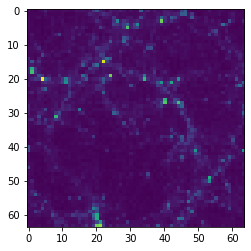

In [50]:
plt.imshow(h)

In [51]:
#clip
h[h<hmin]=hmin
h[h>hmax]=hmax
h=np.log10(h)
hmin=np.log10(hmin)
hmax=np.log10(hmax)

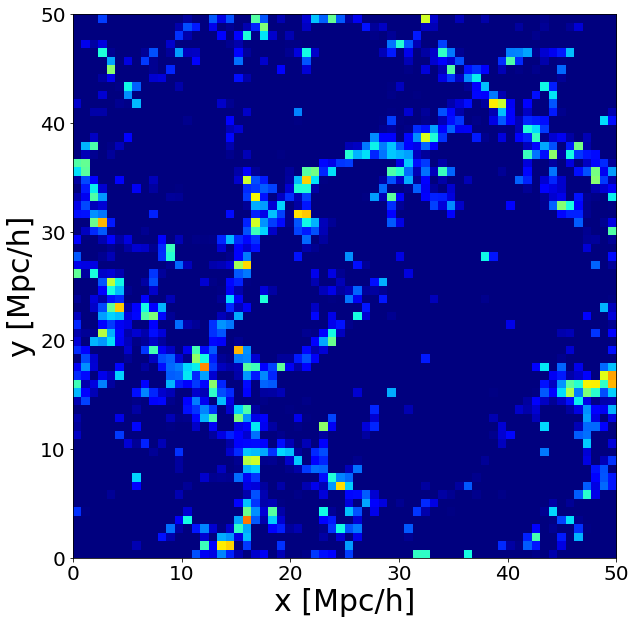

In [52]:
#create figure
fig = plt.figure(1, figsize=(10.0,10.0))
ax = fig.add_subplot(1,1,1)
extent = [0, head.boxsize/1000.0, 0, head.boxsize/1000.0]
im = ax.imshow(h.T, origin='lower', vmin=hmin, vmax=hmax, interpolation='nearest', cmap='jet', extent=extent)
#im = ax.imshow(h.T, origin='lower')
ax.set_xlabel("x [Mpc/h]", fontsize=30)
ax.set_ylabel("y [Mpc/h]", fontsize=30)
ax.tick_params(axis='both', labelsize=20)

In [75]:
# dictionary to hold groups
groups = {}

# initial group id to label groups
group_id = 0

# loop while there are still particles to be grouped
while len(part_ind) > 0:
    
    # get first particle index 
    index = part_ind[0]
    print(f'Considering friends of particle {index} for friend group {group_id}' )
    
    # get location of first particle 
    
    part = particles[index]
    
    # calculate distance to particle of interest for all other particles 
    dists = np.sqrt(np.sum((particles - part)**2, axis=1))
    
    # determine which are within the linking length
    friend_ind = list(set(np.where(dists < link_len)[0]) & set(part_ind))
    
    # drop first particle from particle list
    part_ind = np.delete(part_ind, [0])
    
    #print(f'Found friends {friend_ind} for friend group {group_id}\n')
    # add these indices to group 
    groups[group_id] = friend_ind
    
    friend_ind_loop = friend_ind.copy()
    friend_ind_loop = np.delete(friend_ind_loop, [0])
    
    if len(friend_ind_loop) == 0:
        group_id +=1
        
    # now loop over friends to find more friends!
    
    while len(friend_ind_loop) > 0:
        
        #print(f'Looping over friends {friend_ind_loop} for group {group_id}\n')
        
        # consider the first friend
        index_friend = friend_ind_loop[0]
        
        
        friend_ind_loop = np.delete(friend_ind_loop, [0])
        part_ind = np.delete(part_ind, np.where(part_ind == index_friend))
        
        # get position of first friend
        part_friend = particles[index_friend]
        
        # repeat above analysis for first friend 
        dists = np.sqrt(np.sum((particles - part_friend)**2, axis=1))
       
        # determine which are within the linking length only for particles that haven't been considered
        friend_ind = list(set(np.where(dists < link_len)[0]) & set(part_ind)) 
        # if we found more friends,
        if len(friend_ind) > 0:
            
            #print(f'Found more friends {friend_ind} of friend {index_friend}, adding to group {group_id}!\n')
            # add to the friend group
            groups[group_id] = np.unique(np.concatenate([groups[group_id], friend_ind]))
            
            # add new friends to loop
            friend_ind_loop = np.unique(np.concatenate([friend_ind_loop, friend_ind]))
            
            #print
        # if there are no more friends , friend group is complete
        elif len(friend_ind_loop) == 0:
            #print(f'no more friends to consider, friend group {group_id} is complete\n')
            group_id +=1
            
            
            

Considering friends of particle 0 for friend group 0
Considering friends of particle 1 for friend group 1
Considering friends of particle 2 for friend group 2
Considering friends of particle 3 for friend group 3
Considering friends of particle 4 for friend group 4
Considering friends of particle 5 for friend group 5
Considering friends of particle 6 for friend group 6
Considering friends of particle 7 for friend group 7
Considering friends of particle 8 for friend group 8
Considering friends of particle 9 for friend group 9
Considering friends of particle 10 for friend group 10
Considering friends of particle 11 for friend group 11
Considering friends of particle 12 for friend group 12
Considering friends of particle 13 for friend group 13
Considering friends of particle 14 for friend group 14
Considering friends of particle 15 for friend group 15
Considering friends of particle 16 for friend group 16
Considering friends of particle 17 for friend group 17
Considering friends of particl

Considering friends of particle 220 for friend group 153
Considering friends of particle 221 for friend group 154
Considering friends of particle 222 for friend group 155
Considering friends of particle 223 for friend group 156
Considering friends of particle 224 for friend group 157
Considering friends of particle 226 for friend group 158
Considering friends of particle 227 for friend group 159
Considering friends of particle 228 for friend group 160
Considering friends of particle 229 for friend group 161
Considering friends of particle 230 for friend group 162
Considering friends of particle 231 for friend group 163
Considering friends of particle 232 for friend group 164
Considering friends of particle 233 for friend group 165
Considering friends of particle 234 for friend group 166
Considering friends of particle 235 for friend group 167
Considering friends of particle 236 for friend group 168
Considering friends of particle 237 for friend group 169
Considering friends of particle

Considering friends of particle 507 for friend group 302
Considering friends of particle 508 for friend group 303
Considering friends of particle 509 for friend group 304
Considering friends of particle 510 for friend group 305
Considering friends of particle 511 for friend group 306
Considering friends of particle 512 for friend group 307
Considering friends of particle 513 for friend group 308
Considering friends of particle 514 for friend group 309
Considering friends of particle 515 for friend group 310
Considering friends of particle 516 for friend group 311
Considering friends of particle 517 for friend group 312
Considering friends of particle 518 for friend group 313
Considering friends of particle 519 for friend group 314
Considering friends of particle 520 for friend group 315
Considering friends of particle 521 for friend group 316
Considering friends of particle 522 for friend group 317
Considering friends of particle 523 for friend group 318
Considering friends of particle

Considering friends of particle 729 for friend group 447
Considering friends of particle 731 for friend group 448
Considering friends of particle 733 for friend group 449
Considering friends of particle 734 for friend group 450
Considering friends of particle 735 for friend group 451
Considering friends of particle 736 for friend group 452
Considering friends of particle 737 for friend group 453
Considering friends of particle 738 for friend group 454
Considering friends of particle 739 for friend group 455
Considering friends of particle 740 for friend group 456
Considering friends of particle 741 for friend group 457
Considering friends of particle 743 for friend group 458
Considering friends of particle 746 for friend group 459
Considering friends of particle 747 for friend group 460
Considering friends of particle 748 for friend group 461
Considering friends of particle 749 for friend group 462
Considering friends of particle 750 for friend group 463
Considering friends of particle

Considering friends of particle 909 for friend group 594
Considering friends of particle 910 for friend group 595
Considering friends of particle 911 for friend group 596
Considering friends of particle 912 for friend group 597
Considering friends of particle 913 for friend group 598
Considering friends of particle 914 for friend group 599
Considering friends of particle 915 for friend group 600
Considering friends of particle 918 for friend group 601
Considering friends of particle 926 for friend group 602
Considering friends of particle 927 for friend group 603
Considering friends of particle 928 for friend group 604
Considering friends of particle 929 for friend group 605
Considering friends of particle 930 for friend group 606
Considering friends of particle 931 for friend group 607
Considering friends of particle 933 for friend group 608
Considering friends of particle 934 for friend group 609
Considering friends of particle 938 for friend group 610
Considering friends of particle

Considering friends of particle 1210 for friend group 736
Considering friends of particle 1211 for friend group 737
Considering friends of particle 1212 for friend group 738
Considering friends of particle 1213 for friend group 739
Considering friends of particle 1214 for friend group 740
Considering friends of particle 1231 for friend group 741
Considering friends of particle 1232 for friend group 742
Considering friends of particle 1234 for friend group 743
Considering friends of particle 1262 for friend group 744
Considering friends of particle 1263 for friend group 745
Considering friends of particle 1264 for friend group 746
Considering friends of particle 1266 for friend group 747
Considering friends of particle 1267 for friend group 748
Considering friends of particle 1268 for friend group 749
Considering friends of particle 1269 for friend group 750
Considering friends of particle 1304 for friend group 751
Considering friends of particle 1317 for friend group 752
Considering fr

Considering friends of particle 1513 for friend group 880
Considering friends of particle 1514 for friend group 881
Considering friends of particle 1515 for friend group 882
Considering friends of particle 1516 for friend group 883
Considering friends of particle 1517 for friend group 884
Considering friends of particle 1518 for friend group 885
Considering friends of particle 1519 for friend group 886
Considering friends of particle 1520 for friend group 887
Considering friends of particle 1521 for friend group 888
Considering friends of particle 1522 for friend group 889
Considering friends of particle 1523 for friend group 890
Considering friends of particle 1524 for friend group 891
Considering friends of particle 1525 for friend group 892
Considering friends of particle 1526 for friend group 893
Considering friends of particle 1527 for friend group 894
Considering friends of particle 1528 for friend group 895
Considering friends of particle 1530 for friend group 896
Considering fr

Considering friends of particle 1756 for friend group 1023
Considering friends of particle 1757 for friend group 1024
Considering friends of particle 1758 for friend group 1025
Considering friends of particle 1759 for friend group 1026
Considering friends of particle 1760 for friend group 1027
Considering friends of particle 1761 for friend group 1028
Considering friends of particle 1762 for friend group 1029
Considering friends of particle 1763 for friend group 1030
Considering friends of particle 1764 for friend group 1031
Considering friends of particle 1765 for friend group 1032
Considering friends of particle 1766 for friend group 1033
Considering friends of particle 1771 for friend group 1034
Considering friends of particle 1772 for friend group 1035
Considering friends of particle 1773 for friend group 1036
Considering friends of particle 1774 for friend group 1037
Considering friends of particle 1776 for friend group 1038
Considering friends of particle 1777 for friend group 10

Considering friends of particle 2232 for friend group 1163
Considering friends of particle 2233 for friend group 1164
Considering friends of particle 2234 for friend group 1165
Considering friends of particle 2235 for friend group 1166
Considering friends of particle 2236 for friend group 1167
Considering friends of particle 2237 for friend group 1168
Considering friends of particle 2238 for friend group 1169
Considering friends of particle 2239 for friend group 1170
Considering friends of particle 2241 for friend group 1171
Considering friends of particle 2242 for friend group 1172
Considering friends of particle 2243 for friend group 1173
Considering friends of particle 2244 for friend group 1174
Considering friends of particle 2245 for friend group 1175
Considering friends of particle 2264 for friend group 1176
Considering friends of particle 2265 for friend group 1177
Considering friends of particle 2266 for friend group 1178
Considering friends of particle 2267 for friend group 11

Considering friends of particle 2539 for friend group 1303
Considering friends of particle 2540 for friend group 1304
Considering friends of particle 2554 for friend group 1305
Considering friends of particle 2636 for friend group 1306
Considering friends of particle 2637 for friend group 1307
Considering friends of particle 2638 for friend group 1308
Considering friends of particle 2639 for friend group 1309
Considering friends of particle 2641 for friend group 1310
Considering friends of particle 2642 for friend group 1311
Considering friends of particle 2643 for friend group 1312
Considering friends of particle 2647 for friend group 1313
Considering friends of particle 2649 for friend group 1314
Considering friends of particle 2651 for friend group 1315
Considering friends of particle 2652 for friend group 1316
Considering friends of particle 2653 for friend group 1317
Considering friends of particle 2654 for friend group 1318
Considering friends of particle 2655 for friend group 13

Considering friends of particle 2817 for friend group 1445
Considering friends of particle 2819 for friend group 1446
Considering friends of particle 2820 for friend group 1447
Considering friends of particle 2821 for friend group 1448
Considering friends of particle 2823 for friend group 1449
Considering friends of particle 2825 for friend group 1450
Considering friends of particle 2826 for friend group 1451
Considering friends of particle 2827 for friend group 1452
Considering friends of particle 2829 for friend group 1453
Considering friends of particle 2831 for friend group 1454
Considering friends of particle 2832 for friend group 1455
Considering friends of particle 2833 for friend group 1456
Considering friends of particle 2835 for friend group 1457
Considering friends of particle 2863 for friend group 1458
Considering friends of particle 2865 for friend group 1459
Considering friends of particle 2866 for friend group 1460
Considering friends of particle 2867 for friend group 14

Considering friends of particle 3050 for friend group 1587
Considering friends of particle 3054 for friend group 1588
Considering friends of particle 3063 for friend group 1589
Considering friends of particle 3064 for friend group 1590
Considering friends of particle 3066 for friend group 1591
Considering friends of particle 3067 for friend group 1592
Considering friends of particle 3068 for friend group 1593
Considering friends of particle 3069 for friend group 1594
Considering friends of particle 3070 for friend group 1595
Considering friends of particle 3071 for friend group 1596
Considering friends of particle 3072 for friend group 1597
Considering friends of particle 3077 for friend group 1598
Considering friends of particle 3078 for friend group 1599
Considering friends of particle 3079 for friend group 1600
Considering friends of particle 3100 for friend group 1601
Considering friends of particle 3109 for friend group 1602
Considering friends of particle 3110 for friend group 16

Considering friends of particle 3289 for friend group 1726
Considering friends of particle 3290 for friend group 1727
Considering friends of particle 3291 for friend group 1728
Considering friends of particle 3292 for friend group 1729
Considering friends of particle 3293 for friend group 1730
Considering friends of particle 3296 for friend group 1731
Considering friends of particle 3297 for friend group 1732
Considering friends of particle 3298 for friend group 1733
Considering friends of particle 3299 for friend group 1734
Considering friends of particle 3300 for friend group 1735
Considering friends of particle 3301 for friend group 1736
Considering friends of particle 3302 for friend group 1737
Considering friends of particle 3303 for friend group 1738
Considering friends of particle 3304 for friend group 1739
Considering friends of particle 3305 for friend group 1740
Considering friends of particle 3306 for friend group 1741
Considering friends of particle 3307 for friend group 17

Considering friends of particle 3461 for friend group 1865
Considering friends of particle 3462 for friend group 1866
Considering friends of particle 3463 for friend group 1867
Considering friends of particle 3464 for friend group 1868
Considering friends of particle 3465 for friend group 1869
Considering friends of particle 3466 for friend group 1870
Considering friends of particle 3467 for friend group 1871
Considering friends of particle 3468 for friend group 1872
Considering friends of particle 3469 for friend group 1873
Considering friends of particle 3470 for friend group 1874
Considering friends of particle 3471 for friend group 1875
Considering friends of particle 3472 for friend group 1876
Considering friends of particle 3473 for friend group 1877
Considering friends of particle 3474 for friend group 1878
Considering friends of particle 3475 for friend group 1879
Considering friends of particle 3476 for friend group 1880
Considering friends of particle 3477 for friend group 18

Considering friends of particle 3656 for friend group 2008
Considering friends of particle 3657 for friend group 2009
Considering friends of particle 3658 for friend group 2010
Considering friends of particle 3662 for friend group 2011
Considering friends of particle 3663 for friend group 2012
Considering friends of particle 3665 for friend group 2013
Considering friends of particle 3666 for friend group 2014
Considering friends of particle 3667 for friend group 2015
Considering friends of particle 3668 for friend group 2016
Considering friends of particle 3669 for friend group 2017
Considering friends of particle 3670 for friend group 2018
Considering friends of particle 3673 for friend group 2019
Considering friends of particle 3674 for friend group 2020
Considering friends of particle 3675 for friend group 2021
Considering friends of particle 3676 for friend group 2022
Considering friends of particle 3677 for friend group 2023
Considering friends of particle 3678 for friend group 20

Considering friends of particle 3846 for friend group 2151
Considering friends of particle 3847 for friend group 2152
Considering friends of particle 3848 for friend group 2153
Considering friends of particle 3849 for friend group 2154
Considering friends of particle 3850 for friend group 2155
Considering friends of particle 3851 for friend group 2156
Considering friends of particle 3852 for friend group 2157
Considering friends of particle 3854 for friend group 2158
Considering friends of particle 3855 for friend group 2159
Considering friends of particle 3856 for friend group 2160
Considering friends of particle 3857 for friend group 2161
Considering friends of particle 3858 for friend group 2162
Considering friends of particle 3859 for friend group 2163
Considering friends of particle 3860 for friend group 2164
Considering friends of particle 3861 for friend group 2165
Considering friends of particle 3862 for friend group 2166
Considering friends of particle 3865 for friend group 21

Considering friends of particle 4058 for friend group 2294
Considering friends of particle 4059 for friend group 2295
Considering friends of particle 4060 for friend group 2296
Considering friends of particle 4061 for friend group 2297
Considering friends of particle 4062 for friend group 2298
Considering friends of particle 4063 for friend group 2299
Considering friends of particle 4064 for friend group 2300
Considering friends of particle 4065 for friend group 2301
Considering friends of particle 4066 for friend group 2302
Considering friends of particle 4067 for friend group 2303
Considering friends of particle 4068 for friend group 2304
Considering friends of particle 4069 for friend group 2305
Considering friends of particle 4071 for friend group 2306
Considering friends of particle 4073 for friend group 2307
Considering friends of particle 4074 for friend group 2308
Considering friends of particle 4076 for friend group 2309
Considering friends of particle 4077 for friend group 23

Considering friends of particle 4234 for friend group 2435
Considering friends of particle 4235 for friend group 2436
Considering friends of particle 4236 for friend group 2437
Considering friends of particle 4237 for friend group 2438
Considering friends of particle 4238 for friend group 2439
Considering friends of particle 4239 for friend group 2440
Considering friends of particle 4240 for friend group 2441
Considering friends of particle 4241 for friend group 2442
Considering friends of particle 4242 for friend group 2443
Considering friends of particle 4243 for friend group 2444
Considering friends of particle 4244 for friend group 2445
Considering friends of particle 4245 for friend group 2446
Considering friends of particle 4246 for friend group 2447
Considering friends of particle 4247 for friend group 2448
Considering friends of particle 4248 for friend group 2449
Considering friends of particle 4249 for friend group 2450
Considering friends of particle 4250 for friend group 24

Considering friends of particle 4537 for friend group 2577
Considering friends of particle 4538 for friend group 2578
Considering friends of particle 4539 for friend group 2579
Considering friends of particle 4540 for friend group 2580
Considering friends of particle 4541 for friend group 2581
Considering friends of particle 4542 for friend group 2582
Considering friends of particle 4543 for friend group 2583
Considering friends of particle 4544 for friend group 2584
Considering friends of particle 4547 for friend group 2585
Considering friends of particle 4551 for friend group 2586
Considering friends of particle 4552 for friend group 2587
Considering friends of particle 4553 for friend group 2588
Considering friends of particle 4556 for friend group 2589
Considering friends of particle 4557 for friend group 2590
Considering friends of particle 4558 for friend group 2591
Considering friends of particle 4559 for friend group 2592
Considering friends of particle 4561 for friend group 25

Considering friends of particle 4717 for friend group 2716
Considering friends of particle 4718 for friend group 2717
Considering friends of particle 4719 for friend group 2718
Considering friends of particle 4720 for friend group 2719
Considering friends of particle 4721 for friend group 2720
Considering friends of particle 4722 for friend group 2721
Considering friends of particle 4723 for friend group 2722
Considering friends of particle 4724 for friend group 2723
Considering friends of particle 4726 for friend group 2724
Considering friends of particle 4727 for friend group 2725
Considering friends of particle 4730 for friend group 2726
Considering friends of particle 4731 for friend group 2727
Considering friends of particle 4733 for friend group 2728
Considering friends of particle 4734 for friend group 2729
Considering friends of particle 4735 for friend group 2730
Considering friends of particle 4736 for friend group 2731
Considering friends of particle 4737 for friend group 27

Considering friends of particle 4881 for friend group 2856
Considering friends of particle 4882 for friend group 2857
Considering friends of particle 4883 for friend group 2858
Considering friends of particle 4885 for friend group 2859
Considering friends of particle 4886 for friend group 2860
Considering friends of particle 4888 for friend group 2861
Considering friends of particle 4889 for friend group 2862
Considering friends of particle 4892 for friend group 2863
Considering friends of particle 4893 for friend group 2864
Considering friends of particle 4895 for friend group 2865
Considering friends of particle 4896 for friend group 2866
Considering friends of particle 4897 for friend group 2867
Considering friends of particle 4898 for friend group 2868
Considering friends of particle 4900 for friend group 2869
Considering friends of particle 4901 for friend group 2870
Considering friends of particle 4902 for friend group 2871
Considering friends of particle 4908 for friend group 28

Considering friends of particle 5077 for friend group 2998
Considering friends of particle 5078 for friend group 2999
Considering friends of particle 5079 for friend group 3000
Considering friends of particle 5080 for friend group 3001
Considering friends of particle 5081 for friend group 3002
Considering friends of particle 5082 for friend group 3003
Considering friends of particle 5085 for friend group 3004
Considering friends of particle 5088 for friend group 3005
Considering friends of particle 5091 for friend group 3006
Considering friends of particle 5092 for friend group 3007
Considering friends of particle 5095 for friend group 3008
Considering friends of particle 5097 for friend group 3009
Considering friends of particle 5099 for friend group 3010
Considering friends of particle 5100 for friend group 3011
Considering friends of particle 5101 for friend group 3012
Considering friends of particle 5104 for friend group 3013
Considering friends of particle 5105 for friend group 30

Considering friends of particle 5328 for friend group 3139
Considering friends of particle 5329 for friend group 3140
Considering friends of particle 5330 for friend group 3141
Considering friends of particle 5331 for friend group 3142
Considering friends of particle 5333 for friend group 3143
Considering friends of particle 5334 for friend group 3144
Considering friends of particle 5336 for friend group 3145
Considering friends of particle 5337 for friend group 3146
Considering friends of particle 5338 for friend group 3147
Considering friends of particle 5339 for friend group 3148
Considering friends of particle 5340 for friend group 3149
Considering friends of particle 5341 for friend group 3150
Considering friends of particle 5342 for friend group 3151
Considering friends of particle 5343 for friend group 3152
Considering friends of particle 5344 for friend group 3153
Considering friends of particle 5345 for friend group 3154
Considering friends of particle 5346 for friend group 31

Considering friends of particle 5530 for friend group 3278
Considering friends of particle 5531 for friend group 3279
Considering friends of particle 5532 for friend group 3280
Considering friends of particle 5533 for friend group 3281
Considering friends of particle 5534 for friend group 3282
Considering friends of particle 5535 for friend group 3283
Considering friends of particle 5536 for friend group 3284
Considering friends of particle 5537 for friend group 3285
Considering friends of particle 5540 for friend group 3286
Considering friends of particle 5541 for friend group 3287
Considering friends of particle 5542 for friend group 3288
Considering friends of particle 5543 for friend group 3289
Considering friends of particle 5544 for friend group 3290
Considering friends of particle 5545 for friend group 3291
Considering friends of particle 5547 for friend group 3292
Considering friends of particle 5548 for friend group 3293
Considering friends of particle 5549 for friend group 32

Considering friends of particle 5724 for friend group 3419
Considering friends of particle 5725 for friend group 3420
Considering friends of particle 5726 for friend group 3421
Considering friends of particle 5727 for friend group 3422
Considering friends of particle 5728 for friend group 3423
Considering friends of particle 5729 for friend group 3424
Considering friends of particle 5730 for friend group 3425
Considering friends of particle 5731 for friend group 3426
Considering friends of particle 5732 for friend group 3427
Considering friends of particle 5733 for friend group 3428
Considering friends of particle 5734 for friend group 3429
Considering friends of particle 5735 for friend group 3430
Considering friends of particle 5736 for friend group 3431
Considering friends of particle 5737 for friend group 3432
Considering friends of particle 5738 for friend group 3433
Considering friends of particle 5740 for friend group 3434
Considering friends of particle 5741 for friend group 34

Considering friends of particle 5886 for friend group 3561
Considering friends of particle 5887 for friend group 3562
Considering friends of particle 5888 for friend group 3563
Considering friends of particle 5890 for friend group 3564
Considering friends of particle 5891 for friend group 3565
Considering friends of particle 5892 for friend group 3566
Considering friends of particle 5893 for friend group 3567
Considering friends of particle 5894 for friend group 3568
Considering friends of particle 5895 for friend group 3569
Considering friends of particle 5896 for friend group 3570
Considering friends of particle 5897 for friend group 3571
Considering friends of particle 5898 for friend group 3572
Considering friends of particle 5899 for friend group 3573
Considering friends of particle 5900 for friend group 3574
Considering friends of particle 5901 for friend group 3575
Considering friends of particle 5902 for friend group 3576
Considering friends of particle 5903 for friend group 35

Considering friends of particle 6104 for friend group 3701
Considering friends of particle 6105 for friend group 3702
Considering friends of particle 6106 for friend group 3703
Considering friends of particle 6107 for friend group 3704
Considering friends of particle 6108 for friend group 3705
Considering friends of particle 6109 for friend group 3706
Considering friends of particle 6110 for friend group 3707
Considering friends of particle 6111 for friend group 3708
Considering friends of particle 6112 for friend group 3709
Considering friends of particle 6113 for friend group 3710
Considering friends of particle 6114 for friend group 3711
Considering friends of particle 6115 for friend group 3712
Considering friends of particle 6116 for friend group 3713
Considering friends of particle 6118 for friend group 3714
Considering friends of particle 6119 for friend group 3715
Considering friends of particle 6120 for friend group 3716
Considering friends of particle 6121 for friend group 37

Considering friends of particle 6319 for friend group 3841
Considering friends of particle 6320 for friend group 3842
Considering friends of particle 6321 for friend group 3843
Considering friends of particle 6323 for friend group 3844
Considering friends of particle 6324 for friend group 3845
Considering friends of particle 6325 for friend group 3846
Considering friends of particle 6326 for friend group 3847
Considering friends of particle 6327 for friend group 3848
Considering friends of particle 6328 for friend group 3849
Considering friends of particle 6329 for friend group 3850
Considering friends of particle 6330 for friend group 3851
Considering friends of particle 6331 for friend group 3852
Considering friends of particle 6338 for friend group 3853
Considering friends of particle 6339 for friend group 3854
Considering friends of particle 6340 for friend group 3855
Considering friends of particle 6341 for friend group 3856
Considering friends of particle 6342 for friend group 38

Considering friends of particle 6631 for friend group 3980
Considering friends of particle 6632 for friend group 3981
Considering friends of particle 6651 for friend group 3982
Considering friends of particle 6652 for friend group 3983
Considering friends of particle 6653 for friend group 3984
Considering friends of particle 6654 for friend group 3985
Considering friends of particle 6655 for friend group 3986
Considering friends of particle 6657 for friend group 3987
Considering friends of particle 6659 for friend group 3988
Considering friends of particle 6661 for friend group 3989
Considering friends of particle 6663 for friend group 3990
Considering friends of particle 6664 for friend group 3991
Considering friends of particle 6665 for friend group 3992
Considering friends of particle 6666 for friend group 3993
Considering friends of particle 6667 for friend group 3994
Considering friends of particle 6668 for friend group 3995
Considering friends of particle 6669 for friend group 39

Considering friends of particle 6887 for friend group 4123
Considering friends of particle 6888 for friend group 4124
Considering friends of particle 6889 for friend group 4125
Considering friends of particle 6891 for friend group 4126
Considering friends of particle 6892 for friend group 4127
Considering friends of particle 6893 for friend group 4128
Considering friends of particle 6894 for friend group 4129
Considering friends of particle 6896 for friend group 4130
Considering friends of particle 6897 for friend group 4131
Considering friends of particle 6898 for friend group 4132
Considering friends of particle 6899 for friend group 4133
Considering friends of particle 6900 for friend group 4134
Considering friends of particle 6901 for friend group 4135
Considering friends of particle 6902 for friend group 4136
Considering friends of particle 6904 for friend group 4137
Considering friends of particle 6905 for friend group 4138
Considering friends of particle 6906 for friend group 41

Considering friends of particle 7104 for friend group 4264
Considering friends of particle 7106 for friend group 4265
Considering friends of particle 7107 for friend group 4266
Considering friends of particle 7109 for friend group 4267
Considering friends of particle 7110 for friend group 4268
Considering friends of particle 7117 for friend group 4269
Considering friends of particle 7119 for friend group 4270
Considering friends of particle 7120 for friend group 4271
Considering friends of particle 7121 for friend group 4272
Considering friends of particle 7122 for friend group 4273
Considering friends of particle 7123 for friend group 4274
Considering friends of particle 7124 for friend group 4275
Considering friends of particle 7125 for friend group 4276
Considering friends of particle 7127 for friend group 4277
Considering friends of particle 7129 for friend group 4278
Considering friends of particle 7188 for friend group 4279
Considering friends of particle 7189 for friend group 42

Considering friends of particle 7376 for friend group 4404
Considering friends of particle 7377 for friend group 4405
Considering friends of particle 7378 for friend group 4406
Considering friends of particle 7379 for friend group 4407
Considering friends of particle 7382 for friend group 4408
Considering friends of particle 7383 for friend group 4409
Considering friends of particle 7384 for friend group 4410
Considering friends of particle 7385 for friend group 4411
Considering friends of particle 7386 for friend group 4412
Considering friends of particle 7387 for friend group 4413
Considering friends of particle 7388 for friend group 4414
Considering friends of particle 7389 for friend group 4415
Considering friends of particle 7390 for friend group 4416
Considering friends of particle 7391 for friend group 4417
Considering friends of particle 7393 for friend group 4418
Considering friends of particle 7394 for friend group 4419
Considering friends of particle 7395 for friend group 44

Considering friends of particle 7969 for friend group 4543
Considering friends of particle 7975 for friend group 4544
Considering friends of particle 7979 for friend group 4545
Considering friends of particle 7980 for friend group 4546
Considering friends of particle 7981 for friend group 4547
Considering friends of particle 8450 for friend group 4548
Considering friends of particle 8460 for friend group 4549
Considering friends of particle 8461 for friend group 4550
Considering friends of particle 8462 for friend group 4551
Considering friends of particle 8463 for friend group 4552
Considering friends of particle 8464 for friend group 4553
Considering friends of particle 8484 for friend group 4554
Considering friends of particle 8494 for friend group 4555
Considering friends of particle 8495 for friend group 4556
Considering friends of particle 8496 for friend group 4557
Considering friends of particle 8503 for friend group 4558
Considering friends of particle 8504 for friend group 45

Considering friends of particle 9284 for friend group 4685
Considering friends of particle 9285 for friend group 4686
Considering friends of particle 9286 for friend group 4687
Considering friends of particle 9287 for friend group 4688
Considering friends of particle 9288 for friend group 4689
Considering friends of particle 9290 for friend group 4690
Considering friends of particle 9291 for friend group 4691
Considering friends of particle 9292 for friend group 4692
Considering friends of particle 9293 for friend group 4693
Considering friends of particle 9295 for friend group 4694
Considering friends of particle 9297 for friend group 4695
Considering friends of particle 9298 for friend group 4696
Considering friends of particle 9300 for friend group 4697
Considering friends of particle 9301 for friend group 4698
Considering friends of particle 9302 for friend group 4699
Considering friends of particle 9303 for friend group 4700
Considering friends of particle 9304 for friend group 47

Considering friends of particle 9707 for friend group 4824
Considering friends of particle 9709 for friend group 4825
Considering friends of particle 9714 for friend group 4826
Considering friends of particle 9715 for friend group 4827
Considering friends of particle 9717 for friend group 4828
Considering friends of particle 9719 for friend group 4829
Considering friends of particle 9720 for friend group 4830
Considering friends of particle 9723 for friend group 4831
Considering friends of particle 9725 for friend group 4832
Considering friends of particle 9726 for friend group 4833
Considering friends of particle 9733 for friend group 4834
Considering friends of particle 9734 for friend group 4835
Considering friends of particle 9735 for friend group 4836
Considering friends of particle 9737 for friend group 4837
Considering friends of particle 9742 for friend group 4838
Considering friends of particle 9744 for friend group 4839
Considering friends of particle 9745 for friend group 48

Considering friends of particle 10685 for friend group 4962
Considering friends of particle 10688 for friend group 4963
Considering friends of particle 10689 for friend group 4964
Considering friends of particle 10702 for friend group 4965
Considering friends of particle 10704 for friend group 4966
Considering friends of particle 10705 for friend group 4967
Considering friends of particle 10710 for friend group 4968
Considering friends of particle 10711 for friend group 4969
Considering friends of particle 10713 for friend group 4970
Considering friends of particle 10755 for friend group 4971
Considering friends of particle 10765 for friend group 4972
Considering friends of particle 10770 for friend group 4973
Considering friends of particle 10771 for friend group 4974
Considering friends of particle 10772 for friend group 4975
Considering friends of particle 10773 for friend group 4976
Considering friends of particle 10774 for friend group 4977
Considering friends of particle 10775 fo

Considering friends of particle 10970 for friend group 5101
Considering friends of particle 10971 for friend group 5102
Considering friends of particle 10972 for friend group 5103
Considering friends of particle 10973 for friend group 5104
Considering friends of particle 10975 for friend group 5105
Considering friends of particle 10977 for friend group 5106
Considering friends of particle 10978 for friend group 5107
Considering friends of particle 10979 for friend group 5108
Considering friends of particle 10980 for friend group 5109
Considering friends of particle 10981 for friend group 5110
Considering friends of particle 10982 for friend group 5111
Considering friends of particle 10983 for friend group 5112
Considering friends of particle 10984 for friend group 5113
Considering friends of particle 10985 for friend group 5114
Considering friends of particle 10986 for friend group 5115
Considering friends of particle 10987 for friend group 5116
Considering friends of particle 10988 fo

Considering friends of particle 11439 for friend group 5242
Considering friends of particle 11440 for friend group 5243
Considering friends of particle 11441 for friend group 5244
Considering friends of particle 11442 for friend group 5245
Considering friends of particle 11456 for friend group 5246
Considering friends of particle 11457 for friend group 5247
Considering friends of particle 11467 for friend group 5248
Considering friends of particle 11468 for friend group 5249
Considering friends of particle 11469 for friend group 5250
Considering friends of particle 11470 for friend group 5251
Considering friends of particle 11471 for friend group 5252
Considering friends of particle 11472 for friend group 5253
Considering friends of particle 11473 for friend group 5254
Considering friends of particle 11474 for friend group 5255
Considering friends of particle 11475 for friend group 5256
Considering friends of particle 11476 for friend group 5257
Considering friends of particle 11477 fo

Considering friends of particle 11680 for friend group 5379
Considering friends of particle 11681 for friend group 5380
Considering friends of particle 11697 for friend group 5381
Considering friends of particle 11698 for friend group 5382
Considering friends of particle 11699 for friend group 5383
Considering friends of particle 11700 for friend group 5384
Considering friends of particle 11701 for friend group 5385
Considering friends of particle 11702 for friend group 5386
Considering friends of particle 11703 for friend group 5387
Considering friends of particle 11704 for friend group 5388
Considering friends of particle 11705 for friend group 5389
Considering friends of particle 11706 for friend group 5390
Considering friends of particle 11707 for friend group 5391
Considering friends of particle 11708 for friend group 5392
Considering friends of particle 11709 for friend group 5393
Considering friends of particle 11711 for friend group 5394
Considering friends of particle 11712 fo

Considering friends of particle 11896 for friend group 5519
Considering friends of particle 11897 for friend group 5520
Considering friends of particle 11898 for friend group 5521
Considering friends of particle 11899 for friend group 5522
Considering friends of particle 11900 for friend group 5523
Considering friends of particle 11901 for friend group 5524
Considering friends of particle 11902 for friend group 5525
Considering friends of particle 11903 for friend group 5526
Considering friends of particle 11904 for friend group 5527
Considering friends of particle 11905 for friend group 5528
Considering friends of particle 11906 for friend group 5529
Considering friends of particle 11908 for friend group 5530
Considering friends of particle 11909 for friend group 5531
Considering friends of particle 11910 for friend group 5532
Considering friends of particle 11912 for friend group 5533
Considering friends of particle 11913 for friend group 5534
Considering friends of particle 11914 fo

Considering friends of particle 12150 for friend group 5660
Considering friends of particle 12151 for friend group 5661
Considering friends of particle 12152 for friend group 5662
Considering friends of particle 12153 for friend group 5663
Considering friends of particle 12159 for friend group 5664
Considering friends of particle 12163 for friend group 5665
Considering friends of particle 12164 for friend group 5666
Considering friends of particle 12168 for friend group 5667
Considering friends of particle 12169 for friend group 5668
Considering friends of particle 12170 for friend group 5669
Considering friends of particle 12174 for friend group 5670
Considering friends of particle 12177 for friend group 5671
Considering friends of particle 12179 for friend group 5672
Considering friends of particle 12180 for friend group 5673
Considering friends of particle 12185 for friend group 5674
Considering friends of particle 12187 for friend group 5675
Considering friends of particle 12188 fo

Considering friends of particle 12423 for friend group 5797
Considering friends of particle 12424 for friend group 5798
Considering friends of particle 12425 for friend group 5799
Considering friends of particle 12430 for friend group 5800
Considering friends of particle 12432 for friend group 5801
Considering friends of particle 12433 for friend group 5802
Considering friends of particle 12434 for friend group 5803
Considering friends of particle 12435 for friend group 5804
Considering friends of particle 12436 for friend group 5805
Considering friends of particle 12437 for friend group 5806
Considering friends of particle 12439 for friend group 5807
Considering friends of particle 12446 for friend group 5808
Considering friends of particle 12453 for friend group 5809
Considering friends of particle 12459 for friend group 5810
Considering friends of particle 12460 for friend group 5811
Considering friends of particle 12466 for friend group 5812
Considering friends of particle 12472 fo

Considering friends of particle 12684 for friend group 5939
Considering friends of particle 12685 for friend group 5940
Considering friends of particle 12686 for friend group 5941
Considering friends of particle 12689 for friend group 5942
Considering friends of particle 12692 for friend group 5943
Considering friends of particle 12693 for friend group 5944
Considering friends of particle 12694 for friend group 5945
Considering friends of particle 12695 for friend group 5946
Considering friends of particle 12696 for friend group 5947
Considering friends of particle 12697 for friend group 5948
Considering friends of particle 12698 for friend group 5949
Considering friends of particle 12699 for friend group 5950
Considering friends of particle 12700 for friend group 5951
Considering friends of particle 12701 for friend group 5952
Considering friends of particle 12703 for friend group 5953
Considering friends of particle 12704 for friend group 5954
Considering friends of particle 12705 fo

Considering friends of particle 12929 for friend group 6080
Considering friends of particle 12930 for friend group 6081
Considering friends of particle 12931 for friend group 6082
Considering friends of particle 12932 for friend group 6083
Considering friends of particle 12933 for friend group 6084
Considering friends of particle 12934 for friend group 6085
Considering friends of particle 12935 for friend group 6086
Considering friends of particle 12937 for friend group 6087
Considering friends of particle 12939 for friend group 6088
Considering friends of particle 12940 for friend group 6089
Considering friends of particle 12941 for friend group 6090
Considering friends of particle 12942 for friend group 6091
Considering friends of particle 12943 for friend group 6092
Considering friends of particle 12946 for friend group 6093
Considering friends of particle 12947 for friend group 6094
Considering friends of particle 12948 for friend group 6095
Considering friends of particle 12950 fo

Considering friends of particle 13142 for friend group 6218
Considering friends of particle 13143 for friend group 6219
Considering friends of particle 13144 for friend group 6220
Considering friends of particle 13145 for friend group 6221
Considering friends of particle 13146 for friend group 6222
Considering friends of particle 13150 for friend group 6223
Considering friends of particle 13154 for friend group 6224
Considering friends of particle 13155 for friend group 6225
Considering friends of particle 13156 for friend group 6226
Considering friends of particle 13157 for friend group 6227
Considering friends of particle 13158 for friend group 6228
Considering friends of particle 13159 for friend group 6229
Considering friends of particle 13160 for friend group 6230
Considering friends of particle 13163 for friend group 6231
Considering friends of particle 13164 for friend group 6232
Considering friends of particle 13165 for friend group 6233
Considering friends of particle 13166 fo

Considering friends of particle 14231 for friend group 6355
Considering friends of particle 14232 for friend group 6356
Considering friends of particle 14236 for friend group 6357
Considering friends of particle 14239 for friend group 6358
Considering friends of particle 14241 for friend group 6359
Considering friends of particle 14242 for friend group 6360
Considering friends of particle 14243 for friend group 6361
Considering friends of particle 14244 for friend group 6362
Considering friends of particle 14245 for friend group 6363
Considering friends of particle 14247 for friend group 6364
Considering friends of particle 14248 for friend group 6365
Considering friends of particle 14249 for friend group 6366
Considering friends of particle 14250 for friend group 6367
Considering friends of particle 14252 for friend group 6368
Considering friends of particle 14254 for friend group 6369
Considering friends of particle 14255 for friend group 6370
Considering friends of particle 14256 fo

Considering friends of particle 14586 for friend group 6494
Considering friends of particle 14587 for friend group 6495
Considering friends of particle 14588 for friend group 6496
Considering friends of particle 14589 for friend group 6497
Considering friends of particle 14590 for friend group 6498
Considering friends of particle 14591 for friend group 6499
Considering friends of particle 14592 for friend group 6500
Considering friends of particle 14593 for friend group 6501
Considering friends of particle 14596 for friend group 6502
Considering friends of particle 14597 for friend group 6503
Considering friends of particle 14598 for friend group 6504
Considering friends of particle 14599 for friend group 6505
Considering friends of particle 14600 for friend group 6506
Considering friends of particle 14602 for friend group 6507
Considering friends of particle 14603 for friend group 6508
Considering friends of particle 14604 for friend group 6509
Considering friends of particle 14605 fo

Considering friends of particle 14819 for friend group 6631
Considering friends of particle 14820 for friend group 6632
Considering friends of particle 14821 for friend group 6633
Considering friends of particle 14822 for friend group 6634
Considering friends of particle 14823 for friend group 6635
Considering friends of particle 14824 for friend group 6636
Considering friends of particle 14825 for friend group 6637
Considering friends of particle 14826 for friend group 6638
Considering friends of particle 14829 for friend group 6639
Considering friends of particle 14831 for friend group 6640
Considering friends of particle 14833 for friend group 6641
Considering friends of particle 14834 for friend group 6642
Considering friends of particle 14835 for friend group 6643
Considering friends of particle 14836 for friend group 6644
Considering friends of particle 14837 for friend group 6645
Considering friends of particle 14838 for friend group 6646
Considering friends of particle 14841 fo

Considering friends of particle 15024 for friend group 6770
Considering friends of particle 15026 for friend group 6771
Considering friends of particle 15027 for friend group 6772
Considering friends of particle 15028 for friend group 6773
Considering friends of particle 15029 for friend group 6774
Considering friends of particle 15030 for friend group 6775
Considering friends of particle 15032 for friend group 6776
Considering friends of particle 15033 for friend group 6777
Considering friends of particle 15034 for friend group 6778
Considering friends of particle 15035 for friend group 6779
Considering friends of particle 15037 for friend group 6780
Considering friends of particle 15040 for friend group 6781
Considering friends of particle 15042 for friend group 6782
Considering friends of particle 15062 for friend group 6783
Considering friends of particle 15063 for friend group 6784
Considering friends of particle 15065 for friend group 6785
Considering friends of particle 15066 fo

Considering friends of particle 15303 for friend group 6908
Considering friends of particle 15304 for friend group 6909
Considering friends of particle 15305 for friend group 6910
Considering friends of particle 15306 for friend group 6911
Considering friends of particle 15307 for friend group 6912
Considering friends of particle 15308 for friend group 6913
Considering friends of particle 15309 for friend group 6914
Considering friends of particle 15310 for friend group 6915
Considering friends of particle 15322 for friend group 6916
Considering friends of particle 15323 for friend group 6917
Considering friends of particle 15324 for friend group 6918
Considering friends of particle 15325 for friend group 6919
Considering friends of particle 15326 for friend group 6920
Considering friends of particle 15327 for friend group 6921
Considering friends of particle 15328 for friend group 6922
Considering friends of particle 15330 for friend group 6923
Considering friends of particle 15331 fo

Considering friends of particle 15975 for friend group 7045
Considering friends of particle 15976 for friend group 7046
Considering friends of particle 15978 for friend group 7047
Considering friends of particle 15979 for friend group 7048
Considering friends of particle 15981 for friend group 7049
Considering friends of particle 15982 for friend group 7050
Considering friends of particle 15983 for friend group 7051
Considering friends of particle 15985 for friend group 7052
Considering friends of particle 15986 for friend group 7053
Considering friends of particle 15987 for friend group 7054
Considering friends of particle 15988 for friend group 7055
Considering friends of particle 15989 for friend group 7056
Considering friends of particle 15992 for friend group 7057
Considering friends of particle 15993 for friend group 7058
Considering friends of particle 15994 for friend group 7059
Considering friends of particle 15995 for friend group 7060
Considering friends of particle 15998 fo

Considering friends of particle 16444 for friend group 7184
Considering friends of particle 16446 for friend group 7185
Considering friends of particle 16447 for friend group 7186
Considering friends of particle 16450 for friend group 7187
Considering friends of particle 16451 for friend group 7188
Considering friends of particle 16456 for friend group 7189
Considering friends of particle 16457 for friend group 7190
Considering friends of particle 16458 for friend group 7191
Considering friends of particle 16459 for friend group 7192
Considering friends of particle 16460 for friend group 7193
Considering friends of particle 16461 for friend group 7194
Considering friends of particle 16462 for friend group 7195
Considering friends of particle 16463 for friend group 7196
Considering friends of particle 16465 for friend group 7197
Considering friends of particle 16466 for friend group 7198
Considering friends of particle 16467 for friend group 7199
Considering friends of particle 16468 fo

Considering friends of particle 16791 for friend group 7323
Considering friends of particle 16793 for friend group 7324
Considering friends of particle 16794 for friend group 7325
Considering friends of particle 16805 for friend group 7326
Considering friends of particle 16806 for friend group 7327
Considering friends of particle 16807 for friend group 7328
Considering friends of particle 16808 for friend group 7329
Considering friends of particle 16809 for friend group 7330
Considering friends of particle 16810 for friend group 7331
Considering friends of particle 16811 for friend group 7332
Considering friends of particle 16812 for friend group 7333
Considering friends of particle 16813 for friend group 7334
Considering friends of particle 16814 for friend group 7335
Considering friends of particle 16815 for friend group 7336
Considering friends of particle 16816 for friend group 7337
Considering friends of particle 16817 for friend group 7338
Considering friends of particle 16818 fo

Considering friends of particle 17007 for friend group 7465
Considering friends of particle 17008 for friend group 7466
Considering friends of particle 17011 for friend group 7467
Considering friends of particle 17012 for friend group 7468
Considering friends of particle 17014 for friend group 7469
Considering friends of particle 17017 for friend group 7470
Considering friends of particle 17018 for friend group 7471
Considering friends of particle 17019 for friend group 7472
Considering friends of particle 17020 for friend group 7473
Considering friends of particle 17021 for friend group 7474
Considering friends of particle 17022 for friend group 7475
Considering friends of particle 17023 for friend group 7476
Considering friends of particle 17024 for friend group 7477
Considering friends of particle 17025 for friend group 7478
Considering friends of particle 17026 for friend group 7479
Considering friends of particle 17027 for friend group 7480
Considering friends of particle 17028 fo

Considering friends of particle 17257 for friend group 7603
Considering friends of particle 17258 for friend group 7604
Considering friends of particle 17259 for friend group 7605
Considering friends of particle 17261 for friend group 7606
Considering friends of particle 17262 for friend group 7607
Considering friends of particle 17264 for friend group 7608
Considering friends of particle 17265 for friend group 7609
Considering friends of particle 17267 for friend group 7610
Considering friends of particle 17268 for friend group 7611
Considering friends of particle 17269 for friend group 7612
Considering friends of particle 17270 for friend group 7613
Considering friends of particle 17271 for friend group 7614
Considering friends of particle 17272 for friend group 7615
Considering friends of particle 17273 for friend group 7616
Considering friends of particle 17274 for friend group 7617
Considering friends of particle 17275 for friend group 7618
Considering friends of particle 17276 fo

Considering friends of particle 17497 for friend group 7740
Considering friends of particle 17501 for friend group 7741
Considering friends of particle 17502 for friend group 7742
Considering friends of particle 17503 for friend group 7743
Considering friends of particle 17504 for friend group 7744
Considering friends of particle 17505 for friend group 7745
Considering friends of particle 17506 for friend group 7746
Considering friends of particle 17507 for friend group 7747
Considering friends of particle 17508 for friend group 7748
Considering friends of particle 17509 for friend group 7749
Considering friends of particle 17510 for friend group 7750
Considering friends of particle 17511 for friend group 7751
Considering friends of particle 17512 for friend group 7752
Considering friends of particle 17513 for friend group 7753
Considering friends of particle 17514 for friend group 7754
Considering friends of particle 17515 for friend group 7755
Considering friends of particle 17516 fo

Considering friends of particle 17655 for friend group 7877
Considering friends of particle 17656 for friend group 7878
Considering friends of particle 17657 for friend group 7879
Considering friends of particle 17659 for friend group 7880
Considering friends of particle 17660 for friend group 7881
Considering friends of particle 17661 for friend group 7882
Considering friends of particle 17663 for friend group 7883
Considering friends of particle 17664 for friend group 7884
Considering friends of particle 17665 for friend group 7885
Considering friends of particle 17666 for friend group 7886
Considering friends of particle 17669 for friend group 7887
Considering friends of particle 17675 for friend group 7888
Considering friends of particle 17676 for friend group 7889
Considering friends of particle 17677 for friend group 7890
Considering friends of particle 17678 for friend group 7891
Considering friends of particle 17679 for friend group 7892
Considering friends of particle 17680 fo

Considering friends of particle 17823 for friend group 8014
Considering friends of particle 17825 for friend group 8015
Considering friends of particle 17830 for friend group 8016
Considering friends of particle 17831 for friend group 8017
Considering friends of particle 17832 for friend group 8018
Considering friends of particle 17834 for friend group 8019
Considering friends of particle 17835 for friend group 8020
Considering friends of particle 17836 for friend group 8021
Considering friends of particle 17837 for friend group 8022
Considering friends of particle 17838 for friend group 8023
Considering friends of particle 17839 for friend group 8024
Considering friends of particle 17840 for friend group 8025
Considering friends of particle 17841 for friend group 8026
Considering friends of particle 17842 for friend group 8027
Considering friends of particle 17843 for friend group 8028
Considering friends of particle 17844 for friend group 8029
Considering friends of particle 17845 fo

Considering friends of particle 18017 for friend group 8152
Considering friends of particle 18018 for friend group 8153
Considering friends of particle 18019 for friend group 8154
Considering friends of particle 18020 for friend group 8155
Considering friends of particle 18021 for friend group 8156
Considering friends of particle 18023 for friend group 8157
Considering friends of particle 18027 for friend group 8158
Considering friends of particle 18031 for friend group 8159
Considering friends of particle 18054 for friend group 8160
Considering friends of particle 18055 for friend group 8161
Considering friends of particle 18057 for friend group 8162
Considering friends of particle 18058 for friend group 8163
Considering friends of particle 18063 for friend group 8164
Considering friends of particle 18070 for friend group 8165
Considering friends of particle 18082 for friend group 8166
Considering friends of particle 18083 for friend group 8167
Considering friends of particle 18084 fo

Considering friends of particle 18240 for friend group 8289
Considering friends of particle 18243 for friend group 8290
Considering friends of particle 18244 for friend group 8291
Considering friends of particle 18245 for friend group 8292
Considering friends of particle 18246 for friend group 8293
Considering friends of particle 18247 for friend group 8294
Considering friends of particle 18249 for friend group 8295
Considering friends of particle 18250 for friend group 8296
Considering friends of particle 18251 for friend group 8297
Considering friends of particle 18253 for friend group 8298
Considering friends of particle 18254 for friend group 8299
Considering friends of particle 18255 for friend group 8300
Considering friends of particle 18256 for friend group 8301
Considering friends of particle 18258 for friend group 8302
Considering friends of particle 18259 for friend group 8303
Considering friends of particle 18260 for friend group 8304
Considering friends of particle 18261 fo

Considering friends of particle 18416 for friend group 8426
Considering friends of particle 18417 for friend group 8427
Considering friends of particle 18418 for friend group 8428
Considering friends of particle 18419 for friend group 8429
Considering friends of particle 18420 for friend group 8430
Considering friends of particle 18421 for friend group 8431
Considering friends of particle 18422 for friend group 8432
Considering friends of particle 18423 for friend group 8433
Considering friends of particle 18424 for friend group 8434
Considering friends of particle 18425 for friend group 8435
Considering friends of particle 18426 for friend group 8436
Considering friends of particle 18427 for friend group 8437
Considering friends of particle 18428 for friend group 8438
Considering friends of particle 18429 for friend group 8439
Considering friends of particle 18434 for friend group 8440
Considering friends of particle 18437 for friend group 8441
Considering friends of particle 18439 fo

Considering friends of particle 18614 for friend group 8565
Considering friends of particle 18615 for friend group 8566
Considering friends of particle 18616 for friend group 8567
Considering friends of particle 18618 for friend group 8568
Considering friends of particle 18619 for friend group 8569
Considering friends of particle 18620 for friend group 8570
Considering friends of particle 18621 for friend group 8571
Considering friends of particle 18622 for friend group 8572
Considering friends of particle 18625 for friend group 8573
Considering friends of particle 18626 for friend group 8574
Considering friends of particle 18627 for friend group 8575
Considering friends of particle 18628 for friend group 8576
Considering friends of particle 18630 for friend group 8577
Considering friends of particle 18631 for friend group 8578
Considering friends of particle 18632 for friend group 8579
Considering friends of particle 18633 for friend group 8580
Considering friends of particle 18634 fo

Considering friends of particle 18875 for friend group 8702
Considering friends of particle 18877 for friend group 8703
Considering friends of particle 18878 for friend group 8704
Considering friends of particle 18879 for friend group 8705
Considering friends of particle 18880 for friend group 8706
Considering friends of particle 18881 for friend group 8707
Considering friends of particle 18882 for friend group 8708
Considering friends of particle 18883 for friend group 8709
Considering friends of particle 18884 for friend group 8710
Considering friends of particle 18885 for friend group 8711
Considering friends of particle 18886 for friend group 8712
Considering friends of particle 18887 for friend group 8713
Considering friends of particle 18888 for friend group 8714
Considering friends of particle 18889 for friend group 8715
Considering friends of particle 18890 for friend group 8716
Considering friends of particle 18891 for friend group 8717
Considering friends of particle 18892 fo

Considering friends of particle 19082 for friend group 8839
Considering friends of particle 19084 for friend group 8840
Considering friends of particle 19085 for friend group 8841
Considering friends of particle 19086 for friend group 8842
Considering friends of particle 19087 for friend group 8843
Considering friends of particle 19088 for friend group 8844
Considering friends of particle 19089 for friend group 8845
Considering friends of particle 19091 for friend group 8846
Considering friends of particle 19092 for friend group 8847
Considering friends of particle 19093 for friend group 8848
Considering friends of particle 19094 for friend group 8849
Considering friends of particle 19095 for friend group 8850
Considering friends of particle 19096 for friend group 8851
Considering friends of particle 19097 for friend group 8852
Considering friends of particle 19098 for friend group 8853
Considering friends of particle 19099 for friend group 8854
Considering friends of particle 19100 fo

Considering friends of particle 19676 for friend group 8981
Considering friends of particle 19677 for friend group 8982
Considering friends of particle 19679 for friend group 8983
Considering friends of particle 19680 for friend group 8984
Considering friends of particle 19681 for friend group 8985
Considering friends of particle 19682 for friend group 8986
Considering friends of particle 19683 for friend group 8987
Considering friends of particle 19684 for friend group 8988
Considering friends of particle 19685 for friend group 8989
Considering friends of particle 19686 for friend group 8990
Considering friends of particle 19688 for friend group 8991
Considering friends of particle 19692 for friend group 8992
Considering friends of particle 19693 for friend group 8993
Considering friends of particle 19694 for friend group 8994
Considering friends of particle 19695 for friend group 8995
Considering friends of particle 19696 for friend group 8996
Considering friends of particle 19698 fo

Considering friends of particle 19905 for friend group 9122
Considering friends of particle 19906 for friend group 9123
Considering friends of particle 19909 for friend group 9124
Considering friends of particle 19910 for friend group 9125
Considering friends of particle 19911 for friend group 9126
Considering friends of particle 19912 for friend group 9127
Considering friends of particle 19913 for friend group 9128
Considering friends of particle 19914 for friend group 9129
Considering friends of particle 19915 for friend group 9130
Considering friends of particle 19916 for friend group 9131
Considering friends of particle 19917 for friend group 9132
Considering friends of particle 19918 for friend group 9133
Considering friends of particle 19924 for friend group 9134
Considering friends of particle 19925 for friend group 9135
Considering friends of particle 19926 for friend group 9136
Considering friends of particle 19930 for friend group 9137
Considering friends of particle 19931 fo

Considering friends of particle 20168 for friend group 9263
Considering friends of particle 20169 for friend group 9264
Considering friends of particle 20170 for friend group 9265
Considering friends of particle 20171 for friend group 9266
Considering friends of particle 20172 for friend group 9267
Considering friends of particle 20174 for friend group 9268
Considering friends of particle 20175 for friend group 9269
Considering friends of particle 20176 for friend group 9270
Considering friends of particle 20177 for friend group 9271
Considering friends of particle 20178 for friend group 9272
Considering friends of particle 20179 for friend group 9273
Considering friends of particle 20180 for friend group 9274
Considering friends of particle 20182 for friend group 9275
Considering friends of particle 20183 for friend group 9276
Considering friends of particle 20184 for friend group 9277
Considering friends of particle 20185 for friend group 9278
Considering friends of particle 20186 fo

Considering friends of particle 20400 for friend group 9400
Considering friends of particle 20401 for friend group 9401
Considering friends of particle 20402 for friend group 9402
Considering friends of particle 20403 for friend group 9403
Considering friends of particle 20404 for friend group 9404
Considering friends of particle 20405 for friend group 9405
Considering friends of particle 20406 for friend group 9406
Considering friends of particle 20407 for friend group 9407
Considering friends of particle 20408 for friend group 9408
Considering friends of particle 20410 for friend group 9409
Considering friends of particle 20411 for friend group 9410
Considering friends of particle 20412 for friend group 9411
Considering friends of particle 20414 for friend group 9412
Considering friends of particle 20415 for friend group 9413
Considering friends of particle 20416 for friend group 9414
Considering friends of particle 20417 for friend group 9415
Considering friends of particle 20420 fo

Considering friends of particle 20569 for friend group 9537
Considering friends of particle 20570 for friend group 9538
Considering friends of particle 20571 for friend group 9539
Considering friends of particle 20573 for friend group 9540
Considering friends of particle 20574 for friend group 9541
Considering friends of particle 20575 for friend group 9542
Considering friends of particle 20576 for friend group 9543
Considering friends of particle 20577 for friend group 9544
Considering friends of particle 20578 for friend group 9545
Considering friends of particle 20579 for friend group 9546
Considering friends of particle 20580 for friend group 9547
Considering friends of particle 20581 for friend group 9548
Considering friends of particle 20582 for friend group 9549
Considering friends of particle 20583 for friend group 9550
Considering friends of particle 20584 for friend group 9551
Considering friends of particle 20585 for friend group 9552
Considering friends of particle 20586 fo

Considering friends of particle 20796 for friend group 9677
Considering friends of particle 20800 for friend group 9678
Considering friends of particle 20801 for friend group 9679
Considering friends of particle 20804 for friend group 9680
Considering friends of particle 20806 for friend group 9681
Considering friends of particle 20807 for friend group 9682
Considering friends of particle 20809 for friend group 9683
Considering friends of particle 20810 for friend group 9684
Considering friends of particle 20811 for friend group 9685
Considering friends of particle 20812 for friend group 9686
Considering friends of particle 20817 for friend group 9687
Considering friends of particle 20818 for friend group 9688
Considering friends of particle 20819 for friend group 9689
Considering friends of particle 20821 for friend group 9690
Considering friends of particle 20822 for friend group 9691
Considering friends of particle 20823 for friend group 9692
Considering friends of particle 20824 fo

Considering friends of particle 21033 for friend group 9814
Considering friends of particle 21034 for friend group 9815
Considering friends of particle 21037 for friend group 9816
Considering friends of particle 21038 for friend group 9817
Considering friends of particle 21039 for friend group 9818
Considering friends of particle 21040 for friend group 9819
Considering friends of particle 21041 for friend group 9820
Considering friends of particle 21042 for friend group 9821
Considering friends of particle 21043 for friend group 9822
Considering friends of particle 21044 for friend group 9823
Considering friends of particle 21045 for friend group 9824
Considering friends of particle 21051 for friend group 9825
Considering friends of particle 21052 for friend group 9826
Considering friends of particle 21053 for friend group 9827
Considering friends of particle 21054 for friend group 9828
Considering friends of particle 21055 for friend group 9829
Considering friends of particle 21056 fo

Considering friends of particle 21393 for friend group 9954
Considering friends of particle 21394 for friend group 9955
Considering friends of particle 21395 for friend group 9956
Considering friends of particle 21396 for friend group 9957
Considering friends of particle 21397 for friend group 9958
Considering friends of particle 21398 for friend group 9959
Considering friends of particle 21399 for friend group 9960
Considering friends of particle 21400 for friend group 9961
Considering friends of particle 21401 for friend group 9962
Considering friends of particle 21402 for friend group 9963
Considering friends of particle 21404 for friend group 9964
Considering friends of particle 21405 for friend group 9965
Considering friends of particle 21406 for friend group 9966
Considering friends of particle 21407 for friend group 9967
Considering friends of particle 21408 for friend group 9968
Considering friends of particle 21409 for friend group 9969
Considering friends of particle 21410 fo

Considering friends of particle 21545 for friend group 10090
Considering friends of particle 21546 for friend group 10091
Considering friends of particle 21547 for friend group 10092
Considering friends of particle 21549 for friend group 10093
Considering friends of particle 21550 for friend group 10094
Considering friends of particle 21551 for friend group 10095
Considering friends of particle 21552 for friend group 10096
Considering friends of particle 21553 for friend group 10097
Considering friends of particle 21554 for friend group 10098
Considering friends of particle 21555 for friend group 10099
Considering friends of particle 21556 for friend group 10100
Considering friends of particle 21557 for friend group 10101
Considering friends of particle 21558 for friend group 10102
Considering friends of particle 21559 for friend group 10103
Considering friends of particle 21560 for friend group 10104
Considering friends of particle 21561 for friend group 10105
Considering friends of p

Considering friends of particle 21695 for friend group 10227
Considering friends of particle 21696 for friend group 10228
Considering friends of particle 21697 for friend group 10229
Considering friends of particle 21698 for friend group 10230
Considering friends of particle 21699 for friend group 10231
Considering friends of particle 21700 for friend group 10232
Considering friends of particle 21701 for friend group 10233
Considering friends of particle 21703 for friend group 10234
Considering friends of particle 21704 for friend group 10235
Considering friends of particle 21705 for friend group 10236
Considering friends of particle 21706 for friend group 10237
Considering friends of particle 21707 for friend group 10238
Considering friends of particle 21708 for friend group 10239
Considering friends of particle 21709 for friend group 10240
Considering friends of particle 21710 for friend group 10241
Considering friends of particle 21711 for friend group 10242
Considering friends of p

Considering friends of particle 21874 for friend group 10362
Considering friends of particle 21877 for friend group 10363
Considering friends of particle 21878 for friend group 10364
Considering friends of particle 21879 for friend group 10365
Considering friends of particle 21880 for friend group 10366
Considering friends of particle 21881 for friend group 10367
Considering friends of particle 21882 for friend group 10368
Considering friends of particle 21883 for friend group 10369
Considering friends of particle 21884 for friend group 10370
Considering friends of particle 21885 for friend group 10371
Considering friends of particle 21886 for friend group 10372
Considering friends of particle 21887 for friend group 10373
Considering friends of particle 21888 for friend group 10374
Considering friends of particle 21889 for friend group 10375
Considering friends of particle 21890 for friend group 10376
Considering friends of particle 21892 for friend group 10377
Considering friends of p

Considering friends of particle 22058 for friend group 10497
Considering friends of particle 22059 for friend group 10498
Considering friends of particle 22060 for friend group 10499
Considering friends of particle 22061 for friend group 10500
Considering friends of particle 22062 for friend group 10501
Considering friends of particle 22063 for friend group 10502
Considering friends of particle 22064 for friend group 10503
Considering friends of particle 22065 for friend group 10504
Considering friends of particle 22066 for friend group 10505
Considering friends of particle 22067 for friend group 10506
Considering friends of particle 22068 for friend group 10507
Considering friends of particle 22069 for friend group 10508
Considering friends of particle 22070 for friend group 10509
Considering friends of particle 22071 for friend group 10510
Considering friends of particle 22072 for friend group 10511
Considering friends of particle 22073 for friend group 10512
Considering friends of p

Considering friends of particle 22238 for friend group 10633
Considering friends of particle 22239 for friend group 10634
Considering friends of particle 22240 for friend group 10635
Considering friends of particle 22243 for friend group 10636
Considering friends of particle 22246 for friend group 10637
Considering friends of particle 22247 for friend group 10638
Considering friends of particle 22248 for friend group 10639
Considering friends of particle 22249 for friend group 10640
Considering friends of particle 22250 for friend group 10641
Considering friends of particle 22251 for friend group 10642
Considering friends of particle 22252 for friend group 10643
Considering friends of particle 22253 for friend group 10644
Considering friends of particle 22254 for friend group 10645
Considering friends of particle 22255 for friend group 10646
Considering friends of particle 22261 for friend group 10647
Considering friends of particle 22262 for friend group 10648
Considering friends of p

Considering friends of particle 22620 for friend group 10770
Considering friends of particle 22669 for friend group 10771
Considering friends of particle 22675 for friend group 10772
Considering friends of particle 22703 for friend group 10773
Considering friends of particle 22722 for friend group 10774
Considering friends of particle 22723 for friend group 10775
Considering friends of particle 22724 for friend group 10776
Considering friends of particle 22726 for friend group 10777
Considering friends of particle 22727 for friend group 10778
Considering friends of particle 22728 for friend group 10779
Considering friends of particle 22729 for friend group 10780
Considering friends of particle 22730 for friend group 10781
Considering friends of particle 22731 for friend group 10782
Considering friends of particle 22733 for friend group 10783
Considering friends of particle 22734 for friend group 10784
Considering friends of particle 22736 for friend group 10785
Considering friends of p

Considering friends of particle 22977 for friend group 10905
Considering friends of particle 22978 for friend group 10906
Considering friends of particle 22979 for friend group 10907
Considering friends of particle 22981 for friend group 10908
Considering friends of particle 22982 for friend group 10909
Considering friends of particle 22983 for friend group 10910
Considering friends of particle 22984 for friend group 10911
Considering friends of particle 22985 for friend group 10912
Considering friends of particle 22988 for friend group 10913
Considering friends of particle 22993 for friend group 10914
Considering friends of particle 22995 for friend group 10915
Considering friends of particle 22996 for friend group 10916
Considering friends of particle 22997 for friend group 10917
Considering friends of particle 22998 for friend group 10918
Considering friends of particle 23000 for friend group 10919
Considering friends of particle 23002 for friend group 10920
Considering friends of p

Considering friends of particle 23233 for friend group 11042
Considering friends of particle 23234 for friend group 11043
Considering friends of particle 23235 for friend group 11044
Considering friends of particle 23236 for friend group 11045
Considering friends of particle 23237 for friend group 11046
Considering friends of particle 23238 for friend group 11047
Considering friends of particle 23239 for friend group 11048
Considering friends of particle 23240 for friend group 11049
Considering friends of particle 23244 for friend group 11050
Considering friends of particle 23247 for friend group 11051
Considering friends of particle 23248 for friend group 11052
Considering friends of particle 23249 for friend group 11053
Considering friends of particle 23250 for friend group 11054
Considering friends of particle 23252 for friend group 11055
Considering friends of particle 23255 for friend group 11056
Considering friends of particle 23256 for friend group 11057
Considering friends of p

Considering friends of particle 23499 for friend group 11177
Considering friends of particle 23503 for friend group 11178
Considering friends of particle 23516 for friend group 11179
Considering friends of particle 23522 for friend group 11180
Considering friends of particle 23524 for friend group 11181
Considering friends of particle 23525 for friend group 11182
Considering friends of particle 23526 for friend group 11183
Considering friends of particle 23528 for friend group 11184
Considering friends of particle 23529 for friend group 11185
Considering friends of particle 23530 for friend group 11186
Considering friends of particle 23531 for friend group 11187
Considering friends of particle 23532 for friend group 11188
Considering friends of particle 23533 for friend group 11189
Considering friends of particle 23534 for friend group 11190
Considering friends of particle 23535 for friend group 11191
Considering friends of particle 23536 for friend group 11192
Considering friends of p

Considering friends of particle 23697 for friend group 11312
Considering friends of particle 23698 for friend group 11313
Considering friends of particle 23699 for friend group 11314
Considering friends of particle 23700 for friend group 11315
Considering friends of particle 23706 for friend group 11316
Considering friends of particle 23707 for friend group 11317
Considering friends of particle 23708 for friend group 11318
Considering friends of particle 23709 for friend group 11319
Considering friends of particle 23710 for friend group 11320
Considering friends of particle 23712 for friend group 11321
Considering friends of particle 23715 for friend group 11322
Considering friends of particle 23718 for friend group 11323
Considering friends of particle 23719 for friend group 11324
Considering friends of particle 23720 for friend group 11325
Considering friends of particle 23721 for friend group 11326
Considering friends of particle 23722 for friend group 11327
Considering friends of p

Considering friends of particle 23906 for friend group 11448
Considering friends of particle 23909 for friend group 11449
Considering friends of particle 23912 for friend group 11450
Considering friends of particle 23913 for friend group 11451
Considering friends of particle 23914 for friend group 11452
Considering friends of particle 23915 for friend group 11453
Considering friends of particle 23917 for friend group 11454
Considering friends of particle 23918 for friend group 11455
Considering friends of particle 23919 for friend group 11456
Considering friends of particle 23920 for friend group 11457
Considering friends of particle 23921 for friend group 11458
Considering friends of particle 23922 for friend group 11459
Considering friends of particle 23923 for friend group 11460
Considering friends of particle 23924 for friend group 11461
Considering friends of particle 23925 for friend group 11462
Considering friends of particle 23926 for friend group 11463
Considering friends of p

Considering friends of particle 24081 for friend group 11583
Considering friends of particle 24082 for friend group 11584
Considering friends of particle 24083 for friend group 11585
Considering friends of particle 24084 for friend group 11586
Considering friends of particle 24086 for friend group 11587
Considering friends of particle 24087 for friend group 11588
Considering friends of particle 24088 for friend group 11589
Considering friends of particle 24089 for friend group 11590
Considering friends of particle 24090 for friend group 11591
Considering friends of particle 24091 for friend group 11592
Considering friends of particle 24092 for friend group 11593
Considering friends of particle 24094 for friend group 11594
Considering friends of particle 24095 for friend group 11595
Considering friends of particle 24096 for friend group 11596
Considering friends of particle 24098 for friend group 11597
Considering friends of particle 24099 for friend group 11598
Considering friends of p

Considering friends of particle 24226 for friend group 11720
Considering friends of particle 24227 for friend group 11721
Considering friends of particle 24228 for friend group 11722
Considering friends of particle 24229 for friend group 11723
Considering friends of particle 24230 for friend group 11724
Considering friends of particle 24232 for friend group 11725
Considering friends of particle 24233 for friend group 11726
Considering friends of particle 24234 for friend group 11727
Considering friends of particle 24235 for friend group 11728
Considering friends of particle 24236 for friend group 11729
Considering friends of particle 24237 for friend group 11730
Considering friends of particle 24238 for friend group 11731
Considering friends of particle 24239 for friend group 11732
Considering friends of particle 24240 for friend group 11733
Considering friends of particle 24241 for friend group 11734
Considering friends of particle 24242 for friend group 11735
Considering friends of p

Considering friends of particle 24381 for friend group 11860
Considering friends of particle 24382 for friend group 11861
Considering friends of particle 24383 for friend group 11862
Considering friends of particle 24384 for friend group 11863
Considering friends of particle 24385 for friend group 11864
Considering friends of particle 24389 for friend group 11865
Considering friends of particle 24390 for friend group 11866
Considering friends of particle 24392 for friend group 11867
Considering friends of particle 24394 for friend group 11868
Considering friends of particle 24395 for friend group 11869
Considering friends of particle 24396 for friend group 11870
Considering friends of particle 24399 for friend group 11871
Considering friends of particle 24404 for friend group 11872
Considering friends of particle 24406 for friend group 11873
Considering friends of particle 24407 for friend group 11874
Considering friends of particle 24408 for friend group 11875
Considering friends of p

Considering friends of particle 24875 for friend group 11996
Considering friends of particle 24876 for friend group 11997
Considering friends of particle 24879 for friend group 11998
Considering friends of particle 24880 for friend group 11999
Considering friends of particle 24881 for friend group 12000
Considering friends of particle 24890 for friend group 12001
Considering friends of particle 24891 for friend group 12002
Considering friends of particle 24893 for friend group 12003
Considering friends of particle 24895 for friend group 12004
Considering friends of particle 24900 for friend group 12005
Considering friends of particle 24927 for friend group 12006
Considering friends of particle 24944 for friend group 12007
Considering friends of particle 24949 for friend group 12008
Considering friends of particle 24950 for friend group 12009
Considering friends of particle 24951 for friend group 12010
Considering friends of particle 24952 for friend group 12011
Considering friends of p

Considering friends of particle 25456 for friend group 12136
Considering friends of particle 25457 for friend group 12137
Considering friends of particle 25458 for friend group 12138
Considering friends of particle 25459 for friend group 12139
Considering friends of particle 25460 for friend group 12140
Considering friends of particle 25461 for friend group 12141
Considering friends of particle 25462 for friend group 12142
Considering friends of particle 25463 for friend group 12143
Considering friends of particle 25464 for friend group 12144
Considering friends of particle 25465 for friend group 12145
Considering friends of particle 25466 for friend group 12146
Considering friends of particle 25467 for friend group 12147
Considering friends of particle 25468 for friend group 12148
Considering friends of particle 25469 for friend group 12149
Considering friends of particle 25470 for friend group 12150
Considering friends of particle 25472 for friend group 12151
Considering friends of p

Considering friends of particle 25660 for friend group 12275
Considering friends of particle 25661 for friend group 12276
Considering friends of particle 25663 for friend group 12277
Considering friends of particle 25664 for friend group 12278
Considering friends of particle 25665 for friend group 12279
Considering friends of particle 25666 for friend group 12280
Considering friends of particle 25667 for friend group 12281
Considering friends of particle 25668 for friend group 12282
Considering friends of particle 25671 for friend group 12283
Considering friends of particle 25673 for friend group 12284
Considering friends of particle 25675 for friend group 12285
Considering friends of particle 25678 for friend group 12286
Considering friends of particle 25681 for friend group 12287
Considering friends of particle 25682 for friend group 12288
Considering friends of particle 25684 for friend group 12289
Considering friends of particle 25685 for friend group 12290
Considering friends of p

Considering friends of particle 25843 for friend group 12412
Considering friends of particle 25847 for friend group 12413
Considering friends of particle 25848 for friend group 12414
Considering friends of particle 25849 for friend group 12415
Considering friends of particle 25850 for friend group 12416
Considering friends of particle 25851 for friend group 12417
Considering friends of particle 25852 for friend group 12418
Considering friends of particle 25853 for friend group 12419
Considering friends of particle 25854 for friend group 12420
Considering friends of particle 25855 for friend group 12421
Considering friends of particle 25856 for friend group 12422
Considering friends of particle 25860 for friend group 12423
Considering friends of particle 25861 for friend group 12424
Considering friends of particle 25862 for friend group 12425
Considering friends of particle 25863 for friend group 12426
Considering friends of particle 25864 for friend group 12427
Considering friends of p

Considering friends of particle 26007 for friend group 12547
Considering friends of particle 26008 for friend group 12548
Considering friends of particle 26009 for friend group 12549
Considering friends of particle 26013 for friend group 12550
Considering friends of particle 26014 for friend group 12551
Considering friends of particle 26015 for friend group 12552
Considering friends of particle 26019 for friend group 12553
Considering friends of particle 26020 for friend group 12554
Considering friends of particle 26021 for friend group 12555
Considering friends of particle 26023 for friend group 12556
Considering friends of particle 26024 for friend group 12557
Considering friends of particle 26025 for friend group 12558
Considering friends of particle 26026 for friend group 12559
Considering friends of particle 26027 for friend group 12560
Considering friends of particle 26033 for friend group 12561
Considering friends of particle 26034 for friend group 12562
Considering friends of p

Considering friends of particle 26186 for friend group 12682
Considering friends of particle 26187 for friend group 12683
Considering friends of particle 26188 for friend group 12684
Considering friends of particle 26189 for friend group 12685
Considering friends of particle 26190 for friend group 12686
Considering friends of particle 26191 for friend group 12687
Considering friends of particle 26192 for friend group 12688
Considering friends of particle 26193 for friend group 12689
Considering friends of particle 26195 for friend group 12690
Considering friends of particle 26196 for friend group 12691
Considering friends of particle 26199 for friend group 12692
Considering friends of particle 26202 for friend group 12693
Considering friends of particle 26221 for friend group 12694
Considering friends of particle 26224 for friend group 12695
Considering friends of particle 26225 for friend group 12696
Considering friends of particle 26226 for friend group 12697
Considering friends of p

Considering friends of particle 26433 for friend group 12817
Considering friends of particle 26434 for friend group 12818
Considering friends of particle 26435 for friend group 12819
Considering friends of particle 26436 for friend group 12820
Considering friends of particle 26437 for friend group 12821
Considering friends of particle 26438 for friend group 12822
Considering friends of particle 26441 for friend group 12823
Considering friends of particle 26442 for friend group 12824
Considering friends of particle 26443 for friend group 12825
Considering friends of particle 26444 for friend group 12826
Considering friends of particle 26445 for friend group 12827
Considering friends of particle 26446 for friend group 12828
Considering friends of particle 26447 for friend group 12829
Considering friends of particle 26449 for friend group 12830
Considering friends of particle 26450 for friend group 12831
Considering friends of particle 26451 for friend group 12832
Considering friends of p

Considering friends of particle 26717 for friend group 12956
Considering friends of particle 26719 for friend group 12957
Considering friends of particle 26720 for friend group 12958
Considering friends of particle 26722 for friend group 12959
Considering friends of particle 26723 for friend group 12960
Considering friends of particle 26724 for friend group 12961
Considering friends of particle 26725 for friend group 12962
Considering friends of particle 26731 for friend group 12963
Considering friends of particle 26732 for friend group 12964
Considering friends of particle 26733 for friend group 12965
Considering friends of particle 26734 for friend group 12966
Considering friends of particle 26735 for friend group 12967
Considering friends of particle 26738 for friend group 12968
Considering friends of particle 26739 for friend group 12969
Considering friends of particle 26740 for friend group 12970
Considering friends of particle 26741 for friend group 12971
Considering friends of p

Considering friends of particle 26937 for friend group 13094
Considering friends of particle 26938 for friend group 13095
Considering friends of particle 26939 for friend group 13096
Considering friends of particle 26940 for friend group 13097
Considering friends of particle 26941 for friend group 13098
Considering friends of particle 26942 for friend group 13099
Considering friends of particle 26943 for friend group 13100
Considering friends of particle 26944 for friend group 13101
Considering friends of particle 26945 for friend group 13102
Considering friends of particle 26946 for friend group 13103
Considering friends of particle 26947 for friend group 13104
Considering friends of particle 26948 for friend group 13105
Considering friends of particle 26949 for friend group 13106
Considering friends of particle 26950 for friend group 13107
Considering friends of particle 26951 for friend group 13108
Considering friends of particle 26952 for friend group 13109
Considering friends of p

Considering friends of particle 27267 for friend group 13229
Considering friends of particle 27268 for friend group 13230
Considering friends of particle 27270 for friend group 13231
Considering friends of particle 27276 for friend group 13232
Considering friends of particle 27277 for friend group 13233
Considering friends of particle 27279 for friend group 13234
Considering friends of particle 27281 for friend group 13235
Considering friends of particle 27282 for friend group 13236
Considering friends of particle 27283 for friend group 13237
Considering friends of particle 27284 for friend group 13238
Considering friends of particle 27286 for friend group 13239
Considering friends of particle 27289 for friend group 13240
Considering friends of particle 27290 for friend group 13241
Considering friends of particle 27291 for friend group 13242
Considering friends of particle 27292 for friend group 13243
Considering friends of particle 27293 for friend group 13244
Considering friends of p

Considering friends of particle 27468 for friend group 13365
Considering friends of particle 27469 for friend group 13366
Considering friends of particle 27470 for friend group 13367
Considering friends of particle 27471 for friend group 13368
Considering friends of particle 27472 for friend group 13369
Considering friends of particle 27473 for friend group 13370
Considering friends of particle 27474 for friend group 13371
Considering friends of particle 27475 for friend group 13372
Considering friends of particle 27476 for friend group 13373
Considering friends of particle 27477 for friend group 13374
Considering friends of particle 27478 for friend group 13375
Considering friends of particle 27480 for friend group 13376
Considering friends of particle 27481 for friend group 13377
Considering friends of particle 27482 for friend group 13378
Considering friends of particle 27484 for friend group 13379
Considering friends of particle 27485 for friend group 13380
Considering friends of p

Considering friends of particle 27728 for friend group 13502
Considering friends of particle 27729 for friend group 13503
Considering friends of particle 27730 for friend group 13504
Considering friends of particle 27731 for friend group 13505
Considering friends of particle 27732 for friend group 13506
Considering friends of particle 27733 for friend group 13507
Considering friends of particle 27734 for friend group 13508
Considering friends of particle 27735 for friend group 13509
Considering friends of particle 27736 for friend group 13510
Considering friends of particle 27737 for friend group 13511
Considering friends of particle 27739 for friend group 13512
Considering friends of particle 27740 for friend group 13513
Considering friends of particle 27741 for friend group 13514
Considering friends of particle 27742 for friend group 13515
Considering friends of particle 27743 for friend group 13516
Considering friends of particle 27744 for friend group 13517
Considering friends of p

Considering friends of particle 27903 for friend group 13637
Considering friends of particle 27904 for friend group 13638
Considering friends of particle 27905 for friend group 13639
Considering friends of particle 27906 for friend group 13640
Considering friends of particle 27909 for friend group 13641
Considering friends of particle 27910 for friend group 13642
Considering friends of particle 27912 for friend group 13643
Considering friends of particle 27913 for friend group 13644
Considering friends of particle 27914 for friend group 13645
Considering friends of particle 27915 for friend group 13646
Considering friends of particle 27917 for friend group 13647
Considering friends of particle 27920 for friend group 13648
Considering friends of particle 27924 for friend group 13649
Considering friends of particle 27976 for friend group 13650
Considering friends of particle 27978 for friend group 13651
Considering friends of particle 27980 for friend group 13652
Considering friends of p

Considering friends of particle 28457 for friend group 13772
Considering friends of particle 28458 for friend group 13773
Considering friends of particle 28459 for friend group 13774
Considering friends of particle 28461 for friend group 13775
Considering friends of particle 28462 for friend group 13776
Considering friends of particle 28463 for friend group 13777
Considering friends of particle 28464 for friend group 13778
Considering friends of particle 28465 for friend group 13779
Considering friends of particle 28467 for friend group 13780
Considering friends of particle 28468 for friend group 13781
Considering friends of particle 28469 for friend group 13782
Considering friends of particle 28472 for friend group 13783
Considering friends of particle 28473 for friend group 13784
Considering friends of particle 28475 for friend group 13785
Considering friends of particle 28477 for friend group 13786
Considering friends of particle 28478 for friend group 13787
Considering friends of p

Considering friends of particle 28713 for friend group 13910
Considering friends of particle 28716 for friend group 13911
Considering friends of particle 28717 for friend group 13912
Considering friends of particle 28718 for friend group 13913
Considering friends of particle 28719 for friend group 13914
Considering friends of particle 28720 for friend group 13915
Considering friends of particle 28725 for friend group 13916
Considering friends of particle 28729 for friend group 13917
Considering friends of particle 28730 for friend group 13918
Considering friends of particle 28731 for friend group 13919
Considering friends of particle 28734 for friend group 13920
Considering friends of particle 28739 for friend group 13921
Considering friends of particle 28755 for friend group 13922
Considering friends of particle 28756 for friend group 13923
Considering friends of particle 28757 for friend group 13924
Considering friends of particle 28758 for friend group 13925
Considering friends of p

Considering friends of particle 29006 for friend group 14050
Considering friends of particle 29007 for friend group 14051
Considering friends of particle 29008 for friend group 14052
Considering friends of particle 29009 for friend group 14053
Considering friends of particle 29010 for friend group 14054
Considering friends of particle 29011 for friend group 14055
Considering friends of particle 29012 for friend group 14056
Considering friends of particle 29015 for friend group 14057
Considering friends of particle 29016 for friend group 14058
Considering friends of particle 29017 for friend group 14059
Considering friends of particle 29018 for friend group 14060
Considering friends of particle 29019 for friend group 14061
Considering friends of particle 29021 for friend group 14062
Considering friends of particle 29024 for friend group 14063
Considering friends of particle 29025 for friend group 14064
Considering friends of particle 29028 for friend group 14065
Considering friends of p

Considering friends of particle 29285 for friend group 14188
Considering friends of particle 29288 for friend group 14189
Considering friends of particle 29289 for friend group 14190
Considering friends of particle 29292 for friend group 14191
Considering friends of particle 29293 for friend group 14192
Considering friends of particle 29294 for friend group 14193
Considering friends of particle 29295 for friend group 14194
Considering friends of particle 29296 for friend group 14195
Considering friends of particle 29297 for friend group 14196
Considering friends of particle 29298 for friend group 14197
Considering friends of particle 29299 for friend group 14198
Considering friends of particle 29301 for friend group 14199
Considering friends of particle 29302 for friend group 14200
Considering friends of particle 29303 for friend group 14201
Considering friends of particle 29305 for friend group 14202
Considering friends of particle 29306 for friend group 14203
Considering friends of p

Considering friends of particle 29842 for friend group 14326
Considering friends of particle 29843 for friend group 14327
Considering friends of particle 29889 for friend group 14328
Considering friends of particle 29891 for friend group 14329
Considering friends of particle 29905 for friend group 14330
Considering friends of particle 29907 for friend group 14331
Considering friends of particle 29908 for friend group 14332
Considering friends of particle 29912 for friend group 14333
Considering friends of particle 29951 for friend group 14334
Considering friends of particle 29952 for friend group 14335
Considering friends of particle 29953 for friend group 14336
Considering friends of particle 29954 for friend group 14337
Considering friends of particle 29955 for friend group 14338
Considering friends of particle 29957 for friend group 14339
Considering friends of particle 29960 for friend group 14340
Considering friends of particle 29961 for friend group 14341
Considering friends of p

Considering friends of particle 30326 for friend group 14464
Considering friends of particle 30327 for friend group 14465
Considering friends of particle 30328 for friend group 14466
Considering friends of particle 30329 for friend group 14467
Considering friends of particle 30330 for friend group 14468
Considering friends of particle 30334 for friend group 14469
Considering friends of particle 30335 for friend group 14470
Considering friends of particle 30336 for friend group 14471
Considering friends of particle 30337 for friend group 14472
Considering friends of particle 30340 for friend group 14473
Considering friends of particle 30341 for friend group 14474
Considering friends of particle 30342 for friend group 14475
Considering friends of particle 30343 for friend group 14476
Considering friends of particle 30344 for friend group 14477
Considering friends of particle 30345 for friend group 14478
Considering friends of particle 30346 for friend group 14479
Considering friends of p

Considering friends of particle 30591 for friend group 14602
Considering friends of particle 30592 for friend group 14603
Considering friends of particle 30596 for friend group 14604
Considering friends of particle 30597 for friend group 14605
Considering friends of particle 30598 for friend group 14606
Considering friends of particle 30599 for friend group 14607
Considering friends of particle 30600 for friend group 14608
Considering friends of particle 30602 for friend group 14609
Considering friends of particle 30603 for friend group 14610
Considering friends of particle 30604 for friend group 14611
Considering friends of particle 30605 for friend group 14612
Considering friends of particle 30606 for friend group 14613
Considering friends of particle 30608 for friend group 14614
Considering friends of particle 30609 for friend group 14615
Considering friends of particle 30615 for friend group 14616
Considering friends of particle 30618 for friend group 14617
Considering friends of p

Considering friends of particle 30815 for friend group 14738
Considering friends of particle 30816 for friend group 14739
Considering friends of particle 30818 for friend group 14740
Considering friends of particle 30819 for friend group 14741
Considering friends of particle 30820 for friend group 14742
Considering friends of particle 30822 for friend group 14743
Considering friends of particle 30832 for friend group 14744
Considering friends of particle 30833 for friend group 14745
Considering friends of particle 30834 for friend group 14746
Considering friends of particle 30835 for friend group 14747
Considering friends of particle 30836 for friend group 14748
Considering friends of particle 30839 for friend group 14749
Considering friends of particle 30848 for friend group 14750
Considering friends of particle 30849 for friend group 14751
Considering friends of particle 30850 for friend group 14752
Considering friends of particle 30851 for friend group 14753
Considering friends of p

Considering friends of particle 31094 for friend group 14873
Considering friends of particle 31095 for friend group 14874
Considering friends of particle 31097 for friend group 14875
Considering friends of particle 31098 for friend group 14876
Considering friends of particle 31099 for friend group 14877
Considering friends of particle 31100 for friend group 14878
Considering friends of particle 31111 for friend group 14879
Considering friends of particle 31112 for friend group 14880
Considering friends of particle 31113 for friend group 14881
Considering friends of particle 31115 for friend group 14882
Considering friends of particle 31128 for friend group 14883
Considering friends of particle 31129 for friend group 14884
Considering friends of particle 31130 for friend group 14885
Considering friends of particle 31131 for friend group 14886
Considering friends of particle 31132 for friend group 14887
Considering friends of particle 31170 for friend group 14888
Considering friends of p

Considering friends of particle 31567 for friend group 15009
Considering friends of particle 31568 for friend group 15010
Considering friends of particle 31569 for friend group 15011
Considering friends of particle 31570 for friend group 15012
Considering friends of particle 31571 for friend group 15013
Considering friends of particle 31572 for friend group 15014
Considering friends of particle 31573 for friend group 15015
Considering friends of particle 31575 for friend group 15016
Considering friends of particle 31576 for friend group 15017
Considering friends of particle 31578 for friend group 15018
Considering friends of particle 31579 for friend group 15019
Considering friends of particle 31580 for friend group 15020
Considering friends of particle 31581 for friend group 15021
Considering friends of particle 31582 for friend group 15022
Considering friends of particle 31584 for friend group 15023
Considering friends of particle 31587 for friend group 15024
Considering friends of p

Considering friends of particle 31775 for friend group 15147
Considering friends of particle 31777 for friend group 15148
Considering friends of particle 31778 for friend group 15149
Considering friends of particle 31779 for friend group 15150
Considering friends of particle 31780 for friend group 15151
Considering friends of particle 31782 for friend group 15152
Considering friends of particle 31783 for friend group 15153
Considering friends of particle 31786 for friend group 15154
Considering friends of particle 31787 for friend group 15155
Considering friends of particle 31788 for friend group 15156
Considering friends of particle 31789 for friend group 15157
Considering friends of particle 31790 for friend group 15158
Considering friends of particle 31791 for friend group 15159
Considering friends of particle 31792 for friend group 15160
Considering friends of particle 31793 for friend group 15161
Considering friends of particle 31794 for friend group 15162
Considering friends of p

Considering friends of particle 32164 for friend group 15282
Considering friends of particle 32165 for friend group 15283
Considering friends of particle 32166 for friend group 15284
Considering friends of particle 32167 for friend group 15285
Considering friends of particle 32168 for friend group 15286
Considering friends of particle 32171 for friend group 15287
Considering friends of particle 32172 for friend group 15288
Considering friends of particle 32173 for friend group 15289
Considering friends of particle 32174 for friend group 15290
Considering friends of particle 32175 for friend group 15291
Considering friends of particle 32176 for friend group 15292
Considering friends of particle 32177 for friend group 15293
Considering friends of particle 32178 for friend group 15294
Considering friends of particle 32179 for friend group 15295
Considering friends of particle 32180 for friend group 15296
Considering friends of particle 32181 for friend group 15297
Considering friends of p

Considering friends of particle 32369 for friend group 15417
Considering friends of particle 32372 for friend group 15418
Considering friends of particle 32379 for friend group 15419
Considering friends of particle 32381 for friend group 15420
Considering friends of particle 32384 for friend group 15421
Considering friends of particle 32385 for friend group 15422
Considering friends of particle 32390 for friend group 15423
Considering friends of particle 32392 for friend group 15424
Considering friends of particle 32393 for friend group 15425
Considering friends of particle 32394 for friend group 15426
Considering friends of particle 32395 for friend group 15427
Considering friends of particle 32396 for friend group 15428
Considering friends of particle 32398 for friend group 15429
Considering friends of particle 32401 for friend group 15430
Considering friends of particle 32428 for friend group 15431
Considering friends of particle 32431 for friend group 15432
Considering friends of p

Considering friends of particle 32797 for friend group 15555
Considering friends of particle 32798 for friend group 15556
Considering friends of particle 32799 for friend group 15557
Considering friends of particle 32800 for friend group 15558
Considering friends of particle 32801 for friend group 15559
Considering friends of particle 32802 for friend group 15560
Considering friends of particle 32805 for friend group 15561
Considering friends of particle 32806 for friend group 15562
Considering friends of particle 32807 for friend group 15563
Considering friends of particle 32808 for friend group 15564
Considering friends of particle 32809 for friend group 15565
Considering friends of particle 32814 for friend group 15566
Considering friends of particle 32815 for friend group 15567
Considering friends of particle 32816 for friend group 15568
Considering friends of particle 32821 for friend group 15569
Considering friends of particle 32822 for friend group 15570
Considering friends of p

Considering friends of particle 33020 for friend group 15695
Considering friends of particle 33023 for friend group 15696
Considering friends of particle 33024 for friend group 15697
Considering friends of particle 33025 for friend group 15698
Considering friends of particle 33026 for friend group 15699
Considering friends of particle 33027 for friend group 15700
Considering friends of particle 33028 for friend group 15701
Considering friends of particle 33029 for friend group 15702
Considering friends of particle 33031 for friend group 15703
Considering friends of particle 33032 for friend group 15704
Considering friends of particle 33033 for friend group 15705
Considering friends of particle 33034 for friend group 15706
Considering friends of particle 33035 for friend group 15707
Considering friends of particle 33036 for friend group 15708
Considering friends of particle 33037 for friend group 15709
Considering friends of particle 33038 for friend group 15710
Considering friends of p

Considering friends of particle 34093 for friend group 15835
Considering friends of particle 34094 for friend group 15836
Considering friends of particle 34096 for friend group 15837
Considering friends of particle 34097 for friend group 15838
Considering friends of particle 34098 for friend group 15839
Considering friends of particle 34100 for friend group 15840
Considering friends of particle 34109 for friend group 15841
Considering friends of particle 34111 for friend group 15842
Considering friends of particle 34112 for friend group 15843
Considering friends of particle 34113 for friend group 15844
Considering friends of particle 34114 for friend group 15845
Considering friends of particle 34116 for friend group 15846
Considering friends of particle 34117 for friend group 15847
Considering friends of particle 34118 for friend group 15848
Considering friends of particle 34119 for friend group 15849
Considering friends of particle 34120 for friend group 15850
Considering friends of p

Considering friends of particle 34405 for friend group 15971
Considering friends of particle 34407 for friend group 15972
Considering friends of particle 34408 for friend group 15973
Considering friends of particle 34409 for friend group 15974
Considering friends of particle 34410 for friend group 15975
Considering friends of particle 34411 for friend group 15976
Considering friends of particle 34412 for friend group 15977
Considering friends of particle 34413 for friend group 15978
Considering friends of particle 34415 for friend group 15979
Considering friends of particle 34416 for friend group 15980
Considering friends of particle 34417 for friend group 15981
Considering friends of particle 34419 for friend group 15982
Considering friends of particle 34432 for friend group 15983
Considering friends of particle 34433 for friend group 15984
Considering friends of particle 34434 for friend group 15985
Considering friends of particle 34435 for friend group 15986
Considering friends of p

Considering friends of particle 34624 for friend group 16107
Considering friends of particle 34625 for friend group 16108
Considering friends of particle 34626 for friend group 16109
Considering friends of particle 34627 for friend group 16110
Considering friends of particle 34628 for friend group 16111
Considering friends of particle 34629 for friend group 16112
Considering friends of particle 34630 for friend group 16113
Considering friends of particle 34631 for friend group 16114
Considering friends of particle 34632 for friend group 16115
Considering friends of particle 34633 for friend group 16116
Considering friends of particle 34634 for friend group 16117
Considering friends of particle 34635 for friend group 16118
Considering friends of particle 34643 for friend group 16119
Considering friends of particle 34645 for friend group 16120
Considering friends of particle 34650 for friend group 16121
Considering friends of particle 34651 for friend group 16122
Considering friends of p

Considering friends of particle 34812 for friend group 16244
Considering friends of particle 34814 for friend group 16245
Considering friends of particle 34815 for friend group 16246
Considering friends of particle 34816 for friend group 16247
Considering friends of particle 34817 for friend group 16248
Considering friends of particle 34819 for friend group 16249
Considering friends of particle 34821 for friend group 16250
Considering friends of particle 34822 for friend group 16251
Considering friends of particle 34824 for friend group 16252
Considering friends of particle 34825 for friend group 16253
Considering friends of particle 34826 for friend group 16254
Considering friends of particle 34827 for friend group 16255
Considering friends of particle 34828 for friend group 16256
Considering friends of particle 34829 for friend group 16257
Considering friends of particle 34830 for friend group 16258
Considering friends of particle 34831 for friend group 16259
Considering friends of p

Considering friends of particle 35261 for friend group 16382
Considering friends of particle 35262 for friend group 16383
Considering friends of particle 35263 for friend group 16384
Considering friends of particle 35264 for friend group 16385
Considering friends of particle 35265 for friend group 16386
Considering friends of particle 35266 for friend group 16387
Considering friends of particle 35267 for friend group 16388
Considering friends of particle 35268 for friend group 16389
Considering friends of particle 35269 for friend group 16390
Considering friends of particle 35271 for friend group 16391
Considering friends of particle 35272 for friend group 16392
Considering friends of particle 35273 for friend group 16393
Considering friends of particle 35274 for friend group 16394
Considering friends of particle 35275 for friend group 16395
Considering friends of particle 35276 for friend group 16396
Considering friends of particle 35277 for friend group 16397
Considering friends of p

Considering friends of particle 35697 for friend group 16519
Considering friends of particle 35698 for friend group 16520
Considering friends of particle 35699 for friend group 16521
Considering friends of particle 35700 for friend group 16522
Considering friends of particle 35701 for friend group 16523
Considering friends of particle 35704 for friend group 16524
Considering friends of particle 35705 for friend group 16525
Considering friends of particle 35706 for friend group 16526
Considering friends of particle 35707 for friend group 16527
Considering friends of particle 35708 for friend group 16528
Considering friends of particle 35709 for friend group 16529
Considering friends of particle 35710 for friend group 16530
Considering friends of particle 35711 for friend group 16531
Considering friends of particle 35712 for friend group 16532
Considering friends of particle 35713 for friend group 16533
Considering friends of particle 35714 for friend group 16534
Considering friends of p

Considering friends of particle 35935 for friend group 16655
Considering friends of particle 35936 for friend group 16656
Considering friends of particle 35937 for friend group 16657
Considering friends of particle 35939 for friend group 16658
Considering friends of particle 35940 for friend group 16659
Considering friends of particle 35942 for friend group 16660
Considering friends of particle 35945 for friend group 16661
Considering friends of particle 35948 for friend group 16662
Considering friends of particle 35953 for friend group 16663
Considering friends of particle 35954 for friend group 16664
Considering friends of particle 35957 for friend group 16665
Considering friends of particle 35958 for friend group 16666
Considering friends of particle 35960 for friend group 16667
Considering friends of particle 35961 for friend group 16668
Considering friends of particle 36085 for friend group 16669
Considering friends of particle 36099 for friend group 16670
Considering friends of p

Considering friends of particle 36536 for friend group 16792
Considering friends of particle 36539 for friend group 16793
Considering friends of particle 36546 for friend group 16794
Considering friends of particle 36554 for friend group 16795
Considering friends of particle 36557 for friend group 16796
Considering friends of particle 36560 for friend group 16797
Considering friends of particle 36581 for friend group 16798
Considering friends of particle 36582 for friend group 16799
Considering friends of particle 36583 for friend group 16800
Considering friends of particle 36584 for friend group 16801
Considering friends of particle 36585 for friend group 16802
Considering friends of particle 36587 for friend group 16803
Considering friends of particle 36588 for friend group 16804
Considering friends of particle 36589 for friend group 16805
Considering friends of particle 36606 for friend group 16806
Considering friends of particle 36609 for friend group 16807
Considering friends of p

Considering friends of particle 37793 for friend group 16930
Considering friends of particle 37794 for friend group 16931
Considering friends of particle 37797 for friend group 16932
Considering friends of particle 37798 for friend group 16933
Considering friends of particle 37800 for friend group 16934
Considering friends of particle 37801 for friend group 16935
Considering friends of particle 37802 for friend group 16936
Considering friends of particle 37803 for friend group 16937
Considering friends of particle 37813 for friend group 16938
Considering friends of particle 37815 for friend group 16939
Considering friends of particle 37816 for friend group 16940
Considering friends of particle 37817 for friend group 16941
Considering friends of particle 37819 for friend group 16942
Considering friends of particle 37821 for friend group 16943
Considering friends of particle 37822 for friend group 16944
Considering friends of particle 37825 for friend group 16945
Considering friends of p

Considering friends of particle 38028 for friend group 17065
Considering friends of particle 38029 for friend group 17066
Considering friends of particle 38030 for friend group 17067
Considering friends of particle 38032 for friend group 17068
Considering friends of particle 38033 for friend group 17069
Considering friends of particle 38034 for friend group 17070
Considering friends of particle 38035 for friend group 17071
Considering friends of particle 38036 for friend group 17072
Considering friends of particle 38038 for friend group 17073
Considering friends of particle 38039 for friend group 17074
Considering friends of particle 38040 for friend group 17075
Considering friends of particle 38042 for friend group 17076
Considering friends of particle 38043 for friend group 17077
Considering friends of particle 38044 for friend group 17078
Considering friends of particle 38045 for friend group 17079
Considering friends of particle 38046 for friend group 17080
Considering friends of p

Considering friends of particle 38248 for friend group 17200
Considering friends of particle 38249 for friend group 17201
Considering friends of particle 38251 for friend group 17202
Considering friends of particle 38253 for friend group 17203
Considering friends of particle 38254 for friend group 17204
Considering friends of particle 38255 for friend group 17205
Considering friends of particle 38256 for friend group 17206
Considering friends of particle 38257 for friend group 17207
Considering friends of particle 38258 for friend group 17208
Considering friends of particle 38259 for friend group 17209
Considering friends of particle 38260 for friend group 17210
Considering friends of particle 38261 for friend group 17211
Considering friends of particle 38262 for friend group 17212
Considering friends of particle 38263 for friend group 17213
Considering friends of particle 38264 for friend group 17214
Considering friends of particle 38265 for friend group 17215
Considering friends of p

Considering friends of particle 38453 for friend group 17339
Considering friends of particle 38455 for friend group 17340
Considering friends of particle 38456 for friend group 17341
Considering friends of particle 38457 for friend group 17342
Considering friends of particle 38458 for friend group 17343
Considering friends of particle 38459 for friend group 17344
Considering friends of particle 38460 for friend group 17345
Considering friends of particle 38461 for friend group 17346
Considering friends of particle 38462 for friend group 17347
Considering friends of particle 38463 for friend group 17348
Considering friends of particle 38465 for friend group 17349
Considering friends of particle 38467 for friend group 17350
Considering friends of particle 38468 for friend group 17351
Considering friends of particle 38469 for friend group 17352
Considering friends of particle 38470 for friend group 17353
Considering friends of particle 38471 for friend group 17354
Considering friends of p

Considering friends of particle 38817 for friend group 17478
Considering friends of particle 38818 for friend group 17479
Considering friends of particle 38819 for friend group 17480
Considering friends of particle 38820 for friend group 17481
Considering friends of particle 38821 for friend group 17482
Considering friends of particle 38822 for friend group 17483
Considering friends of particle 38823 for friend group 17484
Considering friends of particle 38825 for friend group 17485
Considering friends of particle 38826 for friend group 17486
Considering friends of particle 38827 for friend group 17487
Considering friends of particle 38828 for friend group 17488
Considering friends of particle 38829 for friend group 17489
Considering friends of particle 38830 for friend group 17490
Considering friends of particle 38831 for friend group 17491
Considering friends of particle 38833 for friend group 17492
Considering friends of particle 38834 for friend group 17493
Considering friends of p

Considering friends of particle 39194 for friend group 17616
Considering friends of particle 39195 for friend group 17617
Considering friends of particle 39199 for friend group 17618
Considering friends of particle 39200 for friend group 17619
Considering friends of particle 39201 for friend group 17620
Considering friends of particle 39202 for friend group 17621
Considering friends of particle 39203 for friend group 17622
Considering friends of particle 39204 for friend group 17623
Considering friends of particle 39205 for friend group 17624
Considering friends of particle 39206 for friend group 17625
Considering friends of particle 39207 for friend group 17626
Considering friends of particle 39209 for friend group 17627
Considering friends of particle 39210 for friend group 17628
Considering friends of particle 39211 for friend group 17629
Considering friends of particle 39212 for friend group 17630
Considering friends of particle 39213 for friend group 17631
Considering friends of p

Considering friends of particle 39432 for friend group 17751
Considering friends of particle 39433 for friend group 17752
Considering friends of particle 39435 for friend group 17753
Considering friends of particle 39436 for friend group 17754
Considering friends of particle 39437 for friend group 17755
Considering friends of particle 39438 for friend group 17756
Considering friends of particle 39439 for friend group 17757
Considering friends of particle 39440 for friend group 17758
Considering friends of particle 39441 for friend group 17759
Considering friends of particle 39442 for friend group 17760
Considering friends of particle 39443 for friend group 17761
Considering friends of particle 39444 for friend group 17762
Considering friends of particle 39445 for friend group 17763
Considering friends of particle 39446 for friend group 17764
Considering friends of particle 39447 for friend group 17765
Considering friends of particle 39448 for friend group 17766
Considering friends of p

Considering friends of particle 39690 for friend group 17889
Considering friends of particle 39691 for friend group 17890
Considering friends of particle 39692 for friend group 17891
Considering friends of particle 39694 for friend group 17892
Considering friends of particle 39695 for friend group 17893
Considering friends of particle 39696 for friend group 17894
Considering friends of particle 39697 for friend group 17895
Considering friends of particle 39698 for friend group 17896
Considering friends of particle 39699 for friend group 17897
Considering friends of particle 39700 for friend group 17898
Considering friends of particle 39701 for friend group 17899
Considering friends of particle 39702 for friend group 17900
Considering friends of particle 39704 for friend group 17901
Considering friends of particle 39705 for friend group 17902
Considering friends of particle 39706 for friend group 17903
Considering friends of particle 39707 for friend group 17904
Considering friends of p

Considering friends of particle 39903 for friend group 18024
Considering friends of particle 39904 for friend group 18025
Considering friends of particle 39905 for friend group 18026
Considering friends of particle 39906 for friend group 18027
Considering friends of particle 39907 for friend group 18028
Considering friends of particle 39908 for friend group 18029
Considering friends of particle 39909 for friend group 18030
Considering friends of particle 39910 for friend group 18031
Considering friends of particle 39911 for friend group 18032
Considering friends of particle 39912 for friend group 18033
Considering friends of particle 39913 for friend group 18034
Considering friends of particle 39914 for friend group 18035
Considering friends of particle 39915 for friend group 18036
Considering friends of particle 39918 for friend group 18037
Considering friends of particle 39919 for friend group 18038
Considering friends of particle 39920 for friend group 18039
Considering friends of p

Considering friends of particle 40086 for friend group 18160
Considering friends of particle 40087 for friend group 18161
Considering friends of particle 40088 for friend group 18162
Considering friends of particle 40089 for friend group 18163
Considering friends of particle 40093 for friend group 18164
Considering friends of particle 40094 for friend group 18165
Considering friends of particle 40095 for friend group 18166
Considering friends of particle 40096 for friend group 18167
Considering friends of particle 40097 for friend group 18168
Considering friends of particle 40124 for friend group 18169
Considering friends of particle 40130 for friend group 18170
Considering friends of particle 40132 for friend group 18171
Considering friends of particle 40137 for friend group 18172
Considering friends of particle 40138 for friend group 18173
Considering friends of particle 40139 for friend group 18174
Considering friends of particle 40140 for friend group 18175
Considering friends of p

Considering friends of particle 40299 for friend group 18295
Considering friends of particle 40300 for friend group 18296
Considering friends of particle 40301 for friend group 18297
Considering friends of particle 40302 for friend group 18298
Considering friends of particle 40303 for friend group 18299
Considering friends of particle 40304 for friend group 18300
Considering friends of particle 40305 for friend group 18301
Considering friends of particle 40306 for friend group 18302
Considering friends of particle 40307 for friend group 18303
Considering friends of particle 40308 for friend group 18304
Considering friends of particle 40309 for friend group 18305
Considering friends of particle 40310 for friend group 18306
Considering friends of particle 40311 for friend group 18307
Considering friends of particle 40312 for friend group 18308
Considering friends of particle 40313 for friend group 18309
Considering friends of particle 40314 for friend group 18310
Considering friends of p

Considering friends of particle 40456 for friend group 18432
Considering friends of particle 40459 for friend group 18433
Considering friends of particle 40460 for friend group 18434
Considering friends of particle 40461 for friend group 18435
Considering friends of particle 40462 for friend group 18436
Considering friends of particle 40463 for friend group 18437
Considering friends of particle 40464 for friend group 18438
Considering friends of particle 40465 for friend group 18439
Considering friends of particle 40466 for friend group 18440
Considering friends of particle 40467 for friend group 18441
Considering friends of particle 40468 for friend group 18442
Considering friends of particle 40469 for friend group 18443
Considering friends of particle 40470 for friend group 18444
Considering friends of particle 40471 for friend group 18445
Considering friends of particle 40472 for friend group 18446
Considering friends of particle 40473 for friend group 18447
Considering friends of p

Considering friends of particle 40671 for friend group 18567
Considering friends of particle 40672 for friend group 18568
Considering friends of particle 40675 for friend group 18569
Considering friends of particle 40676 for friend group 18570
Considering friends of particle 40677 for friend group 18571
Considering friends of particle 40678 for friend group 18572
Considering friends of particle 40679 for friend group 18573
Considering friends of particle 40680 for friend group 18574
Considering friends of particle 40681 for friend group 18575
Considering friends of particle 40682 for friend group 18576
Considering friends of particle 40683 for friend group 18577
Considering friends of particle 40686 for friend group 18578
Considering friends of particle 40687 for friend group 18579
Considering friends of particle 40690 for friend group 18580
Considering friends of particle 40691 for friend group 18581
Considering friends of particle 40693 for friend group 18582
Considering friends of p

Considering friends of particle 40846 for friend group 18707
Considering friends of particle 40847 for friend group 18708
Considering friends of particle 40848 for friend group 18709
Considering friends of particle 40850 for friend group 18710
Considering friends of particle 40851 for friend group 18711
Considering friends of particle 40855 for friend group 18712
Considering friends of particle 40856 for friend group 18713
Considering friends of particle 40857 for friend group 18714
Considering friends of particle 40858 for friend group 18715
Considering friends of particle 40860 for friend group 18716
Considering friends of particle 40861 for friend group 18717
Considering friends of particle 40862 for friend group 18718
Considering friends of particle 40863 for friend group 18719
Considering friends of particle 40864 for friend group 18720
Considering friends of particle 40865 for friend group 18721
Considering friends of particle 40866 for friend group 18722
Considering friends of p

Considering friends of particle 41192 for friend group 18845
Considering friends of particle 41196 for friend group 18846
Considering friends of particle 41197 for friend group 18847
Considering friends of particle 41198 for friend group 18848
Considering friends of particle 41199 for friend group 18849
Considering friends of particle 41200 for friend group 18850
Considering friends of particle 41205 for friend group 18851
Considering friends of particle 41206 for friend group 18852
Considering friends of particle 41208 for friend group 18853
Considering friends of particle 41209 for friend group 18854
Considering friends of particle 41210 for friend group 18855
Considering friends of particle 41211 for friend group 18856
Considering friends of particle 41212 for friend group 18857
Considering friends of particle 41215 for friend group 18858
Considering friends of particle 41216 for friend group 18859
Considering friends of particle 41217 for friend group 18860
Considering friends of p

Considering friends of particle 41413 for friend group 18985
Considering friends of particle 41414 for friend group 18986
Considering friends of particle 41415 for friend group 18987
Considering friends of particle 41416 for friend group 18988
Considering friends of particle 41417 for friend group 18989
Considering friends of particle 41418 for friend group 18990
Considering friends of particle 41419 for friend group 18991
Considering friends of particle 41420 for friend group 18992
Considering friends of particle 41422 for friend group 18993
Considering friends of particle 41423 for friend group 18994
Considering friends of particle 41425 for friend group 18995
Considering friends of particle 41426 for friend group 18996
Considering friends of particle 41427 for friend group 18997
Considering friends of particle 41428 for friend group 18998
Considering friends of particle 41429 for friend group 18999
Considering friends of particle 41432 for friend group 19000
Considering friends of p

Considering friends of particle 41649 for friend group 19121
Considering friends of particle 41650 for friend group 19122
Considering friends of particle 41651 for friend group 19123
Considering friends of particle 41652 for friend group 19124
Considering friends of particle 41653 for friend group 19125
Considering friends of particle 41654 for friend group 19126
Considering friends of particle 41655 for friend group 19127
Considering friends of particle 41656 for friend group 19128
Considering friends of particle 41657 for friend group 19129
Considering friends of particle 41658 for friend group 19130
Considering friends of particle 41659 for friend group 19131
Considering friends of particle 41660 for friend group 19132
Considering friends of particle 41661 for friend group 19133
Considering friends of particle 41662 for friend group 19134
Considering friends of particle 41663 for friend group 19135
Considering friends of particle 41664 for friend group 19136
Considering friends of p

Considering friends of particle 41835 for friend group 19258
Considering friends of particle 41836 for friend group 19259
Considering friends of particle 41838 for friend group 19260
Considering friends of particle 41839 for friend group 19261
Considering friends of particle 41852 for friend group 19262
Considering friends of particle 41853 for friend group 19263
Considering friends of particle 41855 for friend group 19264
Considering friends of particle 41856 for friend group 19265
Considering friends of particle 41857 for friend group 19266
Considering friends of particle 41858 for friend group 19267
Considering friends of particle 41859 for friend group 19268
Considering friends of particle 41860 for friend group 19269
Considering friends of particle 41862 for friend group 19270
Considering friends of particle 41863 for friend group 19271
Considering friends of particle 41865 for friend group 19272
Considering friends of particle 41870 for friend group 19273
Considering friends of p

Considering friends of particle 42077 for friend group 19393
Considering friends of particle 42078 for friend group 19394
Considering friends of particle 42079 for friend group 19395
Considering friends of particle 42080 for friend group 19396
Considering friends of particle 42081 for friend group 19397
Considering friends of particle 42083 for friend group 19398
Considering friends of particle 42084 for friend group 19399
Considering friends of particle 42085 for friend group 19400
Considering friends of particle 42086 for friend group 19401
Considering friends of particle 42087 for friend group 19402
Considering friends of particle 42088 for friend group 19403
Considering friends of particle 42089 for friend group 19404
Considering friends of particle 42090 for friend group 19405
Considering friends of particle 42091 for friend group 19406
Considering friends of particle 42092 for friend group 19407
Considering friends of particle 42093 for friend group 19408
Considering friends of p

Considering friends of particle 42260 for friend group 19531
Considering friends of particle 42261 for friend group 19532
Considering friends of particle 42262 for friend group 19533
Considering friends of particle 42263 for friend group 19534
Considering friends of particle 42264 for friend group 19535
Considering friends of particle 42265 for friend group 19536
Considering friends of particle 42266 for friend group 19537
Considering friends of particle 42267 for friend group 19538
Considering friends of particle 42268 for friend group 19539
Considering friends of particle 42269 for friend group 19540
Considering friends of particle 42271 for friend group 19541
Considering friends of particle 42272 for friend group 19542
Considering friends of particle 42274 for friend group 19543
Considering friends of particle 42297 for friend group 19544
Considering friends of particle 42326 for friend group 19545
Considering friends of particle 42338 for friend group 19546
Considering friends of p

Considering friends of particle 42629 for friend group 19667
Considering friends of particle 42632 for friend group 19668
Considering friends of particle 42633 for friend group 19669
Considering friends of particle 42634 for friend group 19670
Considering friends of particle 42635 for friend group 19671
Considering friends of particle 42636 for friend group 19672
Considering friends of particle 42637 for friend group 19673
Considering friends of particle 42638 for friend group 19674
Considering friends of particle 42639 for friend group 19675
Considering friends of particle 42641 for friend group 19676
Considering friends of particle 42642 for friend group 19677
Considering friends of particle 42643 for friend group 19678
Considering friends of particle 42644 for friend group 19679
Considering friends of particle 42645 for friend group 19680
Considering friends of particle 42646 for friend group 19681
Considering friends of particle 42647 for friend group 19682
Considering friends of p

Considering friends of particle 42800 for friend group 19804
Considering friends of particle 42801 for friend group 19805
Considering friends of particle 42802 for friend group 19806
Considering friends of particle 42803 for friend group 19807
Considering friends of particle 42804 for friend group 19808
Considering friends of particle 42805 for friend group 19809
Considering friends of particle 42806 for friend group 19810
Considering friends of particle 42807 for friend group 19811
Considering friends of particle 42814 for friend group 19812
Considering friends of particle 42818 for friend group 19813
Considering friends of particle 42819 for friend group 19814
Considering friends of particle 42820 for friend group 19815
Considering friends of particle 42821 for friend group 19816
Considering friends of particle 42822 for friend group 19817
Considering friends of particle 42823 for friend group 19818
Considering friends of particle 42824 for friend group 19819
Considering friends of p

Considering friends of particle 42991 for friend group 19944
Considering friends of particle 42992 for friend group 19945
Considering friends of particle 42993 for friend group 19946
Considering friends of particle 42994 for friend group 19947
Considering friends of particle 42995 for friend group 19948
Considering friends of particle 42996 for friend group 19949
Considering friends of particle 42997 for friend group 19950
Considering friends of particle 42998 for friend group 19951
Considering friends of particle 42999 for friend group 19952
Considering friends of particle 43000 for friend group 19953
Considering friends of particle 43001 for friend group 19954
Considering friends of particle 43002 for friend group 19955
Considering friends of particle 43003 for friend group 19956
Considering friends of particle 43004 for friend group 19957
Considering friends of particle 43005 for friend group 19958
Considering friends of particle 43006 for friend group 19959
Considering friends of p

Considering friends of particle 43136 for friend group 20080
Considering friends of particle 43138 for friend group 20081
Considering friends of particle 43139 for friend group 20082
Considering friends of particle 43140 for friend group 20083
Considering friends of particle 43142 for friend group 20084
Considering friends of particle 43143 for friend group 20085
Considering friends of particle 43144 for friend group 20086
Considering friends of particle 43145 for friend group 20087
Considering friends of particle 43147 for friend group 20088
Considering friends of particle 43149 for friend group 20089
Considering friends of particle 43150 for friend group 20090
Considering friends of particle 43151 for friend group 20091
Considering friends of particle 43152 for friend group 20092
Considering friends of particle 43157 for friend group 20093
Considering friends of particle 43161 for friend group 20094
Considering friends of particle 43166 for friend group 20095
Considering friends of p

Considering friends of particle 43362 for friend group 20215
Considering friends of particle 43363 for friend group 20216
Considering friends of particle 43364 for friend group 20217
Considering friends of particle 43365 for friend group 20218
Considering friends of particle 43367 for friend group 20219
Considering friends of particle 43368 for friend group 20220
Considering friends of particle 43369 for friend group 20221
Considering friends of particle 43370 for friend group 20222
Considering friends of particle 43371 for friend group 20223
Considering friends of particle 43372 for friend group 20224
Considering friends of particle 43374 for friend group 20225
Considering friends of particle 43375 for friend group 20226
Considering friends of particle 43377 for friend group 20227
Considering friends of particle 43379 for friend group 20228
Considering friends of particle 43380 for friend group 20229
Considering friends of particle 43381 for friend group 20230
Considering friends of p

Considering friends of particle 43522 for friend group 20352
Considering friends of particle 43523 for friend group 20353
Considering friends of particle 43524 for friend group 20354
Considering friends of particle 43525 for friend group 20355
Considering friends of particle 43526 for friend group 20356
Considering friends of particle 43527 for friend group 20357
Considering friends of particle 43528 for friend group 20358
Considering friends of particle 43529 for friend group 20359
Considering friends of particle 43530 for friend group 20360
Considering friends of particle 43531 for friend group 20361
Considering friends of particle 43532 for friend group 20362
Considering friends of particle 43533 for friend group 20363
Considering friends of particle 43534 for friend group 20364
Considering friends of particle 43536 for friend group 20365
Considering friends of particle 43538 for friend group 20366
Considering friends of particle 43539 for friend group 20367
Considering friends of p

Considering friends of particle 43686 for friend group 20488
Considering friends of particle 43687 for friend group 20489
Considering friends of particle 43688 for friend group 20490
Considering friends of particle 43689 for friend group 20491
Considering friends of particle 43692 for friend group 20492
Considering friends of particle 43693 for friend group 20493
Considering friends of particle 43694 for friend group 20494
Considering friends of particle 43695 for friend group 20495
Considering friends of particle 43698 for friend group 20496
Considering friends of particle 43699 for friend group 20497
Considering friends of particle 43700 for friend group 20498
Considering friends of particle 43701 for friend group 20499
Considering friends of particle 43702 for friend group 20500
Considering friends of particle 43703 for friend group 20501
Considering friends of particle 43704 for friend group 20502
Considering friends of particle 43705 for friend group 20503
Considering friends of p

Considering friends of particle 43925 for friend group 20625
Considering friends of particle 43927 for friend group 20626
Considering friends of particle 43928 for friend group 20627
Considering friends of particle 43929 for friend group 20628
Considering friends of particle 43930 for friend group 20629
Considering friends of particle 43931 for friend group 20630
Considering friends of particle 43932 for friend group 20631
Considering friends of particle 43937 for friend group 20632
Considering friends of particle 43938 for friend group 20633
Considering friends of particle 43941 for friend group 20634
Considering friends of particle 43944 for friend group 20635
Considering friends of particle 43946 for friend group 20636
Considering friends of particle 43947 for friend group 20637
Considering friends of particle 43948 for friend group 20638
Considering friends of particle 43949 for friend group 20639
Considering friends of particle 43950 for friend group 20640
Considering friends of p

Considering friends of particle 44117 for friend group 20762
Considering friends of particle 44118 for friend group 20763
Considering friends of particle 44119 for friend group 20764
Considering friends of particle 44123 for friend group 20765
Considering friends of particle 44124 for friend group 20766
Considering friends of particle 44125 for friend group 20767
Considering friends of particle 44129 for friend group 20768
Considering friends of particle 44130 for friend group 20769
Considering friends of particle 44131 for friend group 20770
Considering friends of particle 44135 for friend group 20771
Considering friends of particle 44141 for friend group 20772
Considering friends of particle 44142 for friend group 20773
Considering friends of particle 44143 for friend group 20774
Considering friends of particle 44144 for friend group 20775
Considering friends of particle 44145 for friend group 20776
Considering friends of particle 44146 for friend group 20777
Considering friends of p

Considering friends of particle 44269 for friend group 20898
Considering friends of particle 44272 for friend group 20899
Considering friends of particle 44273 for friend group 20900
Considering friends of particle 44274 for friend group 20901
Considering friends of particle 44277 for friend group 20902
Considering friends of particle 44279 for friend group 20903
Considering friends of particle 44281 for friend group 20904
Considering friends of particle 44282 for friend group 20905
Considering friends of particle 44283 for friend group 20906
Considering friends of particle 44284 for friend group 20907
Considering friends of particle 44285 for friend group 20908
Considering friends of particle 44286 for friend group 20909
Considering friends of particle 44288 for friend group 20910
Considering friends of particle 44290 for friend group 20911
Considering friends of particle 44291 for friend group 20912
Considering friends of particle 44292 for friend group 20913
Considering friends of p

Considering friends of particle 44501 for friend group 21037
Considering friends of particle 44502 for friend group 21038
Considering friends of particle 44503 for friend group 21039
Considering friends of particle 44504 for friend group 21040
Considering friends of particle 44505 for friend group 21041
Considering friends of particle 44506 for friend group 21042
Considering friends of particle 44509 for friend group 21043
Considering friends of particle 44511 for friend group 21044
Considering friends of particle 44512 for friend group 21045
Considering friends of particle 44515 for friend group 21046
Considering friends of particle 44516 for friend group 21047
Considering friends of particle 44526 for friend group 21048
Considering friends of particle 44527 for friend group 21049
Considering friends of particle 44529 for friend group 21050
Considering friends of particle 44532 for friend group 21051
Considering friends of particle 44536 for friend group 21052
Considering friends of p

Considering friends of particle 44831 for friend group 21173
Considering friends of particle 44832 for friend group 21174
Considering friends of particle 44833 for friend group 21175
Considering friends of particle 44835 for friend group 21176
Considering friends of particle 44908 for friend group 21177
Considering friends of particle 44978 for friend group 21178
Considering friends of particle 44987 for friend group 21179
Considering friends of particle 44996 for friend group 21180
Considering friends of particle 44998 for friend group 21181
Considering friends of particle 44999 for friend group 21182
Considering friends of particle 45000 for friend group 21183
Considering friends of particle 45001 for friend group 21184
Considering friends of particle 45003 for friend group 21185
Considering friends of particle 45004 for friend group 21186
Considering friends of particle 45005 for friend group 21187
Considering friends of particle 45006 for friend group 21188
Considering friends of p

Considering friends of particle 45224 for friend group 21309
Considering friends of particle 45225 for friend group 21310
Considering friends of particle 45226 for friend group 21311
Considering friends of particle 45228 for friend group 21312
Considering friends of particle 45229 for friend group 21313
Considering friends of particle 45230 for friend group 21314
Considering friends of particle 45231 for friend group 21315
Considering friends of particle 45232 for friend group 21316
Considering friends of particle 45233 for friend group 21317
Considering friends of particle 45234 for friend group 21318
Considering friends of particle 45238 for friend group 21319
Considering friends of particle 45239 for friend group 21320
Considering friends of particle 45240 for friend group 21321
Considering friends of particle 45242 for friend group 21322
Considering friends of particle 45243 for friend group 21323
Considering friends of particle 45244 for friend group 21324
Considering friends of p

Considering friends of particle 45495 for friend group 21445
Considering friends of particle 45496 for friend group 21446
Considering friends of particle 45498 for friend group 21447
Considering friends of particle 45499 for friend group 21448
Considering friends of particle 45501 for friend group 21449
Considering friends of particle 45502 for friend group 21450
Considering friends of particle 45503 for friend group 21451
Considering friends of particle 45504 for friend group 21452
Considering friends of particle 45505 for friend group 21453
Considering friends of particle 45506 for friend group 21454
Considering friends of particle 45507 for friend group 21455
Considering friends of particle 45508 for friend group 21456
Considering friends of particle 45509 for friend group 21457
Considering friends of particle 45510 for friend group 21458
Considering friends of particle 45511 for friend group 21459
Considering friends of particle 45512 for friend group 21460
Considering friends of p

Considering friends of particle 45728 for friend group 21580
Considering friends of particle 45731 for friend group 21581
Considering friends of particle 45733 for friend group 21582
Considering friends of particle 45734 for friend group 21583
Considering friends of particle 45736 for friend group 21584
Considering friends of particle 45737 for friend group 21585
Considering friends of particle 45739 for friend group 21586
Considering friends of particle 45741 for friend group 21587
Considering friends of particle 45744 for friend group 21588
Considering friends of particle 45745 for friend group 21589
Considering friends of particle 45746 for friend group 21590
Considering friends of particle 45747 for friend group 21591
Considering friends of particle 45748 for friend group 21592
Considering friends of particle 45751 for friend group 21593
Considering friends of particle 45754 for friend group 21594
Considering friends of particle 45755 for friend group 21595
Considering friends of p

Considering friends of particle 46056 for friend group 21719
Considering friends of particle 46057 for friend group 21720
Considering friends of particle 46058 for friend group 21721
Considering friends of particle 46060 for friend group 21722
Considering friends of particle 46061 for friend group 21723
Considering friends of particle 46062 for friend group 21724
Considering friends of particle 46064 for friend group 21725
Considering friends of particle 46066 for friend group 21726
Considering friends of particle 46067 for friend group 21727
Considering friends of particle 46068 for friend group 21728
Considering friends of particle 46069 for friend group 21729
Considering friends of particle 46075 for friend group 21730
Considering friends of particle 46076 for friend group 21731
Considering friends of particle 46077 for friend group 21732
Considering friends of particle 46078 for friend group 21733
Considering friends of particle 46079 for friend group 21734
Considering friends of p

Considering friends of particle 46290 for friend group 21857
Considering friends of particle 46291 for friend group 21858
Considering friends of particle 46292 for friend group 21859
Considering friends of particle 46293 for friend group 21860
Considering friends of particle 46294 for friend group 21861
Considering friends of particle 46295 for friend group 21862
Considering friends of particle 46296 for friend group 21863
Considering friends of particle 46297 for friend group 21864
Considering friends of particle 46298 for friend group 21865
Considering friends of particle 46300 for friend group 21866
Considering friends of particle 46307 for friend group 21867
Considering friends of particle 46312 for friend group 21868
Considering friends of particle 46313 for friend group 21869
Considering friends of particle 46314 for friend group 21870
Considering friends of particle 46315 for friend group 21871
Considering friends of particle 46316 for friend group 21872
Considering friends of p

Considering friends of particle 46816 for friend group 21993
Considering friends of particle 46817 for friend group 21994
Considering friends of particle 46824 for friend group 21995
Considering friends of particle 46825 for friend group 21996
Considering friends of particle 46826 for friend group 21997
Considering friends of particle 46827 for friend group 21998
Considering friends of particle 46828 for friend group 21999
Considering friends of particle 46830 for friend group 22000
Considering friends of particle 46831 for friend group 22001
Considering friends of particle 46832 for friend group 22002
Considering friends of particle 46833 for friend group 22003
Considering friends of particle 46834 for friend group 22004
Considering friends of particle 46836 for friend group 22005
Considering friends of particle 46838 for friend group 22006
Considering friends of particle 46839 for friend group 22007
Considering friends of particle 46840 for friend group 22008
Considering friends of p

Considering friends of particle 47262 for friend group 22131
Considering friends of particle 47263 for friend group 22132
Considering friends of particle 47265 for friend group 22133
Considering friends of particle 47266 for friend group 22134
Considering friends of particle 47267 for friend group 22135
Considering friends of particle 47268 for friend group 22136
Considering friends of particle 47269 for friend group 22137
Considering friends of particle 47270 for friend group 22138
Considering friends of particle 47271 for friend group 22139
Considering friends of particle 47272 for friend group 22140
Considering friends of particle 47273 for friend group 22141
Considering friends of particle 47274 for friend group 22142
Considering friends of particle 47275 for friend group 22143
Considering friends of particle 47276 for friend group 22144
Considering friends of particle 47282 for friend group 22145
Considering friends of particle 47284 for friend group 22146
Considering friends of p

Considering friends of particle 47537 for friend group 22266
Considering friends of particle 47538 for friend group 22267
Considering friends of particle 47539 for friend group 22268
Considering friends of particle 47540 for friend group 22269
Considering friends of particle 47541 for friend group 22270
Considering friends of particle 47542 for friend group 22271
Considering friends of particle 47543 for friend group 22272
Considering friends of particle 47544 for friend group 22273
Considering friends of particle 47546 for friend group 22274
Considering friends of particle 47547 for friend group 22275
Considering friends of particle 47548 for friend group 22276
Considering friends of particle 47549 for friend group 22277
Considering friends of particle 47550 for friend group 22278
Considering friends of particle 47551 for friend group 22279
Considering friends of particle 47552 for friend group 22280
Considering friends of particle 47553 for friend group 22281
Considering friends of p

Considering friends of particle 47746 for friend group 22406
Considering friends of particle 47747 for friend group 22407
Considering friends of particle 47749 for friend group 22408
Considering friends of particle 47750 for friend group 22409
Considering friends of particle 47751 for friend group 22410
Considering friends of particle 47753 for friend group 22411
Considering friends of particle 47755 for friend group 22412
Considering friends of particle 47756 for friend group 22413
Considering friends of particle 47757 for friend group 22414
Considering friends of particle 47758 for friend group 22415
Considering friends of particle 47759 for friend group 22416
Considering friends of particle 47760 for friend group 22417
Considering friends of particle 47761 for friend group 22418
Considering friends of particle 47766 for friend group 22419
Considering friends of particle 47767 for friend group 22420
Considering friends of particle 47775 for friend group 22421
Considering friends of p

Considering friends of particle 47946 for friend group 22542
Considering friends of particle 47947 for friend group 22543
Considering friends of particle 47948 for friend group 22544
Considering friends of particle 47949 for friend group 22545
Considering friends of particle 47950 for friend group 22546
Considering friends of particle 47951 for friend group 22547
Considering friends of particle 47952 for friend group 22548
Considering friends of particle 47953 for friend group 22549
Considering friends of particle 47955 for friend group 22550
Considering friends of particle 47957 for friend group 22551
Considering friends of particle 47958 for friend group 22552
Considering friends of particle 47959 for friend group 22553
Considering friends of particle 47960 for friend group 22554
Considering friends of particle 47961 for friend group 22555
Considering friends of particle 47962 for friend group 22556
Considering friends of particle 47963 for friend group 22557
Considering friends of p

Considering friends of particle 48095 for friend group 22678
Considering friends of particle 48096 for friend group 22679
Considering friends of particle 48097 for friend group 22680
Considering friends of particle 48098 for friend group 22681
Considering friends of particle 48100 for friend group 22682
Considering friends of particle 48102 for friend group 22683
Considering friends of particle 48103 for friend group 22684
Considering friends of particle 48104 for friend group 22685
Considering friends of particle 48105 for friend group 22686
Considering friends of particle 48106 for friend group 22687
Considering friends of particle 48107 for friend group 22688
Considering friends of particle 48108 for friend group 22689
Considering friends of particle 48109 for friend group 22690
Considering friends of particle 48110 for friend group 22691
Considering friends of particle 48111 for friend group 22692
Considering friends of particle 48112 for friend group 22693
Considering friends of p

Considering friends of particle 48247 for friend group 22819
Considering friends of particle 48248 for friend group 22820
Considering friends of particle 48249 for friend group 22821
Considering friends of particle 48250 for friend group 22822
Considering friends of particle 48251 for friend group 22823
Considering friends of particle 48259 for friend group 22824
Considering friends of particle 48260 for friend group 22825
Considering friends of particle 48261 for friend group 22826
Considering friends of particle 48262 for friend group 22827
Considering friends of particle 48263 for friend group 22828
Considering friends of particle 48264 for friend group 22829
Considering friends of particle 48265 for friend group 22830
Considering friends of particle 48266 for friend group 22831
Considering friends of particle 48267 for friend group 22832
Considering friends of particle 48268 for friend group 22833
Considering friends of particle 48269 for friend group 22834
Considering friends of p

Considering friends of particle 48461 for friend group 22956
Considering friends of particle 48462 for friend group 22957
Considering friends of particle 48463 for friend group 22958
Considering friends of particle 48464 for friend group 22959
Considering friends of particle 48465 for friend group 22960
Considering friends of particle 48466 for friend group 22961
Considering friends of particle 48467 for friend group 22962
Considering friends of particle 48468 for friend group 22963
Considering friends of particle 48469 for friend group 22964
Considering friends of particle 48472 for friend group 22965
Considering friends of particle 48475 for friend group 22966
Considering friends of particle 48476 for friend group 22967
Considering friends of particle 48477 for friend group 22968
Considering friends of particle 48478 for friend group 22969
Considering friends of particle 48479 for friend group 22970
Considering friends of particle 48483 for friend group 22971
Considering friends of p

Considering friends of particle 48727 for friend group 23095
Considering friends of particle 48728 for friend group 23096
Considering friends of particle 48729 for friend group 23097
Considering friends of particle 48730 for friend group 23098
Considering friends of particle 48731 for friend group 23099
Considering friends of particle 48732 for friend group 23100
Considering friends of particle 48733 for friend group 23101
Considering friends of particle 48734 for friend group 23102
Considering friends of particle 48735 for friend group 23103
Considering friends of particle 48736 for friend group 23104
Considering friends of particle 48737 for friend group 23105
Considering friends of particle 48738 for friend group 23106
Considering friends of particle 48739 for friend group 23107
Considering friends of particle 48740 for friend group 23108
Considering friends of particle 48741 for friend group 23109
Considering friends of particle 48742 for friend group 23110
Considering friends of p

Considering friends of particle 48867 for friend group 23233
Considering friends of particle 48870 for friend group 23234
Considering friends of particle 48871 for friend group 23235
Considering friends of particle 48872 for friend group 23236
Considering friends of particle 48873 for friend group 23237
Considering friends of particle 48874 for friend group 23238
Considering friends of particle 48875 for friend group 23239
Considering friends of particle 48876 for friend group 23240
Considering friends of particle 48877 for friend group 23241
Considering friends of particle 48881 for friend group 23242
Considering friends of particle 48882 for friend group 23243
Considering friends of particle 48883 for friend group 23244
Considering friends of particle 48884 for friend group 23245
Considering friends of particle 48886 for friend group 23246
Considering friends of particle 48887 for friend group 23247
Considering friends of particle 48888 for friend group 23248
Considering friends of p

Considering friends of particle 49118 for friend group 23372
Considering friends of particle 49119 for friend group 23373
Considering friends of particle 49120 for friend group 23374
Considering friends of particle 49121 for friend group 23375
Considering friends of particle 49122 for friend group 23376
Considering friends of particle 49123 for friend group 23377
Considering friends of particle 49124 for friend group 23378
Considering friends of particle 49125 for friend group 23379
Considering friends of particle 49126 for friend group 23380
Considering friends of particle 49127 for friend group 23381
Considering friends of particle 49128 for friend group 23382
Considering friends of particle 49129 for friend group 23383
Considering friends of particle 49131 for friend group 23384
Considering friends of particle 49132 for friend group 23385
Considering friends of particle 49133 for friend group 23386
Considering friends of particle 49134 for friend group 23387
Considering friends of p

Considering friends of particle 49302 for friend group 23511
Considering friends of particle 49303 for friend group 23512
Considering friends of particle 49304 for friend group 23513
Considering friends of particle 49305 for friend group 23514
Considering friends of particle 49306 for friend group 23515
Considering friends of particle 49307 for friend group 23516
Considering friends of particle 49308 for friend group 23517
Considering friends of particle 49309 for friend group 23518
Considering friends of particle 49310 for friend group 23519
Considering friends of particle 49311 for friend group 23520
Considering friends of particle 49312 for friend group 23521
Considering friends of particle 49313 for friend group 23522
Considering friends of particle 49314 for friend group 23523
Considering friends of particle 49315 for friend group 23524
Considering friends of particle 49316 for friend group 23525
Considering friends of particle 49317 for friend group 23526
Considering friends of p

Considering friends of particle 49578 for friend group 23650
Considering friends of particle 49579 for friend group 23651
Considering friends of particle 49580 for friend group 23652
Considering friends of particle 49581 for friend group 23653
Considering friends of particle 49582 for friend group 23654
Considering friends of particle 49583 for friend group 23655
Considering friends of particle 49585 for friend group 23656
Considering friends of particle 49586 for friend group 23657
Considering friends of particle 49587 for friend group 23658
Considering friends of particle 49588 for friend group 23659
Considering friends of particle 49589 for friend group 23660
Considering friends of particle 49590 for friend group 23661
Considering friends of particle 49591 for friend group 23662
Considering friends of particle 49593 for friend group 23663
Considering friends of particle 49594 for friend group 23664
Considering friends of particle 49595 for friend group 23665
Considering friends of p

Considering friends of particle 49730 for friend group 23785
Considering friends of particle 49731 for friend group 23786
Considering friends of particle 49733 for friend group 23787
Considering friends of particle 49734 for friend group 23788
Considering friends of particle 49735 for friend group 23789
Considering friends of particle 49736 for friend group 23790
Considering friends of particle 49737 for friend group 23791
Considering friends of particle 49738 for friend group 23792
Considering friends of particle 49739 for friend group 23793
Considering friends of particle 49740 for friend group 23794
Considering friends of particle 49741 for friend group 23795
Considering friends of particle 49742 for friend group 23796
Considering friends of particle 49743 for friend group 23797
Considering friends of particle 49744 for friend group 23798
Considering friends of particle 49745 for friend group 23799
Considering friends of particle 49746 for friend group 23800
Considering friends of p

Considering friends of particle 49899 for friend group 23924
Considering friends of particle 49900 for friend group 23925
Considering friends of particle 49901 for friend group 23926
Considering friends of particle 49902 for friend group 23927
Considering friends of particle 49903 for friend group 23928
Considering friends of particle 49904 for friend group 23929
Considering friends of particle 49905 for friend group 23930
Considering friends of particle 49906 for friend group 23931
Considering friends of particle 49907 for friend group 23932
Considering friends of particle 49908 for friend group 23933
Considering friends of particle 49909 for friend group 23934
Considering friends of particle 49910 for friend group 23935
Considering friends of particle 49911 for friend group 23936
Considering friends of particle 49912 for friend group 23937
Considering friends of particle 49913 for friend group 23938
Considering friends of particle 49914 for friend group 23939
Considering friends of p

Considering friends of particle 50040 for friend group 24063
Considering friends of particle 50041 for friend group 24064
Considering friends of particle 50042 for friend group 24065
Considering friends of particle 50043 for friend group 24066
Considering friends of particle 50044 for friend group 24067
Considering friends of particle 50045 for friend group 24068
Considering friends of particle 50046 for friend group 24069
Considering friends of particle 50047 for friend group 24070
Considering friends of particle 50048 for friend group 24071
Considering friends of particle 50049 for friend group 24072
Considering friends of particle 50050 for friend group 24073
Considering friends of particle 50051 for friend group 24074
Considering friends of particle 50052 for friend group 24075
Considering friends of particle 50053 for friend group 24076
Considering friends of particle 50054 for friend group 24077
Considering friends of particle 50055 for friend group 24078
Considering friends of p

Considering friends of particle 50194 for friend group 24198
Considering friends of particle 50195 for friend group 24199
Considering friends of particle 50196 for friend group 24200
Considering friends of particle 50197 for friend group 24201
Considering friends of particle 50198 for friend group 24202
Considering friends of particle 50199 for friend group 24203
Considering friends of particle 50200 for friend group 24204
Considering friends of particle 50201 for friend group 24205
Considering friends of particle 50202 for friend group 24206
Considering friends of particle 50203 for friend group 24207
Considering friends of particle 50204 for friend group 24208
Considering friends of particle 50205 for friend group 24209
Considering friends of particle 50206 for friend group 24210
Considering friends of particle 50207 for friend group 24211
Considering friends of particle 50208 for friend group 24212
Considering friends of particle 50209 for friend group 24213
Considering friends of p

Considering friends of particle 50334 for friend group 24337
Considering friends of particle 50335 for friend group 24338
Considering friends of particle 50336 for friend group 24339
Considering friends of particle 50337 for friend group 24340
Considering friends of particle 50338 for friend group 24341
Considering friends of particle 50339 for friend group 24342
Considering friends of particle 50340 for friend group 24343
Considering friends of particle 50341 for friend group 24344
Considering friends of particle 50342 for friend group 24345
Considering friends of particle 50343 for friend group 24346
Considering friends of particle 50344 for friend group 24347
Considering friends of particle 50345 for friend group 24348
Considering friends of particle 50346 for friend group 24349
Considering friends of particle 50347 for friend group 24350
Considering friends of particle 50348 for friend group 24351
Considering friends of particle 50349 for friend group 24352
Considering friends of p

Considering friends of particle 50475 for friend group 24473
Considering friends of particle 50476 for friend group 24474
Considering friends of particle 50477 for friend group 24475
Considering friends of particle 50478 for friend group 24476
Considering friends of particle 50479 for friend group 24477
Considering friends of particle 50480 for friend group 24478
Considering friends of particle 50481 for friend group 24479
Considering friends of particle 50482 for friend group 24480
Considering friends of particle 50483 for friend group 24481
Considering friends of particle 50484 for friend group 24482
Considering friends of particle 50485 for friend group 24483
Considering friends of particle 50486 for friend group 24484
Considering friends of particle 50487 for friend group 24485
Considering friends of particle 50488 for friend group 24486
Considering friends of particle 50489 for friend group 24487
Considering friends of particle 50490 for friend group 24488
Considering friends of p

Considering friends of particle 50615 for friend group 24612
Considering friends of particle 50616 for friend group 24613
Considering friends of particle 50617 for friend group 24614
Considering friends of particle 50618 for friend group 24615
Considering friends of particle 50619 for friend group 24616
Considering friends of particle 50620 for friend group 24617
Considering friends of particle 50621 for friend group 24618
Considering friends of particle 50622 for friend group 24619
Considering friends of particle 50623 for friend group 24620
Considering friends of particle 50624 for friend group 24621
Considering friends of particle 50625 for friend group 24622
Considering friends of particle 50626 for friend group 24623
Considering friends of particle 50627 for friend group 24624
Considering friends of particle 50628 for friend group 24625
Considering friends of particle 50629 for friend group 24626
Considering friends of particle 50630 for friend group 24627
Considering friends of p

Considering friends of particle 50778 for friend group 24747
Considering friends of particle 50779 for friend group 24748
Considering friends of particle 50780 for friend group 24749
Considering friends of particle 50783 for friend group 24750
Considering friends of particle 50784 for friend group 24751
Considering friends of particle 50785 for friend group 24752
Considering friends of particle 50786 for friend group 24753
Considering friends of particle 50787 for friend group 24754
Considering friends of particle 50788 for friend group 24755
Considering friends of particle 50789 for friend group 24756
Considering friends of particle 50790 for friend group 24757
Considering friends of particle 50791 for friend group 24758
Considering friends of particle 50792 for friend group 24759
Considering friends of particle 50793 for friend group 24760
Considering friends of particle 50795 for friend group 24761
Considering friends of particle 50799 for friend group 24762
Considering friends of p

Considering friends of particle 50952 for friend group 24884
Considering friends of particle 50953 for friend group 24885
Considering friends of particle 50954 for friend group 24886
Considering friends of particle 50956 for friend group 24887
Considering friends of particle 50957 for friend group 24888
Considering friends of particle 50958 for friend group 24889
Considering friends of particle 50959 for friend group 24890
Considering friends of particle 50960 for friend group 24891
Considering friends of particle 50961 for friend group 24892
Considering friends of particle 50962 for friend group 24893
Considering friends of particle 50963 for friend group 24894
Considering friends of particle 50964 for friend group 24895
Considering friends of particle 50965 for friend group 24896
Considering friends of particle 50967 for friend group 24897
Considering friends of particle 50968 for friend group 24898
Considering friends of particle 50969 for friend group 24899
Considering friends of p

Considering friends of particle 51129 for friend group 25021
Considering friends of particle 51130 for friend group 25022
Considering friends of particle 51131 for friend group 25023
Considering friends of particle 51132 for friend group 25024
Considering friends of particle 51133 for friend group 25025
Considering friends of particle 51136 for friend group 25026
Considering friends of particle 51137 for friend group 25027
Considering friends of particle 51138 for friend group 25028
Considering friends of particle 51139 for friend group 25029
Considering friends of particle 51140 for friend group 25030
Considering friends of particle 51141 for friend group 25031
Considering friends of particle 51144 for friend group 25032
Considering friends of particle 51145 for friend group 25033
Considering friends of particle 51146 for friend group 25034
Considering friends of particle 51147 for friend group 25035
Considering friends of particle 51148 for friend group 25036
Considering friends of p

Considering friends of particle 51271 for friend group 25156
Considering friends of particle 51272 for friend group 25157
Considering friends of particle 51273 for friend group 25158
Considering friends of particle 51274 for friend group 25159
Considering friends of particle 51275 for friend group 25160
Considering friends of particle 51276 for friend group 25161
Considering friends of particle 51277 for friend group 25162
Considering friends of particle 51278 for friend group 25163
Considering friends of particle 51280 for friend group 25164
Considering friends of particle 51281 for friend group 25165
Considering friends of particle 51282 for friend group 25166
Considering friends of particle 51287 for friend group 25167
Considering friends of particle 51301 for friend group 25168
Considering friends of particle 51306 for friend group 25169
Considering friends of particle 51308 for friend group 25170
Considering friends of particle 51309 for friend group 25171
Considering friends of p

Considering friends of particle 51459 for friend group 25291
Considering friends of particle 51461 for friend group 25292
Considering friends of particle 51462 for friend group 25293
Considering friends of particle 51463 for friend group 25294
Considering friends of particle 51464 for friend group 25295
Considering friends of particle 51466 for friend group 25296
Considering friends of particle 51467 for friend group 25297
Considering friends of particle 51469 for friend group 25298
Considering friends of particle 51470 for friend group 25299
Considering friends of particle 51471 for friend group 25300
Considering friends of particle 51473 for friend group 25301
Considering friends of particle 51474 for friend group 25302
Considering friends of particle 51475 for friend group 25303
Considering friends of particle 51476 for friend group 25304
Considering friends of particle 51477 for friend group 25305
Considering friends of particle 51478 for friend group 25306
Considering friends of p

Considering friends of particle 51667 for friend group 25427
Considering friends of particle 51668 for friend group 25428
Considering friends of particle 51669 for friend group 25429
Considering friends of particle 51670 for friend group 25430
Considering friends of particle 51671 for friend group 25431
Considering friends of particle 51672 for friend group 25432
Considering friends of particle 51673 for friend group 25433
Considering friends of particle 51674 for friend group 25434
Considering friends of particle 51675 for friend group 25435
Considering friends of particle 51676 for friend group 25436
Considering friends of particle 51677 for friend group 25437
Considering friends of particle 51678 for friend group 25438
Considering friends of particle 51679 for friend group 25439
Considering friends of particle 51680 for friend group 25440
Considering friends of particle 51681 for friend group 25441
Considering friends of particle 51682 for friend group 25442
Considering friends of p

Considering friends of particle 51835 for friend group 25562
Considering friends of particle 51840 for friend group 25563
Considering friends of particle 51841 for friend group 25564
Considering friends of particle 51842 for friend group 25565
Considering friends of particle 51843 for friend group 25566
Considering friends of particle 51844 for friend group 25567
Considering friends of particle 51845 for friend group 25568
Considering friends of particle 51849 for friend group 25569
Considering friends of particle 51850 for friend group 25570
Considering friends of particle 51854 for friend group 25571
Considering friends of particle 51856 for friend group 25572
Considering friends of particle 51858 for friend group 25573
Considering friends of particle 51859 for friend group 25574
Considering friends of particle 51860 for friend group 25575
Considering friends of particle 51861 for friend group 25576
Considering friends of particle 51862 for friend group 25577
Considering friends of p

Considering friends of particle 52015 for friend group 25701
Considering friends of particle 52016 for friend group 25702
Considering friends of particle 52017 for friend group 25703
Considering friends of particle 52018 for friend group 25704
Considering friends of particle 52019 for friend group 25705
Considering friends of particle 52020 for friend group 25706
Considering friends of particle 52021 for friend group 25707
Considering friends of particle 52022 for friend group 25708
Considering friends of particle 52023 for friend group 25709
Considering friends of particle 52024 for friend group 25710
Considering friends of particle 52025 for friend group 25711
Considering friends of particle 52026 for friend group 25712
Considering friends of particle 52027 for friend group 25713
Considering friends of particle 52028 for friend group 25714
Considering friends of particle 52029 for friend group 25715
Considering friends of particle 52030 for friend group 25716
Considering friends of p

Considering friends of particle 52281 for friend group 25836
Considering friends of particle 52302 for friend group 25837
Considering friends of particle 52303 for friend group 25838
Considering friends of particle 52305 for friend group 25839
Considering friends of particle 52306 for friend group 25840
Considering friends of particle 52307 for friend group 25841
Considering friends of particle 52308 for friend group 25842
Considering friends of particle 52309 for friend group 25843
Considering friends of particle 52310 for friend group 25844
Considering friends of particle 52311 for friend group 25845
Considering friends of particle 52312 for friend group 25846
Considering friends of particle 52313 for friend group 25847
Considering friends of particle 52314 for friend group 25848
Considering friends of particle 52315 for friend group 25849
Considering friends of particle 52316 for friend group 25850
Considering friends of particle 52317 for friend group 25851
Considering friends of p

Considering friends of particle 52482 for friend group 25972
Considering friends of particle 52484 for friend group 25973
Considering friends of particle 52485 for friend group 25974
Considering friends of particle 52486 for friend group 25975
Considering friends of particle 52488 for friend group 25976
Considering friends of particle 52489 for friend group 25977
Considering friends of particle 52490 for friend group 25978
Considering friends of particle 52492 for friend group 25979
Considering friends of particle 52493 for friend group 25980
Considering friends of particle 52494 for friend group 25981
Considering friends of particle 52495 for friend group 25982
Considering friends of particle 52496 for friend group 25983
Considering friends of particle 52497 for friend group 25984
Considering friends of particle 52498 for friend group 25985
Considering friends of particle 52499 for friend group 25986
Considering friends of particle 52501 for friend group 25987
Considering friends of p

Considering friends of particle 52672 for friend group 26109
Considering friends of particle 52674 for friend group 26110
Considering friends of particle 52675 for friend group 26111
Considering friends of particle 52676 for friend group 26112
Considering friends of particle 52677 for friend group 26113
Considering friends of particle 52678 for friend group 26114
Considering friends of particle 52679 for friend group 26115
Considering friends of particle 52680 for friend group 26116
Considering friends of particle 52681 for friend group 26117
Considering friends of particle 52682 for friend group 26118
Considering friends of particle 52683 for friend group 26119
Considering friends of particle 52684 for friend group 26120
Considering friends of particle 52686 for friend group 26121
Considering friends of particle 52687 for friend group 26122
Considering friends of particle 52688 for friend group 26123
Considering friends of particle 52690 for friend group 26124
Considering friends of p

Considering friends of particle 52832 for friend group 26248
Considering friends of particle 52833 for friend group 26249
Considering friends of particle 52835 for friend group 26250
Considering friends of particle 52836 for friend group 26251
Considering friends of particle 52837 for friend group 26252
Considering friends of particle 52838 for friend group 26253
Considering friends of particle 52839 for friend group 26254
Considering friends of particle 52840 for friend group 26255
Considering friends of particle 52841 for friend group 26256
Considering friends of particle 52842 for friend group 26257
Considering friends of particle 52843 for friend group 26258
Considering friends of particle 52844 for friend group 26259
Considering friends of particle 52845 for friend group 26260
Considering friends of particle 52846 for friend group 26261
Considering friends of particle 52847 for friend group 26262
Considering friends of particle 52848 for friend group 26263
Considering friends of p

Considering friends of particle 52984 for friend group 26386
Considering friends of particle 52985 for friend group 26387
Considering friends of particle 52986 for friend group 26388
Considering friends of particle 52987 for friend group 26389
Considering friends of particle 52988 for friend group 26390
Considering friends of particle 52989 for friend group 26391
Considering friends of particle 52990 for friend group 26392
Considering friends of particle 52991 for friend group 26393
Considering friends of particle 52992 for friend group 26394
Considering friends of particle 52993 for friend group 26395
Considering friends of particle 52994 for friend group 26396
Considering friends of particle 52995 for friend group 26397
Considering friends of particle 52996 for friend group 26398
Considering friends of particle 52997 for friend group 26399
Considering friends of particle 52998 for friend group 26400
Considering friends of particle 52999 for friend group 26401
Considering friends of p

Considering friends of particle 53146 for friend group 26521
Considering friends of particle 53147 for friend group 26522
Considering friends of particle 53148 for friend group 26523
Considering friends of particle 53149 for friend group 26524
Considering friends of particle 53150 for friend group 26525
Considering friends of particle 53151 for friend group 26526
Considering friends of particle 53152 for friend group 26527
Considering friends of particle 53153 for friend group 26528
Considering friends of particle 53154 for friend group 26529
Considering friends of particle 53155 for friend group 26530
Considering friends of particle 53156 for friend group 26531
Considering friends of particle 53157 for friend group 26532
Considering friends of particle 53158 for friend group 26533
Considering friends of particle 53159 for friend group 26534
Considering friends of particle 53160 for friend group 26535
Considering friends of particle 53161 for friend group 26536
Considering friends of p

Considering friends of particle 53303 for friend group 26660
Considering friends of particle 53304 for friend group 26661
Considering friends of particle 53306 for friend group 26662
Considering friends of particle 53307 for friend group 26663
Considering friends of particle 53308 for friend group 26664
Considering friends of particle 53309 for friend group 26665
Considering friends of particle 53310 for friend group 26666
Considering friends of particle 53311 for friend group 26667
Considering friends of particle 53312 for friend group 26668
Considering friends of particle 53313 for friend group 26669
Considering friends of particle 53314 for friend group 26670
Considering friends of particle 53315 for friend group 26671
Considering friends of particle 53316 for friend group 26672
Considering friends of particle 53317 for friend group 26673
Considering friends of particle 53318 for friend group 26674
Considering friends of particle 53320 for friend group 26675
Considering friends of p

Considering friends of particle 53479 for friend group 26799
Considering friends of particle 53480 for friend group 26800
Considering friends of particle 53481 for friend group 26801
Considering friends of particle 53482 for friend group 26802
Considering friends of particle 53484 for friend group 26803
Considering friends of particle 53489 for friend group 26804
Considering friends of particle 53490 for friend group 26805
Considering friends of particle 53492 for friend group 26806
Considering friends of particle 53493 for friend group 26807
Considering friends of particle 53494 for friend group 26808
Considering friends of particle 53495 for friend group 26809
Considering friends of particle 53496 for friend group 26810
Considering friends of particle 53497 for friend group 26811
Considering friends of particle 53498 for friend group 26812
Considering friends of particle 53501 for friend group 26813
Considering friends of particle 53510 for friend group 26814
Considering friends of p

Considering friends of particle 53688 for friend group 26934
Considering friends of particle 53689 for friend group 26935
Considering friends of particle 53690 for friend group 26936
Considering friends of particle 53691 for friend group 26937
Considering friends of particle 53694 for friend group 26938
Considering friends of particle 53695 for friend group 26939
Considering friends of particle 53696 for friend group 26940
Considering friends of particle 53697 for friend group 26941
Considering friends of particle 53698 for friend group 26942
Considering friends of particle 53699 for friend group 26943
Considering friends of particle 53700 for friend group 26944
Considering friends of particle 53701 for friend group 26945
Considering friends of particle 53702 for friend group 26946
Considering friends of particle 53703 for friend group 26947
Considering friends of particle 53704 for friend group 26948
Considering friends of particle 53705 for friend group 26949
Considering friends of p

Considering friends of particle 53963 for friend group 27069
Considering friends of particle 53964 for friend group 27070
Considering friends of particle 53965 for friend group 27071
Considering friends of particle 53966 for friend group 27072
Considering friends of particle 53967 for friend group 27073
Considering friends of particle 53972 for friend group 27074
Considering friends of particle 53973 for friend group 27075
Considering friends of particle 53974 for friend group 27076
Considering friends of particle 53976 for friend group 27077
Considering friends of particle 53977 for friend group 27078
Considering friends of particle 53978 for friend group 27079
Considering friends of particle 53980 for friend group 27080
Considering friends of particle 53981 for friend group 27081
Considering friends of particle 53982 for friend group 27082
Considering friends of particle 53983 for friend group 27083
Considering friends of particle 53984 for friend group 27084
Considering friends of p

Considering friends of particle 54187 for friend group 27208
Considering friends of particle 54188 for friend group 27209
Considering friends of particle 54189 for friend group 27210
Considering friends of particle 54190 for friend group 27211
Considering friends of particle 54191 for friend group 27212
Considering friends of particle 54192 for friend group 27213
Considering friends of particle 54193 for friend group 27214
Considering friends of particle 54194 for friend group 27215
Considering friends of particle 54195 for friend group 27216
Considering friends of particle 54196 for friend group 27217
Considering friends of particle 54197 for friend group 27218
Considering friends of particle 54198 for friend group 27219
Considering friends of particle 54199 for friend group 27220
Considering friends of particle 54200 for friend group 27221
Considering friends of particle 54201 for friend group 27222
Considering friends of particle 54202 for friend group 27223
Considering friends of p

Considering friends of particle 55001 for friend group 27347
Considering friends of particle 55002 for friend group 27348
Considering friends of particle 55003 for friend group 27349
Considering friends of particle 55004 for friend group 27350
Considering friends of particle 55005 for friend group 27351
Considering friends of particle 55006 for friend group 27352
Considering friends of particle 55007 for friend group 27353
Considering friends of particle 55008 for friend group 27354
Considering friends of particle 55010 for friend group 27355
Considering friends of particle 55011 for friend group 27356
Considering friends of particle 55012 for friend group 27357
Considering friends of particle 55013 for friend group 27358
Considering friends of particle 55014 for friend group 27359
Considering friends of particle 55022 for friend group 27360
Considering friends of particle 55023 for friend group 27361
Considering friends of particle 55024 for friend group 27362
Considering friends of p

Considering friends of particle 55189 for friend group 27483
Considering friends of particle 55190 for friend group 27484
Considering friends of particle 55191 for friend group 27485
Considering friends of particle 55192 for friend group 27486
Considering friends of particle 55194 for friend group 27487
Considering friends of particle 55196 for friend group 27488
Considering friends of particle 55198 for friend group 27489
Considering friends of particle 55199 for friend group 27490
Considering friends of particle 55200 for friend group 27491
Considering friends of particle 55201 for friend group 27492
Considering friends of particle 55202 for friend group 27493
Considering friends of particle 55203 for friend group 27494
Considering friends of particle 55204 for friend group 27495
Considering friends of particle 55210 for friend group 27496
Considering friends of particle 55214 for friend group 27497
Considering friends of particle 55264 for friend group 27498
Considering friends of p

Considering friends of particle 55608 for friend group 27620
Considering friends of particle 55609 for friend group 27621
Considering friends of particle 55610 for friend group 27622
Considering friends of particle 55611 for friend group 27623
Considering friends of particle 55612 for friend group 27624
Considering friends of particle 55613 for friend group 27625
Considering friends of particle 55614 for friend group 27626
Considering friends of particle 55615 for friend group 27627
Considering friends of particle 55686 for friend group 27628
Considering friends of particle 55687 for friend group 27629
Considering friends of particle 55690 for friend group 27630
Considering friends of particle 55737 for friend group 27631
Considering friends of particle 55738 for friend group 27632
Considering friends of particle 55739 for friend group 27633
Considering friends of particle 55741 for friend group 27634
Considering friends of particle 55742 for friend group 27635
Considering friends of p

Considering friends of particle 56754 for friend group 27755
Considering friends of particle 56757 for friend group 27756
Considering friends of particle 56759 for friend group 27757
Considering friends of particle 56760 for friend group 27758
Considering friends of particle 56761 for friend group 27759
Considering friends of particle 56762 for friend group 27760
Considering friends of particle 56764 for friend group 27761
Considering friends of particle 56768 for friend group 27762
Considering friends of particle 56772 for friend group 27763
Considering friends of particle 56773 for friend group 27764
Considering friends of particle 56775 for friend group 27765
Considering friends of particle 56778 for friend group 27766
Considering friends of particle 56779 for friend group 27767
Considering friends of particle 56780 for friend group 27768
Considering friends of particle 56785 for friend group 27769
Considering friends of particle 56786 for friend group 27770
Considering friends of p

Considering friends of particle 57124 for friend group 27892
Considering friends of particle 57125 for friend group 27893
Considering friends of particle 57127 for friend group 27894
Considering friends of particle 57128 for friend group 27895
Considering friends of particle 57132 for friend group 27896
Considering friends of particle 57134 for friend group 27897
Considering friends of particle 57135 for friend group 27898
Considering friends of particle 57136 for friend group 27899
Considering friends of particle 57137 for friend group 27900
Considering friends of particle 57138 for friend group 27901
Considering friends of particle 57139 for friend group 27902
Considering friends of particle 57140 for friend group 27903
Considering friends of particle 57141 for friend group 27904
Considering friends of particle 57142 for friend group 27905
Considering friends of particle 57143 for friend group 27906
Considering friends of particle 57144 for friend group 27907
Considering friends of p

Considering friends of particle 57303 for friend group 28030
Considering friends of particle 57304 for friend group 28031
Considering friends of particle 57305 for friend group 28032
Considering friends of particle 57307 for friend group 28033
Considering friends of particle 57319 for friend group 28034
Considering friends of particle 57323 for friend group 28035
Considering friends of particle 57326 for friend group 28036
Considering friends of particle 57327 for friend group 28037
Considering friends of particle 57330 for friend group 28038
Considering friends of particle 57331 for friend group 28039
Considering friends of particle 57332 for friend group 28040
Considering friends of particle 57333 for friend group 28041
Considering friends of particle 57336 for friend group 28042
Considering friends of particle 57337 for friend group 28043
Considering friends of particle 57339 for friend group 28044
Considering friends of particle 57353 for friend group 28045
Considering friends of p

Considering friends of particle 57543 for friend group 28168
Considering friends of particle 57544 for friend group 28169
Considering friends of particle 57547 for friend group 28170
Considering friends of particle 57550 for friend group 28171
Considering friends of particle 57551 for friend group 28172
Considering friends of particle 57552 for friend group 28173
Considering friends of particle 57554 for friend group 28174
Considering friends of particle 57556 for friend group 28175
Considering friends of particle 57557 for friend group 28176
Considering friends of particle 57560 for friend group 28177
Considering friends of particle 57569 for friend group 28178
Considering friends of particle 57572 for friend group 28179
Considering friends of particle 57574 for friend group 28180
Considering friends of particle 57575 for friend group 28181
Considering friends of particle 57576 for friend group 28182
Considering friends of particle 57577 for friend group 28183
Considering friends of p

Considering friends of particle 58523 for friend group 28306
Considering friends of particle 58524 for friend group 28307
Considering friends of particle 58525 for friend group 28308
Considering friends of particle 58529 for friend group 28309
Considering friends of particle 58532 for friend group 28310
Considering friends of particle 58533 for friend group 28311
Considering friends of particle 58534 for friend group 28312
Considering friends of particle 58537 for friend group 28313
Considering friends of particle 58538 for friend group 28314
Considering friends of particle 58539 for friend group 28315
Considering friends of particle 58540 for friend group 28316
Considering friends of particle 58541 for friend group 28317
Considering friends of particle 58542 for friend group 28318
Considering friends of particle 58543 for friend group 28319
Considering friends of particle 58544 for friend group 28320
Considering friends of particle 58545 for friend group 28321
Considering friends of p

Considering friends of particle 58920 for friend group 28441
Considering friends of particle 58921 for friend group 28442
Considering friends of particle 58922 for friend group 28443
Considering friends of particle 58923 for friend group 28444
Considering friends of particle 58928 for friend group 28445
Considering friends of particle 58929 for friend group 28446
Considering friends of particle 58932 for friend group 28447
Considering friends of particle 58933 for friend group 28448
Considering friends of particle 58934 for friend group 28449
Considering friends of particle 58935 for friend group 28450
Considering friends of particle 58936 for friend group 28451
Considering friends of particle 58937 for friend group 28452
Considering friends of particle 58938 for friend group 28453
Considering friends of particle 58939 for friend group 28454
Considering friends of particle 58940 for friend group 28455
Considering friends of particle 58941 for friend group 28456
Considering friends of p

Considering friends of particle 59319 for friend group 28581
Considering friends of particle 59321 for friend group 28582
Considering friends of particle 59323 for friend group 28583
Considering friends of particle 59324 for friend group 28584
Considering friends of particle 59325 for friend group 28585
Considering friends of particle 59326 for friend group 28586
Considering friends of particle 59327 for friend group 28587
Considering friends of particle 59328 for friend group 28588
Considering friends of particle 59330 for friend group 28589
Considering friends of particle 59331 for friend group 28590
Considering friends of particle 59333 for friend group 28591
Considering friends of particle 59334 for friend group 28592
Considering friends of particle 59338 for friend group 28593
Considering friends of particle 59339 for friend group 28594
Considering friends of particle 59340 for friend group 28595
Considering friends of particle 59341 for friend group 28596
Considering friends of p

Considering friends of particle 59631 for friend group 28716
Considering friends of particle 59632 for friend group 28717
Considering friends of particle 59633 for friend group 28718
Considering friends of particle 59634 for friend group 28719
Considering friends of particle 59636 for friend group 28720
Considering friends of particle 59637 for friend group 28721
Considering friends of particle 59638 for friend group 28722
Considering friends of particle 59639 for friend group 28723
Considering friends of particle 59640 for friend group 28724
Considering friends of particle 59641 for friend group 28725
Considering friends of particle 59642 for friend group 28726
Considering friends of particle 59643 for friend group 28727
Considering friends of particle 59644 for friend group 28728
Considering friends of particle 59645 for friend group 28729
Considering friends of particle 59646 for friend group 28730
Considering friends of particle 59647 for friend group 28731
Considering friends of p

Considering friends of particle 60099 for friend group 28851
Considering friends of particle 60100 for friend group 28852
Considering friends of particle 60101 for friend group 28853
Considering friends of particle 60102 for friend group 28854
Considering friends of particle 60103 for friend group 28855
Considering friends of particle 60104 for friend group 28856
Considering friends of particle 60105 for friend group 28857
Considering friends of particle 60109 for friend group 28858
Considering friends of particle 60110 for friend group 28859
Considering friends of particle 60111 for friend group 28860
Considering friends of particle 60112 for friend group 28861
Considering friends of particle 60113 for friend group 28862
Considering friends of particle 60114 for friend group 28863
Considering friends of particle 60115 for friend group 28864
Considering friends of particle 60116 for friend group 28865
Considering friends of particle 60117 for friend group 28866
Considering friends of p

Considering friends of particle 61394 for friend group 28987
Considering friends of particle 61396 for friend group 28988
Considering friends of particle 61397 for friend group 28989
Considering friends of particle 61398 for friend group 28990
Considering friends of particle 61403 for friend group 28991
Considering friends of particle 61404 for friend group 28992
Considering friends of particle 61405 for friend group 28993
Considering friends of particle 61406 for friend group 28994
Considering friends of particle 61408 for friend group 28995
Considering friends of particle 61414 for friend group 28996
Considering friends of particle 61415 for friend group 28997
Considering friends of particle 61416 for friend group 28998
Considering friends of particle 61417 for friend group 28999
Considering friends of particle 61418 for friend group 29000
Considering friends of particle 61419 for friend group 29001
Considering friends of particle 61420 for friend group 29002
Considering friends of p

Considering friends of particle 61597 for friend group 29122
Considering friends of particle 61598 for friend group 29123
Considering friends of particle 61599 for friend group 29124
Considering friends of particle 61601 for friend group 29125
Considering friends of particle 61602 for friend group 29126
Considering friends of particle 61603 for friend group 29127
Considering friends of particle 61604 for friend group 29128
Considering friends of particle 61610 for friend group 29129
Considering friends of particle 61612 for friend group 29130
Considering friends of particle 61613 for friend group 29131
Considering friends of particle 61614 for friend group 29132
Considering friends of particle 61615 for friend group 29133
Considering friends of particle 61616 for friend group 29134
Considering friends of particle 61632 for friend group 29135
Considering friends of particle 61633 for friend group 29136
Considering friends of particle 61634 for friend group 29137
Considering friends of p

Considering friends of particle 61871 for friend group 29260
Considering friends of particle 61873 for friend group 29261
Considering friends of particle 61874 for friend group 29262
Considering friends of particle 61875 for friend group 29263
Considering friends of particle 61876 for friend group 29264
Considering friends of particle 61878 for friend group 29265
Considering friends of particle 61879 for friend group 29266
Considering friends of particle 61881 for friend group 29267
Considering friends of particle 61883 for friend group 29268
Considering friends of particle 61884 for friend group 29269
Considering friends of particle 61885 for friend group 29270
Considering friends of particle 61886 for friend group 29271
Considering friends of particle 61887 for friend group 29272
Considering friends of particle 61888 for friend group 29273
Considering friends of particle 61889 for friend group 29274
Considering friends of particle 61890 for friend group 29275
Considering friends of p

Considering friends of particle 62060 for friend group 29401
Considering friends of particle 62061 for friend group 29402
Considering friends of particle 62062 for friend group 29403
Considering friends of particle 62063 for friend group 29404
Considering friends of particle 62064 for friend group 29405
Considering friends of particle 62065 for friend group 29406
Considering friends of particle 62066 for friend group 29407
Considering friends of particle 62067 for friend group 29408
Considering friends of particle 62068 for friend group 29409
Considering friends of particle 62069 for friend group 29410
Considering friends of particle 62070 for friend group 29411
Considering friends of particle 62071 for friend group 29412
Considering friends of particle 62072 for friend group 29413
Considering friends of particle 62073 for friend group 29414
Considering friends of particle 62074 for friend group 29415
Considering friends of particle 62075 for friend group 29416
Considering friends of p

Considering friends of particle 62369 for friend group 29542
Considering friends of particle 62370 for friend group 29543
Considering friends of particle 62371 for friend group 29544
Considering friends of particle 62372 for friend group 29545
Considering friends of particle 62373 for friend group 29546
Considering friends of particle 62374 for friend group 29547
Considering friends of particle 62375 for friend group 29548
Considering friends of particle 62376 for friend group 29549
Considering friends of particle 62377 for friend group 29550
Considering friends of particle 62378 for friend group 29551
Considering friends of particle 62380 for friend group 29552
Considering friends of particle 62381 for friend group 29553
Considering friends of particle 62382 for friend group 29554
Considering friends of particle 62383 for friend group 29555
Considering friends of particle 62384 for friend group 29556
Considering friends of particle 62385 for friend group 29557
Considering friends of p

Considering friends of particle 62604 for friend group 29677
Considering friends of particle 62605 for friend group 29678
Considering friends of particle 62606 for friend group 29679
Considering friends of particle 62607 for friend group 29680
Considering friends of particle 62608 for friend group 29681
Considering friends of particle 62609 for friend group 29682
Considering friends of particle 62610 for friend group 29683
Considering friends of particle 62611 for friend group 29684
Considering friends of particle 62612 for friend group 29685
Considering friends of particle 62613 for friend group 29686
Considering friends of particle 62617 for friend group 29687
Considering friends of particle 62618 for friend group 29688
Considering friends of particle 62619 for friend group 29689
Considering friends of particle 62620 for friend group 29690
Considering friends of particle 62621 for friend group 29691
Considering friends of particle 62622 for friend group 29692
Considering friends of p

Considering friends of particle 62972 for friend group 29816
Considering friends of particle 62974 for friend group 29817
Considering friends of particle 62975 for friend group 29818
Considering friends of particle 62976 for friend group 29819
Considering friends of particle 62979 for friend group 29820
Considering friends of particle 62980 for friend group 29821
Considering friends of particle 62981 for friend group 29822
Considering friends of particle 62982 for friend group 29823
Considering friends of particle 62995 for friend group 29824
Considering friends of particle 62998 for friend group 29825
Considering friends of particle 62999 for friend group 29826
Considering friends of particle 63000 for friend group 29827
Considering friends of particle 63001 for friend group 29828
Considering friends of particle 63002 for friend group 29829
Considering friends of particle 63004 for friend group 29830
Considering friends of particle 63009 for friend group 29831
Considering friends of p

Considering friends of particle 63204 for friend group 29953
Considering friends of particle 63205 for friend group 29954
Considering friends of particle 63206 for friend group 29955
Considering friends of particle 63207 for friend group 29956
Considering friends of particle 63208 for friend group 29957
Considering friends of particle 63209 for friend group 29958
Considering friends of particle 63210 for friend group 29959
Considering friends of particle 63211 for friend group 29960
Considering friends of particle 63212 for friend group 29961
Considering friends of particle 63213 for friend group 29962
Considering friends of particle 63214 for friend group 29963
Considering friends of particle 63215 for friend group 29964
Considering friends of particle 63216 for friend group 29965
Considering friends of particle 63217 for friend group 29966
Considering friends of particle 63218 for friend group 29967
Considering friends of particle 63219 for friend group 29968
Considering friends of p

Considering friends of particle 63352 for friend group 30088
Considering friends of particle 63353 for friend group 30089
Considering friends of particle 63356 for friend group 30090
Considering friends of particle 63357 for friend group 30091
Considering friends of particle 63360 for friend group 30092
Considering friends of particle 63364 for friend group 30093
Considering friends of particle 63365 for friend group 30094
Considering friends of particle 63372 for friend group 30095
Considering friends of particle 63373 for friend group 30096
Considering friends of particle 63374 for friend group 30097
Considering friends of particle 63375 for friend group 30098
Considering friends of particle 63377 for friend group 30099
Considering friends of particle 63378 for friend group 30100
Considering friends of particle 63388 for friend group 30101
Considering friends of particle 63412 for friend group 30102
Considering friends of particle 63413 for friend group 30103
Considering friends of p

Considering friends of particle 63589 for friend group 30223
Considering friends of particle 63590 for friend group 30224
Considering friends of particle 63599 for friend group 30225
Considering friends of particle 63602 for friend group 30226
Considering friends of particle 63603 for friend group 30227
Considering friends of particle 63605 for friend group 30228
Considering friends of particle 63606 for friend group 30229
Considering friends of particle 63608 for friend group 30230
Considering friends of particle 63609 for friend group 30231
Considering friends of particle 63612 for friend group 30232
Considering friends of particle 63676 for friend group 30233
Considering friends of particle 63677 for friend group 30234
Considering friends of particle 63730 for friend group 30235
Considering friends of particle 63731 for friend group 30236
Considering friends of particle 63733 for friend group 30237
Considering friends of particle 63734 for friend group 30238
Considering friends of p

Considering friends of particle 64011 for friend group 30358
Considering friends of particle 64012 for friend group 30359
Considering friends of particle 64013 for friend group 30360
Considering friends of particle 64014 for friend group 30361
Considering friends of particle 64015 for friend group 30362
Considering friends of particle 64017 for friend group 30363
Considering friends of particle 64018 for friend group 30364
Considering friends of particle 64019 for friend group 30365
Considering friends of particle 64023 for friend group 30366
Considering friends of particle 64024 for friend group 30367
Considering friends of particle 64025 for friend group 30368
Considering friends of particle 64026 for friend group 30369
Considering friends of particle 64027 for friend group 30370
Considering friends of particle 64028 for friend group 30371
Considering friends of particle 64029 for friend group 30372
Considering friends of particle 64030 for friend group 30373
Considering friends of p

Considering friends of particle 64209 for friend group 30493
Considering friends of particle 64210 for friend group 30494
Considering friends of particle 64216 for friend group 30495
Considering friends of particle 64217 for friend group 30496
Considering friends of particle 64218 for friend group 30497
Considering friends of particle 64222 for friend group 30498
Considering friends of particle 64223 for friend group 30499
Considering friends of particle 64225 for friend group 30500
Considering friends of particle 64226 for friend group 30501
Considering friends of particle 64227 for friend group 30502
Considering friends of particle 64228 for friend group 30503
Considering friends of particle 64234 for friend group 30504
Considering friends of particle 64235 for friend group 30505
Considering friends of particle 64236 for friend group 30506
Considering friends of particle 64237 for friend group 30507
Considering friends of particle 64238 for friend group 30508
Considering friends of p

Considering friends of particle 64808 for friend group 30629
Considering friends of particle 64809 for friend group 30630
Considering friends of particle 64810 for friend group 30631
Considering friends of particle 64811 for friend group 30632
Considering friends of particle 64812 for friend group 30633
Considering friends of particle 64813 for friend group 30634
Considering friends of particle 64814 for friend group 30635
Considering friends of particle 64825 for friend group 30636
Considering friends of particle 64826 for friend group 30637
Considering friends of particle 64827 for friend group 30638
Considering friends of particle 64828 for friend group 30639
Considering friends of particle 64829 for friend group 30640
Considering friends of particle 64830 for friend group 30641
Considering friends of particle 64831 for friend group 30642
Considering friends of particle 64834 for friend group 30643
Considering friends of particle 64839 for friend group 30644
Considering friends of p

Considering friends of particle 64994 for friend group 30765
Considering friends of particle 64995 for friend group 30766
Considering friends of particle 65001 for friend group 30767
Considering friends of particle 65004 for friend group 30768
Considering friends of particle 65005 for friend group 30769
Considering friends of particle 65006 for friend group 30770
Considering friends of particle 65007 for friend group 30771
Considering friends of particle 65009 for friend group 30772
Considering friends of particle 65010 for friend group 30773
Considering friends of particle 65011 for friend group 30774
Considering friends of particle 65012 for friend group 30775
Considering friends of particle 65013 for friend group 30776
Considering friends of particle 65014 for friend group 30777
Considering friends of particle 65015 for friend group 30778
Considering friends of particle 65016 for friend group 30779
Considering friends of particle 65017 for friend group 30780
Considering friends of p

Considering friends of particle 65456 for friend group 30900
Considering friends of particle 65461 for friend group 30901
Considering friends of particle 65467 for friend group 30902
Considering friends of particle 65468 for friend group 30903
Considering friends of particle 65469 for friend group 30904
Considering friends of particle 65473 for friend group 30905
Considering friends of particle 65477 for friend group 30906
Considering friends of particle 65478 for friend group 30907
Considering friends of particle 65479 for friend group 30908
Considering friends of particle 65480 for friend group 30909
Considering friends of particle 65481 for friend group 30910
Considering friends of particle 65483 for friend group 30911
Considering friends of particle 65484 for friend group 30912
Considering friends of particle 65485 for friend group 30913
Considering friends of particle 65486 for friend group 30914
Considering friends of particle 65489 for friend group 30915
Considering friends of p

Considering friends of particle 66302 for friend group 31039
Considering friends of particle 66305 for friend group 31040
Considering friends of particle 66311 for friend group 31041
Considering friends of particle 66312 for friend group 31042
Considering friends of particle 66313 for friend group 31043
Considering friends of particle 66315 for friend group 31044
Considering friends of particle 66317 for friend group 31045
Considering friends of particle 66352 for friend group 31046
Considering friends of particle 66354 for friend group 31047
Considering friends of particle 66355 for friend group 31048
Considering friends of particle 66356 for friend group 31049
Considering friends of particle 66378 for friend group 31050
Considering friends of particle 66384 for friend group 31051
Considering friends of particle 66387 for friend group 31052
Considering friends of particle 66389 for friend group 31053
Considering friends of particle 66390 for friend group 31054
Considering friends of p

Considering friends of particle 66645 for friend group 31175
Considering friends of particle 66646 for friend group 31176
Considering friends of particle 66657 for friend group 31177
Considering friends of particle 66659 for friend group 31178
Considering friends of particle 66670 for friend group 31179
Considering friends of particle 66680 for friend group 31180
Considering friends of particle 66683 for friend group 31181
Considering friends of particle 66685 for friend group 31182
Considering friends of particle 66686 for friend group 31183
Considering friends of particle 66687 for friend group 31184
Considering friends of particle 66688 for friend group 31185
Considering friends of particle 66690 for friend group 31186
Considering friends of particle 66691 for friend group 31187
Considering friends of particle 66693 for friend group 31188
Considering friends of particle 66694 for friend group 31189
Considering friends of particle 66704 for friend group 31190
Considering friends of p

Considering friends of particle 68665 for friend group 31311
Considering friends of particle 68666 for friend group 31312
Considering friends of particle 68670 for friend group 31313
Considering friends of particle 68671 for friend group 31314
Considering friends of particle 68672 for friend group 31315
Considering friends of particle 68673 for friend group 31316
Considering friends of particle 68676 for friend group 31317
Considering friends of particle 68685 for friend group 31318
Considering friends of particle 68686 for friend group 31319
Considering friends of particle 68687 for friend group 31320
Considering friends of particle 68693 for friend group 31321
Considering friends of particle 68709 for friend group 31322
Considering friends of particle 68718 for friend group 31323
Considering friends of particle 68719 for friend group 31324
Considering friends of particle 68720 for friend group 31325
Considering friends of particle 68721 for friend group 31326
Considering friends of p

Considering friends of particle 68992 for friend group 31448
Considering friends of particle 68997 for friend group 31449
Considering friends of particle 68998 for friend group 31450
Considering friends of particle 68999 for friend group 31451
Considering friends of particle 69001 for friend group 31452
Considering friends of particle 69002 for friend group 31453
Considering friends of particle 69005 for friend group 31454
Considering friends of particle 69006 for friend group 31455
Considering friends of particle 69007 for friend group 31456
Considering friends of particle 69008 for friend group 31457
Considering friends of particle 69009 for friend group 31458
Considering friends of particle 69011 for friend group 31459
Considering friends of particle 69013 for friend group 31460
Considering friends of particle 69014 for friend group 31461
Considering friends of particle 69018 for friend group 31462
Considering friends of particle 69019 for friend group 31463
Considering friends of p

Considering friends of particle 70377 for friend group 31586
Considering friends of particle 70378 for friend group 31587
Considering friends of particle 70383 for friend group 31588
Considering friends of particle 70384 for friend group 31589
Considering friends of particle 70386 for friend group 31590
Considering friends of particle 70387 for friend group 31591
Considering friends of particle 70388 for friend group 31592
Considering friends of particle 70391 for friend group 31593
Considering friends of particle 70392 for friend group 31594
Considering friends of particle 70393 for friend group 31595
Considering friends of particle 70395 for friend group 31596
Considering friends of particle 70396 for friend group 31597
Considering friends of particle 70397 for friend group 31598
Considering friends of particle 70398 for friend group 31599
Considering friends of particle 70399 for friend group 31600
Considering friends of particle 70400 for friend group 31601
Considering friends of p

Considering friends of particle 70556 for friend group 31721
Considering friends of particle 70566 for friend group 31722
Considering friends of particle 70568 for friend group 31723
Considering friends of particle 70569 for friend group 31724
Considering friends of particle 70570 for friend group 31725
Considering friends of particle 70571 for friend group 31726
Considering friends of particle 70573 for friend group 31727
Considering friends of particle 70575 for friend group 31728
Considering friends of particle 70581 for friend group 31729
Considering friends of particle 70582 for friend group 31730
Considering friends of particle 70583 for friend group 31731
Considering friends of particle 70584 for friend group 31732
Considering friends of particle 70585 for friend group 31733
Considering friends of particle 70586 for friend group 31734
Considering friends of particle 70587 for friend group 31735
Considering friends of particle 70588 for friend group 31736
Considering friends of p

Considering friends of particle 70771 for friend group 31859
Considering friends of particle 70772 for friend group 31860
Considering friends of particle 70773 for friend group 31861
Considering friends of particle 70774 for friend group 31862
Considering friends of particle 70775 for friend group 31863
Considering friends of particle 70777 for friend group 31864
Considering friends of particle 70778 for friend group 31865
Considering friends of particle 70779 for friend group 31866
Considering friends of particle 70781 for friend group 31867
Considering friends of particle 70782 for friend group 31868
Considering friends of particle 70783 for friend group 31869
Considering friends of particle 70784 for friend group 31870
Considering friends of particle 70785 for friend group 31871
Considering friends of particle 70787 for friend group 31872
Considering friends of particle 70788 for friend group 31873
Considering friends of particle 70789 for friend group 31874
Considering friends of p

Considering friends of particle 70955 for friend group 31994
Considering friends of particle 70956 for friend group 31995
Considering friends of particle 70957 for friend group 31996
Considering friends of particle 70959 for friend group 31997
Considering friends of particle 70961 for friend group 31998
Considering friends of particle 70962 for friend group 31999
Considering friends of particle 70963 for friend group 32000
Considering friends of particle 70967 for friend group 32001
Considering friends of particle 70968 for friend group 32002
Considering friends of particle 70969 for friend group 32003
Considering friends of particle 70977 for friend group 32004
Considering friends of particle 70986 for friend group 32005
Considering friends of particle 70988 for friend group 32006
Considering friends of particle 70989 for friend group 32007
Considering friends of particle 70990 for friend group 32008
Considering friends of particle 70991 for friend group 32009
Considering friends of p

Considering friends of particle 71232 for friend group 32134
Considering friends of particle 71233 for friend group 32135
Considering friends of particle 71234 for friend group 32136
Considering friends of particle 71235 for friend group 32137
Considering friends of particle 71236 for friend group 32138
Considering friends of particle 71238 for friend group 32139
Considering friends of particle 71239 for friend group 32140
Considering friends of particle 71240 for friend group 32141
Considering friends of particle 71241 for friend group 32142
Considering friends of particle 71258 for friend group 32143
Considering friends of particle 71259 for friend group 32144
Considering friends of particle 71314 for friend group 32145
Considering friends of particle 71317 for friend group 32146
Considering friends of particle 71407 for friend group 32147
Considering friends of particle 71411 for friend group 32148
Considering friends of particle 71412 for friend group 32149
Considering friends of p

Considering friends of particle 71802 for friend group 32272
Considering friends of particle 71804 for friend group 32273
Considering friends of particle 71805 for friend group 32274
Considering friends of particle 71807 for friend group 32275
Considering friends of particle 71808 for friend group 32276
Considering friends of particle 71809 for friend group 32277
Considering friends of particle 71810 for friend group 32278
Considering friends of particle 71811 for friend group 32279
Considering friends of particle 71829 for friend group 32280
Considering friends of particle 71830 for friend group 32281
Considering friends of particle 71831 for friend group 32282
Considering friends of particle 71833 for friend group 32283
Considering friends of particle 71834 for friend group 32284
Considering friends of particle 71835 for friend group 32285
Considering friends of particle 71840 for friend group 32286
Considering friends of particle 71841 for friend group 32287
Considering friends of p

Considering friends of particle 72058 for friend group 32409
Considering friends of particle 72059 for friend group 32410
Considering friends of particle 72060 for friend group 32411
Considering friends of particle 72061 for friend group 32412
Considering friends of particle 72062 for friend group 32413
Considering friends of particle 72063 for friend group 32414
Considering friends of particle 72064 for friend group 32415
Considering friends of particle 72065 for friend group 32416
Considering friends of particle 72066 for friend group 32417
Considering friends of particle 72067 for friend group 32418
Considering friends of particle 72068 for friend group 32419
Considering friends of particle 72069 for friend group 32420
Considering friends of particle 72070 for friend group 32421
Considering friends of particle 72071 for friend group 32422
Considering friends of particle 72072 for friend group 32423
Considering friends of particle 72073 for friend group 32424
Considering friends of p

Considering friends of particle 72290 for friend group 32547
Considering friends of particle 72291 for friend group 32548
Considering friends of particle 72292 for friend group 32549
Considering friends of particle 72294 for friend group 32550
Considering friends of particle 72295 for friend group 32551
Considering friends of particle 72296 for friend group 32552
Considering friends of particle 72333 for friend group 32553
Considering friends of particle 72334 for friend group 32554
Considering friends of particle 72339 for friend group 32555
Considering friends of particle 72444 for friend group 32556
Considering friends of particle 72455 for friend group 32557
Considering friends of particle 72456 for friend group 32558
Considering friends of particle 72457 for friend group 32559
Considering friends of particle 72458 for friend group 32560
Considering friends of particle 72461 for friend group 32561
Considering friends of particle 72462 for friend group 32562
Considering friends of p

Considering friends of particle 73237 for friend group 32684
Considering friends of particle 73238 for friend group 32685
Considering friends of particle 73239 for friend group 32686
Considering friends of particle 73241 for friend group 32687
Considering friends of particle 73257 for friend group 32688
Considering friends of particle 73263 for friend group 32689
Considering friends of particle 73268 for friend group 32690
Considering friends of particle 73269 for friend group 32691
Considering friends of particle 73274 for friend group 32692
Considering friends of particle 73275 for friend group 32693
Considering friends of particle 73276 for friend group 32694
Considering friends of particle 73277 for friend group 32695
Considering friends of particle 73278 for friend group 32696
Considering friends of particle 73279 for friend group 32697
Considering friends of particle 73280 for friend group 32698
Considering friends of particle 73281 for friend group 32699
Considering friends of p

Considering friends of particle 73610 for friend group 32822
Considering friends of particle 73611 for friend group 32823
Considering friends of particle 73613 for friend group 32824
Considering friends of particle 73614 for friend group 32825
Considering friends of particle 73615 for friend group 32826
Considering friends of particle 73616 for friend group 32827
Considering friends of particle 73618 for friend group 32828
Considering friends of particle 73619 for friend group 32829
Considering friends of particle 73621 for friend group 32830
Considering friends of particle 73622 for friend group 32831
Considering friends of particle 73623 for friend group 32832
Considering friends of particle 73625 for friend group 32833
Considering friends of particle 73626 for friend group 32834
Considering friends of particle 73628 for friend group 32835
Considering friends of particle 73631 for friend group 32836
Considering friends of particle 73632 for friend group 32837
Considering friends of p

Considering friends of particle 73961 for friend group 32962
Considering friends of particle 73962 for friend group 32963
Considering friends of particle 73963 for friend group 32964
Considering friends of particle 73966 for friend group 32965
Considering friends of particle 73967 for friend group 32966
Considering friends of particle 73991 for friend group 32967
Considering friends of particle 73992 for friend group 32968
Considering friends of particle 73998 for friend group 32969
Considering friends of particle 74000 for friend group 32970
Considering friends of particle 74002 for friend group 32971
Considering friends of particle 74003 for friend group 32972
Considering friends of particle 74004 for friend group 32973
Considering friends of particle 74009 for friend group 32974
Considering friends of particle 74011 for friend group 32975
Considering friends of particle 74012 for friend group 32976
Considering friends of particle 74018 for friend group 32977
Considering friends of p

Considering friends of particle 74197 for friend group 33100
Considering friends of particle 74198 for friend group 33101
Considering friends of particle 74199 for friend group 33102
Considering friends of particle 74200 for friend group 33103
Considering friends of particle 74201 for friend group 33104
Considering friends of particle 74202 for friend group 33105
Considering friends of particle 74203 for friend group 33106
Considering friends of particle 74204 for friend group 33107
Considering friends of particle 74206 for friend group 33108
Considering friends of particle 74208 for friend group 33109
Considering friends of particle 74209 for friend group 33110
Considering friends of particle 74210 for friend group 33111
Considering friends of particle 74211 for friend group 33112
Considering friends of particle 74212 for friend group 33113
Considering friends of particle 74213 for friend group 33114
Considering friends of particle 74214 for friend group 33115
Considering friends of p

Considering friends of particle 74368 for friend group 33235
Considering friends of particle 74369 for friend group 33236
Considering friends of particle 74370 for friend group 33237
Considering friends of particle 74372 for friend group 33238
Considering friends of particle 74373 for friend group 33239
Considering friends of particle 74374 for friend group 33240
Considering friends of particle 74375 for friend group 33241
Considering friends of particle 74376 for friend group 33242
Considering friends of particle 74377 for friend group 33243
Considering friends of particle 74378 for friend group 33244
Considering friends of particle 74379 for friend group 33245
Considering friends of particle 74380 for friend group 33246
Considering friends of particle 74387 for friend group 33247
Considering friends of particle 74389 for friend group 33248
Considering friends of particle 74390 for friend group 33249
Considering friends of particle 74391 for friend group 33250
Considering friends of p

Considering friends of particle 74592 for friend group 33370
Considering friends of particle 74593 for friend group 33371
Considering friends of particle 74594 for friend group 33372
Considering friends of particle 74595 for friend group 33373
Considering friends of particle 74596 for friend group 33374
Considering friends of particle 74598 for friend group 33375
Considering friends of particle 74599 for friend group 33376
Considering friends of particle 74600 for friend group 33377
Considering friends of particle 74601 for friend group 33378
Considering friends of particle 74602 for friend group 33379
Considering friends of particle 74603 for friend group 33380
Considering friends of particle 74604 for friend group 33381
Considering friends of particle 74605 for friend group 33382
Considering friends of particle 74606 for friend group 33383
Considering friends of particle 74608 for friend group 33384
Considering friends of particle 74609 for friend group 33385
Considering friends of p

Considering friends of particle 74752 for friend group 33505
Considering friends of particle 74753 for friend group 33506
Considering friends of particle 74754 for friend group 33507
Considering friends of particle 74755 for friend group 33508
Considering friends of particle 74756 for friend group 33509
Considering friends of particle 74757 for friend group 33510
Considering friends of particle 74758 for friend group 33511
Considering friends of particle 74759 for friend group 33512
Considering friends of particle 74760 for friend group 33513
Considering friends of particle 74761 for friend group 33514
Considering friends of particle 74762 for friend group 33515
Considering friends of particle 74765 for friend group 33516
Considering friends of particle 74766 for friend group 33517
Considering friends of particle 74767 for friend group 33518
Considering friends of particle 74768 for friend group 33519
Considering friends of particle 74770 for friend group 33520
Considering friends of p

Considering friends of particle 74993 for friend group 33642
Considering friends of particle 74994 for friend group 33643
Considering friends of particle 74995 for friend group 33644
Considering friends of particle 74996 for friend group 33645
Considering friends of particle 74997 for friend group 33646
Considering friends of particle 74998 for friend group 33647
Considering friends of particle 75001 for friend group 33648
Considering friends of particle 75004 for friend group 33649
Considering friends of particle 75005 for friend group 33650
Considering friends of particle 75007 for friend group 33651
Considering friends of particle 75008 for friend group 33652
Considering friends of particle 75009 for friend group 33653
Considering friends of particle 75010 for friend group 33654
Considering friends of particle 75011 for friend group 33655
Considering friends of particle 75012 for friend group 33656
Considering friends of particle 75013 for friend group 33657
Considering friends of p

Considering friends of particle 75189 for friend group 33780
Considering friends of particle 75193 for friend group 33781
Considering friends of particle 75194 for friend group 33782
Considering friends of particle 75195 for friend group 33783
Considering friends of particle 75196 for friend group 33784
Considering friends of particle 75197 for friend group 33785
Considering friends of particle 75198 for friend group 33786
Considering friends of particle 75199 for friend group 33787
Considering friends of particle 75202 for friend group 33788
Considering friends of particle 75204 for friend group 33789
Considering friends of particle 75208 for friend group 33790
Considering friends of particle 75211 for friend group 33791
Considering friends of particle 75214 for friend group 33792
Considering friends of particle 75215 for friend group 33793
Considering friends of particle 75218 for friend group 33794
Considering friends of particle 75219 for friend group 33795
Considering friends of p

Considering friends of particle 75490 for friend group 33917
Considering friends of particle 75494 for friend group 33918
Considering friends of particle 75495 for friend group 33919
Considering friends of particle 75496 for friend group 33920
Considering friends of particle 75497 for friend group 33921
Considering friends of particle 75498 for friend group 33922
Considering friends of particle 75499 for friend group 33923
Considering friends of particle 75501 for friend group 33924
Considering friends of particle 75502 for friend group 33925
Considering friends of particle 75503 for friend group 33926
Considering friends of particle 75504 for friend group 33927
Considering friends of particle 75506 for friend group 33928
Considering friends of particle 75507 for friend group 33929
Considering friends of particle 75508 for friend group 33930
Considering friends of particle 75509 for friend group 33931
Considering friends of particle 75510 for friend group 33932
Considering friends of p

Considering friends of particle 75669 for friend group 34053
Considering friends of particle 75670 for friend group 34054
Considering friends of particle 75671 for friend group 34055
Considering friends of particle 75673 for friend group 34056
Considering friends of particle 75681 for friend group 34057
Considering friends of particle 75727 for friend group 34058
Considering friends of particle 75733 for friend group 34059
Considering friends of particle 75734 for friend group 34060
Considering friends of particle 75735 for friend group 34061
Considering friends of particle 75736 for friend group 34062
Considering friends of particle 75737 for friend group 34063
Considering friends of particle 75739 for friend group 34064
Considering friends of particle 75741 for friend group 34065
Considering friends of particle 75743 for friend group 34066
Considering friends of particle 75750 for friend group 34067
Considering friends of particle 75751 for friend group 34068
Considering friends of p

Considering friends of particle 75920 for friend group 34191
Considering friends of particle 75921 for friend group 34192
Considering friends of particle 75922 for friend group 34193
Considering friends of particle 75923 for friend group 34194
Considering friends of particle 75924 for friend group 34195
Considering friends of particle 75925 for friend group 34196
Considering friends of particle 75929 for friend group 34197
Considering friends of particle 75930 for friend group 34198
Considering friends of particle 75931 for friend group 34199
Considering friends of particle 75932 for friend group 34200
Considering friends of particle 75933 for friend group 34201
Considering friends of particle 75934 for friend group 34202
Considering friends of particle 75935 for friend group 34203
Considering friends of particle 75936 for friend group 34204
Considering friends of particle 75937 for friend group 34205
Considering friends of particle 75938 for friend group 34206
Considering friends of p

Considering friends of particle 76102 for friend group 34327
Considering friends of particle 76104 for friend group 34328
Considering friends of particle 76106 for friend group 34329
Considering friends of particle 76107 for friend group 34330
Considering friends of particle 76108 for friend group 34331
Considering friends of particle 76109 for friend group 34332
Considering friends of particle 76110 for friend group 34333
Considering friends of particle 76111 for friend group 34334
Considering friends of particle 76112 for friend group 34335
Considering friends of particle 76113 for friend group 34336
Considering friends of particle 76116 for friend group 34337
Considering friends of particle 76117 for friend group 34338
Considering friends of particle 76118 for friend group 34339
Considering friends of particle 76119 for friend group 34340
Considering friends of particle 76121 for friend group 34341
Considering friends of particle 76122 for friend group 34342
Considering friends of p

Considering friends of particle 76411 for friend group 34463
Considering friends of particle 76412 for friend group 34464
Considering friends of particle 76413 for friend group 34465
Considering friends of particle 76414 for friend group 34466
Considering friends of particle 76416 for friend group 34467
Considering friends of particle 76417 for friend group 34468
Considering friends of particle 76418 for friend group 34469
Considering friends of particle 76420 for friend group 34470
Considering friends of particle 76421 for friend group 34471
Considering friends of particle 76423 for friend group 34472
Considering friends of particle 76424 for friend group 34473
Considering friends of particle 76425 for friend group 34474
Considering friends of particle 76427 for friend group 34475
Considering friends of particle 76428 for friend group 34476
Considering friends of particle 76429 for friend group 34477
Considering friends of particle 76430 for friend group 34478
Considering friends of p

Considering friends of particle 76651 for friend group 34599
Considering friends of particle 76652 for friend group 34600
Considering friends of particle 76653 for friend group 34601
Considering friends of particle 76654 for friend group 34602
Considering friends of particle 76655 for friend group 34603
Considering friends of particle 76657 for friend group 34604
Considering friends of particle 76658 for friend group 34605
Considering friends of particle 76659 for friend group 34606
Considering friends of particle 76660 for friend group 34607
Considering friends of particle 76662 for friend group 34608
Considering friends of particle 76663 for friend group 34609
Considering friends of particle 76665 for friend group 34610
Considering friends of particle 76666 for friend group 34611
Considering friends of particle 76667 for friend group 34612
Considering friends of particle 76668 for friend group 34613
Considering friends of particle 76671 for friend group 34614
Considering friends of p

Considering friends of particle 76826 for friend group 34738
Considering friends of particle 76827 for friend group 34739
Considering friends of particle 76828 for friend group 34740
Considering friends of particle 76830 for friend group 34741
Considering friends of particle 76832 for friend group 34742
Considering friends of particle 76833 for friend group 34743
Considering friends of particle 76835 for friend group 34744
Considering friends of particle 76836 for friend group 34745
Considering friends of particle 76837 for friend group 34746
Considering friends of particle 76838 for friend group 34747
Considering friends of particle 76839 for friend group 34748
Considering friends of particle 76840 for friend group 34749
Considering friends of particle 76841 for friend group 34750
Considering friends of particle 76842 for friend group 34751
Considering friends of particle 76843 for friend group 34752
Considering friends of particle 76844 for friend group 34753
Considering friends of p

Considering friends of particle 76999 for friend group 34874
Considering friends of particle 77000 for friend group 34875
Considering friends of particle 77003 for friend group 34876
Considering friends of particle 77004 for friend group 34877
Considering friends of particle 77005 for friend group 34878
Considering friends of particle 77006 for friend group 34879
Considering friends of particle 77007 for friend group 34880
Considering friends of particle 77008 for friend group 34881
Considering friends of particle 77009 for friend group 34882
Considering friends of particle 77010 for friend group 34883
Considering friends of particle 77011 for friend group 34884
Considering friends of particle 77012 for friend group 34885
Considering friends of particle 77013 for friend group 34886
Considering friends of particle 77014 for friend group 34887
Considering friends of particle 77015 for friend group 34888
Considering friends of particle 77016 for friend group 34889
Considering friends of p

Considering friends of particle 77187 for friend group 35010
Considering friends of particle 77188 for friend group 35011
Considering friends of particle 77189 for friend group 35012
Considering friends of particle 77190 for friend group 35013
Considering friends of particle 77191 for friend group 35014
Considering friends of particle 77192 for friend group 35015
Considering friends of particle 77193 for friend group 35016
Considering friends of particle 77194 for friend group 35017
Considering friends of particle 77195 for friend group 35018
Considering friends of particle 77196 for friend group 35019
Considering friends of particle 77197 for friend group 35020
Considering friends of particle 77198 for friend group 35021
Considering friends of particle 77199 for friend group 35022
Considering friends of particle 77200 for friend group 35023
Considering friends of particle 77201 for friend group 35024
Considering friends of particle 77202 for friend group 35025
Considering friends of p

Considering friends of particle 77478 for friend group 35149
Considering friends of particle 77479 for friend group 35150
Considering friends of particle 77481 for friend group 35151
Considering friends of particle 77482 for friend group 35152
Considering friends of particle 77483 for friend group 35153
Considering friends of particle 77484 for friend group 35154
Considering friends of particle 77487 for friend group 35155
Considering friends of particle 77488 for friend group 35156
Considering friends of particle 77489 for friend group 35157
Considering friends of particle 77490 for friend group 35158
Considering friends of particle 77491 for friend group 35159
Considering friends of particle 77492 for friend group 35160
Considering friends of particle 77493 for friend group 35161
Considering friends of particle 77494 for friend group 35162
Considering friends of particle 77495 for friend group 35163
Considering friends of particle 77496 for friend group 35164
Considering friends of p

Considering friends of particle 77673 for friend group 35287
Considering friends of particle 77674 for friend group 35288
Considering friends of particle 77675 for friend group 35289
Considering friends of particle 77676 for friend group 35290
Considering friends of particle 77677 for friend group 35291
Considering friends of particle 77678 for friend group 35292
Considering friends of particle 77679 for friend group 35293
Considering friends of particle 77680 for friend group 35294
Considering friends of particle 77681 for friend group 35295
Considering friends of particle 77682 for friend group 35296
Considering friends of particle 77688 for friend group 35297
Considering friends of particle 77689 for friend group 35298
Considering friends of particle 77691 for friend group 35299
Considering friends of particle 77693 for friend group 35300
Considering friends of particle 77694 for friend group 35301
Considering friends of particle 77695 for friend group 35302
Considering friends of p

Considering friends of particle 77848 for friend group 35427
Considering friends of particle 77849 for friend group 35428
Considering friends of particle 77850 for friend group 35429
Considering friends of particle 77851 for friend group 35430
Considering friends of particle 77852 for friend group 35431
Considering friends of particle 77853 for friend group 35432
Considering friends of particle 77854 for friend group 35433
Considering friends of particle 77855 for friend group 35434
Considering friends of particle 77856 for friend group 35435
Considering friends of particle 77857 for friend group 35436
Considering friends of particle 77858 for friend group 35437
Considering friends of particle 77859 for friend group 35438
Considering friends of particle 77860 for friend group 35439
Considering friends of particle 77861 for friend group 35440
Considering friends of particle 77862 for friend group 35441
Considering friends of particle 77865 for friend group 35442
Considering friends of p

Considering friends of particle 78041 for friend group 35562
Considering friends of particle 78042 for friend group 35563
Considering friends of particle 78043 for friend group 35564
Considering friends of particle 78044 for friend group 35565
Considering friends of particle 78046 for friend group 35566
Considering friends of particle 78047 for friend group 35567
Considering friends of particle 78048 for friend group 35568
Considering friends of particle 78049 for friend group 35569
Considering friends of particle 78050 for friend group 35570
Considering friends of particle 78051 for friend group 35571
Considering friends of particle 78052 for friend group 35572
Considering friends of particle 78053 for friend group 35573
Considering friends of particle 78054 for friend group 35574
Considering friends of particle 78055 for friend group 35575
Considering friends of particle 78056 for friend group 35576
Considering friends of particle 78057 for friend group 35577
Considering friends of p

Considering friends of particle 78205 for friend group 35703
Considering friends of particle 78206 for friend group 35704
Considering friends of particle 78207 for friend group 35705
Considering friends of particle 78208 for friend group 35706
Considering friends of particle 78209 for friend group 35707
Considering friends of particle 78210 for friend group 35708
Considering friends of particle 78211 for friend group 35709
Considering friends of particle 78212 for friend group 35710
Considering friends of particle 78213 for friend group 35711
Considering friends of particle 78214 for friend group 35712
Considering friends of particle 78215 for friend group 35713
Considering friends of particle 78216 for friend group 35714
Considering friends of particle 78217 for friend group 35715
Considering friends of particle 78218 for friend group 35716
Considering friends of particle 78219 for friend group 35717
Considering friends of particle 78220 for friend group 35718
Considering friends of p

Considering friends of particle 78354 for friend group 35842
Considering friends of particle 78355 for friend group 35843
Considering friends of particle 78356 for friend group 35844
Considering friends of particle 78357 for friend group 35845
Considering friends of particle 78358 for friend group 35846
Considering friends of particle 78359 for friend group 35847
Considering friends of particle 78360 for friend group 35848
Considering friends of particle 78361 for friend group 35849
Considering friends of particle 78362 for friend group 35850
Considering friends of particle 78363 for friend group 35851
Considering friends of particle 78364 for friend group 35852
Considering friends of particle 78365 for friend group 35853
Considering friends of particle 78366 for friend group 35854
Considering friends of particle 78367 for friend group 35855
Considering friends of particle 78368 for friend group 35856
Considering friends of particle 78369 for friend group 35857
Considering friends of p

Considering friends of particle 78496 for friend group 35982
Considering friends of particle 78497 for friend group 35983
Considering friends of particle 78498 for friend group 35984
Considering friends of particle 78499 for friend group 35985
Considering friends of particle 78500 for friend group 35986
Considering friends of particle 78501 for friend group 35987
Considering friends of particle 78502 for friend group 35988
Considering friends of particle 78503 for friend group 35989
Considering friends of particle 78505 for friend group 35990
Considering friends of particle 78506 for friend group 35991
Considering friends of particle 78507 for friend group 35992
Considering friends of particle 78508 for friend group 35993
Considering friends of particle 78509 for friend group 35994
Considering friends of particle 78510 for friend group 35995
Considering friends of particle 78511 for friend group 35996
Considering friends of particle 78512 for friend group 35997
Considering friends of p

Considering friends of particle 78636 for friend group 36120
Considering friends of particle 78637 for friend group 36121
Considering friends of particle 78638 for friend group 36122
Considering friends of particle 78639 for friend group 36123
Considering friends of particle 78640 for friend group 36124
Considering friends of particle 78641 for friend group 36125
Considering friends of particle 78642 for friend group 36126
Considering friends of particle 78643 for friend group 36127
Considering friends of particle 78644 for friend group 36128
Considering friends of particle 78645 for friend group 36129
Considering friends of particle 78646 for friend group 36130
Considering friends of particle 78647 for friend group 36131
Considering friends of particle 78648 for friend group 36132
Considering friends of particle 78649 for friend group 36133
Considering friends of particle 78650 for friend group 36134
Considering friends of particle 78651 for friend group 36135
Considering friends of p

Considering friends of particle 78784 for friend group 36260
Considering friends of particle 78785 for friend group 36261
Considering friends of particle 78786 for friend group 36262
Considering friends of particle 78787 for friend group 36263
Considering friends of particle 78788 for friend group 36264
Considering friends of particle 78789 for friend group 36265
Considering friends of particle 78790 for friend group 36266
Considering friends of particle 78791 for friend group 36267
Considering friends of particle 78792 for friend group 36268
Considering friends of particle 78793 for friend group 36269
Considering friends of particle 78794 for friend group 36270
Considering friends of particle 78795 for friend group 36271
Considering friends of particle 78796 for friend group 36272
Considering friends of particle 78797 for friend group 36273
Considering friends of particle 78798 for friend group 36274
Considering friends of particle 78799 for friend group 36275
Considering friends of p

Considering friends of particle 78954 for friend group 36397
Considering friends of particle 78955 for friend group 36398
Considering friends of particle 78956 for friend group 36399
Considering friends of particle 78957 for friend group 36400
Considering friends of particle 78958 for friend group 36401
Considering friends of particle 78959 for friend group 36402
Considering friends of particle 78960 for friend group 36403
Considering friends of particle 78963 for friend group 36404
Considering friends of particle 78966 for friend group 36405
Considering friends of particle 78967 for friend group 36406
Considering friends of particle 78968 for friend group 36407
Considering friends of particle 78969 for friend group 36408
Considering friends of particle 78971 for friend group 36409
Considering friends of particle 78972 for friend group 36410
Considering friends of particle 78973 for friend group 36411
Considering friends of particle 78974 for friend group 36412
Considering friends of p

Considering friends of particle 79152 for friend group 36534
Considering friends of particle 79153 for friend group 36535
Considering friends of particle 79154 for friend group 36536
Considering friends of particle 79155 for friend group 36537
Considering friends of particle 79156 for friend group 36538
Considering friends of particle 79157 for friend group 36539
Considering friends of particle 79159 for friend group 36540
Considering friends of particle 79161 for friend group 36541
Considering friends of particle 79162 for friend group 36542
Considering friends of particle 79163 for friend group 36543
Considering friends of particle 79164 for friend group 36544
Considering friends of particle 79166 for friend group 36545
Considering friends of particle 79167 for friend group 36546
Considering friends of particle 79168 for friend group 36547
Considering friends of particle 79169 for friend group 36548
Considering friends of particle 79171 for friend group 36549
Considering friends of p

Considering friends of particle 79345 for friend group 36674
Considering friends of particle 79347 for friend group 36675
Considering friends of particle 79348 for friend group 36676
Considering friends of particle 79349 for friend group 36677
Considering friends of particle 79350 for friend group 36678
Considering friends of particle 79351 for friend group 36679
Considering friends of particle 79352 for friend group 36680
Considering friends of particle 79353 for friend group 36681
Considering friends of particle 79354 for friend group 36682
Considering friends of particle 79355 for friend group 36683
Considering friends of particle 79356 for friend group 36684
Considering friends of particle 79357 for friend group 36685
Considering friends of particle 79358 for friend group 36686
Considering friends of particle 79359 for friend group 36687
Considering friends of particle 79360 for friend group 36688
Considering friends of particle 79361 for friend group 36689
Considering friends of p

Considering friends of particle 79536 for friend group 36809
Considering friends of particle 79537 for friend group 36810
Considering friends of particle 79538 for friend group 36811
Considering friends of particle 79539 for friend group 36812
Considering friends of particle 79540 for friend group 36813
Considering friends of particle 79541 for friend group 36814
Considering friends of particle 79542 for friend group 36815
Considering friends of particle 79544 for friend group 36816
Considering friends of particle 79545 for friend group 36817
Considering friends of particle 79547 for friend group 36818
Considering friends of particle 79548 for friend group 36819
Considering friends of particle 79549 for friend group 36820
Considering friends of particle 79550 for friend group 36821
Considering friends of particle 79552 for friend group 36822
Considering friends of particle 79553 for friend group 36823
Considering friends of particle 79554 for friend group 36824
Considering friends of p

Considering friends of particle 79856 for friend group 36946
Considering friends of particle 79857 for friend group 36947
Considering friends of particle 79858 for friend group 36948
Considering friends of particle 79859 for friend group 36949
Considering friends of particle 79860 for friend group 36950
Considering friends of particle 79861 for friend group 36951
Considering friends of particle 79862 for friend group 36952
Considering friends of particle 79863 for friend group 36953
Considering friends of particle 79864 for friend group 36954
Considering friends of particle 79865 for friend group 36955
Considering friends of particle 79866 for friend group 36956
Considering friends of particle 79867 for friend group 36957
Considering friends of particle 79868 for friend group 36958
Considering friends of particle 79869 for friend group 36959
Considering friends of particle 79870 for friend group 36960
Considering friends of particle 79871 for friend group 36961
Considering friends of p

Considering friends of particle 80054 for friend group 37087
Considering friends of particle 80055 for friend group 37088
Considering friends of particle 80056 for friend group 37089
Considering friends of particle 80057 for friend group 37090
Considering friends of particle 80058 for friend group 37091
Considering friends of particle 80059 for friend group 37092
Considering friends of particle 80060 for friend group 37093
Considering friends of particle 80061 for friend group 37094
Considering friends of particle 80062 for friend group 37095
Considering friends of particle 80064 for friend group 37096
Considering friends of particle 80065 for friend group 37097
Considering friends of particle 80066 for friend group 37098
Considering friends of particle 80068 for friend group 37099
Considering friends of particle 80069 for friend group 37100
Considering friends of particle 80071 for friend group 37101
Considering friends of particle 80073 for friend group 37102
Considering friends of p

Considering friends of particle 80234 for friend group 37227
Considering friends of particle 80235 for friend group 37228
Considering friends of particle 80236 for friend group 37229
Considering friends of particle 80238 for friend group 37230
Considering friends of particle 80239 for friend group 37231
Considering friends of particle 80240 for friend group 37232
Considering friends of particle 80241 for friend group 37233
Considering friends of particle 80242 for friend group 37234
Considering friends of particle 80243 for friend group 37235
Considering friends of particle 80244 for friend group 37236
Considering friends of particle 80245 for friend group 37237
Considering friends of particle 80246 for friend group 37238
Considering friends of particle 80247 for friend group 37239
Considering friends of particle 80248 for friend group 37240
Considering friends of particle 80249 for friend group 37241
Considering friends of particle 80250 for friend group 37242
Considering friends of p

Considering friends of particle 80391 for friend group 37367
Considering friends of particle 80392 for friend group 37368
Considering friends of particle 80393 for friend group 37369
Considering friends of particle 80394 for friend group 37370
Considering friends of particle 80396 for friend group 37371
Considering friends of particle 80397 for friend group 37372
Considering friends of particle 80398 for friend group 37373
Considering friends of particle 80399 for friend group 37374
Considering friends of particle 80400 for friend group 37375
Considering friends of particle 80401 for friend group 37376
Considering friends of particle 80402 for friend group 37377
Considering friends of particle 80403 for friend group 37378
Considering friends of particle 80404 for friend group 37379
Considering friends of particle 80405 for friend group 37380
Considering friends of particle 80406 for friend group 37381
Considering friends of particle 80407 for friend group 37382
Considering friends of p

Considering friends of particle 80578 for friend group 37506
Considering friends of particle 80579 for friend group 37507
Considering friends of particle 80580 for friend group 37508
Considering friends of particle 80581 for friend group 37509
Considering friends of particle 80582 for friend group 37510
Considering friends of particle 80583 for friend group 37511
Considering friends of particle 80584 for friend group 37512
Considering friends of particle 80585 for friend group 37513
Considering friends of particle 80586 for friend group 37514
Considering friends of particle 80587 for friend group 37515
Considering friends of particle 80588 for friend group 37516
Considering friends of particle 80589 for friend group 37517
Considering friends of particle 80590 for friend group 37518
Considering friends of particle 80591 for friend group 37519
Considering friends of particle 80592 for friend group 37520
Considering friends of particle 80593 for friend group 37521
Considering friends of p

Considering friends of particle 80897 for friend group 37647
Considering friends of particle 80898 for friend group 37648
Considering friends of particle 80899 for friend group 37649
Considering friends of particle 80900 for friend group 37650
Considering friends of particle 80901 for friend group 37651
Considering friends of particle 80902 for friend group 37652
Considering friends of particle 80903 for friend group 37653
Considering friends of particle 80904 for friend group 37654
Considering friends of particle 80905 for friend group 37655
Considering friends of particle 80906 for friend group 37656
Considering friends of particle 80907 for friend group 37657
Considering friends of particle 80908 for friend group 37658
Considering friends of particle 80909 for friend group 37659
Considering friends of particle 80910 for friend group 37660
Considering friends of particle 80911 for friend group 37661
Considering friends of particle 80912 for friend group 37662
Considering friends of p

Considering friends of particle 81096 for friend group 37785
Considering friends of particle 81097 for friend group 37786
Considering friends of particle 81098 for friend group 37787
Considering friends of particle 81099 for friend group 37788
Considering friends of particle 81100 for friend group 37789
Considering friends of particle 81101 for friend group 37790
Considering friends of particle 81102 for friend group 37791
Considering friends of particle 81103 for friend group 37792
Considering friends of particle 81104 for friend group 37793
Considering friends of particle 81105 for friend group 37794
Considering friends of particle 81106 for friend group 37795
Considering friends of particle 81107 for friend group 37796
Considering friends of particle 81108 for friend group 37797
Considering friends of particle 81109 for friend group 37798
Considering friends of particle 81110 for friend group 37799
Considering friends of particle 81111 for friend group 37800
Considering friends of p

Considering friends of particle 81275 for friend group 37925
Considering friends of particle 81276 for friend group 37926
Considering friends of particle 81280 for friend group 37927
Considering friends of particle 81281 for friend group 37928
Considering friends of particle 81282 for friend group 37929
Considering friends of particle 81283 for friend group 37930
Considering friends of particle 81284 for friend group 37931
Considering friends of particle 81285 for friend group 37932
Considering friends of particle 81286 for friend group 37933
Considering friends of particle 81287 for friend group 37934
Considering friends of particle 81288 for friend group 37935
Considering friends of particle 81289 for friend group 37936
Considering friends of particle 81290 for friend group 37937
Considering friends of particle 81291 for friend group 37938
Considering friends of particle 81293 for friend group 37939
Considering friends of particle 81294 for friend group 37940
Considering friends of p

Considering friends of particle 81463 for friend group 38064
Considering friends of particle 81464 for friend group 38065
Considering friends of particle 81465 for friend group 38066
Considering friends of particle 81467 for friend group 38067
Considering friends of particle 81469 for friend group 38068
Considering friends of particle 81470 for friend group 38069
Considering friends of particle 81471 for friend group 38070
Considering friends of particle 81472 for friend group 38071
Considering friends of particle 81477 for friend group 38072
Considering friends of particle 81478 for friend group 38073
Considering friends of particle 81479 for friend group 38074
Considering friends of particle 81481 for friend group 38075
Considering friends of particle 81483 for friend group 38076
Considering friends of particle 81484 for friend group 38077
Considering friends of particle 81485 for friend group 38078
Considering friends of particle 81486 for friend group 38079
Considering friends of p

Considering friends of particle 81674 for friend group 38204
Considering friends of particle 81675 for friend group 38205
Considering friends of particle 81676 for friend group 38206
Considering friends of particle 81677 for friend group 38207
Considering friends of particle 81678 for friend group 38208
Considering friends of particle 81679 for friend group 38209
Considering friends of particle 81680 for friend group 38210
Considering friends of particle 81681 for friend group 38211
Considering friends of particle 81682 for friend group 38212
Considering friends of particle 81683 for friend group 38213
Considering friends of particle 81684 for friend group 38214
Considering friends of particle 81685 for friend group 38215
Considering friends of particle 81686 for friend group 38216
Considering friends of particle 81687 for friend group 38217
Considering friends of particle 81688 for friend group 38218
Considering friends of particle 81689 for friend group 38219
Considering friends of p

Considering friends of particle 81870 for friend group 38340
Considering friends of particle 81871 for friend group 38341
Considering friends of particle 81872 for friend group 38342
Considering friends of particle 81873 for friend group 38343
Considering friends of particle 81874 for friend group 38344
Considering friends of particle 81875 for friend group 38345
Considering friends of particle 81877 for friend group 38346
Considering friends of particle 81878 for friend group 38347
Considering friends of particle 81879 for friend group 38348
Considering friends of particle 81882 for friend group 38349
Considering friends of particle 81883 for friend group 38350
Considering friends of particle 81884 for friend group 38351
Considering friends of particle 81885 for friend group 38352
Considering friends of particle 81886 for friend group 38353
Considering friends of particle 81887 for friend group 38354
Considering friends of particle 81888 for friend group 38355
Considering friends of p

Considering friends of particle 82085 for friend group 38476
Considering friends of particle 82086 for friend group 38477
Considering friends of particle 82087 for friend group 38478
Considering friends of particle 82088 for friend group 38479
Considering friends of particle 82090 for friend group 38480
Considering friends of particle 82091 for friend group 38481
Considering friends of particle 82092 for friend group 38482
Considering friends of particle 82093 for friend group 38483
Considering friends of particle 82094 for friend group 38484
Considering friends of particle 82095 for friend group 38485
Considering friends of particle 82096 for friend group 38486
Considering friends of particle 82097 for friend group 38487
Considering friends of particle 82099 for friend group 38488
Considering friends of particle 82100 for friend group 38489
Considering friends of particle 82101 for friend group 38490
Considering friends of particle 82102 for friend group 38491
Considering friends of p

Considering friends of particle 82268 for friend group 38615
Considering friends of particle 82269 for friend group 38616
Considering friends of particle 82270 for friend group 38617
Considering friends of particle 82271 for friend group 38618
Considering friends of particle 82272 for friend group 38619
Considering friends of particle 82273 for friend group 38620
Considering friends of particle 82274 for friend group 38621
Considering friends of particle 82275 for friend group 38622
Considering friends of particle 82276 for friend group 38623
Considering friends of particle 82281 for friend group 38624
Considering friends of particle 82282 for friend group 38625
Considering friends of particle 82283 for friend group 38626
Considering friends of particle 82284 for friend group 38627
Considering friends of particle 82285 for friend group 38628
Considering friends of particle 82286 for friend group 38629
Considering friends of particle 82288 for friend group 38630
Considering friends of p

Considering friends of particle 82430 for friend group 38752
Considering friends of particle 82431 for friend group 38753
Considering friends of particle 82432 for friend group 38754
Considering friends of particle 82439 for friend group 38755
Considering friends of particle 82441 for friend group 38756
Considering friends of particle 82446 for friend group 38757
Considering friends of particle 82447 for friend group 38758
Considering friends of particle 82448 for friend group 38759
Considering friends of particle 82449 for friend group 38760
Considering friends of particle 82450 for friend group 38761
Considering friends of particle 82451 for friend group 38762
Considering friends of particle 82452 for friend group 38763
Considering friends of particle 82453 for friend group 38764
Considering friends of particle 82454 for friend group 38765
Considering friends of particle 82455 for friend group 38766
Considering friends of particle 82458 for friend group 38767
Considering friends of p

Considering friends of particle 82675 for friend group 38887
Considering friends of particle 82677 for friend group 38888
Considering friends of particle 82678 for friend group 38889
Considering friends of particle 82680 for friend group 38890
Considering friends of particle 82681 for friend group 38891
Considering friends of particle 82682 for friend group 38892
Considering friends of particle 82683 for friend group 38893
Considering friends of particle 82710 for friend group 38894
Considering friends of particle 82712 for friend group 38895
Considering friends of particle 82713 for friend group 38896
Considering friends of particle 82714 for friend group 38897
Considering friends of particle 82715 for friend group 38898
Considering friends of particle 82718 for friend group 38899
Considering friends of particle 82722 for friend group 38900
Considering friends of particle 82723 for friend group 38901
Considering friends of particle 82724 for friend group 38902
Considering friends of p

Considering friends of particle 82981 for friend group 39024
Considering friends of particle 82983 for friend group 39025
Considering friends of particle 82984 for friend group 39026
Considering friends of particle 82985 for friend group 39027
Considering friends of particle 82986 for friend group 39028
Considering friends of particle 82989 for friend group 39029
Considering friends of particle 82990 for friend group 39030
Considering friends of particle 82991 for friend group 39031
Considering friends of particle 82992 for friend group 39032
Considering friends of particle 82993 for friend group 39033
Considering friends of particle 82994 for friend group 39034
Considering friends of particle 82995 for friend group 39035
Considering friends of particle 82996 for friend group 39036
Considering friends of particle 82997 for friend group 39037
Considering friends of particle 82998 for friend group 39038
Considering friends of particle 82999 for friend group 39039
Considering friends of p

Considering friends of particle 83194 for friend group 39159
Considering friends of particle 83198 for friend group 39160
Considering friends of particle 83200 for friend group 39161
Considering friends of particle 83203 for friend group 39162
Considering friends of particle 83205 for friend group 39163
Considering friends of particle 83206 for friend group 39164
Considering friends of particle 83207 for friend group 39165
Considering friends of particle 83210 for friend group 39166
Considering friends of particle 83229 for friend group 39167
Considering friends of particle 83230 for friend group 39168
Considering friends of particle 83236 for friend group 39169
Considering friends of particle 83281 for friend group 39170
Considering friends of particle 83297 for friend group 39171
Considering friends of particle 83298 for friend group 39172
Considering friends of particle 83300 for friend group 39173
Considering friends of particle 83301 for friend group 39174
Considering friends of p

Considering friends of particle 83537 for friend group 39297
Considering friends of particle 83538 for friend group 39298
Considering friends of particle 83539 for friend group 39299
Considering friends of particle 83540 for friend group 39300
Considering friends of particle 83541 for friend group 39301
Considering friends of particle 83542 for friend group 39302
Considering friends of particle 83543 for friend group 39303
Considering friends of particle 83544 for friend group 39304
Considering friends of particle 83545 for friend group 39305
Considering friends of particle 83546 for friend group 39306
Considering friends of particle 83547 for friend group 39307
Considering friends of particle 83548 for friend group 39308
Considering friends of particle 83549 for friend group 39309
Considering friends of particle 83550 for friend group 39310
Considering friends of particle 83551 for friend group 39311
Considering friends of particle 83554 for friend group 39312
Considering friends of p

Considering friends of particle 83702 for friend group 39433
Considering friends of particle 83703 for friend group 39434
Considering friends of particle 83704 for friend group 39435
Considering friends of particle 83705 for friend group 39436
Considering friends of particle 83706 for friend group 39437
Considering friends of particle 83707 for friend group 39438
Considering friends of particle 83708 for friend group 39439
Considering friends of particle 83709 for friend group 39440
Considering friends of particle 83710 for friend group 39441
Considering friends of particle 83711 for friend group 39442
Considering friends of particle 83712 for friend group 39443
Considering friends of particle 83713 for friend group 39444
Considering friends of particle 83714 for friend group 39445
Considering friends of particle 83715 for friend group 39446
Considering friends of particle 83716 for friend group 39447
Considering friends of particle 83717 for friend group 39448
Considering friends of p

Considering friends of particle 83934 for friend group 39571
Considering friends of particle 83935 for friend group 39572
Considering friends of particle 83937 for friend group 39573
Considering friends of particle 83938 for friend group 39574
Considering friends of particle 83939 for friend group 39575
Considering friends of particle 83940 for friend group 39576
Considering friends of particle 83943 for friend group 39577
Considering friends of particle 83946 for friend group 39578
Considering friends of particle 83947 for friend group 39579
Considering friends of particle 83948 for friend group 39580
Considering friends of particle 83949 for friend group 39581
Considering friends of particle 83988 for friend group 39582
Considering friends of particle 83999 for friend group 39583
Considering friends of particle 84000 for friend group 39584
Considering friends of particle 84001 for friend group 39585
Considering friends of particle 84002 for friend group 39586
Considering friends of p

Considering friends of particle 84511 for friend group 39711
Considering friends of particle 84512 for friend group 39712
Considering friends of particle 84513 for friend group 39713
Considering friends of particle 84514 for friend group 39714
Considering friends of particle 84515 for friend group 39715
Considering friends of particle 84516 for friend group 39716
Considering friends of particle 84517 for friend group 39717
Considering friends of particle 84518 for friend group 39718
Considering friends of particle 84519 for friend group 39719
Considering friends of particle 84520 for friend group 39720
Considering friends of particle 84521 for friend group 39721
Considering friends of particle 84522 for friend group 39722
Considering friends of particle 84525 for friend group 39723
Considering friends of particle 84528 for friend group 39724
Considering friends of particle 84529 for friend group 39725
Considering friends of particle 84530 for friend group 39726
Considering friends of p

Considering friends of particle 84670 for friend group 39849
Considering friends of particle 84672 for friend group 39850
Considering friends of particle 84673 for friend group 39851
Considering friends of particle 84674 for friend group 39852
Considering friends of particle 84675 for friend group 39853
Considering friends of particle 84676 for friend group 39854
Considering friends of particle 84678 for friend group 39855
Considering friends of particle 84679 for friend group 39856
Considering friends of particle 84680 for friend group 39857
Considering friends of particle 84683 for friend group 39858
Considering friends of particle 84684 for friend group 39859
Considering friends of particle 84685 for friend group 39860
Considering friends of particle 84686 for friend group 39861
Considering friends of particle 84687 for friend group 39862
Considering friends of particle 84689 for friend group 39863
Considering friends of particle 84691 for friend group 39864
Considering friends of p

Considering friends of particle 84942 for friend group 39989
Considering friends of particle 84943 for friend group 39990
Considering friends of particle 84944 for friend group 39991
Considering friends of particle 84945 for friend group 39992
Considering friends of particle 84946 for friend group 39993
Considering friends of particle 84947 for friend group 39994
Considering friends of particle 84948 for friend group 39995
Considering friends of particle 84949 for friend group 39996
Considering friends of particle 84950 for friend group 39997
Considering friends of particle 84951 for friend group 39998
Considering friends of particle 84952 for friend group 39999
Considering friends of particle 84953 for friend group 40000
Considering friends of particle 84954 for friend group 40001
Considering friends of particle 84955 for friend group 40002
Considering friends of particle 84957 for friend group 40003
Considering friends of particle 84958 for friend group 40004
Considering friends of p

Considering friends of particle 85131 for friend group 40126
Considering friends of particle 85132 for friend group 40127
Considering friends of particle 85133 for friend group 40128
Considering friends of particle 85134 for friend group 40129
Considering friends of particle 85135 for friend group 40130
Considering friends of particle 85136 for friend group 40131
Considering friends of particle 85137 for friend group 40132
Considering friends of particle 85138 for friend group 40133
Considering friends of particle 85139 for friend group 40134
Considering friends of particle 85140 for friend group 40135
Considering friends of particle 85141 for friend group 40136
Considering friends of particle 85142 for friend group 40137
Considering friends of particle 85143 for friend group 40138
Considering friends of particle 85144 for friend group 40139
Considering friends of particle 85145 for friend group 40140
Considering friends of particle 85146 for friend group 40141
Considering friends of p

Considering friends of particle 85278 for friend group 40266
Considering friends of particle 85279 for friend group 40267
Considering friends of particle 85280 for friend group 40268
Considering friends of particle 85281 for friend group 40269
Considering friends of particle 85282 for friend group 40270
Considering friends of particle 85283 for friend group 40271
Considering friends of particle 85284 for friend group 40272
Considering friends of particle 85285 for friend group 40273
Considering friends of particle 85286 for friend group 40274
Considering friends of particle 85287 for friend group 40275
Considering friends of particle 85288 for friend group 40276
Considering friends of particle 85289 for friend group 40277
Considering friends of particle 85291 for friend group 40278
Considering friends of particle 85292 for friend group 40279
Considering friends of particle 85293 for friend group 40280
Considering friends of particle 85294 for friend group 40281
Considering friends of p

Considering friends of particle 85423 for friend group 40404
Considering friends of particle 85424 for friend group 40405
Considering friends of particle 85425 for friend group 40406
Considering friends of particle 85426 for friend group 40407
Considering friends of particle 85427 for friend group 40408
Considering friends of particle 85428 for friend group 40409
Considering friends of particle 85429 for friend group 40410
Considering friends of particle 85430 for friend group 40411
Considering friends of particle 85431 for friend group 40412
Considering friends of particle 85432 for friend group 40413
Considering friends of particle 85433 for friend group 40414
Considering friends of particle 85434 for friend group 40415
Considering friends of particle 85435 for friend group 40416
Considering friends of particle 85436 for friend group 40417
Considering friends of particle 85437 for friend group 40418
Considering friends of particle 85438 for friend group 40419
Considering friends of p

Considering friends of particle 85673 for friend group 40542
Considering friends of particle 85675 for friend group 40543
Considering friends of particle 85676 for friend group 40544
Considering friends of particle 85677 for friend group 40545
Considering friends of particle 85678 for friend group 40546
Considering friends of particle 85681 for friend group 40547
Considering friends of particle 85683 for friend group 40548
Considering friends of particle 85684 for friend group 40549
Considering friends of particle 85687 for friend group 40550
Considering friends of particle 85689 for friend group 40551
Considering friends of particle 85691 for friend group 40552
Considering friends of particle 85692 for friend group 40553
Considering friends of particle 85693 for friend group 40554
Considering friends of particle 85694 for friend group 40555
Considering friends of particle 85695 for friend group 40556
Considering friends of particle 85696 for friend group 40557
Considering friends of p

Considering friends of particle 85856 for friend group 40680
Considering friends of particle 85857 for friend group 40681
Considering friends of particle 85858 for friend group 40682
Considering friends of particle 85859 for friend group 40683
Considering friends of particle 85860 for friend group 40684
Considering friends of particle 85862 for friend group 40685
Considering friends of particle 85863 for friend group 40686
Considering friends of particle 85864 for friend group 40687
Considering friends of particle 85867 for friend group 40688
Considering friends of particle 85868 for friend group 40689
Considering friends of particle 85869 for friend group 40690
Considering friends of particle 85870 for friend group 40691
Considering friends of particle 85871 for friend group 40692
Considering friends of particle 85872 for friend group 40693
Considering friends of particle 85874 for friend group 40694
Considering friends of particle 85875 for friend group 40695
Considering friends of p

Considering friends of particle 86209 for friend group 40822
Considering friends of particle 86210 for friend group 40823
Considering friends of particle 86212 for friend group 40824
Considering friends of particle 86213 for friend group 40825
Considering friends of particle 86214 for friend group 40826
Considering friends of particle 86215 for friend group 40827
Considering friends of particle 86216 for friend group 40828
Considering friends of particle 86217 for friend group 40829
Considering friends of particle 86218 for friend group 40830
Considering friends of particle 86219 for friend group 40831
Considering friends of particle 86220 for friend group 40832
Considering friends of particle 86221 for friend group 40833
Considering friends of particle 86222 for friend group 40834
Considering friends of particle 86223 for friend group 40835
Considering friends of particle 86224 for friend group 40836
Considering friends of particle 86225 for friend group 40837
Considering friends of p

Considering friends of particle 86372 for friend group 40958
Considering friends of particle 86373 for friend group 40959
Considering friends of particle 86374 for friend group 40960
Considering friends of particle 86376 for friend group 40961
Considering friends of particle 86377 for friend group 40962
Considering friends of particle 86378 for friend group 40963
Considering friends of particle 86380 for friend group 40964
Considering friends of particle 86381 for friend group 40965
Considering friends of particle 86382 for friend group 40966
Considering friends of particle 86383 for friend group 40967
Considering friends of particle 86384 for friend group 40968
Considering friends of particle 86385 for friend group 40969
Considering friends of particle 86410 for friend group 40970
Considering friends of particle 86411 for friend group 40971
Considering friends of particle 86424 for friend group 40972
Considering friends of particle 86425 for friend group 40973
Considering friends of p

Considering friends of particle 86577 for friend group 41098
Considering friends of particle 86578 for friend group 41099
Considering friends of particle 86579 for friend group 41100
Considering friends of particle 86580 for friend group 41101
Considering friends of particle 86612 for friend group 41102
Considering friends of particle 86613 for friend group 41103
Considering friends of particle 86614 for friend group 41104
Considering friends of particle 86615 for friend group 41105
Considering friends of particle 86616 for friend group 41106
Considering friends of particle 86617 for friend group 41107
Considering friends of particle 86619 for friend group 41108
Considering friends of particle 86623 for friend group 41109
Considering friends of particle 86627 for friend group 41110
Considering friends of particle 86628 for friend group 41111
Considering friends of particle 86632 for friend group 41112
Considering friends of particle 86633 for friend group 41113
Considering friends of p

Considering friends of particle 86777 for friend group 41233
Considering friends of particle 86780 for friend group 41234
Considering friends of particle 86781 for friend group 41235
Considering friends of particle 86782 for friend group 41236
Considering friends of particle 86783 for friend group 41237
Considering friends of particle 86784 for friend group 41238
Considering friends of particle 86785 for friend group 41239
Considering friends of particle 86786 for friend group 41240
Considering friends of particle 86787 for friend group 41241
Considering friends of particle 86788 for friend group 41242
Considering friends of particle 86789 for friend group 41243
Considering friends of particle 86790 for friend group 41244
Considering friends of particle 86791 for friend group 41245
Considering friends of particle 86792 for friend group 41246
Considering friends of particle 86793 for friend group 41247
Considering friends of particle 86794 for friend group 41248
Considering friends of p

Considering friends of particle 86969 for friend group 41371
Considering friends of particle 86970 for friend group 41372
Considering friends of particle 86971 for friend group 41373
Considering friends of particle 86972 for friend group 41374
Considering friends of particle 86973 for friend group 41375
Considering friends of particle 86975 for friend group 41376
Considering friends of particle 86976 for friend group 41377
Considering friends of particle 86978 for friend group 41378
Considering friends of particle 86979 for friend group 41379
Considering friends of particle 86980 for friend group 41380
Considering friends of particle 86981 for friend group 41381
Considering friends of particle 86982 for friend group 41382
Considering friends of particle 86983 for friend group 41383
Considering friends of particle 86985 for friend group 41384
Considering friends of particle 86986 for friend group 41385
Considering friends of particle 86987 for friend group 41386
Considering friends of p

Considering friends of particle 87144 for friend group 41511
Considering friends of particle 87145 for friend group 41512
Considering friends of particle 87146 for friend group 41513
Considering friends of particle 87147 for friend group 41514
Considering friends of particle 87149 for friend group 41515
Considering friends of particle 87150 for friend group 41516
Considering friends of particle 87151 for friend group 41517
Considering friends of particle 87152 for friend group 41518
Considering friends of particle 87154 for friend group 41519
Considering friends of particle 87155 for friend group 41520
Considering friends of particle 87156 for friend group 41521
Considering friends of particle 87157 for friend group 41522
Considering friends of particle 87158 for friend group 41523
Considering friends of particle 87159 for friend group 41524
Considering friends of particle 87160 for friend group 41525
Considering friends of particle 87161 for friend group 41526
Considering friends of p

Considering friends of particle 87471 for friend group 41648
Considering friends of particle 87472 for friend group 41649
Considering friends of particle 87478 for friend group 41650
Considering friends of particle 87479 for friend group 41651
Considering friends of particle 87480 for friend group 41652
Considering friends of particle 87481 for friend group 41653
Considering friends of particle 87482 for friend group 41654
Considering friends of particle 87483 for friend group 41655
Considering friends of particle 87485 for friend group 41656
Considering friends of particle 87486 for friend group 41657
Considering friends of particle 87489 for friend group 41658
Considering friends of particle 87490 for friend group 41659
Considering friends of particle 87491 for friend group 41660
Considering friends of particle 87492 for friend group 41661
Considering friends of particle 87493 for friend group 41662
Considering friends of particle 87498 for friend group 41663
Considering friends of p

Considering friends of particle 87729 for friend group 41784
Considering friends of particle 87730 for friend group 41785
Considering friends of particle 87731 for friend group 41786
Considering friends of particle 87732 for friend group 41787
Considering friends of particle 87733 for friend group 41788
Considering friends of particle 87734 for friend group 41789
Considering friends of particle 87735 for friend group 41790
Considering friends of particle 87736 for friend group 41791
Considering friends of particle 87737 for friend group 41792
Considering friends of particle 87738 for friend group 41793
Considering friends of particle 87739 for friend group 41794
Considering friends of particle 87740 for friend group 41795
Considering friends of particle 87742 for friend group 41796
Considering friends of particle 87746 for friend group 41797
Considering friends of particle 87747 for friend group 41798
Considering friends of particle 87748 for friend group 41799
Considering friends of p

Considering friends of particle 88016 for friend group 41926
Considering friends of particle 88017 for friend group 41927
Considering friends of particle 88018 for friend group 41928
Considering friends of particle 88019 for friend group 41929
Considering friends of particle 88021 for friend group 41930
Considering friends of particle 88023 for friend group 41931
Considering friends of particle 88024 for friend group 41932
Considering friends of particle 88026 for friend group 41933
Considering friends of particle 88027 for friend group 41934
Considering friends of particle 88028 for friend group 41935
Considering friends of particle 88029 for friend group 41936
Considering friends of particle 88030 for friend group 41937
Considering friends of particle 88031 for friend group 41938
Considering friends of particle 88032 for friend group 41939
Considering friends of particle 88033 for friend group 41940
Considering friends of particle 88034 for friend group 41941
Considering friends of p

Considering friends of particle 88189 for friend group 42062
Considering friends of particle 88190 for friend group 42063
Considering friends of particle 88191 for friend group 42064
Considering friends of particle 88192 for friend group 42065
Considering friends of particle 88193 for friend group 42066
Considering friends of particle 88194 for friend group 42067
Considering friends of particle 88195 for friend group 42068
Considering friends of particle 88196 for friend group 42069
Considering friends of particle 88197 for friend group 42070
Considering friends of particle 88204 for friend group 42071
Considering friends of particle 88206 for friend group 42072
Considering friends of particle 88207 for friend group 42073
Considering friends of particle 88208 for friend group 42074
Considering friends of particle 88209 for friend group 42075
Considering friends of particle 88210 for friend group 42076
Considering friends of particle 88211 for friend group 42077
Considering friends of p

Considering friends of particle 88409 for friend group 42201
Considering friends of particle 88410 for friend group 42202
Considering friends of particle 88412 for friend group 42203
Considering friends of particle 88413 for friend group 42204
Considering friends of particle 88414 for friend group 42205
Considering friends of particle 88415 for friend group 42206
Considering friends of particle 88416 for friend group 42207
Considering friends of particle 88418 for friend group 42208
Considering friends of particle 88419 for friend group 42209
Considering friends of particle 88420 for friend group 42210
Considering friends of particle 88421 for friend group 42211
Considering friends of particle 88423 for friend group 42212
Considering friends of particle 88424 for friend group 42213
Considering friends of particle 88425 for friend group 42214
Considering friends of particle 88426 for friend group 42215
Considering friends of particle 88427 for friend group 42216
Considering friends of p

Considering friends of particle 88596 for friend group 42337
Considering friends of particle 88600 for friend group 42338
Considering friends of particle 88601 for friend group 42339
Considering friends of particle 88603 for friend group 42340
Considering friends of particle 88608 for friend group 42341
Considering friends of particle 88609 for friend group 42342
Considering friends of particle 88610 for friend group 42343
Considering friends of particle 88611 for friend group 42344
Considering friends of particle 88612 for friend group 42345
Considering friends of particle 88613 for friend group 42346
Considering friends of particle 88614 for friend group 42347
Considering friends of particle 88615 for friend group 42348
Considering friends of particle 88616 for friend group 42349
Considering friends of particle 88617 for friend group 42350
Considering friends of particle 88618 for friend group 42351
Considering friends of particle 88619 for friend group 42352
Considering friends of p

Considering friends of particle 88752 for friend group 42473
Considering friends of particle 88753 for friend group 42474
Considering friends of particle 88754 for friend group 42475
Considering friends of particle 88755 for friend group 42476
Considering friends of particle 88756 for friend group 42477
Considering friends of particle 88757 for friend group 42478
Considering friends of particle 88758 for friend group 42479
Considering friends of particle 88759 for friend group 42480
Considering friends of particle 88760 for friend group 42481
Considering friends of particle 88761 for friend group 42482
Considering friends of particle 88762 for friend group 42483
Considering friends of particle 88763 for friend group 42484
Considering friends of particle 88764 for friend group 42485
Considering friends of particle 88765 for friend group 42486
Considering friends of particle 88766 for friend group 42487
Considering friends of particle 88767 for friend group 42488
Considering friends of p

Considering friends of particle 88947 for friend group 42608
Considering friends of particle 88948 for friend group 42609
Considering friends of particle 88950 for friend group 42610
Considering friends of particle 88951 for friend group 42611
Considering friends of particle 88952 for friend group 42612
Considering friends of particle 88953 for friend group 42613
Considering friends of particle 88957 for friend group 42614
Considering friends of particle 88958 for friend group 42615
Considering friends of particle 88959 for friend group 42616
Considering friends of particle 88960 for friend group 42617
Considering friends of particle 88961 for friend group 42618
Considering friends of particle 88962 for friend group 42619
Considering friends of particle 88963 for friend group 42620
Considering friends of particle 88964 for friend group 42621
Considering friends of particle 88965 for friend group 42622
Considering friends of particle 88966 for friend group 42623
Considering friends of p

Considering friends of particle 89122 for friend group 42746
Considering friends of particle 89123 for friend group 42747
Considering friends of particle 89124 for friend group 42748
Considering friends of particle 89125 for friend group 42749
Considering friends of particle 89127 for friend group 42750
Considering friends of particle 89136 for friend group 42751
Considering friends of particle 89138 for friend group 42752
Considering friends of particle 89139 for friend group 42753
Considering friends of particle 89140 for friend group 42754
Considering friends of particle 89144 for friend group 42755
Considering friends of particle 89145 for friend group 42756
Considering friends of particle 89146 for friend group 42757
Considering friends of particle 89147 for friend group 42758
Considering friends of particle 89148 for friend group 42759
Considering friends of particle 89149 for friend group 42760
Considering friends of particle 89150 for friend group 42761
Considering friends of p

Considering friends of particle 89426 for friend group 42884
Considering friends of particle 89427 for friend group 42885
Considering friends of particle 89428 for friend group 42886
Considering friends of particle 89429 for friend group 42887
Considering friends of particle 89430 for friend group 42888
Considering friends of particle 89431 for friend group 42889
Considering friends of particle 89432 for friend group 42890
Considering friends of particle 89433 for friend group 42891
Considering friends of particle 89434 for friend group 42892
Considering friends of particle 89435 for friend group 42893
Considering friends of particle 89436 for friend group 42894
Considering friends of particle 89437 for friend group 42895
Considering friends of particle 89445 for friend group 42896
Considering friends of particle 89446 for friend group 42897
Considering friends of particle 89448 for friend group 42898
Considering friends of particle 89450 for friend group 42899
Considering friends of p

Considering friends of particle 89783 for friend group 43025
Considering friends of particle 89788 for friend group 43026
Considering friends of particle 89789 for friend group 43027
Considering friends of particle 89791 for friend group 43028
Considering friends of particle 89792 for friend group 43029
Considering friends of particle 89793 for friend group 43030
Considering friends of particle 89794 for friend group 43031
Considering friends of particle 89795 for friend group 43032
Considering friends of particle 89796 for friend group 43033
Considering friends of particle 89797 for friend group 43034
Considering friends of particle 89798 for friend group 43035
Considering friends of particle 89800 for friend group 43036
Considering friends of particle 89806 for friend group 43037
Considering friends of particle 89808 for friend group 43038
Considering friends of particle 89809 for friend group 43039
Considering friends of particle 89811 for friend group 43040
Considering friends of p

Considering friends of particle 90010 for friend group 43160
Considering friends of particle 90012 for friend group 43161
Considering friends of particle 90013 for friend group 43162
Considering friends of particle 90014 for friend group 43163
Considering friends of particle 90015 for friend group 43164
Considering friends of particle 90016 for friend group 43165
Considering friends of particle 90017 for friend group 43166
Considering friends of particle 90018 for friend group 43167
Considering friends of particle 90020 for friend group 43168
Considering friends of particle 90021 for friend group 43169
Considering friends of particle 90022 for friend group 43170
Considering friends of particle 90023 for friend group 43171
Considering friends of particle 90024 for friend group 43172
Considering friends of particle 90025 for friend group 43173
Considering friends of particle 90026 for friend group 43174
Considering friends of particle 90027 for friend group 43175
Considering friends of p

Considering friends of particle 90192 for friend group 43298
Considering friends of particle 90193 for friend group 43299
Considering friends of particle 90194 for friend group 43300
Considering friends of particle 90195 for friend group 43301
Considering friends of particle 90196 for friend group 43302
Considering friends of particle 90197 for friend group 43303
Considering friends of particle 90198 for friend group 43304
Considering friends of particle 90199 for friend group 43305
Considering friends of particle 90200 for friend group 43306
Considering friends of particle 90201 for friend group 43307
Considering friends of particle 90202 for friend group 43308
Considering friends of particle 90204 for friend group 43309
Considering friends of particle 90205 for friend group 43310
Considering friends of particle 90206 for friend group 43311
Considering friends of particle 90207 for friend group 43312
Considering friends of particle 90208 for friend group 43313
Considering friends of p

Considering friends of particle 90370 for friend group 43436
Considering friends of particle 90371 for friend group 43437
Considering friends of particle 90373 for friend group 43438
Considering friends of particle 90374 for friend group 43439
Considering friends of particle 90375 for friend group 43440
Considering friends of particle 90376 for friend group 43441
Considering friends of particle 90377 for friend group 43442
Considering friends of particle 90378 for friend group 43443
Considering friends of particle 90379 for friend group 43444
Considering friends of particle 90380 for friend group 43445
Considering friends of particle 90383 for friend group 43446
Considering friends of particle 90384 for friend group 43447
Considering friends of particle 90386 for friend group 43448
Considering friends of particle 90387 for friend group 43449
Considering friends of particle 90388 for friend group 43450
Considering friends of particle 90390 for friend group 43451
Considering friends of p

Considering friends of particle 90544 for friend group 43574
Considering friends of particle 90545 for friend group 43575
Considering friends of particle 90546 for friend group 43576
Considering friends of particle 90547 for friend group 43577
Considering friends of particle 90548 for friend group 43578
Considering friends of particle 90549 for friend group 43579
Considering friends of particle 90550 for friend group 43580
Considering friends of particle 90551 for friend group 43581
Considering friends of particle 90553 for friend group 43582
Considering friends of particle 90554 for friend group 43583
Considering friends of particle 90555 for friend group 43584
Considering friends of particle 90556 for friend group 43585
Considering friends of particle 90557 for friend group 43586
Considering friends of particle 90558 for friend group 43587
Considering friends of particle 90559 for friend group 43588
Considering friends of particle 90560 for friend group 43589
Considering friends of p

Considering friends of particle 90762 for friend group 43711
Considering friends of particle 90763 for friend group 43712
Considering friends of particle 90764 for friend group 43713
Considering friends of particle 90765 for friend group 43714
Considering friends of particle 90766 for friend group 43715
Considering friends of particle 90767 for friend group 43716
Considering friends of particle 90768 for friend group 43717
Considering friends of particle 90769 for friend group 43718
Considering friends of particle 90770 for friend group 43719
Considering friends of particle 90771 for friend group 43720
Considering friends of particle 90772 for friend group 43721
Considering friends of particle 90773 for friend group 43722
Considering friends of particle 90774 for friend group 43723
Considering friends of particle 90775 for friend group 43724
Considering friends of particle 90776 for friend group 43725
Considering friends of particle 90777 for friend group 43726
Considering friends of p

Considering friends of particle 91030 for friend group 43846
Considering friends of particle 91047 for friend group 43847
Considering friends of particle 91050 for friend group 43848
Considering friends of particle 91054 for friend group 43849
Considering friends of particle 91055 for friend group 43850
Considering friends of particle 91056 for friend group 43851
Considering friends of particle 91058 for friend group 43852
Considering friends of particle 91059 for friend group 43853
Considering friends of particle 91061 for friend group 43854
Considering friends of particle 91063 for friend group 43855
Considering friends of particle 91064 for friend group 43856
Considering friends of particle 91065 for friend group 43857
Considering friends of particle 91067 for friend group 43858
Considering friends of particle 91068 for friend group 43859
Considering friends of particle 91079 for friend group 43860
Considering friends of particle 91104 for friend group 43861
Considering friends of p

Considering friends of particle 91408 for friend group 43987
Considering friends of particle 91409 for friend group 43988
Considering friends of particle 91411 for friend group 43989
Considering friends of particle 91412 for friend group 43990
Considering friends of particle 91413 for friend group 43991
Considering friends of particle 91414 for friend group 43992
Considering friends of particle 91415 for friend group 43993
Considering friends of particle 91418 for friend group 43994
Considering friends of particle 91420 for friend group 43995
Considering friends of particle 91421 for friend group 43996
Considering friends of particle 91422 for friend group 43997
Considering friends of particle 91423 for friend group 43998
Considering friends of particle 91424 for friend group 43999
Considering friends of particle 91425 for friend group 44000
Considering friends of particle 91426 for friend group 44001
Considering friends of particle 91429 for friend group 44002
Considering friends of p

Considering friends of particle 91591 for friend group 44124
Considering friends of particle 91592 for friend group 44125
Considering friends of particle 91593 for friend group 44126
Considering friends of particle 91594 for friend group 44127
Considering friends of particle 91595 for friend group 44128
Considering friends of particle 91596 for friend group 44129
Considering friends of particle 91597 for friend group 44130
Considering friends of particle 91598 for friend group 44131
Considering friends of particle 91599 for friend group 44132
Considering friends of particle 91600 for friend group 44133
Considering friends of particle 91601 for friend group 44134
Considering friends of particle 91602 for friend group 44135
Considering friends of particle 91603 for friend group 44136
Considering friends of particle 91604 for friend group 44137
Considering friends of particle 91605 for friend group 44138
Considering friends of particle 91606 for friend group 44139
Considering friends of p

Considering friends of particle 91749 for friend group 44263
Considering friends of particle 91750 for friend group 44264
Considering friends of particle 91752 for friend group 44265
Considering friends of particle 91753 for friend group 44266
Considering friends of particle 91754 for friend group 44267
Considering friends of particle 91755 for friend group 44268
Considering friends of particle 91757 for friend group 44269
Considering friends of particle 91758 for friend group 44270
Considering friends of particle 91759 for friend group 44271
Considering friends of particle 91765 for friend group 44272
Considering friends of particle 91766 for friend group 44273
Considering friends of particle 91767 for friend group 44274
Considering friends of particle 91768 for friend group 44275
Considering friends of particle 91769 for friend group 44276
Considering friends of particle 91770 for friend group 44277
Considering friends of particle 91772 for friend group 44278
Considering friends of p

Considering friends of particle 92150 for friend group 44398
Considering friends of particle 92152 for friend group 44399
Considering friends of particle 92154 for friend group 44400
Considering friends of particle 92155 for friend group 44401
Considering friends of particle 92156 for friend group 44402
Considering friends of particle 92158 for friend group 44403
Considering friends of particle 92161 for friend group 44404
Considering friends of particle 92162 for friend group 44405
Considering friends of particle 92163 for friend group 44406
Considering friends of particle 92164 for friend group 44407
Considering friends of particle 92165 for friend group 44408
Considering friends of particle 92169 for friend group 44409
Considering friends of particle 92173 for friend group 44410
Considering friends of particle 92174 for friend group 44411
Considering friends of particle 92175 for friend group 44412
Considering friends of particle 92177 for friend group 44413
Considering friends of p

Considering friends of particle 92364 for friend group 44534
Considering friends of particle 92369 for friend group 44535
Considering friends of particle 92370 for friend group 44536
Considering friends of particle 92372 for friend group 44537
Considering friends of particle 92374 for friend group 44538
Considering friends of particle 92375 for friend group 44539
Considering friends of particle 92376 for friend group 44540
Considering friends of particle 92377 for friend group 44541
Considering friends of particle 92379 for friend group 44542
Considering friends of particle 92380 for friend group 44543
Considering friends of particle 92381 for friend group 44544
Considering friends of particle 92382 for friend group 44545
Considering friends of particle 92383 for friend group 44546
Considering friends of particle 92384 for friend group 44547
Considering friends of particle 92385 for friend group 44548
Considering friends of particle 92386 for friend group 44549
Considering friends of p

Considering friends of particle 92546 for friend group 44670
Considering friends of particle 92547 for friend group 44671
Considering friends of particle 92548 for friend group 44672
Considering friends of particle 92549 for friend group 44673
Considering friends of particle 92550 for friend group 44674
Considering friends of particle 92551 for friend group 44675
Considering friends of particle 92552 for friend group 44676
Considering friends of particle 92553 for friend group 44677
Considering friends of particle 92554 for friend group 44678
Considering friends of particle 92555 for friend group 44679
Considering friends of particle 92556 for friend group 44680
Considering friends of particle 92557 for friend group 44681
Considering friends of particle 92558 for friend group 44682
Considering friends of particle 92559 for friend group 44683
Considering friends of particle 92560 for friend group 44684
Considering friends of particle 92561 for friend group 44685
Considering friends of p

Considering friends of particle 93008 for friend group 44808
Considering friends of particle 93099 for friend group 44809
Considering friends of particle 93101 for friend group 44810
Considering friends of particle 93109 for friend group 44811
Considering friends of particle 93111 for friend group 44812
Considering friends of particle 93113 for friend group 44813
Considering friends of particle 93114 for friend group 44814
Considering friends of particle 93117 for friend group 44815
Considering friends of particle 93118 for friend group 44816
Considering friends of particle 93119 for friend group 44817
Considering friends of particle 93120 for friend group 44818
Considering friends of particle 93123 for friend group 44819
Considering friends of particle 93124 for friend group 44820
Considering friends of particle 93125 for friend group 44821
Considering friends of particle 93126 for friend group 44822
Considering friends of particle 93127 for friend group 44823
Considering friends of p

Considering friends of particle 93350 for friend group 44949
Considering friends of particle 93351 for friend group 44950
Considering friends of particle 93352 for friend group 44951
Considering friends of particle 93353 for friend group 44952
Considering friends of particle 93354 for friend group 44953
Considering friends of particle 93355 for friend group 44954
Considering friends of particle 93356 for friend group 44955
Considering friends of particle 93357 for friend group 44956
Considering friends of particle 93358 for friend group 44957
Considering friends of particle 93359 for friend group 44958
Considering friends of particle 93360 for friend group 44959
Considering friends of particle 93361 for friend group 44960
Considering friends of particle 93362 for friend group 44961
Considering friends of particle 93363 for friend group 44962
Considering friends of particle 93364 for friend group 44963
Considering friends of particle 93365 for friend group 44964
Considering friends of p

Considering friends of particle 93681 for friend group 45084
Considering friends of particle 93683 for friend group 45085
Considering friends of particle 93684 for friend group 45086
Considering friends of particle 93686 for friend group 45087
Considering friends of particle 93687 for friend group 45088
Considering friends of particle 93688 for friend group 45089
Considering friends of particle 93689 for friend group 45090
Considering friends of particle 93690 for friend group 45091
Considering friends of particle 93691 for friend group 45092
Considering friends of particle 93692 for friend group 45093
Considering friends of particle 93693 for friend group 45094
Considering friends of particle 93694 for friend group 45095
Considering friends of particle 93695 for friend group 45096
Considering friends of particle 93696 for friend group 45097
Considering friends of particle 93697 for friend group 45098
Considering friends of particle 93698 for friend group 45099
Considering friends of p

Considering friends of particle 93924 for friend group 45220
Considering friends of particle 93925 for friend group 45221
Considering friends of particle 93926 for friend group 45222
Considering friends of particle 93928 for friend group 45223
Considering friends of particle 93929 for friend group 45224
Considering friends of particle 93933 for friend group 45225
Considering friends of particle 93934 for friend group 45226
Considering friends of particle 93935 for friend group 45227
Considering friends of particle 93936 for friend group 45228
Considering friends of particle 93937 for friend group 45229
Considering friends of particle 93938 for friend group 45230
Considering friends of particle 93939 for friend group 45231
Considering friends of particle 93942 for friend group 45232
Considering friends of particle 93943 for friend group 45233
Considering friends of particle 93944 for friend group 45234
Considering friends of particle 93945 for friend group 45235
Considering friends of p

Considering friends of particle 94187 for friend group 45356
Considering friends of particle 94188 for friend group 45357
Considering friends of particle 94190 for friend group 45358
Considering friends of particle 94191 for friend group 45359
Considering friends of particle 94192 for friend group 45360
Considering friends of particle 94193 for friend group 45361
Considering friends of particle 94195 for friend group 45362
Considering friends of particle 94196 for friend group 45363
Considering friends of particle 94197 for friend group 45364
Considering friends of particle 94198 for friend group 45365
Considering friends of particle 94199 for friend group 45366
Considering friends of particle 94200 for friend group 45367
Considering friends of particle 94201 for friend group 45368
Considering friends of particle 94202 for friend group 45369
Considering friends of particle 94203 for friend group 45370
Considering friends of particle 94205 for friend group 45371
Considering friends of p

Considering friends of particle 94418 for friend group 45493
Considering friends of particle 94430 for friend group 45494
Considering friends of particle 94433 for friend group 45495
Considering friends of particle 94436 for friend group 45496
Considering friends of particle 94441 for friend group 45497
Considering friends of particle 94442 for friend group 45498
Considering friends of particle 94443 for friend group 45499
Considering friends of particle 94444 for friend group 45500
Considering friends of particle 94445 for friend group 45501
Considering friends of particle 94446 for friend group 45502
Considering friends of particle 94447 for friend group 45503
Considering friends of particle 94450 for friend group 45504
Considering friends of particle 94451 for friend group 45505
Considering friends of particle 94452 for friend group 45506
Considering friends of particle 94453 for friend group 45507
Considering friends of particle 94454 for friend group 45508
Considering friends of p

Considering friends of particle 94653 for friend group 45629
Considering friends of particle 94654 for friend group 45630
Considering friends of particle 94655 for friend group 45631
Considering friends of particle 94656 for friend group 45632
Considering friends of particle 94657 for friend group 45633
Considering friends of particle 94659 for friend group 45634
Considering friends of particle 94660 for friend group 45635
Considering friends of particle 94661 for friend group 45636
Considering friends of particle 94662 for friend group 45637
Considering friends of particle 94663 for friend group 45638
Considering friends of particle 94664 for friend group 45639
Considering friends of particle 94665 for friend group 45640
Considering friends of particle 94666 for friend group 45641
Considering friends of particle 94667 for friend group 45642
Considering friends of particle 94668 for friend group 45643
Considering friends of particle 94669 for friend group 45644
Considering friends of p

Considering friends of particle 94804 for friend group 45766
Considering friends of particle 94806 for friend group 45767
Considering friends of particle 94809 for friend group 45768
Considering friends of particle 94810 for friend group 45769
Considering friends of particle 94813 for friend group 45770
Considering friends of particle 94815 for friend group 45771
Considering friends of particle 94817 for friend group 45772
Considering friends of particle 94821 for friend group 45773
Considering friends of particle 94822 for friend group 45774
Considering friends of particle 94823 for friend group 45775
Considering friends of particle 94824 for friend group 45776
Considering friends of particle 94825 for friend group 45777
Considering friends of particle 94826 for friend group 45778
Considering friends of particle 94827 for friend group 45779
Considering friends of particle 94828 for friend group 45780
Considering friends of particle 94829 for friend group 45781
Considering friends of p

Considering friends of particle 95042 for friend group 45901
Considering friends of particle 95043 for friend group 45902
Considering friends of particle 95045 for friend group 45903
Considering friends of particle 95046 for friend group 45904
Considering friends of particle 95047 for friend group 45905
Considering friends of particle 95048 for friend group 45906
Considering friends of particle 95052 for friend group 45907
Considering friends of particle 95053 for friend group 45908
Considering friends of particle 95058 for friend group 45909
Considering friends of particle 95059 for friend group 45910
Considering friends of particle 95075 for friend group 45911
Considering friends of particle 95082 for friend group 45912
Considering friends of particle 95083 for friend group 45913
Considering friends of particle 95084 for friend group 45914
Considering friends of particle 95092 for friend group 45915
Considering friends of particle 95094 for friend group 45916
Considering friends of p

Considering friends of particle 95581 for friend group 46039
Considering friends of particle 95582 for friend group 46040
Considering friends of particle 95583 for friend group 46041
Considering friends of particle 95587 for friend group 46042
Considering friends of particle 95591 for friend group 46043
Considering friends of particle 95592 for friend group 46044
Considering friends of particle 95593 for friend group 46045
Considering friends of particle 95597 for friend group 46046
Considering friends of particle 95598 for friend group 46047
Considering friends of particle 95599 for friend group 46048
Considering friends of particle 95600 for friend group 46049
Considering friends of particle 95601 for friend group 46050
Considering friends of particle 95604 for friend group 46051
Considering friends of particle 95606 for friend group 46052
Considering friends of particle 95607 for friend group 46053
Considering friends of particle 95608 for friend group 46054
Considering friends of p

Considering friends of particle 95794 for friend group 46181
Considering friends of particle 95795 for friend group 46182
Considering friends of particle 95796 for friend group 46183
Considering friends of particle 95797 for friend group 46184
Considering friends of particle 95798 for friend group 46185
Considering friends of particle 95799 for friend group 46186
Considering friends of particle 95800 for friend group 46187
Considering friends of particle 95801 for friend group 46188
Considering friends of particle 95802 for friend group 46189
Considering friends of particle 95803 for friend group 46190
Considering friends of particle 95806 for friend group 46191
Considering friends of particle 95807 for friend group 46192
Considering friends of particle 95808 for friend group 46193
Considering friends of particle 95809 for friend group 46194
Considering friends of particle 95810 for friend group 46195
Considering friends of particle 95811 for friend group 46196
Considering friends of p

Considering friends of particle 95953 for friend group 46322
Considering friends of particle 95954 for friend group 46323
Considering friends of particle 95955 for friend group 46324
Considering friends of particle 95956 for friend group 46325
Considering friends of particle 95958 for friend group 46326
Considering friends of particle 95959 for friend group 46327
Considering friends of particle 95960 for friend group 46328
Considering friends of particle 95961 for friend group 46329
Considering friends of particle 95962 for friend group 46330
Considering friends of particle 95963 for friend group 46331
Considering friends of particle 95964 for friend group 46332
Considering friends of particle 95965 for friend group 46333
Considering friends of particle 95966 for friend group 46334
Considering friends of particle 95968 for friend group 46335
Considering friends of particle 95969 for friend group 46336
Considering friends of particle 95971 for friend group 46337
Considering friends of p

Considering friends of particle 96115 for friend group 46457
Considering friends of particle 96117 for friend group 46458
Considering friends of particle 96118 for friend group 46459
Considering friends of particle 96119 for friend group 46460
Considering friends of particle 96120 for friend group 46461
Considering friends of particle 96121 for friend group 46462
Considering friends of particle 96122 for friend group 46463
Considering friends of particle 96123 for friend group 46464
Considering friends of particle 96124 for friend group 46465
Considering friends of particle 96125 for friend group 46466
Considering friends of particle 96126 for friend group 46467
Considering friends of particle 96127 for friend group 46468
Considering friends of particle 96128 for friend group 46469
Considering friends of particle 96129 for friend group 46470
Considering friends of particle 96130 for friend group 46471
Considering friends of particle 96131 for friend group 46472
Considering friends of p

Considering friends of particle 96266 for friend group 46598
Considering friends of particle 96267 for friend group 46599
Considering friends of particle 96268 for friend group 46600
Considering friends of particle 96269 for friend group 46601
Considering friends of particle 96270 for friend group 46602
Considering friends of particle 96271 for friend group 46603
Considering friends of particle 96272 for friend group 46604
Considering friends of particle 96273 for friend group 46605
Considering friends of particle 96274 for friend group 46606
Considering friends of particle 96275 for friend group 46607
Considering friends of particle 96276 for friend group 46608
Considering friends of particle 96277 for friend group 46609
Considering friends of particle 96278 for friend group 46610
Considering friends of particle 96279 for friend group 46611
Considering friends of particle 96280 for friend group 46612
Considering friends of particle 96281 for friend group 46613
Considering friends of p

Considering friends of particle 96442 for friend group 46739
Considering friends of particle 96443 for friend group 46740
Considering friends of particle 96444 for friend group 46741
Considering friends of particle 96446 for friend group 46742
Considering friends of particle 96447 for friend group 46743
Considering friends of particle 96449 for friend group 46744
Considering friends of particle 96450 for friend group 46745
Considering friends of particle 96451 for friend group 46746
Considering friends of particle 96453 for friend group 46747
Considering friends of particle 96454 for friend group 46748
Considering friends of particle 96455 for friend group 46749
Considering friends of particle 96457 for friend group 46750
Considering friends of particle 96458 for friend group 46751
Considering friends of particle 96459 for friend group 46752
Considering friends of particle 96460 for friend group 46753
Considering friends of particle 96461 for friend group 46754
Considering friends of p

Considering friends of particle 96709 for friend group 46876
Considering friends of particle 96711 for friend group 46877
Considering friends of particle 96712 for friend group 46878
Considering friends of particle 96713 for friend group 46879
Considering friends of particle 96714 for friend group 46880
Considering friends of particle 96715 for friend group 46881
Considering friends of particle 96716 for friend group 46882
Considering friends of particle 96717 for friend group 46883
Considering friends of particle 96718 for friend group 46884
Considering friends of particle 96719 for friend group 46885
Considering friends of particle 96720 for friend group 46886
Considering friends of particle 96721 for friend group 46887
Considering friends of particle 96722 for friend group 46888
Considering friends of particle 96723 for friend group 46889
Considering friends of particle 96724 for friend group 46890
Considering friends of particle 96725 for friend group 46891
Considering friends of p

Considering friends of particle 96872 for friend group 47015
Considering friends of particle 96874 for friend group 47016
Considering friends of particle 96875 for friend group 47017
Considering friends of particle 96876 for friend group 47018
Considering friends of particle 96877 for friend group 47019
Considering friends of particle 96878 for friend group 47020
Considering friends of particle 96879 for friend group 47021
Considering friends of particle 96880 for friend group 47022
Considering friends of particle 96881 for friend group 47023
Considering friends of particle 96882 for friend group 47024
Considering friends of particle 96883 for friend group 47025
Considering friends of particle 96884 for friend group 47026
Considering friends of particle 96894 for friend group 47027
Considering friends of particle 96895 for friend group 47028
Considering friends of particle 96896 for friend group 47029
Considering friends of particle 96897 for friend group 47030
Considering friends of p

Considering friends of particle 97368 for friend group 47154
Considering friends of particle 97370 for friend group 47155
Considering friends of particle 97374 for friend group 47156
Considering friends of particle 97375 for friend group 47157
Considering friends of particle 97376 for friend group 47158
Considering friends of particle 97378 for friend group 47159
Considering friends of particle 97379 for friend group 47160
Considering friends of particle 97380 for friend group 47161
Considering friends of particle 97381 for friend group 47162
Considering friends of particle 97382 for friend group 47163
Considering friends of particle 97384 for friend group 47164
Considering friends of particle 97396 for friend group 47165
Considering friends of particle 97397 for friend group 47166
Considering friends of particle 97398 for friend group 47167
Considering friends of particle 97399 for friend group 47168
Considering friends of particle 97401 for friend group 47169
Considering friends of p

Considering friends of particle 97592 for friend group 47292
Considering friends of particle 97593 for friend group 47293
Considering friends of particle 97594 for friend group 47294
Considering friends of particle 97595 for friend group 47295
Considering friends of particle 97596 for friend group 47296
Considering friends of particle 97597 for friend group 47297
Considering friends of particle 97598 for friend group 47298
Considering friends of particle 97599 for friend group 47299
Considering friends of particle 97600 for friend group 47300
Considering friends of particle 97601 for friend group 47301
Considering friends of particle 97602 for friend group 47302
Considering friends of particle 97603 for friend group 47303
Considering friends of particle 97604 for friend group 47304
Considering friends of particle 97605 for friend group 47305
Considering friends of particle 97607 for friend group 47306
Considering friends of particle 97609 for friend group 47307
Considering friends of p

Considering friends of particle 97767 for friend group 47433
Considering friends of particle 97768 for friend group 47434
Considering friends of particle 97769 for friend group 47435
Considering friends of particle 97770 for friend group 47436
Considering friends of particle 97771 for friend group 47437
Considering friends of particle 97772 for friend group 47438
Considering friends of particle 97773 for friend group 47439
Considering friends of particle 97774 for friend group 47440
Considering friends of particle 97775 for friend group 47441
Considering friends of particle 97776 for friend group 47442
Considering friends of particle 97777 for friend group 47443
Considering friends of particle 97778 for friend group 47444
Considering friends of particle 97779 for friend group 47445
Considering friends of particle 97780 for friend group 47446
Considering friends of particle 97781 for friend group 47447
Considering friends of particle 97782 for friend group 47448
Considering friends of p

Considering friends of particle 97925 for friend group 47573
Considering friends of particle 97926 for friend group 47574
Considering friends of particle 97928 for friend group 47575
Considering friends of particle 97929 for friend group 47576
Considering friends of particle 97930 for friend group 47577
Considering friends of particle 97931 for friend group 47578
Considering friends of particle 97934 for friend group 47579
Considering friends of particle 97938 for friend group 47580
Considering friends of particle 97939 for friend group 47581
Considering friends of particle 97949 for friend group 47582
Considering friends of particle 97950 for friend group 47583
Considering friends of particle 97951 for friend group 47584
Considering friends of particle 97965 for friend group 47585
Considering friends of particle 97966 for friend group 47586
Considering friends of particle 97967 for friend group 47587
Considering friends of particle 97968 for friend group 47588
Considering friends of p

Considering friends of particle 98157 for friend group 47709
Considering friends of particle 98159 for friend group 47710
Considering friends of particle 98160 for friend group 47711
Considering friends of particle 98161 for friend group 47712
Considering friends of particle 98162 for friend group 47713
Considering friends of particle 98163 for friend group 47714
Considering friends of particle 98164 for friend group 47715
Considering friends of particle 98165 for friend group 47716
Considering friends of particle 98167 for friend group 47717
Considering friends of particle 98168 for friend group 47718
Considering friends of particle 98169 for friend group 47719
Considering friends of particle 98170 for friend group 47720
Considering friends of particle 98171 for friend group 47721
Considering friends of particle 98172 for friend group 47722
Considering friends of particle 98173 for friend group 47723
Considering friends of particle 98174 for friend group 47724
Considering friends of p

Considering friends of particle 98577 for friend group 47845
Considering friends of particle 98578 for friend group 47846
Considering friends of particle 98579 for friend group 47847
Considering friends of particle 98580 for friend group 47848
Considering friends of particle 98581 for friend group 47849
Considering friends of particle 98582 for friend group 47850
Considering friends of particle 98583 for friend group 47851
Considering friends of particle 98585 for friend group 47852
Considering friends of particle 98586 for friend group 47853
Considering friends of particle 98587 for friend group 47854
Considering friends of particle 98588 for friend group 47855
Considering friends of particle 98589 for friend group 47856
Considering friends of particle 98590 for friend group 47857
Considering friends of particle 98591 for friend group 47858
Considering friends of particle 98592 for friend group 47859
Considering friends of particle 98593 for friend group 47860
Considering friends of p

Considering friends of particle 98798 for friend group 47983
Considering friends of particle 98800 for friend group 47984
Considering friends of particle 98801 for friend group 47985
Considering friends of particle 98802 for friend group 47986
Considering friends of particle 98803 for friend group 47987
Considering friends of particle 98804 for friend group 47988
Considering friends of particle 98805 for friend group 47989
Considering friends of particle 98807 for friend group 47990
Considering friends of particle 98810 for friend group 47991
Considering friends of particle 98817 for friend group 47992
Considering friends of particle 98818 for friend group 47993
Considering friends of particle 98819 for friend group 47994
Considering friends of particle 98822 for friend group 47995
Considering friends of particle 98824 for friend group 47996
Considering friends of particle 98825 for friend group 47997
Considering friends of particle 98828 for friend group 47998
Considering friends of p

Considering friends of particle 98978 for friend group 48124
Considering friends of particle 98979 for friend group 48125
Considering friends of particle 98980 for friend group 48126
Considering friends of particle 98981 for friend group 48127
Considering friends of particle 98982 for friend group 48128
Considering friends of particle 98983 for friend group 48129
Considering friends of particle 98984 for friend group 48130
Considering friends of particle 98985 for friend group 48131
Considering friends of particle 98986 for friend group 48132
Considering friends of particle 98987 for friend group 48133
Considering friends of particle 98988 for friend group 48134
Considering friends of particle 98989 for friend group 48135
Considering friends of particle 98990 for friend group 48136
Considering friends of particle 98991 for friend group 48137
Considering friends of particle 98992 for friend group 48138
Considering friends of particle 98993 for friend group 48139
Considering friends of p

Considering friends of particle 99165 for friend group 48261
Considering friends of particle 99166 for friend group 48262
Considering friends of particle 99167 for friend group 48263
Considering friends of particle 99168 for friend group 48264
Considering friends of particle 99169 for friend group 48265
Considering friends of particle 99170 for friend group 48266
Considering friends of particle 99171 for friend group 48267
Considering friends of particle 99172 for friend group 48268
Considering friends of particle 99173 for friend group 48269
Considering friends of particle 99181 for friend group 48270
Considering friends of particle 99182 for friend group 48271
Considering friends of particle 99183 for friend group 48272
Considering friends of particle 99184 for friend group 48273
Considering friends of particle 99185 for friend group 48274
Considering friends of particle 99186 for friend group 48275
Considering friends of particle 99187 for friend group 48276
Considering friends of p

Considering friends of particle 99366 for friend group 48401
Considering friends of particle 99367 for friend group 48402
Considering friends of particle 99368 for friend group 48403
Considering friends of particle 99369 for friend group 48404
Considering friends of particle 99370 for friend group 48405
Considering friends of particle 99371 for friend group 48406
Considering friends of particle 99372 for friend group 48407
Considering friends of particle 99374 for friend group 48408
Considering friends of particle 99377 for friend group 48409
Considering friends of particle 99378 for friend group 48410
Considering friends of particle 99380 for friend group 48411
Considering friends of particle 99381 for friend group 48412
Considering friends of particle 99382 for friend group 48413
Considering friends of particle 99383 for friend group 48414
Considering friends of particle 99384 for friend group 48415
Considering friends of particle 99385 for friend group 48416
Considering friends of p

Considering friends of particle 99523 for friend group 48536
Considering friends of particle 99524 for friend group 48537
Considering friends of particle 99525 for friend group 48538
Considering friends of particle 99526 for friend group 48539
Considering friends of particle 99527 for friend group 48540
Considering friends of particle 99528 for friend group 48541
Considering friends of particle 99529 for friend group 48542
Considering friends of particle 99530 for friend group 48543
Considering friends of particle 99531 for friend group 48544
Considering friends of particle 99532 for friend group 48545
Considering friends of particle 99533 for friend group 48546
Considering friends of particle 99534 for friend group 48547
Considering friends of particle 99535 for friend group 48548
Considering friends of particle 99536 for friend group 48549
Considering friends of particle 99537 for friend group 48550
Considering friends of particle 99538 for friend group 48551
Considering friends of p

Considering friends of particle 99659 for friend group 48672
Considering friends of particle 99660 for friend group 48673
Considering friends of particle 99661 for friend group 48674
Considering friends of particle 99662 for friend group 48675
Considering friends of particle 99663 for friend group 48676
Considering friends of particle 99664 for friend group 48677
Considering friends of particle 99665 for friend group 48678
Considering friends of particle 99666 for friend group 48679
Considering friends of particle 99667 for friend group 48680
Considering friends of particle 99668 for friend group 48681
Considering friends of particle 99669 for friend group 48682
Considering friends of particle 99670 for friend group 48683
Considering friends of particle 99676 for friend group 48684
Considering friends of particle 99677 for friend group 48685
Considering friends of particle 99678 for friend group 48686
Considering friends of particle 99679 for friend group 48687
Considering friends of p

Considering friends of particle 99812 for friend group 48808
Considering friends of particle 99813 for friend group 48809
Considering friends of particle 99814 for friend group 48810
Considering friends of particle 99816 for friend group 48811
Considering friends of particle 99817 for friend group 48812
Considering friends of particle 99819 for friend group 48813
Considering friends of particle 99820 for friend group 48814
Considering friends of particle 99821 for friend group 48815
Considering friends of particle 99823 for friend group 48816
Considering friends of particle 99824 for friend group 48817
Considering friends of particle 99825 for friend group 48818
Considering friends of particle 99826 for friend group 48819
Considering friends of particle 99827 for friend group 48820
Considering friends of particle 99828 for friend group 48821
Considering friends of particle 99829 for friend group 48822
Considering friends of particle 99830 for friend group 48823
Considering friends of p

Considering friends of particle 99978 for friend group 48945
Considering friends of particle 99979 for friend group 48946
Considering friends of particle 99980 for friend group 48947
Considering friends of particle 99981 for friend group 48948
Considering friends of particle 99982 for friend group 48949
Considering friends of particle 99983 for friend group 48950
Considering friends of particle 99984 for friend group 48951
Considering friends of particle 99985 for friend group 48952
Considering friends of particle 99986 for friend group 48953
Considering friends of particle 99987 for friend group 48954
Considering friends of particle 99988 for friend group 48955
Considering friends of particle 99990 for friend group 48956
Considering friends of particle 99991 for friend group 48957
Considering friends of particle 99992 for friend group 48958
Considering friends of particle 99993 for friend group 48959
Considering friends of particle 99994 for friend group 48960
Considering friends of p

Considering friends of particle 100131 for friend group 49082
Considering friends of particle 100132 for friend group 49083
Considering friends of particle 100133 for friend group 49084
Considering friends of particle 100134 for friend group 49085
Considering friends of particle 100135 for friend group 49086
Considering friends of particle 100136 for friend group 49087
Considering friends of particle 100137 for friend group 49088
Considering friends of particle 100138 for friend group 49089
Considering friends of particle 100139 for friend group 49090
Considering friends of particle 100140 for friend group 49091
Considering friends of particle 100141 for friend group 49092
Considering friends of particle 100142 for friend group 49093
Considering friends of particle 100143 for friend group 49094
Considering friends of particle 100144 for friend group 49095
Considering friends of particle 100145 for friend group 49096
Considering friends of particle 100146 for friend group 49097
Consider

Considering friends of particle 100281 for friend group 49219
Considering friends of particle 100282 for friend group 49220
Considering friends of particle 100283 for friend group 49221
Considering friends of particle 100284 for friend group 49222
Considering friends of particle 100285 for friend group 49223
Considering friends of particle 100286 for friend group 49224
Considering friends of particle 100287 for friend group 49225
Considering friends of particle 100288 for friend group 49226
Considering friends of particle 100289 for friend group 49227
Considering friends of particle 100290 for friend group 49228
Considering friends of particle 100291 for friend group 49229
Considering friends of particle 100292 for friend group 49230
Considering friends of particle 100293 for friend group 49231
Considering friends of particle 100294 for friend group 49232
Considering friends of particle 100295 for friend group 49233
Considering friends of particle 100296 for friend group 49234
Consider

Considering friends of particle 100424 for friend group 49359
Considering friends of particle 100425 for friend group 49360
Considering friends of particle 100426 for friend group 49361
Considering friends of particle 100427 for friend group 49362
Considering friends of particle 100428 for friend group 49363
Considering friends of particle 100429 for friend group 49364
Considering friends of particle 100430 for friend group 49365
Considering friends of particle 100431 for friend group 49366
Considering friends of particle 100432 for friend group 49367
Considering friends of particle 100433 for friend group 49368
Considering friends of particle 100434 for friend group 49369
Considering friends of particle 100435 for friend group 49370
Considering friends of particle 100436 for friend group 49371
Considering friends of particle 100437 for friend group 49372
Considering friends of particle 100438 for friend group 49373
Considering friends of particle 100439 for friend group 49374
Consider

Considering friends of particle 100567 for friend group 49497
Considering friends of particle 100568 for friend group 49498
Considering friends of particle 100569 for friend group 49499
Considering friends of particle 100570 for friend group 49500
Considering friends of particle 100571 for friend group 49501
Considering friends of particle 100572 for friend group 49502
Considering friends of particle 100573 for friend group 49503
Considering friends of particle 100574 for friend group 49504
Considering friends of particle 100575 for friend group 49505
Considering friends of particle 100576 for friend group 49506
Considering friends of particle 100577 for friend group 49507
Considering friends of particle 100579 for friend group 49508
Considering friends of particle 100580 for friend group 49509
Considering friends of particle 100584 for friend group 49510
Considering friends of particle 100589 for friend group 49511
Considering friends of particle 100590 for friend group 49512
Consider

Considering friends of particle 100725 for friend group 49632
Considering friends of particle 100727 for friend group 49633
Considering friends of particle 100730 for friend group 49634
Considering friends of particle 100731 for friend group 49635
Considering friends of particle 100732 for friend group 49636
Considering friends of particle 100733 for friend group 49637
Considering friends of particle 100734 for friend group 49638
Considering friends of particle 100735 for friend group 49639
Considering friends of particle 100736 for friend group 49640
Considering friends of particle 100737 for friend group 49641
Considering friends of particle 100738 for friend group 49642
Considering friends of particle 100739 for friend group 49643
Considering friends of particle 100740 for friend group 49644
Considering friends of particle 100742 for friend group 49645
Considering friends of particle 100745 for friend group 49646
Considering friends of particle 100749 for friend group 49647
Consider

Considering friends of particle 100970 for friend group 49768
Considering friends of particle 100971 for friend group 49769
Considering friends of particle 100973 for friend group 49770
Considering friends of particle 100974 for friend group 49771
Considering friends of particle 100976 for friend group 49772
Considering friends of particle 100977 for friend group 49773
Considering friends of particle 100978 for friend group 49774
Considering friends of particle 100982 for friend group 49775
Considering friends of particle 100983 for friend group 49776
Considering friends of particle 100985 for friend group 49777
Considering friends of particle 100987 for friend group 49778
Considering friends of particle 100988 for friend group 49779
Considering friends of particle 100989 for friend group 49780
Considering friends of particle 100990 for friend group 49781
Considering friends of particle 100991 for friend group 49782
Considering friends of particle 100992 for friend group 49783
Consider

Considering friends of particle 101115 for friend group 49901
Considering friends of particle 101116 for friend group 49902
Considering friends of particle 101117 for friend group 49903
Considering friends of particle 101118 for friend group 49904
Considering friends of particle 101119 for friend group 49905
Considering friends of particle 101120 for friend group 49906
Considering friends of particle 101121 for friend group 49907
Considering friends of particle 101122 for friend group 49908
Considering friends of particle 101123 for friend group 49909
Considering friends of particle 101124 for friend group 49910
Considering friends of particle 101125 for friend group 49911
Considering friends of particle 101126 for friend group 49912
Considering friends of particle 101127 for friend group 49913
Considering friends of particle 101128 for friend group 49914
Considering friends of particle 101129 for friend group 49915
Considering friends of particle 101130 for friend group 49916
Consider

Considering friends of particle 101336 for friend group 50039
Considering friends of particle 101337 for friend group 50040
Considering friends of particle 101338 for friend group 50041
Considering friends of particle 101339 for friend group 50042
Considering friends of particle 101340 for friend group 50043
Considering friends of particle 101341 for friend group 50044
Considering friends of particle 101343 for friend group 50045
Considering friends of particle 101344 for friend group 50046
Considering friends of particle 101345 for friend group 50047
Considering friends of particle 101346 for friend group 50048
Considering friends of particle 101347 for friend group 50049
Considering friends of particle 101348 for friend group 50050
Considering friends of particle 101349 for friend group 50051
Considering friends of particle 101350 for friend group 50052
Considering friends of particle 101351 for friend group 50053
Considering friends of particle 101352 for friend group 50054
Consider

Considering friends of particle 101493 for friend group 50174
Considering friends of particle 101494 for friend group 50175
Considering friends of particle 101495 for friend group 50176
Considering friends of particle 101496 for friend group 50177
Considering friends of particle 101497 for friend group 50178
Considering friends of particle 101498 for friend group 50179
Considering friends of particle 101499 for friend group 50180
Considering friends of particle 101500 for friend group 50181
Considering friends of particle 101501 for friend group 50182
Considering friends of particle 101502 for friend group 50183
Considering friends of particle 101503 for friend group 50184
Considering friends of particle 101504 for friend group 50185
Considering friends of particle 101505 for friend group 50186
Considering friends of particle 101506 for friend group 50187
Considering friends of particle 101507 for friend group 50188
Considering friends of particle 101508 for friend group 50189
Consider

Considering friends of particle 101634 for friend group 50309
Considering friends of particle 101640 for friend group 50310
Considering friends of particle 101641 for friend group 50311
Considering friends of particle 101643 for friend group 50312
Considering friends of particle 101644 for friend group 50313
Considering friends of particle 101645 for friend group 50314
Considering friends of particle 101646 for friend group 50315
Considering friends of particle 101647 for friend group 50316
Considering friends of particle 101648 for friend group 50317
Considering friends of particle 101649 for friend group 50318
Considering friends of particle 101650 for friend group 50319
Considering friends of particle 101652 for friend group 50320
Considering friends of particle 101654 for friend group 50321
Considering friends of particle 101655 for friend group 50322
Considering friends of particle 101656 for friend group 50323
Considering friends of particle 101657 for friend group 50324
Consider

Considering friends of particle 101821 for friend group 50443
Considering friends of particle 101822 for friend group 50444
Considering friends of particle 101823 for friend group 50445
Considering friends of particle 101825 for friend group 50446
Considering friends of particle 101826 for friend group 50447
Considering friends of particle 101827 for friend group 50448
Considering friends of particle 101828 for friend group 50449
Considering friends of particle 101829 for friend group 50450
Considering friends of particle 101830 for friend group 50451
Considering friends of particle 101831 for friend group 50452
Considering friends of particle 101832 for friend group 50453
Considering friends of particle 101833 for friend group 50454
Considering friends of particle 101834 for friend group 50455
Considering friends of particle 101835 for friend group 50456
Considering friends of particle 101836 for friend group 50457
Considering friends of particle 101837 for friend group 50458
Consider

Considering friends of particle 102088 for friend group 50578
Considering friends of particle 102090 for friend group 50579
Considering friends of particle 102091 for friend group 50580
Considering friends of particle 102092 for friend group 50581
Considering friends of particle 102093 for friend group 50582
Considering friends of particle 102094 for friend group 50583
Considering friends of particle 102108 for friend group 50584
Considering friends of particle 102109 for friend group 50585
Considering friends of particle 102115 for friend group 50586
Considering friends of particle 102116 for friend group 50587
Considering friends of particle 102118 for friend group 50588
Considering friends of particle 102119 for friend group 50589
Considering friends of particle 102120 for friend group 50590
Considering friends of particle 102146 for friend group 50591
Considering friends of particle 102156 for friend group 50592
Considering friends of particle 102158 for friend group 50593
Consider

Considering friends of particle 102469 for friend group 50712
Considering friends of particle 102471 for friend group 50713
Considering friends of particle 102472 for friend group 50714
Considering friends of particle 102479 for friend group 50715
Considering friends of particle 102480 for friend group 50716
Considering friends of particle 102481 for friend group 50717
Considering friends of particle 102482 for friend group 50718
Considering friends of particle 102483 for friend group 50719
Considering friends of particle 102484 for friend group 50720
Considering friends of particle 102485 for friend group 50721
Considering friends of particle 102486 for friend group 50722
Considering friends of particle 102487 for friend group 50723
Considering friends of particle 102488 for friend group 50724
Considering friends of particle 102489 for friend group 50725
Considering friends of particle 102490 for friend group 50726
Considering friends of particle 102491 for friend group 50727
Consider

Considering friends of particle 102958 for friend group 50847
Considering friends of particle 102959 for friend group 50848
Considering friends of particle 102960 for friend group 50849
Considering friends of particle 102961 for friend group 50850
Considering friends of particle 102962 for friend group 50851
Considering friends of particle 102963 for friend group 50852
Considering friends of particle 102964 for friend group 50853
Considering friends of particle 102965 for friend group 50854
Considering friends of particle 102967 for friend group 50855
Considering friends of particle 102968 for friend group 50856
Considering friends of particle 102969 for friend group 50857
Considering friends of particle 102971 for friend group 50858
Considering friends of particle 102972 for friend group 50859
Considering friends of particle 102973 for friend group 50860
Considering friends of particle 102974 for friend group 50861
Considering friends of particle 102975 for friend group 50862
Consider

Considering friends of particle 103181 for friend group 50980
Considering friends of particle 103182 for friend group 50981
Considering friends of particle 103183 for friend group 50982
Considering friends of particle 103184 for friend group 50983
Considering friends of particle 103185 for friend group 50984
Considering friends of particle 103186 for friend group 50985
Considering friends of particle 103188 for friend group 50986
Considering friends of particle 103189 for friend group 50987
Considering friends of particle 103190 for friend group 50988
Considering friends of particle 103191 for friend group 50989
Considering friends of particle 103193 for friend group 50990
Considering friends of particle 103194 for friend group 50991
Considering friends of particle 103196 for friend group 50992
Considering friends of particle 103197 for friend group 50993
Considering friends of particle 103198 for friend group 50994
Considering friends of particle 103199 for friend group 50995
Consider

Considering friends of particle 103360 for friend group 51114
Considering friends of particle 103362 for friend group 51115
Considering friends of particle 103363 for friend group 51116
Considering friends of particle 103364 for friend group 51117
Considering friends of particle 103366 for friend group 51118
Considering friends of particle 103367 for friend group 51119
Considering friends of particle 103371 for friend group 51120
Considering friends of particle 103372 for friend group 51121
Considering friends of particle 103375 for friend group 51122
Considering friends of particle 103377 for friend group 51123
Considering friends of particle 103378 for friend group 51124
Considering friends of particle 103379 for friend group 51125
Considering friends of particle 103382 for friend group 51126
Considering friends of particle 103383 for friend group 51127
Considering friends of particle 103384 for friend group 51128
Considering friends of particle 103385 for friend group 51129
Consider

Considering friends of particle 103650 for friend group 51250
Considering friends of particle 103652 for friend group 51251
Considering friends of particle 103653 for friend group 51252
Considering friends of particle 103654 for friend group 51253
Considering friends of particle 103655 for friend group 51254
Considering friends of particle 103656 for friend group 51255
Considering friends of particle 103657 for friend group 51256
Considering friends of particle 103658 for friend group 51257
Considering friends of particle 103659 for friend group 51258
Considering friends of particle 103660 for friend group 51259
Considering friends of particle 103661 for friend group 51260
Considering friends of particle 103662 for friend group 51261
Considering friends of particle 103663 for friend group 51262
Considering friends of particle 103665 for friend group 51263
Considering friends of particle 103666 for friend group 51264
Considering friends of particle 103667 for friend group 51265
Consider

Considering friends of particle 103856 for friend group 51388
Considering friends of particle 103866 for friend group 51389
Considering friends of particle 103867 for friend group 51390
Considering friends of particle 103868 for friend group 51391
Considering friends of particle 103869 for friend group 51392
Considering friends of particle 103871 for friend group 51393
Considering friends of particle 103872 for friend group 51394
Considering friends of particle 103873 for friend group 51395
Considering friends of particle 103875 for friend group 51396
Considering friends of particle 103876 for friend group 51397
Considering friends of particle 103877 for friend group 51398
Considering friends of particle 103878 for friend group 51399
Considering friends of particle 103879 for friend group 51400
Considering friends of particle 103880 for friend group 51401
Considering friends of particle 103881 for friend group 51402
Considering friends of particle 103882 for friend group 51403
Consider

Considering friends of particle 104198 for friend group 51527
Considering friends of particle 104199 for friend group 51528
Considering friends of particle 104200 for friend group 51529
Considering friends of particle 104203 for friend group 51530
Considering friends of particle 104204 for friend group 51531
Considering friends of particle 104205 for friend group 51532
Considering friends of particle 104206 for friend group 51533
Considering friends of particle 104207 for friend group 51534
Considering friends of particle 104208 for friend group 51535
Considering friends of particle 104209 for friend group 51536
Considering friends of particle 104210 for friend group 51537
Considering friends of particle 104211 for friend group 51538
Considering friends of particle 104212 for friend group 51539
Considering friends of particle 104213 for friend group 51540
Considering friends of particle 104214 for friend group 51541
Considering friends of particle 104215 for friend group 51542
Consider

Considering friends of particle 104408 for friend group 51666
Considering friends of particle 104422 for friend group 51667
Considering friends of particle 104429 for friend group 51668
Considering friends of particle 104482 for friend group 51669
Considering friends of particle 104487 for friend group 51670
Considering friends of particle 104640 for friend group 51671
Considering friends of particle 104685 for friend group 51672
Considering friends of particle 104686 for friend group 51673
Considering friends of particle 104687 for friend group 51674
Considering friends of particle 104689 for friend group 51675
Considering friends of particle 104692 for friend group 51676
Considering friends of particle 104693 for friend group 51677
Considering friends of particle 104694 for friend group 51678
Considering friends of particle 104695 for friend group 51679
Considering friends of particle 104696 for friend group 51680
Considering friends of particle 104697 for friend group 51681
Consider

Considering friends of particle 105014 for friend group 51806
Considering friends of particle 105015 for friend group 51807
Considering friends of particle 105016 for friend group 51808
Considering friends of particle 105017 for friend group 51809
Considering friends of particle 105018 for friend group 51810
Considering friends of particle 105019 for friend group 51811
Considering friends of particle 105022 for friend group 51812
Considering friends of particle 105023 for friend group 51813
Considering friends of particle 105025 for friend group 51814
Considering friends of particle 105027 for friend group 51815
Considering friends of particle 105028 for friend group 51816
Considering friends of particle 105032 for friend group 51817
Considering friends of particle 105034 for friend group 51818
Considering friends of particle 105035 for friend group 51819
Considering friends of particle 105037 for friend group 51820
Considering friends of particle 105038 for friend group 51821
Consider

Considering friends of particle 105374 for friend group 51942
Considering friends of particle 105375 for friend group 51943
Considering friends of particle 105377 for friend group 51944
Considering friends of particle 105379 for friend group 51945
Considering friends of particle 105380 for friend group 51946
Considering friends of particle 105381 for friend group 51947
Considering friends of particle 105382 for friend group 51948
Considering friends of particle 105385 for friend group 51949
Considering friends of particle 105386 for friend group 51950
Considering friends of particle 105387 for friend group 51951
Considering friends of particle 105389 for friend group 51952
Considering friends of particle 105390 for friend group 51953
Considering friends of particle 105391 for friend group 51954
Considering friends of particle 105393 for friend group 51955
Considering friends of particle 105396 for friend group 51956
Considering friends of particle 105397 for friend group 51957
Consider

Considering friends of particle 105578 for friend group 52077
Considering friends of particle 105579 for friend group 52078
Considering friends of particle 105580 for friend group 52079
Considering friends of particle 105581 for friend group 52080
Considering friends of particle 105583 for friend group 52081
Considering friends of particle 105584 for friend group 52082
Considering friends of particle 105585 for friend group 52083
Considering friends of particle 105586 for friend group 52084
Considering friends of particle 105587 for friend group 52085
Considering friends of particle 105588 for friend group 52086
Considering friends of particle 105589 for friend group 52087
Considering friends of particle 105590 for friend group 52088
Considering friends of particle 105591 for friend group 52089
Considering friends of particle 105592 for friend group 52090
Considering friends of particle 105593 for friend group 52091
Considering friends of particle 105594 for friend group 52092
Consider

Considering friends of particle 105835 for friend group 52213
Considering friends of particle 105836 for friend group 52214
Considering friends of particle 105837 for friend group 52215
Considering friends of particle 105838 for friend group 52216
Considering friends of particle 105841 for friend group 52217
Considering friends of particle 105843 for friend group 52218
Considering friends of particle 105845 for friend group 52219
Considering friends of particle 105846 for friend group 52220
Considering friends of particle 105847 for friend group 52221
Considering friends of particle 105848 for friend group 52222
Considering friends of particle 105849 for friend group 52223
Considering friends of particle 105850 for friend group 52224
Considering friends of particle 105851 for friend group 52225
Considering friends of particle 105852 for friend group 52226
Considering friends of particle 105853 for friend group 52227
Considering friends of particle 105854 for friend group 52228
Consider

Considering friends of particle 106069 for friend group 52351
Considering friends of particle 106070 for friend group 52352
Considering friends of particle 106071 for friend group 52353
Considering friends of particle 106072 for friend group 52354
Considering friends of particle 106073 for friend group 52355
Considering friends of particle 106074 for friend group 52356
Considering friends of particle 106075 for friend group 52357
Considering friends of particle 106076 for friend group 52358
Considering friends of particle 106077 for friend group 52359
Considering friends of particle 106078 for friend group 52360
Considering friends of particle 106079 for friend group 52361
Considering friends of particle 106080 for friend group 52362
Considering friends of particle 106081 for friend group 52363
Considering friends of particle 106083 for friend group 52364
Considering friends of particle 106084 for friend group 52365
Considering friends of particle 106085 for friend group 52366
Consider

Considering friends of particle 106548 for friend group 52489
Considering friends of particle 106549 for friend group 52490
Considering friends of particle 106550 for friend group 52491
Considering friends of particle 106553 for friend group 52492
Considering friends of particle 106554 for friend group 52493
Considering friends of particle 106556 for friend group 52494
Considering friends of particle 106557 for friend group 52495
Considering friends of particle 106558 for friend group 52496
Considering friends of particle 106559 for friend group 52497
Considering friends of particle 106561 for friend group 52498
Considering friends of particle 106562 for friend group 52499
Considering friends of particle 106563 for friend group 52500
Considering friends of particle 106567 for friend group 52501
Considering friends of particle 106568 for friend group 52502
Considering friends of particle 106569 for friend group 52503
Considering friends of particle 106572 for friend group 52504
Consider

Considering friends of particle 106728 for friend group 52624
Considering friends of particle 106731 for friend group 52625
Considering friends of particle 106733 for friend group 52626
Considering friends of particle 106734 for friend group 52627
Considering friends of particle 106735 for friend group 52628
Considering friends of particle 106736 for friend group 52629
Considering friends of particle 106738 for friend group 52630
Considering friends of particle 106739 for friend group 52631
Considering friends of particle 106740 for friend group 52632
Considering friends of particle 106741 for friend group 52633
Considering friends of particle 106742 for friend group 52634
Considering friends of particle 106743 for friend group 52635
Considering friends of particle 106744 for friend group 52636
Considering friends of particle 106745 for friend group 52637
Considering friends of particle 106746 for friend group 52638
Considering friends of particle 106747 for friend group 52639
Consider

Considering friends of particle 106887 for friend group 52758
Considering friends of particle 106888 for friend group 52759
Considering friends of particle 106889 for friend group 52760
Considering friends of particle 106890 for friend group 52761
Considering friends of particle 106891 for friend group 52762
Considering friends of particle 106892 for friend group 52763
Considering friends of particle 106893 for friend group 52764
Considering friends of particle 106894 for friend group 52765
Considering friends of particle 106895 for friend group 52766
Considering friends of particle 106896 for friend group 52767
Considering friends of particle 106897 for friend group 52768
Considering friends of particle 106898 for friend group 52769
Considering friends of particle 106899 for friend group 52770
Considering friends of particle 106900 for friend group 52771
Considering friends of particle 106901 for friend group 52772
Considering friends of particle 106902 for friend group 52773
Consider

Considering friends of particle 107045 for friend group 52897
Considering friends of particle 107046 for friend group 52898
Considering friends of particle 107048 for friend group 52899
Considering friends of particle 107049 for friend group 52900
Considering friends of particle 107050 for friend group 52901
Considering friends of particle 107052 for friend group 52902
Considering friends of particle 107055 for friend group 52903
Considering friends of particle 107056 for friend group 52904
Considering friends of particle 107059 for friend group 52905
Considering friends of particle 107063 for friend group 52906
Considering friends of particle 107074 for friend group 52907
Considering friends of particle 107090 for friend group 52908
Considering friends of particle 107091 for friend group 52909
Considering friends of particle 107101 for friend group 52910
Considering friends of particle 107102 for friend group 52911
Considering friends of particle 107103 for friend group 52912
Consider

Considering friends of particle 107258 for friend group 53034
Considering friends of particle 107267 for friend group 53035
Considering friends of particle 107268 for friend group 53036
Considering friends of particle 107269 for friend group 53037
Considering friends of particle 107271 for friend group 53038
Considering friends of particle 107272 for friend group 53039
Considering friends of particle 107273 for friend group 53040
Considering friends of particle 107276 for friend group 53041
Considering friends of particle 107277 for friend group 53042
Considering friends of particle 107278 for friend group 53043
Considering friends of particle 107279 for friend group 53044
Considering friends of particle 107282 for friend group 53045
Considering friends of particle 107284 for friend group 53046
Considering friends of particle 107285 for friend group 53047
Considering friends of particle 107286 for friend group 53048
Considering friends of particle 107287 for friend group 53049
Consider

Considering friends of particle 107795 for friend group 53171
Considering friends of particle 107796 for friend group 53172
Considering friends of particle 107797 for friend group 53173
Considering friends of particle 107798 for friend group 53174
Considering friends of particle 107800 for friend group 53175
Considering friends of particle 107801 for friend group 53176
Considering friends of particle 107802 for friend group 53177
Considering friends of particle 107803 for friend group 53178
Considering friends of particle 107804 for friend group 53179
Considering friends of particle 107805 for friend group 53180
Considering friends of particle 107806 for friend group 53181
Considering friends of particle 107807 for friend group 53182
Considering friends of particle 107808 for friend group 53183
Considering friends of particle 107809 for friend group 53184
Considering friends of particle 107810 for friend group 53185
Considering friends of particle 107811 for friend group 53186
Consider

Considering friends of particle 107958 for friend group 53306
Considering friends of particle 107959 for friend group 53307
Considering friends of particle 107971 for friend group 53308
Considering friends of particle 107972 for friend group 53309
Considering friends of particle 107981 for friend group 53310
Considering friends of particle 107986 for friend group 53311
Considering friends of particle 107988 for friend group 53312
Considering friends of particle 107989 for friend group 53313
Considering friends of particle 107990 for friend group 53314
Considering friends of particle 107992 for friend group 53315
Considering friends of particle 107994 for friend group 53316
Considering friends of particle 107995 for friend group 53317
Considering friends of particle 107997 for friend group 53318
Considering friends of particle 107999 for friend group 53319
Considering friends of particle 108000 for friend group 53320
Considering friends of particle 108001 for friend group 53321
Consider

Considering friends of particle 108195 for friend group 53441
Considering friends of particle 108197 for friend group 53442
Considering friends of particle 108198 for friend group 53443
Considering friends of particle 108199 for friend group 53444
Considering friends of particle 108201 for friend group 53445
Considering friends of particle 108204 for friend group 53446
Considering friends of particle 108211 for friend group 53447
Considering friends of particle 108212 for friend group 53448
Considering friends of particle 108213 for friend group 53449
Considering friends of particle 108217 for friend group 53450
Considering friends of particle 108220 for friend group 53451
Considering friends of particle 108221 for friend group 53452
Considering friends of particle 108227 for friend group 53453
Considering friends of particle 108228 for friend group 53454
Considering friends of particle 108229 for friend group 53455
Considering friends of particle 108231 for friend group 53456
Consider

Considering friends of particle 108408 for friend group 53576
Considering friends of particle 108409 for friend group 53577
Considering friends of particle 108410 for friend group 53578
Considering friends of particle 108411 for friend group 53579
Considering friends of particle 108412 for friend group 53580
Considering friends of particle 108413 for friend group 53581
Considering friends of particle 108414 for friend group 53582
Considering friends of particle 108415 for friend group 53583
Considering friends of particle 108417 for friend group 53584
Considering friends of particle 108418 for friend group 53585
Considering friends of particle 108419 for friend group 53586
Considering friends of particle 108420 for friend group 53587
Considering friends of particle 108421 for friend group 53588
Considering friends of particle 108422 for friend group 53589
Considering friends of particle 108423 for friend group 53590
Considering friends of particle 108424 for friend group 53591
Consider

Considering friends of particle 108562 for friend group 53709
Considering friends of particle 108564 for friend group 53710
Considering friends of particle 108565 for friend group 53711
Considering friends of particle 108566 for friend group 53712
Considering friends of particle 108568 for friend group 53713
Considering friends of particle 108569 for friend group 53714
Considering friends of particle 108570 for friend group 53715
Considering friends of particle 108571 for friend group 53716
Considering friends of particle 108572 for friend group 53717
Considering friends of particle 108573 for friend group 53718
Considering friends of particle 108574 for friend group 53719
Considering friends of particle 108575 for friend group 53720
Considering friends of particle 108576 for friend group 53721
Considering friends of particle 108578 for friend group 53722
Considering friends of particle 108579 for friend group 53723
Considering friends of particle 108580 for friend group 53724
Consider

Considering friends of particle 108845 for friend group 53850
Considering friends of particle 108846 for friend group 53851
Considering friends of particle 108847 for friend group 53852
Considering friends of particle 108848 for friend group 53853
Considering friends of particle 108849 for friend group 53854
Considering friends of particle 108850 for friend group 53855
Considering friends of particle 108851 for friend group 53856
Considering friends of particle 108852 for friend group 53857
Considering friends of particle 108853 for friend group 53858
Considering friends of particle 108854 for friend group 53859
Considering friends of particle 108855 for friend group 53860
Considering friends of particle 108856 for friend group 53861
Considering friends of particle 108857 for friend group 53862
Considering friends of particle 108858 for friend group 53863
Considering friends of particle 108859 for friend group 53864
Considering friends of particle 108860 for friend group 53865
Consider

Considering friends of particle 108994 for friend group 53989
Considering friends of particle 108995 for friend group 53990
Considering friends of particle 108996 for friend group 53991
Considering friends of particle 108997 for friend group 53992
Considering friends of particle 108998 for friend group 53993
Considering friends of particle 108999 for friend group 53994
Considering friends of particle 109000 for friend group 53995
Considering friends of particle 109001 for friend group 53996
Considering friends of particle 109002 for friend group 53997
Considering friends of particle 109003 for friend group 53998
Considering friends of particle 109004 for friend group 53999
Considering friends of particle 109005 for friend group 54000
Considering friends of particle 109006 for friend group 54001
Considering friends of particle 109007 for friend group 54002
Considering friends of particle 109008 for friend group 54003
Considering friends of particle 109010 for friend group 54004
Consider

Considering friends of particle 109181 for friend group 54128
Considering friends of particle 109182 for friend group 54129
Considering friends of particle 109183 for friend group 54130
Considering friends of particle 109185 for friend group 54131
Considering friends of particle 109186 for friend group 54132
Considering friends of particle 109187 for friend group 54133
Considering friends of particle 109188 for friend group 54134
Considering friends of particle 109189 for friend group 54135
Considering friends of particle 109190 for friend group 54136
Considering friends of particle 109191 for friend group 54137
Considering friends of particle 109193 for friend group 54138
Considering friends of particle 109194 for friend group 54139
Considering friends of particle 109195 for friend group 54140
Considering friends of particle 109196 for friend group 54141
Considering friends of particle 109200 for friend group 54142
Considering friends of particle 109201 for friend group 54143
Consider

Considering friends of particle 109372 for friend group 54266
Considering friends of particle 109373 for friend group 54267
Considering friends of particle 109374 for friend group 54268
Considering friends of particle 109375 for friend group 54269
Considering friends of particle 109376 for friend group 54270
Considering friends of particle 109377 for friend group 54271
Considering friends of particle 109378 for friend group 54272
Considering friends of particle 109379 for friend group 54273
Considering friends of particle 109380 for friend group 54274
Considering friends of particle 109381 for friend group 54275
Considering friends of particle 109382 for friend group 54276
Considering friends of particle 109383 for friend group 54277
Considering friends of particle 109384 for friend group 54278
Considering friends of particle 109385 for friend group 54279
Considering friends of particle 109386 for friend group 54280
Considering friends of particle 109387 for friend group 54281
Consider

Considering friends of particle 109809 for friend group 54399
Considering friends of particle 109810 for friend group 54400
Considering friends of particle 109816 for friend group 54401
Considering friends of particle 109817 for friend group 54402
Considering friends of particle 109818 for friend group 54403
Considering friends of particle 109819 for friend group 54404
Considering friends of particle 109821 for friend group 54405
Considering friends of particle 109840 for friend group 54406
Considering friends of particle 109841 for friend group 54407
Considering friends of particle 109842 for friend group 54408
Considering friends of particle 109843 for friend group 54409
Considering friends of particle 109844 for friend group 54410
Considering friends of particle 109846 for friend group 54411
Considering friends of particle 109847 for friend group 54412
Considering friends of particle 109848 for friend group 54413
Considering friends of particle 109849 for friend group 54414
Consider

Considering friends of particle 110026 for friend group 54533
Considering friends of particle 110027 for friend group 54534
Considering friends of particle 110028 for friend group 54535
Considering friends of particle 110029 for friend group 54536
Considering friends of particle 110031 for friend group 54537
Considering friends of particle 110032 for friend group 54538
Considering friends of particle 110033 for friend group 54539
Considering friends of particle 110034 for friend group 54540
Considering friends of particle 110035 for friend group 54541
Considering friends of particle 110036 for friend group 54542
Considering friends of particle 110037 for friend group 54543
Considering friends of particle 110038 for friend group 54544
Considering friends of particle 110040 for friend group 54545
Considering friends of particle 110041 for friend group 54546
Considering friends of particle 110044 for friend group 54547
Considering friends of particle 110046 for friend group 54548
Consider

Considering friends of particle 110454 for friend group 54668
Considering friends of particle 110456 for friend group 54669
Considering friends of particle 110458 for friend group 54670
Considering friends of particle 110459 for friend group 54671
Considering friends of particle 110460 for friend group 54672
Considering friends of particle 110461 for friend group 54673
Considering friends of particle 110472 for friend group 54674
Considering friends of particle 110473 for friend group 54675
Considering friends of particle 110474 for friend group 54676
Considering friends of particle 110475 for friend group 54677
Considering friends of particle 110476 for friend group 54678
Considering friends of particle 110477 for friend group 54679
Considering friends of particle 110478 for friend group 54680
Considering friends of particle 110484 for friend group 54681
Considering friends of particle 110496 for friend group 54682
Considering friends of particle 110500 for friend group 54683
Consider

Considering friends of particle 110904 for friend group 54806
Considering friends of particle 110907 for friend group 54807
Considering friends of particle 110914 for friend group 54808
Considering friends of particle 110920 for friend group 54809
Considering friends of particle 110931 for friend group 54810
Considering friends of particle 110932 for friend group 54811
Considering friends of particle 110933 for friend group 54812
Considering friends of particle 110937 for friend group 54813
Considering friends of particle 110938 for friend group 54814
Considering friends of particle 110939 for friend group 54815
Considering friends of particle 110940 for friend group 54816
Considering friends of particle 110942 for friend group 54817
Considering friends of particle 110943 for friend group 54818
Considering friends of particle 110944 for friend group 54819
Considering friends of particle 110945 for friend group 54820
Considering friends of particle 110947 for friend group 54821
Consider

Considering friends of particle 111121 for friend group 54942
Considering friends of particle 111122 for friend group 54943
Considering friends of particle 111123 for friend group 54944
Considering friends of particle 111124 for friend group 54945
Considering friends of particle 111125 for friend group 54946
Considering friends of particle 111126 for friend group 54947
Considering friends of particle 111127 for friend group 54948
Considering friends of particle 111130 for friend group 54949
Considering friends of particle 111131 for friend group 54950
Considering friends of particle 111132 for friend group 54951
Considering friends of particle 111133 for friend group 54952
Considering friends of particle 111135 for friend group 54953
Considering friends of particle 111136 for friend group 54954
Considering friends of particle 111137 for friend group 54955
Considering friends of particle 111139 for friend group 54956
Considering friends of particle 111226 for friend group 54957
Consider

Considering friends of particle 112104 for friend group 55075
Considering friends of particle 112120 for friend group 55076
Considering friends of particle 112124 for friend group 55077
Considering friends of particle 112130 for friend group 55078
Considering friends of particle 112133 for friend group 55079
Considering friends of particle 112139 for friend group 55080
Considering friends of particle 112140 for friend group 55081
Considering friends of particle 112141 for friend group 55082
Considering friends of particle 112142 for friend group 55083
Considering friends of particle 112144 for friend group 55084
Considering friends of particle 112146 for friend group 55085
Considering friends of particle 112147 for friend group 55086
Considering friends of particle 112148 for friend group 55087
Considering friends of particle 112149 for friend group 55088
Considering friends of particle 112151 for friend group 55089
Considering friends of particle 112152 for friend group 55090
Consider

Considering friends of particle 113987 for friend group 55210
Considering friends of particle 113988 for friend group 55211
Considering friends of particle 113989 for friend group 55212
Considering friends of particle 113990 for friend group 55213
Considering friends of particle 113991 for friend group 55214
Considering friends of particle 113992 for friend group 55215
Considering friends of particle 113993 for friend group 55216
Considering friends of particle 113995 for friend group 55217
Considering friends of particle 113996 for friend group 55218
Considering friends of particle 114001 for friend group 55219
Considering friends of particle 114007 for friend group 55220
Considering friends of particle 114008 for friend group 55221
Considering friends of particle 114009 for friend group 55222
Considering friends of particle 114010 for friend group 55223
Considering friends of particle 114011 for friend group 55224
Considering friends of particle 114014 for friend group 55225
Consider

Considering friends of particle 114707 for friend group 55345
Considering friends of particle 114711 for friend group 55346
Considering friends of particle 114712 for friend group 55347
Considering friends of particle 114713 for friend group 55348
Considering friends of particle 114714 for friend group 55349
Considering friends of particle 114715 for friend group 55350
Considering friends of particle 114716 for friend group 55351
Considering friends of particle 114717 for friend group 55352
Considering friends of particle 114718 for friend group 55353
Considering friends of particle 114719 for friend group 55354
Considering friends of particle 114720 for friend group 55355
Considering friends of particle 114721 for friend group 55356
Considering friends of particle 114722 for friend group 55357
Considering friends of particle 114723 for friend group 55358
Considering friends of particle 114724 for friend group 55359
Considering friends of particle 114725 for friend group 55360
Consider

Considering friends of particle 114997 for friend group 55479
Considering friends of particle 114998 for friend group 55480
Considering friends of particle 114999 for friend group 55481
Considering friends of particle 115000 for friend group 55482
Considering friends of particle 115021 for friend group 55483
Considering friends of particle 115022 for friend group 55484
Considering friends of particle 115023 for friend group 55485
Considering friends of particle 115028 for friend group 55486
Considering friends of particle 115029 for friend group 55487
Considering friends of particle 115031 for friend group 55488
Considering friends of particle 115032 for friend group 55489
Considering friends of particle 115035 for friend group 55490
Considering friends of particle 115036 for friend group 55491
Considering friends of particle 115037 for friend group 55492
Considering friends of particle 115038 for friend group 55493
Considering friends of particle 115039 for friend group 55494
Consider

Considering friends of particle 115182 for friend group 55614
Considering friends of particle 115184 for friend group 55615
Considering friends of particle 115187 for friend group 55616
Considering friends of particle 115188 for friend group 55617
Considering friends of particle 115189 for friend group 55618
Considering friends of particle 115190 for friend group 55619
Considering friends of particle 115191 for friend group 55620
Considering friends of particle 115192 for friend group 55621
Considering friends of particle 115193 for friend group 55622
Considering friends of particle 115194 for friend group 55623
Considering friends of particle 115195 for friend group 55624
Considering friends of particle 115197 for friend group 55625
Considering friends of particle 115198 for friend group 55626
Considering friends of particle 115204 for friend group 55627
Considering friends of particle 115205 for friend group 55628
Considering friends of particle 115206 for friend group 55629
Consider

Considering friends of particle 115391 for friend group 55747
Considering friends of particle 115402 for friend group 55748
Considering friends of particle 115408 for friend group 55749
Considering friends of particle 115417 for friend group 55750
Considering friends of particle 115418 for friend group 55751
Considering friends of particle 115419 for friend group 55752
Considering friends of particle 115420 for friend group 55753
Considering friends of particle 115421 for friend group 55754
Considering friends of particle 115422 for friend group 55755
Considering friends of particle 115424 for friend group 55756
Considering friends of particle 115428 for friend group 55757
Considering friends of particle 115429 for friend group 55758
Considering friends of particle 115430 for friend group 55759
Considering friends of particle 115432 for friend group 55760
Considering friends of particle 115438 for friend group 55761
Considering friends of particle 115439 for friend group 55762
Consider

Considering friends of particle 115800 for friend group 55881
Considering friends of particle 115801 for friend group 55882
Considering friends of particle 115807 for friend group 55883
Considering friends of particle 115808 for friend group 55884
Considering friends of particle 115809 for friend group 55885
Considering friends of particle 115810 for friend group 55886
Considering friends of particle 115811 for friend group 55887
Considering friends of particle 115812 for friend group 55888
Considering friends of particle 115813 for friend group 55889
Considering friends of particle 115815 for friend group 55890
Considering friends of particle 115816 for friend group 55891
Considering friends of particle 115818 for friend group 55892
Considering friends of particle 115819 for friend group 55893
Considering friends of particle 115820 for friend group 55894
Considering friends of particle 115821 for friend group 55895
Considering friends of particle 115823 for friend group 55896
Consider

Considering friends of particle 115987 for friend group 56015
Considering friends of particle 115988 for friend group 56016
Considering friends of particle 115997 for friend group 56017
Considering friends of particle 115998 for friend group 56018
Considering friends of particle 115999 for friend group 56019
Considering friends of particle 116001 for friend group 56020
Considering friends of particle 116002 for friend group 56021
Considering friends of particle 116003 for friend group 56022
Considering friends of particle 116006 for friend group 56023
Considering friends of particle 116007 for friend group 56024
Considering friends of particle 116008 for friend group 56025
Considering friends of particle 116009 for friend group 56026
Considering friends of particle 116011 for friend group 56027
Considering friends of particle 116022 for friend group 56028
Considering friends of particle 116055 for friend group 56029
Considering friends of particle 116057 for friend group 56030
Consider

Considering friends of particle 116229 for friend group 56149
Considering friends of particle 116230 for friend group 56150
Considering friends of particle 116231 for friend group 56151
Considering friends of particle 116232 for friend group 56152
Considering friends of particle 116233 for friend group 56153
Considering friends of particle 116235 for friend group 56154
Considering friends of particle 116236 for friend group 56155
Considering friends of particle 116237 for friend group 56156
Considering friends of particle 116238 for friend group 56157
Considering friends of particle 116239 for friend group 56158
Considering friends of particle 116240 for friend group 56159
Considering friends of particle 116241 for friend group 56160
Considering friends of particle 116242 for friend group 56161
Considering friends of particle 116243 for friend group 56162
Considering friends of particle 116244 for friend group 56163
Considering friends of particle 116246 for friend group 56164
Consider

Considering friends of particle 116554 for friend group 56285
Considering friends of particle 116555 for friend group 56286
Considering friends of particle 116556 for friend group 56287
Considering friends of particle 116557 for friend group 56288
Considering friends of particle 116563 for friend group 56289
Considering friends of particle 116564 for friend group 56290
Considering friends of particle 116565 for friend group 56291
Considering friends of particle 116568 for friend group 56292
Considering friends of particle 116570 for friend group 56293
Considering friends of particle 116572 for friend group 56294
Considering friends of particle 116574 for friend group 56295
Considering friends of particle 116575 for friend group 56296
Considering friends of particle 116576 for friend group 56297
Considering friends of particle 116577 for friend group 56298
Considering friends of particle 116593 for friend group 56299
Considering friends of particle 116606 for friend group 56300
Consider

Considering friends of particle 117219 for friend group 56425
Considering friends of particle 117220 for friend group 56426
Considering friends of particle 117221 for friend group 56427
Considering friends of particle 117222 for friend group 56428
Considering friends of particle 117223 for friend group 56429
Considering friends of particle 117224 for friend group 56430
Considering friends of particle 117225 for friend group 56431
Considering friends of particle 117228 for friend group 56432
Considering friends of particle 117229 for friend group 56433
Considering friends of particle 117230 for friend group 56434
Considering friends of particle 117231 for friend group 56435
Considering friends of particle 117232 for friend group 56436
Considering friends of particle 117233 for friend group 56437
Considering friends of particle 117234 for friend group 56438
Considering friends of particle 117235 for friend group 56439
Considering friends of particle 117236 for friend group 56440
Consider

Considering friends of particle 117381 for friend group 56560
Considering friends of particle 117394 for friend group 56561
Considering friends of particle 117395 for friend group 56562
Considering friends of particle 117396 for friend group 56563
Considering friends of particle 117397 for friend group 56564
Considering friends of particle 117398 for friend group 56565
Considering friends of particle 117399 for friend group 56566
Considering friends of particle 117400 for friend group 56567
Considering friends of particle 117403 for friend group 56568
Considering friends of particle 117404 for friend group 56569
Considering friends of particle 117405 for friend group 56570
Considering friends of particle 117407 for friend group 56571
Considering friends of particle 117408 for friend group 56572
Considering friends of particle 117409 for friend group 56573
Considering friends of particle 117410 for friend group 56574
Considering friends of particle 117411 for friend group 56575
Consider

Considering friends of particle 117568 for friend group 56693
Considering friends of particle 117569 for friend group 56694
Considering friends of particle 117571 for friend group 56695
Considering friends of particle 117588 for friend group 56696
Considering friends of particle 117590 for friend group 56697
Considering friends of particle 117591 for friend group 56698
Considering friends of particle 117592 for friend group 56699
Considering friends of particle 117593 for friend group 56700
Considering friends of particle 117594 for friend group 56701
Considering friends of particle 117595 for friend group 56702
Considering friends of particle 117596 for friend group 56703
Considering friends of particle 117600 for friend group 56704
Considering friends of particle 117601 for friend group 56705
Considering friends of particle 117603 for friend group 56706
Considering friends of particle 117604 for friend group 56707
Considering friends of particle 117605 for friend group 56708
Consider

Considering friends of particle 117858 for friend group 56826
Considering friends of particle 117863 for friend group 56827
Considering friends of particle 117864 for friend group 56828
Considering friends of particle 117865 for friend group 56829
Considering friends of particle 117866 for friend group 56830
Considering friends of particle 117867 for friend group 56831
Considering friends of particle 117868 for friend group 56832
Considering friends of particle 117869 for friend group 56833
Considering friends of particle 117872 for friend group 56834
Considering friends of particle 117873 for friend group 56835
Considering friends of particle 117874 for friend group 56836
Considering friends of particle 117875 for friend group 56837
Considering friends of particle 117876 for friend group 56838
Considering friends of particle 117880 for friend group 56839
Considering friends of particle 117881 for friend group 56840
Considering friends of particle 117889 for friend group 56841
Consider

Considering friends of particle 118095 for friend group 56963
Considering friends of particle 118096 for friend group 56964
Considering friends of particle 118097 for friend group 56965
Considering friends of particle 118098 for friend group 56966
Considering friends of particle 118099 for friend group 56967
Considering friends of particle 118100 for friend group 56968
Considering friends of particle 118101 for friend group 56969
Considering friends of particle 118102 for friend group 56970
Considering friends of particle 118103 for friend group 56971
Considering friends of particle 118104 for friend group 56972
Considering friends of particle 118105 for friend group 56973
Considering friends of particle 118106 for friend group 56974
Considering friends of particle 118107 for friend group 56975
Considering friends of particle 118108 for friend group 56976
Considering friends of particle 118109 for friend group 56977
Considering friends of particle 118110 for friend group 56978
Consider

Considering friends of particle 118354 for friend group 57100
Considering friends of particle 118356 for friend group 57101
Considering friends of particle 118357 for friend group 57102
Considering friends of particle 118358 for friend group 57103
Considering friends of particle 118359 for friend group 57104
Considering friends of particle 118360 for friend group 57105
Considering friends of particle 118362 for friend group 57106
Considering friends of particle 118363 for friend group 57107
Considering friends of particle 118364 for friend group 57108
Considering friends of particle 118365 for friend group 57109
Considering friends of particle 118366 for friend group 57110
Considering friends of particle 118367 for friend group 57111
Considering friends of particle 118368 for friend group 57112
Considering friends of particle 118369 for friend group 57113
Considering friends of particle 118370 for friend group 57114
Considering friends of particle 118371 for friend group 57115
Consider

Considering friends of particle 118644 for friend group 57234
Considering friends of particle 118650 for friend group 57235
Considering friends of particle 118652 for friend group 57236
Considering friends of particle 118653 for friend group 57237
Considering friends of particle 118654 for friend group 57238
Considering friends of particle 118655 for friend group 57239
Considering friends of particle 118656 for friend group 57240
Considering friends of particle 118657 for friend group 57241
Considering friends of particle 118658 for friend group 57242
Considering friends of particle 118659 for friend group 57243
Considering friends of particle 118660 for friend group 57244
Considering friends of particle 118661 for friend group 57245
Considering friends of particle 118662 for friend group 57246
Considering friends of particle 118670 for friend group 57247
Considering friends of particle 118671 for friend group 57248
Considering friends of particle 118672 for friend group 57249
Consider

Considering friends of particle 118877 for friend group 57372
Considering friends of particle 118878 for friend group 57373
Considering friends of particle 118879 for friend group 57374
Considering friends of particle 118880 for friend group 57375
Considering friends of particle 118881 for friend group 57376
Considering friends of particle 118882 for friend group 57377
Considering friends of particle 118884 for friend group 57378
Considering friends of particle 118885 for friend group 57379
Considering friends of particle 118886 for friend group 57380
Considering friends of particle 118887 for friend group 57381
Considering friends of particle 118888 for friend group 57382
Considering friends of particle 118889 for friend group 57383
Considering friends of particle 118890 for friend group 57384
Considering friends of particle 118893 for friend group 57385
Considering friends of particle 118894 for friend group 57386
Considering friends of particle 118895 for friend group 57387
Consider

Considering friends of particle 119143 for friend group 57513
Considering friends of particle 119144 for friend group 57514
Considering friends of particle 119145 for friend group 57515
Considering friends of particle 119146 for friend group 57516
Considering friends of particle 119147 for friend group 57517
Considering friends of particle 119148 for friend group 57518
Considering friends of particle 119149 for friend group 57519
Considering friends of particle 119150 for friend group 57520
Considering friends of particle 119151 for friend group 57521
Considering friends of particle 119152 for friend group 57522
Considering friends of particle 119153 for friend group 57523
Considering friends of particle 119154 for friend group 57524
Considering friends of particle 119155 for friend group 57525
Considering friends of particle 119156 for friend group 57526
Considering friends of particle 119157 for friend group 57527
Considering friends of particle 119158 for friend group 57528
Consider

Considering friends of particle 119283 for friend group 57649
Considering friends of particle 119284 for friend group 57650
Considering friends of particle 119285 for friend group 57651
Considering friends of particle 119286 for friend group 57652
Considering friends of particle 119287 for friend group 57653
Considering friends of particle 119288 for friend group 57654
Considering friends of particle 119289 for friend group 57655
Considering friends of particle 119290 for friend group 57656
Considering friends of particle 119291 for friend group 57657
Considering friends of particle 119292 for friend group 57658
Considering friends of particle 119293 for friend group 57659
Considering friends of particle 119294 for friend group 57660
Considering friends of particle 119295 for friend group 57661
Considering friends of particle 119296 for friend group 57662
Considering friends of particle 119297 for friend group 57663
Considering friends of particle 119298 for friend group 57664
Consider

Considering friends of particle 119461 for friend group 57785
Considering friends of particle 119462 for friend group 57786
Considering friends of particle 119463 for friend group 57787
Considering friends of particle 119464 for friend group 57788
Considering friends of particle 119465 for friend group 57789
Considering friends of particle 119467 for friend group 57790
Considering friends of particle 119468 for friend group 57791
Considering friends of particle 119469 for friend group 57792
Considering friends of particle 119470 for friend group 57793
Considering friends of particle 119471 for friend group 57794
Considering friends of particle 119473 for friend group 57795
Considering friends of particle 119474 for friend group 57796
Considering friends of particle 119484 for friend group 57797
Considering friends of particle 119486 for friend group 57798
Considering friends of particle 119499 for friend group 57799
Considering friends of particle 119500 for friend group 57800
Consider

Considering friends of particle 119669 for friend group 57924
Considering friends of particle 119670 for friend group 57925
Considering friends of particle 119671 for friend group 57926
Considering friends of particle 119672 for friend group 57927
Considering friends of particle 119673 for friend group 57928
Considering friends of particle 119674 for friend group 57929
Considering friends of particle 119675 for friend group 57930
Considering friends of particle 119676 for friend group 57931
Considering friends of particle 119677 for friend group 57932
Considering friends of particle 119678 for friend group 57933
Considering friends of particle 119679 for friend group 57934
Considering friends of particle 119680 for friend group 57935
Considering friends of particle 119681 for friend group 57936
Considering friends of particle 119682 for friend group 57937
Considering friends of particle 119683 for friend group 57938
Considering friends of particle 119684 for friend group 57939
Consider

Considering friends of particle 119817 for friend group 58064
Considering friends of particle 119835 for friend group 58065
Considering friends of particle 119836 for friend group 58066
Considering friends of particle 119838 for friend group 58067
Considering friends of particle 119839 for friend group 58068
Considering friends of particle 119840 for friend group 58069
Considering friends of particle 119841 for friend group 58070
Considering friends of particle 119842 for friend group 58071
Considering friends of particle 119843 for friend group 58072
Considering friends of particle 119845 for friend group 58073
Considering friends of particle 119846 for friend group 58074
Considering friends of particle 119847 for friend group 58075
Considering friends of particle 119848 for friend group 58076
Considering friends of particle 119849 for friend group 58077
Considering friends of particle 119851 for friend group 58078
Considering friends of particle 119852 for friend group 58079
Consider

Considering friends of particle 120052 for friend group 58197
Considering friends of particle 120053 for friend group 58198
Considering friends of particle 120054 for friend group 58199
Considering friends of particle 120055 for friend group 58200
Considering friends of particle 120056 for friend group 58201
Considering friends of particle 120057 for friend group 58202
Considering friends of particle 120058 for friend group 58203
Considering friends of particle 120059 for friend group 58204
Considering friends of particle 120060 for friend group 58205
Considering friends of particle 120061 for friend group 58206
Considering friends of particle 120062 for friend group 58207
Considering friends of particle 120063 for friend group 58208
Considering friends of particle 120064 for friend group 58209
Considering friends of particle 120065 for friend group 58210
Considering friends of particle 120066 for friend group 58211
Considering friends of particle 120067 for friend group 58212
Consider

Considering friends of particle 120228 for friend group 58337
Considering friends of particle 120229 for friend group 58338
Considering friends of particle 120230 for friend group 58339
Considering friends of particle 120231 for friend group 58340
Considering friends of particle 120232 for friend group 58341
Considering friends of particle 120233 for friend group 58342
Considering friends of particle 120234 for friend group 58343
Considering friends of particle 120236 for friend group 58344
Considering friends of particle 120237 for friend group 58345
Considering friends of particle 120238 for friend group 58346
Considering friends of particle 120239 for friend group 58347
Considering friends of particle 120240 for friend group 58348
Considering friends of particle 120241 for friend group 58349
Considering friends of particle 120243 for friend group 58350
Considering friends of particle 120244 for friend group 58351
Considering friends of particle 120245 for friend group 58352
Consider

Considering friends of particle 120531 for friend group 58479
Considering friends of particle 120532 for friend group 58480
Considering friends of particle 120533 for friend group 58481
Considering friends of particle 120534 for friend group 58482
Considering friends of particle 120535 for friend group 58483
Considering friends of particle 120536 for friend group 58484
Considering friends of particle 120537 for friend group 58485
Considering friends of particle 120538 for friend group 58486
Considering friends of particle 120539 for friend group 58487
Considering friends of particle 120540 for friend group 58488
Considering friends of particle 120541 for friend group 58489
Considering friends of particle 120542 for friend group 58490
Considering friends of particle 120543 for friend group 58491
Considering friends of particle 120544 for friend group 58492
Considering friends of particle 120545 for friend group 58493
Considering friends of particle 120546 for friend group 58494
Consider

Considering friends of particle 120713 for friend group 58620
Considering friends of particle 120714 for friend group 58621
Considering friends of particle 120715 for friend group 58622
Considering friends of particle 120716 for friend group 58623
Considering friends of particle 120717 for friend group 58624
Considering friends of particle 120718 for friend group 58625
Considering friends of particle 120719 for friend group 58626
Considering friends of particle 120721 for friend group 58627
Considering friends of particle 120722 for friend group 58628
Considering friends of particle 120723 for friend group 58629
Considering friends of particle 120724 for friend group 58630
Considering friends of particle 120725 for friend group 58631
Considering friends of particle 120726 for friend group 58632
Considering friends of particle 120728 for friend group 58633
Considering friends of particle 120729 for friend group 58634
Considering friends of particle 120730 for friend group 58635
Consider

Considering friends of particle 120913 for friend group 58755
Considering friends of particle 120914 for friend group 58756
Considering friends of particle 120915 for friend group 58757
Considering friends of particle 120916 for friend group 58758
Considering friends of particle 120917 for friend group 58759
Considering friends of particle 120918 for friend group 58760
Considering friends of particle 120919 for friend group 58761
Considering friends of particle 120920 for friend group 58762
Considering friends of particle 120921 for friend group 58763
Considering friends of particle 120923 for friend group 58764
Considering friends of particle 120924 for friend group 58765
Considering friends of particle 120925 for friend group 58766
Considering friends of particle 120926 for friend group 58767
Considering friends of particle 120927 for friend group 58768
Considering friends of particle 120928 for friend group 58769
Considering friends of particle 120929 for friend group 58770
Consider

Considering friends of particle 121075 for friend group 58893
Considering friends of particle 121076 for friend group 58894
Considering friends of particle 121077 for friend group 58895
Considering friends of particle 121078 for friend group 58896
Considering friends of particle 121079 for friend group 58897
Considering friends of particle 121080 for friend group 58898
Considering friends of particle 121081 for friend group 58899
Considering friends of particle 121082 for friend group 58900
Considering friends of particle 121083 for friend group 58901
Considering friends of particle 121084 for friend group 58902
Considering friends of particle 121085 for friend group 58903
Considering friends of particle 121086 for friend group 58904
Considering friends of particle 121087 for friend group 58905
Considering friends of particle 121088 for friend group 58906
Considering friends of particle 121089 for friend group 58907
Considering friends of particle 121090 for friend group 58908
Consider

Considering friends of particle 121299 for friend group 59028
Considering friends of particle 121300 for friend group 59029
Considering friends of particle 121301 for friend group 59030
Considering friends of particle 121302 for friend group 59031
Considering friends of particle 121303 for friend group 59032
Considering friends of particle 121304 for friend group 59033
Considering friends of particle 121305 for friend group 59034
Considering friends of particle 121306 for friend group 59035
Considering friends of particle 121307 for friend group 59036
Considering friends of particle 121308 for friend group 59037
Considering friends of particle 121309 for friend group 59038
Considering friends of particle 121310 for friend group 59039
Considering friends of particle 121311 for friend group 59040
Considering friends of particle 121312 for friend group 59041
Considering friends of particle 121313 for friend group 59042
Considering friends of particle 121314 for friend group 59043
Consider

Considering friends of particle 121472 for friend group 59164
Considering friends of particle 121473 for friend group 59165
Considering friends of particle 121474 for friend group 59166
Considering friends of particle 121475 for friend group 59167
Considering friends of particle 121476 for friend group 59168
Considering friends of particle 121477 for friend group 59169
Considering friends of particle 121478 for friend group 59170
Considering friends of particle 121479 for friend group 59171
Considering friends of particle 121480 for friend group 59172
Considering friends of particle 121481 for friend group 59173
Considering friends of particle 121482 for friend group 59174
Considering friends of particle 121483 for friend group 59175
Considering friends of particle 121484 for friend group 59176
Considering friends of particle 121485 for friend group 59177
Considering friends of particle 121490 for friend group 59178
Considering friends of particle 121492 for friend group 59179
Consider

Considering friends of particle 121616 for friend group 59300
Considering friends of particle 121619 for friend group 59301
Considering friends of particle 121620 for friend group 59302
Considering friends of particle 121621 for friend group 59303
Considering friends of particle 121622 for friend group 59304
Considering friends of particle 121623 for friend group 59305
Considering friends of particle 121624 for friend group 59306
Considering friends of particle 121625 for friend group 59307
Considering friends of particle 121628 for friend group 59308
Considering friends of particle 121629 for friend group 59309
Considering friends of particle 121630 for friend group 59310
Considering friends of particle 121631 for friend group 59311
Considering friends of particle 121632 for friend group 59312
Considering friends of particle 121633 for friend group 59313
Considering friends of particle 121634 for friend group 59314
Considering friends of particle 121635 for friend group 59315
Consider

Considering friends of particle 121808 for friend group 59434
Considering friends of particle 121809 for friend group 59435
Considering friends of particle 121810 for friend group 59436
Considering friends of particle 121811 for friend group 59437
Considering friends of particle 121812 for friend group 59438
Considering friends of particle 121813 for friend group 59439
Considering friends of particle 121814 for friend group 59440
Considering friends of particle 121815 for friend group 59441
Considering friends of particle 121816 for friend group 59442
Considering friends of particle 121817 for friend group 59443
Considering friends of particle 121818 for friend group 59444
Considering friends of particle 121819 for friend group 59445
Considering friends of particle 121820 for friend group 59446
Considering friends of particle 121821 for friend group 59447
Considering friends of particle 121822 for friend group 59448
Considering friends of particle 121823 for friend group 59449
Consider

Considering friends of particle 122029 for friend group 59568
Considering friends of particle 122030 for friend group 59569
Considering friends of particle 122031 for friend group 59570
Considering friends of particle 122032 for friend group 59571
Considering friends of particle 122033 for friend group 59572
Considering friends of particle 122034 for friend group 59573
Considering friends of particle 122035 for friend group 59574
Considering friends of particle 122036 for friend group 59575
Considering friends of particle 122037 for friend group 59576
Considering friends of particle 122038 for friend group 59577
Considering friends of particle 122039 for friend group 59578
Considering friends of particle 122040 for friend group 59579
Considering friends of particle 122041 for friend group 59580
Considering friends of particle 122042 for friend group 59581
Considering friends of particle 122043 for friend group 59582
Considering friends of particle 122044 for friend group 59583
Consider

Considering friends of particle 122323 for friend group 59703
Considering friends of particle 122324 for friend group 59704
Considering friends of particle 122325 for friend group 59705
Considering friends of particle 122326 for friend group 59706
Considering friends of particle 122327 for friend group 59707
Considering friends of particle 122328 for friend group 59708
Considering friends of particle 122329 for friend group 59709
Considering friends of particle 122330 for friend group 59710
Considering friends of particle 122331 for friend group 59711
Considering friends of particle 122332 for friend group 59712
Considering friends of particle 122334 for friend group 59713
Considering friends of particle 122335 for friend group 59714
Considering friends of particle 122336 for friend group 59715
Considering friends of particle 122337 for friend group 59716
Considering friends of particle 122338 for friend group 59717
Considering friends of particle 122339 for friend group 59718
Consider

Considering friends of particle 122485 for friend group 59838
Considering friends of particle 122486 for friend group 59839
Considering friends of particle 122487 for friend group 59840
Considering friends of particle 122488 for friend group 59841
Considering friends of particle 122489 for friend group 59842
Considering friends of particle 122490 for friend group 59843
Considering friends of particle 122491 for friend group 59844
Considering friends of particle 122492 for friend group 59845
Considering friends of particle 122493 for friend group 59846
Considering friends of particle 122494 for friend group 59847
Considering friends of particle 122495 for friend group 59848
Considering friends of particle 122496 for friend group 59849
Considering friends of particle 122497 for friend group 59850
Considering friends of particle 122498 for friend group 59851
Considering friends of particle 122499 for friend group 59852
Considering friends of particle 122500 for friend group 59853
Consider

Considering friends of particle 122973 for friend group 59976
Considering friends of particle 122974 for friend group 59977
Considering friends of particle 122975 for friend group 59978
Considering friends of particle 122976 for friend group 59979
Considering friends of particle 122978 for friend group 59980
Considering friends of particle 122979 for friend group 59981
Considering friends of particle 122980 for friend group 59982
Considering friends of particle 122981 for friend group 59983
Considering friends of particle 122982 for friend group 59984
Considering friends of particle 122983 for friend group 59985
Considering friends of particle 122984 for friend group 59986
Considering friends of particle 122986 for friend group 59987
Considering friends of particle 122987 for friend group 59988
Considering friends of particle 122988 for friend group 59989
Considering friends of particle 122989 for friend group 59990
Considering friends of particle 122990 for friend group 59991
Consider

Considering friends of particle 123181 for friend group 60112
Considering friends of particle 123187 for friend group 60113
Considering friends of particle 123188 for friend group 60114
Considering friends of particle 123190 for friend group 60115
Considering friends of particle 123191 for friend group 60116
Considering friends of particle 123192 for friend group 60117
Considering friends of particle 123193 for friend group 60118
Considering friends of particle 123194 for friend group 60119
Considering friends of particle 123195 for friend group 60120
Considering friends of particle 123201 for friend group 60121
Considering friends of particle 123202 for friend group 60122
Considering friends of particle 123203 for friend group 60123
Considering friends of particle 123205 for friend group 60124
Considering friends of particle 123207 for friend group 60125
Considering friends of particle 123208 for friend group 60126
Considering friends of particle 123209 for friend group 60127
Consider

Considering friends of particle 123381 for friend group 60246
Considering friends of particle 123382 for friend group 60247
Considering friends of particle 123383 for friend group 60248
Considering friends of particle 123384 for friend group 60249
Considering friends of particle 123385 for friend group 60250
Considering friends of particle 123409 for friend group 60251
Considering friends of particle 123414 for friend group 60252
Considering friends of particle 123417 for friend group 60253
Considering friends of particle 123419 for friend group 60254
Considering friends of particle 123420 for friend group 60255
Considering friends of particle 123434 for friend group 60256
Considering friends of particle 123435 for friend group 60257
Considering friends of particle 123437 for friend group 60258
Considering friends of particle 123439 for friend group 60259
Considering friends of particle 123440 for friend group 60260
Considering friends of particle 123441 for friend group 60261
Consider

Considering friends of particle 123596 for friend group 60386
Considering friends of particle 123597 for friend group 60387
Considering friends of particle 123598 for friend group 60388
Considering friends of particle 123599 for friend group 60389
Considering friends of particle 123600 for friend group 60390
Considering friends of particle 123602 for friend group 60391
Considering friends of particle 123603 for friend group 60392
Considering friends of particle 123604 for friend group 60393
Considering friends of particle 123605 for friend group 60394
Considering friends of particle 123606 for friend group 60395
Considering friends of particle 123607 for friend group 60396
Considering friends of particle 123608 for friend group 60397
Considering friends of particle 123609 for friend group 60398
Considering friends of particle 123610 for friend group 60399
Considering friends of particle 123611 for friend group 60400
Considering friends of particle 123612 for friend group 60401
Consider

Considering friends of particle 123762 for friend group 60522
Considering friends of particle 123763 for friend group 60523
Considering friends of particle 123764 for friend group 60524
Considering friends of particle 123765 for friend group 60525
Considering friends of particle 123766 for friend group 60526
Considering friends of particle 123767 for friend group 60527
Considering friends of particle 123768 for friend group 60528
Considering friends of particle 123769 for friend group 60529
Considering friends of particle 123770 for friend group 60530
Considering friends of particle 123771 for friend group 60531
Considering friends of particle 123772 for friend group 60532
Considering friends of particle 123774 for friend group 60533
Considering friends of particle 123775 for friend group 60534
Considering friends of particle 123776 for friend group 60535
Considering friends of particle 123777 for friend group 60536
Considering friends of particle 123778 for friend group 60537
Consider

Considering friends of particle 124043 for friend group 60661
Considering friends of particle 124044 for friend group 60662
Considering friends of particle 124045 for friend group 60663
Considering friends of particle 124046 for friend group 60664
Considering friends of particle 124047 for friend group 60665
Considering friends of particle 124048 for friend group 60666
Considering friends of particle 124049 for friend group 60667
Considering friends of particle 124050 for friend group 60668
Considering friends of particle 124051 for friend group 60669
Considering friends of particle 124052 for friend group 60670
Considering friends of particle 124053 for friend group 60671
Considering friends of particle 124054 for friend group 60672
Considering friends of particle 124057 for friend group 60673
Considering friends of particle 124058 for friend group 60674
Considering friends of particle 124059 for friend group 60675
Considering friends of particle 124060 for friend group 60676
Consider

Considering friends of particle 124222 for friend group 60795
Considering friends of particle 124223 for friend group 60796
Considering friends of particle 124224 for friend group 60797
Considering friends of particle 124225 for friend group 60798
Considering friends of particle 124226 for friend group 60799
Considering friends of particle 124228 for friend group 60800
Considering friends of particle 124229 for friend group 60801
Considering friends of particle 124230 for friend group 60802
Considering friends of particle 124231 for friend group 60803
Considering friends of particle 124232 for friend group 60804
Considering friends of particle 124235 for friend group 60805
Considering friends of particle 124236 for friend group 60806
Considering friends of particle 124239 for friend group 60807
Considering friends of particle 124240 for friend group 60808
Considering friends of particle 124241 for friend group 60809
Considering friends of particle 124242 for friend group 60810
Consider

Considering friends of particle 124388 for friend group 60929
Considering friends of particle 124389 for friend group 60930
Considering friends of particle 124390 for friend group 60931
Considering friends of particle 124391 for friend group 60932
Considering friends of particle 124394 for friend group 60933
Considering friends of particle 124395 for friend group 60934
Considering friends of particle 124398 for friend group 60935
Considering friends of particle 124399 for friend group 60936
Considering friends of particle 124401 for friend group 60937
Considering friends of particle 124402 for friend group 60938
Considering friends of particle 124403 for friend group 60939
Considering friends of particle 124404 for friend group 60940
Considering friends of particle 124407 for friend group 60941
Considering friends of particle 124409 for friend group 60942
Considering friends of particle 124411 for friend group 60943
Considering friends of particle 124413 for friend group 60944
Consider

Considering friends of particle 124561 for friend group 61064
Considering friends of particle 124562 for friend group 61065
Considering friends of particle 124563 for friend group 61066
Considering friends of particle 124564 for friend group 61067
Considering friends of particle 124565 for friend group 61068
Considering friends of particle 124567 for friend group 61069
Considering friends of particle 124572 for friend group 61070
Considering friends of particle 124573 for friend group 61071
Considering friends of particle 124574 for friend group 61072
Considering friends of particle 124575 for friend group 61073
Considering friends of particle 124576 for friend group 61074
Considering friends of particle 124578 for friend group 61075
Considering friends of particle 124579 for friend group 61076
Considering friends of particle 124581 for friend group 61077
Considering friends of particle 124582 for friend group 61078
Considering friends of particle 124584 for friend group 61079
Consider

Considering friends of particle 124761 for friend group 61200
Considering friends of particle 124764 for friend group 61201
Considering friends of particle 124771 for friend group 61202
Considering friends of particle 124773 for friend group 61203
Considering friends of particle 124774 for friend group 61204
Considering friends of particle 124778 for friend group 61205
Considering friends of particle 124780 for friend group 61206
Considering friends of particle 124781 for friend group 61207
Considering friends of particle 124782 for friend group 61208
Considering friends of particle 124783 for friend group 61209
Considering friends of particle 124784 for friend group 61210
Considering friends of particle 124785 for friend group 61211
Considering friends of particle 124786 for friend group 61212
Considering friends of particle 124788 for friend group 61213
Considering friends of particle 124789 for friend group 61214
Considering friends of particle 124790 for friend group 61215
Consider

Considering friends of particle 124966 for friend group 61336
Considering friends of particle 124967 for friend group 61337
Considering friends of particle 124968 for friend group 61338
Considering friends of particle 124969 for friend group 61339
Considering friends of particle 124970 for friend group 61340
Considering friends of particle 124971 for friend group 61341
Considering friends of particle 124978 for friend group 61342
Considering friends of particle 124981 for friend group 61343
Considering friends of particle 124982 for friend group 61344
Considering friends of particle 124983 for friend group 61345
Considering friends of particle 124984 for friend group 61346
Considering friends of particle 124987 for friend group 61347
Considering friends of particle 124988 for friend group 61348
Considering friends of particle 124989 for friend group 61349
Considering friends of particle 124990 for friend group 61350
Considering friends of particle 124991 for friend group 61351
Consider

Considering friends of particle 125155 for friend group 61472
Considering friends of particle 125156 for friend group 61473
Considering friends of particle 125158 for friend group 61474
Considering friends of particle 125159 for friend group 61475
Considering friends of particle 125160 for friend group 61476
Considering friends of particle 125162 for friend group 61477
Considering friends of particle 125163 for friend group 61478
Considering friends of particle 125164 for friend group 61479
Considering friends of particle 125165 for friend group 61480
Considering friends of particle 125166 for friend group 61481
Considering friends of particle 125167 for friend group 61482
Considering friends of particle 125168 for friend group 61483
Considering friends of particle 125169 for friend group 61484
Considering friends of particle 125170 for friend group 61485
Considering friends of particle 125171 for friend group 61486
Considering friends of particle 125172 for friend group 61487
Consider

Considering friends of particle 125334 for friend group 61605
Considering friends of particle 125335 for friend group 61606
Considering friends of particle 125336 for friend group 61607
Considering friends of particle 125337 for friend group 61608
Considering friends of particle 125338 for friend group 61609
Considering friends of particle 125339 for friend group 61610
Considering friends of particle 125340 for friend group 61611
Considering friends of particle 125341 for friend group 61612
Considering friends of particle 125342 for friend group 61613
Considering friends of particle 125343 for friend group 61614
Considering friends of particle 125344 for friend group 61615
Considering friends of particle 125345 for friend group 61616
Considering friends of particle 125346 for friend group 61617
Considering friends of particle 125347 for friend group 61618
Considering friends of particle 125352 for friend group 61619
Considering friends of particle 125353 for friend group 61620
Consider

Considering friends of particle 125512 for friend group 61739
Considering friends of particle 125513 for friend group 61740
Considering friends of particle 125514 for friend group 61741
Considering friends of particle 125515 for friend group 61742
Considering friends of particle 125516 for friend group 61743
Considering friends of particle 125517 for friend group 61744
Considering friends of particle 125518 for friend group 61745
Considering friends of particle 125520 for friend group 61746
Considering friends of particle 125521 for friend group 61747
Considering friends of particle 125523 for friend group 61748
Considering friends of particle 125524 for friend group 61749
Considering friends of particle 125525 for friend group 61750
Considering friends of particle 125526 for friend group 61751
Considering friends of particle 125527 for friend group 61752
Considering friends of particle 125528 for friend group 61753
Considering friends of particle 125530 for friend group 61754
Consider

Considering friends of particle 125902 for friend group 61875
Considering friends of particle 125903 for friend group 61876
Considering friends of particle 125904 for friend group 61877
Considering friends of particle 125905 for friend group 61878
Considering friends of particle 125906 for friend group 61879
Considering friends of particle 125907 for friend group 61880
Considering friends of particle 125908 for friend group 61881
Considering friends of particle 125909 for friend group 61882
Considering friends of particle 125910 for friend group 61883
Considering friends of particle 125911 for friend group 61884
Considering friends of particle 125912 for friend group 61885
Considering friends of particle 125913 for friend group 61886
Considering friends of particle 125914 for friend group 61887
Considering friends of particle 125915 for friend group 61888
Considering friends of particle 125916 for friend group 61889
Considering friends of particle 125917 for friend group 61890
Consider

Considering friends of particle 126141 for friend group 62013
Considering friends of particle 126143 for friend group 62014
Considering friends of particle 126158 for friend group 62015
Considering friends of particle 126160 for friend group 62016
Considering friends of particle 126165 for friend group 62017
Considering friends of particle 126166 for friend group 62018
Considering friends of particle 126167 for friend group 62019
Considering friends of particle 126168 for friend group 62020
Considering friends of particle 126169 for friend group 62021
Considering friends of particle 126172 for friend group 62022
Considering friends of particle 126174 for friend group 62023
Considering friends of particle 126182 for friend group 62024
Considering friends of particle 126218 for friend group 62025
Considering friends of particle 126219 for friend group 62026
Considering friends of particle 126220 for friend group 62027
Considering friends of particle 126221 for friend group 62028
Consider

Considering friends of particle 126403 for friend group 62150
Considering friends of particle 126404 for friend group 62151
Considering friends of particle 126416 for friend group 62152
Considering friends of particle 126417 for friend group 62153
Considering friends of particle 126418 for friend group 62154
Considering friends of particle 126421 for friend group 62155
Considering friends of particle 126422 for friend group 62156
Considering friends of particle 126428 for friend group 62157
Considering friends of particle 126429 for friend group 62158
Considering friends of particle 126430 for friend group 62159
Considering friends of particle 126431 for friend group 62160
Considering friends of particle 126443 for friend group 62161
Considering friends of particle 126444 for friend group 62162
Considering friends of particle 126447 for friend group 62163
Considering friends of particle 126449 for friend group 62164
Considering friends of particle 126450 for friend group 62165
Consider

Considering friends of particle 126664 for friend group 62290
Considering friends of particle 126665 for friend group 62291
Considering friends of particle 126666 for friend group 62292
Considering friends of particle 126667 for friend group 62293
Considering friends of particle 126668 for friend group 62294
Considering friends of particle 126669 for friend group 62295
Considering friends of particle 126670 for friend group 62296
Considering friends of particle 126671 for friend group 62297
Considering friends of particle 126672 for friend group 62298
Considering friends of particle 126673 for friend group 62299
Considering friends of particle 126674 for friend group 62300
Considering friends of particle 126675 for friend group 62301
Considering friends of particle 126676 for friend group 62302
Considering friends of particle 126677 for friend group 62303
Considering friends of particle 126678 for friend group 62304
Considering friends of particle 126679 for friend group 62305
Consider

Considering friends of particle 126899 for friend group 62429
Considering friends of particle 126900 for friend group 62430
Considering friends of particle 126901 for friend group 62431
Considering friends of particle 126902 for friend group 62432
Considering friends of particle 126903 for friend group 62433
Considering friends of particle 126904 for friend group 62434
Considering friends of particle 126905 for friend group 62435
Considering friends of particle 126906 for friend group 62436
Considering friends of particle 126907 for friend group 62437
Considering friends of particle 126908 for friend group 62438
Considering friends of particle 126909 for friend group 62439
Considering friends of particle 126915 for friend group 62440
Considering friends of particle 126916 for friend group 62441
Considering friends of particle 126918 for friend group 62442
Considering friends of particle 126919 for friend group 62443
Considering friends of particle 126921 for friend group 62444
Consider

Considering friends of particle 127065 for friend group 62566
Considering friends of particle 127066 for friend group 62567
Considering friends of particle 127067 for friend group 62568
Considering friends of particle 127068 for friend group 62569
Considering friends of particle 127069 for friend group 62570
Considering friends of particle 127070 for friend group 62571
Considering friends of particle 127071 for friend group 62572
Considering friends of particle 127072 for friend group 62573
Considering friends of particle 127073 for friend group 62574
Considering friends of particle 127074 for friend group 62575
Considering friends of particle 127075 for friend group 62576
Considering friends of particle 127076 for friend group 62577
Considering friends of particle 127077 for friend group 62578
Considering friends of particle 127078 for friend group 62579
Considering friends of particle 127079 for friend group 62580
Considering friends of particle 127080 for friend group 62581
Consider

Considering friends of particle 127217 for friend group 62703
Considering friends of particle 127218 for friend group 62704
Considering friends of particle 127220 for friend group 62705
Considering friends of particle 127221 for friend group 62706
Considering friends of particle 127222 for friend group 62707
Considering friends of particle 127223 for friend group 62708
Considering friends of particle 127225 for friend group 62709
Considering friends of particle 127226 for friend group 62710
Considering friends of particle 127228 for friend group 62711
Considering friends of particle 127230 for friend group 62712
Considering friends of particle 127232 for friend group 62713
Considering friends of particle 127233 for friend group 62714
Considering friends of particle 127234 for friend group 62715
Considering friends of particle 127237 for friend group 62716
Considering friends of particle 127238 for friend group 62717
Considering friends of particle 127239 for friend group 62718
Consider

Considering friends of particle 127417 for friend group 62837
Considering friends of particle 127418 for friend group 62838
Considering friends of particle 127419 for friend group 62839
Considering friends of particle 127420 for friend group 62840
Considering friends of particle 127421 for friend group 62841
Considering friends of particle 127422 for friend group 62842
Considering friends of particle 127423 for friend group 62843
Considering friends of particle 127428 for friend group 62844
Considering friends of particle 127432 for friend group 62845
Considering friends of particle 127433 for friend group 62846
Considering friends of particle 127436 for friend group 62847
Considering friends of particle 127437 for friend group 62848
Considering friends of particle 127438 for friend group 62849
Considering friends of particle 127439 for friend group 62850
Considering friends of particle 127440 for friend group 62851
Considering friends of particle 127442 for friend group 62852
Consider

Considering friends of particle 127576 for friend group 62975
Considering friends of particle 127577 for friend group 62976
Considering friends of particle 127578 for friend group 62977
Considering friends of particle 127579 for friend group 62978
Considering friends of particle 127580 for friend group 62979
Considering friends of particle 127581 for friend group 62980
Considering friends of particle 127582 for friend group 62981
Considering friends of particle 127583 for friend group 62982
Considering friends of particle 127584 for friend group 62983
Considering friends of particle 127587 for friend group 62984
Considering friends of particle 127589 for friend group 62985
Considering friends of particle 127590 for friend group 62986
Considering friends of particle 127591 for friend group 62987
Considering friends of particle 127592 for friend group 62988
Considering friends of particle 127593 for friend group 62989
Considering friends of particle 127594 for friend group 62990
Consider

Considering friends of particle 127750 for friend group 63115
Considering friends of particle 127751 for friend group 63116
Considering friends of particle 127752 for friend group 63117
Considering friends of particle 127753 for friend group 63118
Considering friends of particle 127754 for friend group 63119
Considering friends of particle 127755 for friend group 63120
Considering friends of particle 127757 for friend group 63121
Considering friends of particle 127758 for friend group 63122
Considering friends of particle 127759 for friend group 63123
Considering friends of particle 127760 for friend group 63124
Considering friends of particle 127761 for friend group 63125
Considering friends of particle 127763 for friend group 63126
Considering friends of particle 127764 for friend group 63127
Considering friends of particle 127765 for friend group 63128
Considering friends of particle 127766 for friend group 63129
Considering friends of particle 127772 for friend group 63130
Consider

Considering friends of particle 127927 for friend group 63249
Considering friends of particle 127943 for friend group 63250
Considering friends of particle 127945 for friend group 63251
Considering friends of particle 127946 for friend group 63252
Considering friends of particle 127947 for friend group 63253
Considering friends of particle 127950 for friend group 63254
Considering friends of particle 127951 for friend group 63255
Considering friends of particle 127952 for friend group 63256
Considering friends of particle 127953 for friend group 63257
Considering friends of particle 127954 for friend group 63258
Considering friends of particle 127955 for friend group 63259
Considering friends of particle 127957 for friend group 63260
Considering friends of particle 127958 for friend group 63261
Considering friends of particle 127967 for friend group 63262
Considering friends of particle 127987 for friend group 63263
Considering friends of particle 127988 for friend group 63264
Consider

Considering friends of particle 128333 for friend group 63387
Considering friends of particle 128334 for friend group 63388
Considering friends of particle 128336 for friend group 63389
Considering friends of particle 128338 for friend group 63390
Considering friends of particle 128339 for friend group 63391
Considering friends of particle 128340 for friend group 63392
Considering friends of particle 128341 for friend group 63393
Considering friends of particle 128342 for friend group 63394
Considering friends of particle 128344 for friend group 63395
Considering friends of particle 128345 for friend group 63396
Considering friends of particle 128346 for friend group 63397
Considering friends of particle 128347 for friend group 63398
Considering friends of particle 128348 for friend group 63399
Considering friends of particle 128349 for friend group 63400
Considering friends of particle 128350 for friend group 63401
Considering friends of particle 128353 for friend group 63402
Consider

Considering friends of particle 128491 for friend group 63524
Considering friends of particle 128492 for friend group 63525
Considering friends of particle 128493 for friend group 63526
Considering friends of particle 128494 for friend group 63527
Considering friends of particle 128495 for friend group 63528
Considering friends of particle 128496 for friend group 63529
Considering friends of particle 128497 for friend group 63530
Considering friends of particle 128498 for friend group 63531
Considering friends of particle 128499 for friend group 63532
Considering friends of particle 128500 for friend group 63533
Considering friends of particle 128501 for friend group 63534
Considering friends of particle 128502 for friend group 63535
Considering friends of particle 128503 for friend group 63536
Considering friends of particle 128504 for friend group 63537
Considering friends of particle 128505 for friend group 63538
Considering friends of particle 128506 for friend group 63539
Consider

Considering friends of particle 128639 for friend group 63663
Considering friends of particle 128640 for friend group 63664
Considering friends of particle 128641 for friend group 63665
Considering friends of particle 128642 for friend group 63666
Considering friends of particle 128643 for friend group 63667
Considering friends of particle 128644 for friend group 63668
Considering friends of particle 128645 for friend group 63669
Considering friends of particle 128646 for friend group 63670
Considering friends of particle 128647 for friend group 63671
Considering friends of particle 128648 for friend group 63672
Considering friends of particle 128649 for friend group 63673
Considering friends of particle 128650 for friend group 63674
Considering friends of particle 128651 for friend group 63675
Considering friends of particle 128653 for friend group 63676
Considering friends of particle 128654 for friend group 63677
Considering friends of particle 128655 for friend group 63678
Consider

Considering friends of particle 128818 for friend group 63802
Considering friends of particle 128819 for friend group 63803
Considering friends of particle 128820 for friend group 63804
Considering friends of particle 128821 for friend group 63805
Considering friends of particle 128822 for friend group 63806
Considering friends of particle 128823 for friend group 63807
Considering friends of particle 128824 for friend group 63808
Considering friends of particle 128825 for friend group 63809
Considering friends of particle 128826 for friend group 63810
Considering friends of particle 128827 for friend group 63811
Considering friends of particle 128828 for friend group 63812
Considering friends of particle 128829 for friend group 63813
Considering friends of particle 128830 for friend group 63814
Considering friends of particle 128831 for friend group 63815
Considering friends of particle 128832 for friend group 63816
Considering friends of particle 128833 for friend group 63817
Consider

Considering friends of particle 129027 for friend group 63938
Considering friends of particle 129029 for friend group 63939
Considering friends of particle 129030 for friend group 63940
Considering friends of particle 129031 for friend group 63941
Considering friends of particle 129032 for friend group 63942
Considering friends of particle 129033 for friend group 63943
Considering friends of particle 129034 for friend group 63944
Considering friends of particle 129035 for friend group 63945
Considering friends of particle 129036 for friend group 63946
Considering friends of particle 129037 for friend group 63947
Considering friends of particle 129038 for friend group 63948
Considering friends of particle 129039 for friend group 63949
Considering friends of particle 129040 for friend group 63950
Considering friends of particle 129042 for friend group 63951
Considering friends of particle 129043 for friend group 63952
Considering friends of particle 129044 for friend group 63953
Consider

Considering friends of particle 129167 for friend group 64072
Considering friends of particle 129169 for friend group 64073
Considering friends of particle 129170 for friend group 64074
Considering friends of particle 129171 for friend group 64075
Considering friends of particle 129172 for friend group 64076
Considering friends of particle 129173 for friend group 64077
Considering friends of particle 129174 for friend group 64078
Considering friends of particle 129175 for friend group 64079
Considering friends of particle 129176 for friend group 64080
Considering friends of particle 129179 for friend group 64081
Considering friends of particle 129180 for friend group 64082
Considering friends of particle 129181 for friend group 64083
Considering friends of particle 129182 for friend group 64084
Considering friends of particle 129184 for friend group 64085
Considering friends of particle 129185 for friend group 64086
Considering friends of particle 129186 for friend group 64087
Consider

Considering friends of particle 129339 for friend group 64210
Considering friends of particle 129340 for friend group 64211
Considering friends of particle 129341 for friend group 64212
Considering friends of particle 129342 for friend group 64213
Considering friends of particle 129343 for friend group 64214
Considering friends of particle 129345 for friend group 64215
Considering friends of particle 129347 for friend group 64216
Considering friends of particle 129349 for friend group 64217
Considering friends of particle 129351 for friend group 64218
Considering friends of particle 129352 for friend group 64219
Considering friends of particle 129353 for friend group 64220
Considering friends of particle 129354 for friend group 64221
Considering friends of particle 129355 for friend group 64222
Considering friends of particle 129356 for friend group 64223
Considering friends of particle 129357 for friend group 64224
Considering friends of particle 129358 for friend group 64225
Consider

Considering friends of particle 129565 for friend group 64346
Considering friends of particle 129566 for friend group 64347
Considering friends of particle 129567 for friend group 64348
Considering friends of particle 129568 for friend group 64349
Considering friends of particle 129569 for friend group 64350
Considering friends of particle 129570 for friend group 64351
Considering friends of particle 129571 for friend group 64352
Considering friends of particle 129572 for friend group 64353
Considering friends of particle 129573 for friend group 64354
Considering friends of particle 129574 for friend group 64355
Considering friends of particle 129575 for friend group 64356
Considering friends of particle 129576 for friend group 64357
Considering friends of particle 129577 for friend group 64358
Considering friends of particle 129578 for friend group 64359
Considering friends of particle 129579 for friend group 64360
Considering friends of particle 129580 for friend group 64361
Consider

Considering friends of particle 129706 for friend group 64485
Considering friends of particle 129707 for friend group 64486
Considering friends of particle 129708 for friend group 64487
Considering friends of particle 129709 for friend group 64488
Considering friends of particle 129710 for friend group 64489
Considering friends of particle 129711 for friend group 64490
Considering friends of particle 129712 for friend group 64491
Considering friends of particle 129713 for friend group 64492
Considering friends of particle 129714 for friend group 64493
Considering friends of particle 129715 for friend group 64494
Considering friends of particle 129716 for friend group 64495
Considering friends of particle 129717 for friend group 64496
Considering friends of particle 129718 for friend group 64497
Considering friends of particle 129719 for friend group 64498
Considering friends of particle 129720 for friend group 64499
Considering friends of particle 129721 for friend group 64500
Consider

Considering friends of particle 129862 for friend group 64623
Considering friends of particle 129863 for friend group 64624
Considering friends of particle 129864 for friend group 64625
Considering friends of particle 129865 for friend group 64626
Considering friends of particle 129866 for friend group 64627
Considering friends of particle 129867 for friend group 64628
Considering friends of particle 129868 for friend group 64629
Considering friends of particle 129869 for friend group 64630
Considering friends of particle 129871 for friend group 64631
Considering friends of particle 129872 for friend group 64632
Considering friends of particle 129873 for friend group 64633
Considering friends of particle 129874 for friend group 64634
Considering friends of particle 129875 for friend group 64635
Considering friends of particle 129876 for friend group 64636
Considering friends of particle 129877 for friend group 64637
Considering friends of particle 129878 for friend group 64638
Consider

Considering friends of particle 130026 for friend group 64761
Considering friends of particle 130027 for friend group 64762
Considering friends of particle 130028 for friend group 64763
Considering friends of particle 130029 for friend group 64764
Considering friends of particle 130031 for friend group 64765
Considering friends of particle 130046 for friend group 64766
Considering friends of particle 130049 for friend group 64767
Considering friends of particle 130050 for friend group 64768
Considering friends of particle 130051 for friend group 64769
Considering friends of particle 130052 for friend group 64770
Considering friends of particle 130053 for friend group 64771
Considering friends of particle 130054 for friend group 64772
Considering friends of particle 130055 for friend group 64773
Considering friends of particle 130056 for friend group 64774
Considering friends of particle 130058 for friend group 64775
Considering friends of particle 130059 for friend group 64776
Consider

Considering friends of particle 130258 for friend group 64900
Considering friends of particle 130259 for friend group 64901
Considering friends of particle 130260 for friend group 64902
Considering friends of particle 130261 for friend group 64903
Considering friends of particle 130262 for friend group 64904
Considering friends of particle 130263 for friend group 64905
Considering friends of particle 130265 for friend group 64906
Considering friends of particle 130266 for friend group 64907
Considering friends of particle 130267 for friend group 64908
Considering friends of particle 130268 for friend group 64909
Considering friends of particle 130271 for friend group 64910
Considering friends of particle 130272 for friend group 64911
Considering friends of particle 130276 for friend group 64912
Considering friends of particle 130278 for friend group 64913
Considering friends of particle 130279 for friend group 64914
Considering friends of particle 130280 for friend group 64915
Consider

Considering friends of particle 130454 for friend group 65041
Considering friends of particle 130455 for friend group 65042
Considering friends of particle 130456 for friend group 65043
Considering friends of particle 130457 for friend group 65044
Considering friends of particle 130458 for friend group 65045
Considering friends of particle 130459 for friend group 65046
Considering friends of particle 130460 for friend group 65047
Considering friends of particle 130461 for friend group 65048
Considering friends of particle 130462 for friend group 65049
Considering friends of particle 130463 for friend group 65050
Considering friends of particle 130464 for friend group 65051
Considering friends of particle 130465 for friend group 65052
Considering friends of particle 130466 for friend group 65053
Considering friends of particle 130467 for friend group 65054
Considering friends of particle 130468 for friend group 65055
Considering friends of particle 130469 for friend group 65056
Consider

Considering friends of particle 130607 for friend group 65176
Considering friends of particle 130608 for friend group 65177
Considering friends of particle 130609 for friend group 65178
Considering friends of particle 130610 for friend group 65179
Considering friends of particle 130611 for friend group 65180
Considering friends of particle 130612 for friend group 65181
Considering friends of particle 130613 for friend group 65182
Considering friends of particle 130614 for friend group 65183
Considering friends of particle 130615 for friend group 65184
Considering friends of particle 130616 for friend group 65185
Considering friends of particle 130617 for friend group 65186
Considering friends of particle 130618 for friend group 65187
Considering friends of particle 130619 for friend group 65188
Considering friends of particle 130620 for friend group 65189
Considering friends of particle 130622 for friend group 65190
Considering friends of particle 130623 for friend group 65191
Consider

Considering friends of particle 130887 for friend group 65314
Considering friends of particle 130888 for friend group 65315
Considering friends of particle 130889 for friend group 65316
Considering friends of particle 130890 for friend group 65317
Considering friends of particle 130892 for friend group 65318
Considering friends of particle 130893 for friend group 65319
Considering friends of particle 130894 for friend group 65320
Considering friends of particle 130895 for friend group 65321
Considering friends of particle 130896 for friend group 65322
Considering friends of particle 130897 for friend group 65323
Considering friends of particle 130898 for friend group 65324
Considering friends of particle 130904 for friend group 65325
Considering friends of particle 130905 for friend group 65326
Considering friends of particle 130906 for friend group 65327
Considering friends of particle 130914 for friend group 65328
Considering friends of particle 130919 for friend group 65329
Consider

Considering friends of particle 131081 for friend group 65453
Considering friends of particle 131082 for friend group 65454
Considering friends of particle 131083 for friend group 65455
Considering friends of particle 131084 for friend group 65456
Considering friends of particle 131085 for friend group 65457
Considering friends of particle 131086 for friend group 65458
Considering friends of particle 131087 for friend group 65459
Considering friends of particle 131088 for friend group 65460
Considering friends of particle 131089 for friend group 65461
Considering friends of particle 131090 for friend group 65462
Considering friends of particle 131091 for friend group 65463
Considering friends of particle 131092 for friend group 65464
Considering friends of particle 131093 for friend group 65465
Considering friends of particle 131094 for friend group 65466
Considering friends of particle 131095 for friend group 65467
Considering friends of particle 131100 for friend group 65468
Consider

Considering friends of particle 131229 for friend group 65588
Considering friends of particle 131230 for friend group 65589
Considering friends of particle 131231 for friend group 65590
Considering friends of particle 131232 for friend group 65591
Considering friends of particle 131233 for friend group 65592
Considering friends of particle 131234 for friend group 65593
Considering friends of particle 131235 for friend group 65594
Considering friends of particle 131236 for friend group 65595
Considering friends of particle 131237 for friend group 65596
Considering friends of particle 131238 for friend group 65597
Considering friends of particle 131239 for friend group 65598
Considering friends of particle 131240 for friend group 65599
Considering friends of particle 131241 for friend group 65600
Considering friends of particle 131242 for friend group 65601
Considering friends of particle 131243 for friend group 65602
Considering friends of particle 131244 for friend group 65603
Consider

Considering friends of particle 131386 for friend group 65726
Considering friends of particle 131387 for friend group 65727
Considering friends of particle 131388 for friend group 65728
Considering friends of particle 131389 for friend group 65729
Considering friends of particle 131391 for friend group 65730
Considering friends of particle 131392 for friend group 65731
Considering friends of particle 131395 for friend group 65732
Considering friends of particle 131396 for friend group 65733
Considering friends of particle 131397 for friend group 65734
Considering friends of particle 131398 for friend group 65735
Considering friends of particle 131399 for friend group 65736
Considering friends of particle 131400 for friend group 65737
Considering friends of particle 131401 for friend group 65738
Considering friends of particle 131402 for friend group 65739
Considering friends of particle 131403 for friend group 65740
Considering friends of particle 131404 for friend group 65741
Consider

Considering friends of particle 131579 for friend group 65860
Considering friends of particle 131581 for friend group 65861
Considering friends of particle 131582 for friend group 65862
Considering friends of particle 131583 for friend group 65863
Considering friends of particle 131585 for friend group 65864
Considering friends of particle 131587 for friend group 65865
Considering friends of particle 131588 for friend group 65866
Considering friends of particle 131589 for friend group 65867
Considering friends of particle 131590 for friend group 65868
Considering friends of particle 131591 for friend group 65869
Considering friends of particle 131592 for friend group 65870
Considering friends of particle 131595 for friend group 65871
Considering friends of particle 131600 for friend group 65872
Considering friends of particle 131604 for friend group 65873
Considering friends of particle 131605 for friend group 65874
Considering friends of particle 131606 for friend group 65875
Consider

Considering friends of particle 131796 for friend group 65996
Considering friends of particle 131797 for friend group 65997
Considering friends of particle 131798 for friend group 65998
Considering friends of particle 131799 for friend group 65999
Considering friends of particle 131800 for friend group 66000
Considering friends of particle 131801 for friend group 66001
Considering friends of particle 131802 for friend group 66002
Considering friends of particle 131803 for friend group 66003
Considering friends of particle 131804 for friend group 66004
Considering friends of particle 131805 for friend group 66005
Considering friends of particle 131806 for friend group 66006
Considering friends of particle 131807 for friend group 66007
Considering friends of particle 131808 for friend group 66008
Considering friends of particle 131809 for friend group 66009
Considering friends of particle 131810 for friend group 66010
Considering friends of particle 131811 for friend group 66011
Consider

Considering friends of particle 131997 for friend group 66136
Considering friends of particle 132001 for friend group 66137
Considering friends of particle 132002 for friend group 66138
Considering friends of particle 132003 for friend group 66139
Considering friends of particle 132004 for friend group 66140
Considering friends of particle 132006 for friend group 66141
Considering friends of particle 132007 for friend group 66142
Considering friends of particle 132008 for friend group 66143
Considering friends of particle 132009 for friend group 66144
Considering friends of particle 132010 for friend group 66145
Considering friends of particle 132011 for friend group 66146
Considering friends of particle 132012 for friend group 66147
Considering friends of particle 132013 for friend group 66148
Considering friends of particle 132014 for friend group 66149
Considering friends of particle 132015 for friend group 66150
Considering friends of particle 132016 for friend group 66151
Consider

Considering friends of particle 132158 for friend group 66275
Considering friends of particle 132159 for friend group 66276
Considering friends of particle 132160 for friend group 66277
Considering friends of particle 132161 for friend group 66278
Considering friends of particle 132162 for friend group 66279
Considering friends of particle 132163 for friend group 66280
Considering friends of particle 132164 for friend group 66281
Considering friends of particle 132165 for friend group 66282
Considering friends of particle 132166 for friend group 66283
Considering friends of particle 132167 for friend group 66284
Considering friends of particle 132170 for friend group 66285
Considering friends of particle 132171 for friend group 66286
Considering friends of particle 132174 for friend group 66287
Considering friends of particle 132175 for friend group 66288
Considering friends of particle 132176 for friend group 66289
Considering friends of particle 132177 for friend group 66290
Consider

Considering friends of particle 132320 for friend group 66409
Considering friends of particle 132321 for friend group 66410
Considering friends of particle 132322 for friend group 66411
Considering friends of particle 132323 for friend group 66412
Considering friends of particle 132324 for friend group 66413
Considering friends of particle 132325 for friend group 66414
Considering friends of particle 132326 for friend group 66415
Considering friends of particle 132327 for friend group 66416
Considering friends of particle 132328 for friend group 66417
Considering friends of particle 132329 for friend group 66418
Considering friends of particle 132330 for friend group 66419
Considering friends of particle 132331 for friend group 66420
Considering friends of particle 132332 for friend group 66421
Considering friends of particle 132333 for friend group 66422
Considering friends of particle 132334 for friend group 66423
Considering friends of particle 132335 for friend group 66424
Consider

Considering friends of particle 132506 for friend group 66543
Considering friends of particle 132507 for friend group 66544
Considering friends of particle 132508 for friend group 66545
Considering friends of particle 132509 for friend group 66546
Considering friends of particle 132510 for friend group 66547
Considering friends of particle 132511 for friend group 66548
Considering friends of particle 132513 for friend group 66549
Considering friends of particle 132514 for friend group 66550
Considering friends of particle 132516 for friend group 66551
Considering friends of particle 132517 for friend group 66552
Considering friends of particle 132518 for friend group 66553
Considering friends of particle 132519 for friend group 66554
Considering friends of particle 132521 for friend group 66555
Considering friends of particle 132522 for friend group 66556
Considering friends of particle 132523 for friend group 66557
Considering friends of particle 132524 for friend group 66558
Consider

Considering friends of particle 132672 for friend group 66679
Considering friends of particle 132673 for friend group 66680
Considering friends of particle 132674 for friend group 66681
Considering friends of particle 132675 for friend group 66682
Considering friends of particle 132676 for friend group 66683
Considering friends of particle 132677 for friend group 66684
Considering friends of particle 132678 for friend group 66685
Considering friends of particle 132679 for friend group 66686
Considering friends of particle 132680 for friend group 66687
Considering friends of particle 132681 for friend group 66688
Considering friends of particle 132682 for friend group 66689
Considering friends of particle 132683 for friend group 66690
Considering friends of particle 132684 for friend group 66691
Considering friends of particle 132685 for friend group 66692
Considering friends of particle 132687 for friend group 66693
Considering friends of particle 132688 for friend group 66694
Consider

Considering friends of particle 132890 for friend group 66814
Considering friends of particle 132892 for friend group 66815
Considering friends of particle 132893 for friend group 66816
Considering friends of particle 132894 for friend group 66817
Considering friends of particle 132895 for friend group 66818
Considering friends of particle 132896 for friend group 66819
Considering friends of particle 132897 for friend group 66820
Considering friends of particle 132898 for friend group 66821
Considering friends of particle 132900 for friend group 66822
Considering friends of particle 132903 for friend group 66823
Considering friends of particle 132904 for friend group 66824
Considering friends of particle 132905 for friend group 66825
Considering friends of particle 132906 for friend group 66826
Considering friends of particle 132907 for friend group 66827
Considering friends of particle 132909 for friend group 66828
Considering friends of particle 132911 for friend group 66829
Consider

Considering friends of particle 133064 for friend group 66955
Considering friends of particle 133065 for friend group 66956
Considering friends of particle 133066 for friend group 66957
Considering friends of particle 133067 for friend group 66958
Considering friends of particle 133068 for friend group 66959
Considering friends of particle 133069 for friend group 66960
Considering friends of particle 133079 for friend group 66961
Considering friends of particle 133080 for friend group 66962
Considering friends of particle 133083 for friend group 66963
Considering friends of particle 133084 for friend group 66964
Considering friends of particle 133085 for friend group 66965
Considering friends of particle 133089 for friend group 66966
Considering friends of particle 133090 for friend group 66967
Considering friends of particle 133092 for friend group 66968
Considering friends of particle 133094 for friend group 66969
Considering friends of particle 133096 for friend group 66970
Consider

Considering friends of particle 133238 for friend group 67088
Considering friends of particle 133239 for friend group 67089
Considering friends of particle 133240 for friend group 67090
Considering friends of particle 133241 for friend group 67091
Considering friends of particle 133242 for friend group 67092
Considering friends of particle 133243 for friend group 67093
Considering friends of particle 133244 for friend group 67094
Considering friends of particle 133245 for friend group 67095
Considering friends of particle 133247 for friend group 67096
Considering friends of particle 133264 for friend group 67097
Considering friends of particle 133265 for friend group 67098
Considering friends of particle 133266 for friend group 67099
Considering friends of particle 133268 for friend group 67100
Considering friends of particle 133271 for friend group 67101
Considering friends of particle 133272 for friend group 67102
Considering friends of particle 133274 for friend group 67103
Consider

Considering friends of particle 133485 for friend group 67221
Considering friends of particle 133486 for friend group 67222
Considering friends of particle 133487 for friend group 67223
Considering friends of particle 133489 for friend group 67224
Considering friends of particle 133490 for friend group 67225
Considering friends of particle 133491 for friend group 67226
Considering friends of particle 133495 for friend group 67227
Considering friends of particle 133496 for friend group 67228
Considering friends of particle 133497 for friend group 67229
Considering friends of particle 133498 for friend group 67230
Considering friends of particle 133499 for friend group 67231
Considering friends of particle 133500 for friend group 67232
Considering friends of particle 133501 for friend group 67233
Considering friends of particle 133502 for friend group 67234
Considering friends of particle 133503 for friend group 67235
Considering friends of particle 133504 for friend group 67236
Consider

Considering friends of particle 133685 for friend group 67362
Considering friends of particle 133686 for friend group 67363
Considering friends of particle 133690 for friend group 67364
Considering friends of particle 133691 for friend group 67365
Considering friends of particle 133692 for friend group 67366
Considering friends of particle 133693 for friend group 67367
Considering friends of particle 133694 for friend group 67368
Considering friends of particle 133695 for friend group 67369
Considering friends of particle 133698 for friend group 67370
Considering friends of particle 133699 for friend group 67371
Considering friends of particle 133700 for friend group 67372
Considering friends of particle 133701 for friend group 67373
Considering friends of particle 133702 for friend group 67374
Considering friends of particle 133703 for friend group 67375
Considering friends of particle 133704 for friend group 67376
Considering friends of particle 133706 for friend group 67377
Consider

Considering friends of particle 133893 for friend group 67498
Considering friends of particle 133894 for friend group 67499
Considering friends of particle 133895 for friend group 67500
Considering friends of particle 133896 for friend group 67501
Considering friends of particle 133897 for friend group 67502
Considering friends of particle 133898 for friend group 67503
Considering friends of particle 133899 for friend group 67504
Considering friends of particle 133900 for friend group 67505
Considering friends of particle 133902 for friend group 67506
Considering friends of particle 133903 for friend group 67507
Considering friends of particle 133904 for friend group 67508
Considering friends of particle 133905 for friend group 67509
Considering friends of particle 133906 for friend group 67510
Considering friends of particle 133907 for friend group 67511
Considering friends of particle 133908 for friend group 67512
Considering friends of particle 133909 for friend group 67513
Consider

Considering friends of particle 134160 for friend group 67636
Considering friends of particle 134162 for friend group 67637
Considering friends of particle 134163 for friend group 67638
Considering friends of particle 134164 for friend group 67639
Considering friends of particle 134165 for friend group 67640
Considering friends of particle 134166 for friend group 67641
Considering friends of particle 134167 for friend group 67642
Considering friends of particle 134168 for friend group 67643
Considering friends of particle 134169 for friend group 67644
Considering friends of particle 134170 for friend group 67645
Considering friends of particle 134171 for friend group 67646
Considering friends of particle 134172 for friend group 67647
Considering friends of particle 134173 for friend group 67648
Considering friends of particle 134174 for friend group 67649
Considering friends of particle 134175 for friend group 67650
Considering friends of particle 134176 for friend group 67651
Consider

Considering friends of particle 134319 for friend group 67772
Considering friends of particle 134320 for friend group 67773
Considering friends of particle 134321 for friend group 67774
Considering friends of particle 134322 for friend group 67775
Considering friends of particle 134323 for friend group 67776
Considering friends of particle 134324 for friend group 67777
Considering friends of particle 134325 for friend group 67778
Considering friends of particle 134326 for friend group 67779
Considering friends of particle 134327 for friend group 67780
Considering friends of particle 134328 for friend group 67781
Considering friends of particle 134329 for friend group 67782
Considering friends of particle 134330 for friend group 67783
Considering friends of particle 134331 for friend group 67784
Considering friends of particle 134332 for friend group 67785
Considering friends of particle 134333 for friend group 67786
Considering friends of particle 134334 for friend group 67787
Consider

Considering friends of particle 134467 for friend group 67905
Considering friends of particle 134468 for friend group 67906
Considering friends of particle 134469 for friend group 67907
Considering friends of particle 134470 for friend group 67908
Considering friends of particle 134471 for friend group 67909
Considering friends of particle 134472 for friend group 67910
Considering friends of particle 134473 for friend group 67911
Considering friends of particle 134474 for friend group 67912
Considering friends of particle 134475 for friend group 67913
Considering friends of particle 134476 for friend group 67914
Considering friends of particle 134477 for friend group 67915
Considering friends of particle 134478 for friend group 67916
Considering friends of particle 134479 for friend group 67917
Considering friends of particle 134480 for friend group 67918
Considering friends of particle 134482 for friend group 67919
Considering friends of particle 134486 for friend group 67920
Consider

Considering friends of particle 134649 for friend group 68046
Considering friends of particle 134650 for friend group 68047
Considering friends of particle 134651 for friend group 68048
Considering friends of particle 134652 for friend group 68049
Considering friends of particle 134653 for friend group 68050
Considering friends of particle 134654 for friend group 68051
Considering friends of particle 134655 for friend group 68052
Considering friends of particle 134656 for friend group 68053
Considering friends of particle 134657 for friend group 68054
Considering friends of particle 134658 for friend group 68055
Considering friends of particle 134659 for friend group 68056
Considering friends of particle 134660 for friend group 68057
Considering friends of particle 134661 for friend group 68058
Considering friends of particle 134662 for friend group 68059
Considering friends of particle 134663 for friend group 68060
Considering friends of particle 134664 for friend group 68061
Consider

Considering friends of particle 134818 for friend group 68179
Considering friends of particle 134819 for friend group 68180
Considering friends of particle 134821 for friend group 68181
Considering friends of particle 134822 for friend group 68182
Considering friends of particle 134823 for friend group 68183
Considering friends of particle 134824 for friend group 68184
Considering friends of particle 134825 for friend group 68185
Considering friends of particle 134826 for friend group 68186
Considering friends of particle 134828 for friend group 68187
Considering friends of particle 134829 for friend group 68188
Considering friends of particle 134830 for friend group 68189
Considering friends of particle 134832 for friend group 68190
Considering friends of particle 134833 for friend group 68191
Considering friends of particle 134834 for friend group 68192
Considering friends of particle 134835 for friend group 68193
Considering friends of particle 134836 for friend group 68194
Consider

Considering friends of particle 134999 for friend group 68312
Considering friends of particle 135000 for friend group 68313
Considering friends of particle 135001 for friend group 68314
Considering friends of particle 135002 for friend group 68315
Considering friends of particle 135003 for friend group 68316
Considering friends of particle 135004 for friend group 68317
Considering friends of particle 135005 for friend group 68318
Considering friends of particle 135006 for friend group 68319
Considering friends of particle 135007 for friend group 68320
Considering friends of particle 135008 for friend group 68321
Considering friends of particle 135009 for friend group 68322
Considering friends of particle 135010 for friend group 68323
Considering friends of particle 135011 for friend group 68324
Considering friends of particle 135012 for friend group 68325
Considering friends of particle 135013 for friend group 68326
Considering friends of particle 135014 for friend group 68327
Consider

Considering friends of particle 135257 for friend group 68451
Considering friends of particle 135259 for friend group 68452
Considering friends of particle 135264 for friend group 68453
Considering friends of particle 135265 for friend group 68454
Considering friends of particle 135266 for friend group 68455
Considering friends of particle 135268 for friend group 68456
Considering friends of particle 135269 for friend group 68457
Considering friends of particle 135271 for friend group 68458
Considering friends of particle 135273 for friend group 68459
Considering friends of particle 135275 for friend group 68460
Considering friends of particle 135276 for friend group 68461
Considering friends of particle 135279 for friend group 68462
Considering friends of particle 135303 for friend group 68463
Considering friends of particle 135304 for friend group 68464
Considering friends of particle 135305 for friend group 68465
Considering friends of particle 135306 for friend group 68466
Consider

Considering friends of particle 135510 for friend group 68587
Considering friends of particle 135511 for friend group 68588
Considering friends of particle 135514 for friend group 68589
Considering friends of particle 135517 for friend group 68590
Considering friends of particle 135519 for friend group 68591
Considering friends of particle 135526 for friend group 68592
Considering friends of particle 135527 for friend group 68593
Considering friends of particle 135531 for friend group 68594
Considering friends of particle 135532 for friend group 68595
Considering friends of particle 135537 for friend group 68596
Considering friends of particle 135539 for friend group 68597
Considering friends of particle 135542 for friend group 68598
Considering friends of particle 135543 for friend group 68599
Considering friends of particle 135544 for friend group 68600
Considering friends of particle 135545 for friend group 68601
Considering friends of particle 135546 for friend group 68602
Consider

Considering friends of particle 136351 for friend group 68728
Considering friends of particle 136363 for friend group 68729
Considering friends of particle 136364 for friend group 68730
Considering friends of particle 136365 for friend group 68731
Considering friends of particle 136371 for friend group 68732
Considering friends of particle 136372 for friend group 68733
Considering friends of particle 136373 for friend group 68734
Considering friends of particle 136375 for friend group 68735
Considering friends of particle 136379 for friend group 68736
Considering friends of particle 136383 for friend group 68737
Considering friends of particle 136385 for friend group 68738
Considering friends of particle 136387 for friend group 68739
Considering friends of particle 136391 for friend group 68740
Considering friends of particle 136393 for friend group 68741
Considering friends of particle 136396 for friend group 68742
Considering friends of particle 136397 for friend group 68743
Consider

Considering friends of particle 136584 for friend group 68863
Considering friends of particle 136585 for friend group 68864
Considering friends of particle 136586 for friend group 68865
Considering friends of particle 136590 for friend group 68866
Considering friends of particle 136592 for friend group 68867
Considering friends of particle 136593 for friend group 68868
Considering friends of particle 136594 for friend group 68869
Considering friends of particle 136595 for friend group 68870
Considering friends of particle 136596 for friend group 68871
Considering friends of particle 136597 for friend group 68872
Considering friends of particle 136599 for friend group 68873
Considering friends of particle 136600 for friend group 68874
Considering friends of particle 136602 for friend group 68875
Considering friends of particle 136603 for friend group 68876
Considering friends of particle 136604 for friend group 68877
Considering friends of particle 136605 for friend group 68878
Consider

Considering friends of particle 137491 for friend group 68996
Considering friends of particle 137541 for friend group 68997
Considering friends of particle 137542 for friend group 68998
Considering friends of particle 137543 for friend group 68999
Considering friends of particle 137938 for friend group 69000
Considering friends of particle 138044 for friend group 69001
Considering friends of particle 138045 for friend group 69002
Considering friends of particle 138064 for friend group 69003
Considering friends of particle 138226 for friend group 69004
Considering friends of particle 138236 for friend group 69005
Considering friends of particle 138238 for friend group 69006
Considering friends of particle 138239 for friend group 69007
Considering friends of particle 138244 for friend group 69008
Considering friends of particle 138246 for friend group 69009
Considering friends of particle 138247 for friend group 69010
Considering friends of particle 138248 for friend group 69011
Consider

Considering friends of particle 138662 for friend group 69132
Considering friends of particle 138666 for friend group 69133
Considering friends of particle 138668 for friend group 69134
Considering friends of particle 138669 for friend group 69135
Considering friends of particle 138670 for friend group 69136
Considering friends of particle 138671 for friend group 69137
Considering friends of particle 138673 for friend group 69138
Considering friends of particle 138674 for friend group 69139
Considering friends of particle 138675 for friend group 69140
Considering friends of particle 138676 for friend group 69141
Considering friends of particle 138677 for friend group 69142
Considering friends of particle 138678 for friend group 69143
Considering friends of particle 138679 for friend group 69144
Considering friends of particle 138680 for friend group 69145
Considering friends of particle 138681 for friend group 69146
Considering friends of particle 138682 for friend group 69147
Consider

Considering friends of particle 138914 for friend group 69266
Considering friends of particle 138915 for friend group 69267
Considering friends of particle 138916 for friend group 69268
Considering friends of particle 138917 for friend group 69269
Considering friends of particle 138918 for friend group 69270
Considering friends of particle 138925 for friend group 69271
Considering friends of particle 138927 for friend group 69272
Considering friends of particle 138935 for friend group 69273
Considering friends of particle 138936 for friend group 69274
Considering friends of particle 138937 for friend group 69275
Considering friends of particle 138938 for friend group 69276
Considering friends of particle 138939 for friend group 69277
Considering friends of particle 138941 for friend group 69278
Considering friends of particle 138947 for friend group 69279
Considering friends of particle 139022 for friend group 69280
Considering friends of particle 139023 for friend group 69281
Consider

Considering friends of particle 139407 for friend group 69408
Considering friends of particle 139408 for friend group 69409
Considering friends of particle 139413 for friend group 69410
Considering friends of particle 139414 for friend group 69411
Considering friends of particle 139415 for friend group 69412
Considering friends of particle 139419 for friend group 69413
Considering friends of particle 139420 for friend group 69414
Considering friends of particle 139421 for friend group 69415
Considering friends of particle 139422 for friend group 69416
Considering friends of particle 139434 for friend group 69417
Considering friends of particle 139435 for friend group 69418
Considering friends of particle 139436 for friend group 69419
Considering friends of particle 139437 for friend group 69420
Considering friends of particle 139438 for friend group 69421
Considering friends of particle 139439 for friend group 69422
Considering friends of particle 139440 for friend group 69423
Consider

Considering friends of particle 139667 for friend group 69545
Considering friends of particle 139668 for friend group 69546
Considering friends of particle 139669 for friend group 69547
Considering friends of particle 139670 for friend group 69548
Considering friends of particle 139671 for friend group 69549
Considering friends of particle 139672 for friend group 69550
Considering friends of particle 139673 for friend group 69551
Considering friends of particle 139674 for friend group 69552
Considering friends of particle 139675 for friend group 69553
Considering friends of particle 139676 for friend group 69554
Considering friends of particle 139677 for friend group 69555
Considering friends of particle 139678 for friend group 69556
Considering friends of particle 139679 for friend group 69557
Considering friends of particle 139683 for friend group 69558
Considering friends of particle 139684 for friend group 69559
Considering friends of particle 139685 for friend group 69560
Consider

Considering friends of particle 139813 for friend group 69683
Considering friends of particle 139815 for friend group 69684
Considering friends of particle 139816 for friend group 69685
Considering friends of particle 139818 for friend group 69686
Considering friends of particle 139819 for friend group 69687
Considering friends of particle 139820 for friend group 69688
Considering friends of particle 139821 for friend group 69689
Considering friends of particle 139822 for friend group 69690
Considering friends of particle 139823 for friend group 69691
Considering friends of particle 139824 for friend group 69692
Considering friends of particle 139825 for friend group 69693
Considering friends of particle 139826 for friend group 69694
Considering friends of particle 139827 for friend group 69695
Considering friends of particle 139828 for friend group 69696
Considering friends of particle 139829 for friend group 69697
Considering friends of particle 139830 for friend group 69698
Consider

Considering friends of particle 139960 for friend group 69823
Considering friends of particle 139963 for friend group 69824
Considering friends of particle 139965 for friend group 69825
Considering friends of particle 139966 for friend group 69826
Considering friends of particle 139967 for friend group 69827
Considering friends of particle 139968 for friend group 69828
Considering friends of particle 139971 for friend group 69829
Considering friends of particle 139972 for friend group 69830
Considering friends of particle 139973 for friend group 69831
Considering friends of particle 139975 for friend group 69832
Considering friends of particle 139976 for friend group 69833
Considering friends of particle 139977 for friend group 69834
Considering friends of particle 139979 for friend group 69835
Considering friends of particle 139980 for friend group 69836
Considering friends of particle 139982 for friend group 69837
Considering friends of particle 139985 for friend group 69838
Consider

Considering friends of particle 140339 for friend group 69961
Considering friends of particle 140340 for friend group 69962
Considering friends of particle 140342 for friend group 69963
Considering friends of particle 140343 for friend group 69964
Considering friends of particle 140348 for friend group 69965
Considering friends of particle 140349 for friend group 69966
Considering friends of particle 140350 for friend group 69967
Considering friends of particle 140352 for friend group 69968
Considering friends of particle 140353 for friend group 69969
Considering friends of particle 140354 for friend group 69970
Considering friends of particle 140355 for friend group 69971
Considering friends of particle 140356 for friend group 69972
Considering friends of particle 140361 for friend group 69973
Considering friends of particle 140363 for friend group 69974
Considering friends of particle 140364 for friend group 69975
Considering friends of particle 140365 for friend group 69976
Consider

Considering friends of particle 140565 for friend group 70096
Considering friends of particle 140566 for friend group 70097
Considering friends of particle 140567 for friend group 70098
Considering friends of particle 140568 for friend group 70099
Considering friends of particle 140569 for friend group 70100
Considering friends of particle 140570 for friend group 70101
Considering friends of particle 140571 for friend group 70102
Considering friends of particle 140572 for friend group 70103
Considering friends of particle 140573 for friend group 70104
Considering friends of particle 140574 for friend group 70105
Considering friends of particle 140575 for friend group 70106
Considering friends of particle 140576 for friend group 70107
Considering friends of particle 140577 for friend group 70108
Considering friends of particle 140578 for friend group 70109
Considering friends of particle 140579 for friend group 70110
Considering friends of particle 140580 for friend group 70111
Consider

Considering friends of particle 140927 for friend group 70239
Considering friends of particle 140928 for friend group 70240
Considering friends of particle 140929 for friend group 70241
Considering friends of particle 140930 for friend group 70242
Considering friends of particle 140932 for friend group 70243
Considering friends of particle 140936 for friend group 70244
Considering friends of particle 140938 for friend group 70245
Considering friends of particle 140941 for friend group 70246
Considering friends of particle 140942 for friend group 70247
Considering friends of particle 140943 for friend group 70248
Considering friends of particle 140944 for friend group 70249
Considering friends of particle 140945 for friend group 70250
Considering friends of particle 140948 for friend group 70251
Considering friends of particle 140949 for friend group 70252
Considering friends of particle 140951 for friend group 70253
Considering friends of particle 140952 for friend group 70254
Consider

Considering friends of particle 141152 for friend group 70372
Considering friends of particle 141153 for friend group 70373
Considering friends of particle 141166 for friend group 70374
Considering friends of particle 141168 for friend group 70375
Considering friends of particle 141185 for friend group 70376
Considering friends of particle 141191 for friend group 70377
Considering friends of particle 141192 for friend group 70378
Considering friends of particle 141193 for friend group 70379
Considering friends of particle 141196 for friend group 70380
Considering friends of particle 141198 for friend group 70381
Considering friends of particle 141199 for friend group 70382
Considering friends of particle 141200 for friend group 70383
Considering friends of particle 141201 for friend group 70384
Considering friends of particle 141202 for friend group 70385
Considering friends of particle 141203 for friend group 70386
Considering friends of particle 141204 for friend group 70387
Consider

Considering friends of particle 141372 for friend group 70505
Considering friends of particle 141373 for friend group 70506
Considering friends of particle 141374 for friend group 70507
Considering friends of particle 141375 for friend group 70508
Considering friends of particle 141376 for friend group 70509
Considering friends of particle 141377 for friend group 70510
Considering friends of particle 141379 for friend group 70511
Considering friends of particle 141384 for friend group 70512
Considering friends of particle 141385 for friend group 70513
Considering friends of particle 141386 for friend group 70514
Considering friends of particle 141387 for friend group 70515
Considering friends of particle 141389 for friend group 70516
Considering friends of particle 141390 for friend group 70517
Considering friends of particle 141391 for friend group 70518
Considering friends of particle 141392 for friend group 70519
Considering friends of particle 141393 for friend group 70520
Consider

Considering friends of particle 141582 for friend group 70646
Considering friends of particle 141583 for friend group 70647
Considering friends of particle 141584 for friend group 70648
Considering friends of particle 141585 for friend group 70649
Considering friends of particle 141587 for friend group 70650
Considering friends of particle 141588 for friend group 70651
Considering friends of particle 141589 for friend group 70652
Considering friends of particle 141590 for friend group 70653
Considering friends of particle 141591 for friend group 70654
Considering friends of particle 141592 for friend group 70655
Considering friends of particle 141593 for friend group 70656
Considering friends of particle 141594 for friend group 70657
Considering friends of particle 141595 for friend group 70658
Considering friends of particle 141596 for friend group 70659
Considering friends of particle 141597 for friend group 70660
Considering friends of particle 141598 for friend group 70661
Consider

Considering friends of particle 141751 for friend group 70787
Considering friends of particle 141752 for friend group 70788
Considering friends of particle 141753 for friend group 70789
Considering friends of particle 141754 for friend group 70790
Considering friends of particle 141755 for friend group 70791
Considering friends of particle 141756 for friend group 70792
Considering friends of particle 141757 for friend group 70793
Considering friends of particle 141758 for friend group 70794
Considering friends of particle 141759 for friend group 70795
Considering friends of particle 141760 for friend group 70796
Considering friends of particle 141761 for friend group 70797
Considering friends of particle 141762 for friend group 70798
Considering friends of particle 141763 for friend group 70799
Considering friends of particle 141764 for friend group 70800
Considering friends of particle 141765 for friend group 70801
Considering friends of particle 141766 for friend group 70802
Consider

Considering friends of particle 141925 for friend group 70923
Considering friends of particle 141926 for friend group 70924
Considering friends of particle 141927 for friend group 70925
Considering friends of particle 141928 for friend group 70926
Considering friends of particle 141930 for friend group 70927
Considering friends of particle 141931 for friend group 70928
Considering friends of particle 141932 for friend group 70929
Considering friends of particle 141934 for friend group 70930
Considering friends of particle 141935 for friend group 70931
Considering friends of particle 141936 for friend group 70932
Considering friends of particle 141937 for friend group 70933
Considering friends of particle 141938 for friend group 70934
Considering friends of particle 141940 for friend group 70935
Considering friends of particle 141941 for friend group 70936
Considering friends of particle 141942 for friend group 70937
Considering friends of particle 141943 for friend group 70938
Consider

Considering friends of particle 142156 for friend group 71062
Considering friends of particle 142157 for friend group 71063
Considering friends of particle 142158 for friend group 71064
Considering friends of particle 142159 for friend group 71065
Considering friends of particle 142160 for friend group 71066
Considering friends of particle 142161 for friend group 71067
Considering friends of particle 142162 for friend group 71068
Considering friends of particle 142163 for friend group 71069
Considering friends of particle 142164 for friend group 71070
Considering friends of particle 142165 for friend group 71071
Considering friends of particle 142166 for friend group 71072
Considering friends of particle 142167 for friend group 71073
Considering friends of particle 142168 for friend group 71074
Considering friends of particle 142169 for friend group 71075
Considering friends of particle 142170 for friend group 71076
Considering friends of particle 142171 for friend group 71077
Consider

Considering friends of particle 142308 for friend group 71204
Considering friends of particle 142309 for friend group 71205
Considering friends of particle 142310 for friend group 71206
Considering friends of particle 142311 for friend group 71207
Considering friends of particle 142312 for friend group 71208
Considering friends of particle 142313 for friend group 71209
Considering friends of particle 142314 for friend group 71210
Considering friends of particle 142315 for friend group 71211
Considering friends of particle 142318 for friend group 71212
Considering friends of particle 142319 for friend group 71213
Considering friends of particle 142320 for friend group 71214
Considering friends of particle 142321 for friend group 71215
Considering friends of particle 142322 for friend group 71216
Considering friends of particle 142323 for friend group 71217
Considering friends of particle 142324 for friend group 71218
Considering friends of particle 142325 for friend group 71219
Consider

Considering friends of particle 142542 for friend group 71344
Considering friends of particle 142543 for friend group 71345
Considering friends of particle 142544 for friend group 71346
Considering friends of particle 142545 for friend group 71347
Considering friends of particle 142547 for friend group 71348
Considering friends of particle 142548 for friend group 71349
Considering friends of particle 142549 for friend group 71350
Considering friends of particle 142550 for friend group 71351
Considering friends of particle 142551 for friend group 71352
Considering friends of particle 142552 for friend group 71353
Considering friends of particle 142553 for friend group 71354
Considering friends of particle 142554 for friend group 71355
Considering friends of particle 142555 for friend group 71356
Considering friends of particle 142556 for friend group 71357
Considering friends of particle 142557 for friend group 71358
Considering friends of particle 142558 for friend group 71359
Consider

Considering friends of particle 142755 for friend group 71483
Considering friends of particle 142756 for friend group 71484
Considering friends of particle 142757 for friend group 71485
Considering friends of particle 142758 for friend group 71486
Considering friends of particle 142759 for friend group 71487
Considering friends of particle 142760 for friend group 71488
Considering friends of particle 142761 for friend group 71489
Considering friends of particle 142762 for friend group 71490
Considering friends of particle 142763 for friend group 71491
Considering friends of particle 142764 for friend group 71492
Considering friends of particle 142765 for friend group 71493
Considering friends of particle 142766 for friend group 71494
Considering friends of particle 142767 for friend group 71495
Considering friends of particle 142768 for friend group 71496
Considering friends of particle 142769 for friend group 71497
Considering friends of particle 142770 for friend group 71498
Consider

Considering friends of particle 142903 for friend group 71617
Considering friends of particle 142904 for friend group 71618
Considering friends of particle 142905 for friend group 71619
Considering friends of particle 142906 for friend group 71620
Considering friends of particle 142907 for friend group 71621
Considering friends of particle 142908 for friend group 71622
Considering friends of particle 142909 for friend group 71623
Considering friends of particle 142910 for friend group 71624
Considering friends of particle 142911 for friend group 71625
Considering friends of particle 142913 for friend group 71626
Considering friends of particle 142914 for friend group 71627
Considering friends of particle 142915 for friend group 71628
Considering friends of particle 142916 for friend group 71629
Considering friends of particle 142917 for friend group 71630
Considering friends of particle 142918 for friend group 71631
Considering friends of particle 142919 for friend group 71632
Consider

Considering friends of particle 143092 for friend group 71751
Considering friends of particle 143093 for friend group 71752
Considering friends of particle 143094 for friend group 71753
Considering friends of particle 143098 for friend group 71754
Considering friends of particle 143099 for friend group 71755
Considering friends of particle 143101 for friend group 71756
Considering friends of particle 143105 for friend group 71757
Considering friends of particle 143107 for friend group 71758
Considering friends of particle 143108 for friend group 71759
Considering friends of particle 143109 for friend group 71760
Considering friends of particle 143110 for friend group 71761
Considering friends of particle 143111 for friend group 71762
Considering friends of particle 143112 for friend group 71763
Considering friends of particle 143113 for friend group 71764
Considering friends of particle 143114 for friend group 71765
Considering friends of particle 143116 for friend group 71766
Consider

Considering friends of particle 143252 for friend group 71892
Considering friends of particle 143253 for friend group 71893
Considering friends of particle 143254 for friend group 71894
Considering friends of particle 143255 for friend group 71895
Considering friends of particle 143256 for friend group 71896
Considering friends of particle 143258 for friend group 71897
Considering friends of particle 143259 for friend group 71898
Considering friends of particle 143260 for friend group 71899
Considering friends of particle 143261 for friend group 71900
Considering friends of particle 143262 for friend group 71901
Considering friends of particle 143263 for friend group 71902
Considering friends of particle 143265 for friend group 71903
Considering friends of particle 143266 for friend group 71904
Considering friends of particle 143267 for friend group 71905
Considering friends of particle 143269 for friend group 71906
Considering friends of particle 143270 for friend group 71907
Consider

Considering friends of particle 143503 for friend group 72029
Considering friends of particle 143504 for friend group 72030
Considering friends of particle 143505 for friend group 72031
Considering friends of particle 143506 for friend group 72032
Considering friends of particle 143509 for friend group 72033
Considering friends of particle 143511 for friend group 72034
Considering friends of particle 143512 for friend group 72035
Considering friends of particle 143513 for friend group 72036
Considering friends of particle 143514 for friend group 72037
Considering friends of particle 143515 for friend group 72038
Considering friends of particle 143518 for friend group 72039
Considering friends of particle 143519 for friend group 72040
Considering friends of particle 143520 for friend group 72041
Considering friends of particle 143521 for friend group 72042
Considering friends of particle 143522 for friend group 72043
Considering friends of particle 143524 for friend group 72044
Consider

Considering friends of particle 143899 for friend group 72169
Considering friends of particle 143900 for friend group 72170
Considering friends of particle 143901 for friend group 72171
Considering friends of particle 143902 for friend group 72172
Considering friends of particle 143903 for friend group 72173
Considering friends of particle 143904 for friend group 72174
Considering friends of particle 143905 for friend group 72175
Considering friends of particle 143906 for friend group 72176
Considering friends of particle 143907 for friend group 72177
Considering friends of particle 143908 for friend group 72178
Considering friends of particle 143909 for friend group 72179
Considering friends of particle 143910 for friend group 72180
Considering friends of particle 143912 for friend group 72181
Considering friends of particle 143914 for friend group 72182
Considering friends of particle 143916 for friend group 72183
Considering friends of particle 143918 for friend group 72184
Consider

Considering friends of particle 144100 for friend group 72304
Considering friends of particle 144101 for friend group 72305
Considering friends of particle 144102 for friend group 72306
Considering friends of particle 144103 for friend group 72307
Considering friends of particle 144104 for friend group 72308
Considering friends of particle 144105 for friend group 72309
Considering friends of particle 144106 for friend group 72310
Considering friends of particle 144107 for friend group 72311
Considering friends of particle 144108 for friend group 72312
Considering friends of particle 144109 for friend group 72313
Considering friends of particle 144112 for friend group 72314
Considering friends of particle 144113 for friend group 72315
Considering friends of particle 144115 for friend group 72316
Considering friends of particle 144117 for friend group 72317
Considering friends of particle 144118 for friend group 72318
Considering friends of particle 144119 for friend group 72319
Consider

Considering friends of particle 144492 for friend group 72440
Considering friends of particle 144501 for friend group 72441
Considering friends of particle 144504 for friend group 72442
Considering friends of particle 144505 for friend group 72443
Considering friends of particle 144519 for friend group 72444
Considering friends of particle 144520 for friend group 72445
Considering friends of particle 144521 for friend group 72446
Considering friends of particle 144524 for friend group 72447
Considering friends of particle 144527 for friend group 72448
Considering friends of particle 144528 for friend group 72449
Considering friends of particle 144529 for friend group 72450
Considering friends of particle 144531 for friend group 72451
Considering friends of particle 144532 for friend group 72452
Considering friends of particle 144533 for friend group 72453
Considering friends of particle 144534 for friend group 72454
Considering friends of particle 144537 for friend group 72455
Consider

Considering friends of particle 144738 for friend group 72582
Considering friends of particle 144739 for friend group 72583
Considering friends of particle 144740 for friend group 72584
Considering friends of particle 144741 for friend group 72585
Considering friends of particle 144742 for friend group 72586
Considering friends of particle 144744 for friend group 72587
Considering friends of particle 144745 for friend group 72588
Considering friends of particle 144746 for friend group 72589
Considering friends of particle 144747 for friend group 72590
Considering friends of particle 144748 for friend group 72591
Considering friends of particle 144749 for friend group 72592
Considering friends of particle 144751 for friend group 72593
Considering friends of particle 144752 for friend group 72594
Considering friends of particle 144753 for friend group 72595
Considering friends of particle 144754 for friend group 72596
Considering friends of particle 144755 for friend group 72597
Consider

Considering friends of particle 144921 for friend group 72716
Considering friends of particle 144922 for friend group 72717
Considering friends of particle 144923 for friend group 72718
Considering friends of particle 144924 for friend group 72719
Considering friends of particle 144925 for friend group 72720
Considering friends of particle 144926 for friend group 72721
Considering friends of particle 144927 for friend group 72722
Considering friends of particle 144928 for friend group 72723
Considering friends of particle 144929 for friend group 72724
Considering friends of particle 144930 for friend group 72725
Considering friends of particle 144931 for friend group 72726
Considering friends of particle 144932 for friend group 72727
Considering friends of particle 144933 for friend group 72728
Considering friends of particle 144934 for friend group 72729
Considering friends of particle 144935 for friend group 72730
Considering friends of particle 144936 for friend group 72731
Consider

Considering friends of particle 145079 for friend group 72853
Considering friends of particle 145080 for friend group 72854
Considering friends of particle 145081 for friend group 72855
Considering friends of particle 145082 for friend group 72856
Considering friends of particle 145083 for friend group 72857
Considering friends of particle 145084 for friend group 72858
Considering friends of particle 145085 for friend group 72859
Considering friends of particle 145086 for friend group 72860
Considering friends of particle 145087 for friend group 72861
Considering friends of particle 145088 for friend group 72862
Considering friends of particle 145089 for friend group 72863
Considering friends of particle 145091 for friend group 72864
Considering friends of particle 145092 for friend group 72865
Considering friends of particle 145093 for friend group 72866
Considering friends of particle 145094 for friend group 72867
Considering friends of particle 145095 for friend group 72868
Consider

Considering friends of particle 145225 for friend group 72987
Considering friends of particle 145226 for friend group 72988
Considering friends of particle 145227 for friend group 72989
Considering friends of particle 145228 for friend group 72990
Considering friends of particle 145229 for friend group 72991
Considering friends of particle 145230 for friend group 72992
Considering friends of particle 145231 for friend group 72993
Considering friends of particle 145232 for friend group 72994
Considering friends of particle 145233 for friend group 72995
Considering friends of particle 145234 for friend group 72996
Considering friends of particle 145235 for friend group 72997
Considering friends of particle 145236 for friend group 72998
Considering friends of particle 145237 for friend group 72999
Considering friends of particle 145238 for friend group 73000
Considering friends of particle 145239 for friend group 73001
Considering friends of particle 145240 for friend group 73002
Consider

Considering friends of particle 145367 for friend group 73127
Considering friends of particle 145369 for friend group 73128
Considering friends of particle 145370 for friend group 73129
Considering friends of particle 145371 for friend group 73130
Considering friends of particle 145372 for friend group 73131
Considering friends of particle 145374 for friend group 73132
Considering friends of particle 145375 for friend group 73133
Considering friends of particle 145376 for friend group 73134
Considering friends of particle 145379 for friend group 73135
Considering friends of particle 145380 for friend group 73136
Considering friends of particle 145381 for friend group 73137
Considering friends of particle 145383 for friend group 73138
Considering friends of particle 145384 for friend group 73139
Considering friends of particle 145386 for friend group 73140
Considering friends of particle 145387 for friend group 73141
Considering friends of particle 145388 for friend group 73142
Consider

Considering friends of particle 145530 for friend group 73269
Considering friends of particle 145531 for friend group 73270
Considering friends of particle 145532 for friend group 73271
Considering friends of particle 145533 for friend group 73272
Considering friends of particle 145534 for friend group 73273
Considering friends of particle 145535 for friend group 73274
Considering friends of particle 145536 for friend group 73275
Considering friends of particle 145537 for friend group 73276
Considering friends of particle 145538 for friend group 73277
Considering friends of particle 145539 for friend group 73278
Considering friends of particle 145540 for friend group 73279
Considering friends of particle 145541 for friend group 73280
Considering friends of particle 145542 for friend group 73281
Considering friends of particle 145543 for friend group 73282
Considering friends of particle 145544 for friend group 73283
Considering friends of particle 145546 for friend group 73284
Consider

Considering friends of particle 145696 for friend group 73409
Considering friends of particle 145697 for friend group 73410
Considering friends of particle 145698 for friend group 73411
Considering friends of particle 145699 for friend group 73412
Considering friends of particle 145700 for friend group 73413
Considering friends of particle 145701 for friend group 73414
Considering friends of particle 145702 for friend group 73415
Considering friends of particle 145703 for friend group 73416
Considering friends of particle 145704 for friend group 73417
Considering friends of particle 145705 for friend group 73418
Considering friends of particle 145706 for friend group 73419
Considering friends of particle 145707 for friend group 73420
Considering friends of particle 145708 for friend group 73421
Considering friends of particle 145709 for friend group 73422
Considering friends of particle 145710 for friend group 73423
Considering friends of particle 145711 for friend group 73424
Consider

Considering friends of particle 145833 for friend group 73542
Considering friends of particle 145834 for friend group 73543
Considering friends of particle 145835 for friend group 73544
Considering friends of particle 145836 for friend group 73545
Considering friends of particle 145837 for friend group 73546
Considering friends of particle 145838 for friend group 73547
Considering friends of particle 145839 for friend group 73548
Considering friends of particle 145840 for friend group 73549
Considering friends of particle 145841 for friend group 73550
Considering friends of particle 145842 for friend group 73551
Considering friends of particle 145843 for friend group 73552
Considering friends of particle 145844 for friend group 73553
Considering friends of particle 145845 for friend group 73554
Considering friends of particle 145846 for friend group 73555
Considering friends of particle 145847 for friend group 73556
Considering friends of particle 145848 for friend group 73557
Consider

Considering friends of particle 145973 for friend group 73681
Considering friends of particle 145974 for friend group 73682
Considering friends of particle 145975 for friend group 73683
Considering friends of particle 145976 for friend group 73684
Considering friends of particle 145977 for friend group 73685
Considering friends of particle 145978 for friend group 73686
Considering friends of particle 145979 for friend group 73687
Considering friends of particle 145980 for friend group 73688
Considering friends of particle 145981 for friend group 73689
Considering friends of particle 145982 for friend group 73690
Considering friends of particle 145983 for friend group 73691
Considering friends of particle 145984 for friend group 73692
Considering friends of particle 145985 for friend group 73693
Considering friends of particle 145986 for friend group 73694
Considering friends of particle 145987 for friend group 73695
Considering friends of particle 145992 for friend group 73696
Consider

Considering friends of particle 146125 for friend group 73821
Considering friends of particle 146126 for friend group 73822
Considering friends of particle 146127 for friend group 73823
Considering friends of particle 146128 for friend group 73824
Considering friends of particle 146129 for friend group 73825
Considering friends of particle 146130 for friend group 73826
Considering friends of particle 146131 for friend group 73827
Considering friends of particle 146132 for friend group 73828
Considering friends of particle 146133 for friend group 73829
Considering friends of particle 146134 for friend group 73830
Considering friends of particle 146136 for friend group 73831
Considering friends of particle 146137 for friend group 73832
Considering friends of particle 146138 for friend group 73833
Considering friends of particle 146139 for friend group 73834
Considering friends of particle 146140 for friend group 73835
Considering friends of particle 146141 for friend group 73836
Consider

Considering friends of particle 146267 for friend group 73955
Considering friends of particle 146268 for friend group 73956
Considering friends of particle 146269 for friend group 73957
Considering friends of particle 146270 for friend group 73958
Considering friends of particle 146271 for friend group 73959
Considering friends of particle 146273 for friend group 73960
Considering friends of particle 146277 for friend group 73961
Considering friends of particle 146278 for friend group 73962
Considering friends of particle 146280 for friend group 73963
Considering friends of particle 146281 for friend group 73964
Considering friends of particle 146282 for friend group 73965
Considering friends of particle 146283 for friend group 73966
Considering friends of particle 146284 for friend group 73967
Considering friends of particle 146285 for friend group 73968
Considering friends of particle 146286 for friend group 73969
Considering friends of particle 146287 for friend group 73970
Consider

Considering friends of particle 146410 for friend group 74091
Considering friends of particle 146411 for friend group 74092
Considering friends of particle 146412 for friend group 74093
Considering friends of particle 146413 for friend group 74094
Considering friends of particle 146414 for friend group 74095
Considering friends of particle 146415 for friend group 74096
Considering friends of particle 146416 for friend group 74097
Considering friends of particle 146417 for friend group 74098
Considering friends of particle 146418 for friend group 74099
Considering friends of particle 146419 for friend group 74100
Considering friends of particle 146420 for friend group 74101
Considering friends of particle 146421 for friend group 74102
Considering friends of particle 146422 for friend group 74103
Considering friends of particle 146423 for friend group 74104
Considering friends of particle 146424 for friend group 74105
Considering friends of particle 146425 for friend group 74106
Consider

Considering friends of particle 146549 for friend group 74226
Considering friends of particle 146550 for friend group 74227
Considering friends of particle 146551 for friend group 74228
Considering friends of particle 146552 for friend group 74229
Considering friends of particle 146553 for friend group 74230
Considering friends of particle 146554 for friend group 74231
Considering friends of particle 146555 for friend group 74232
Considering friends of particle 146556 for friend group 74233
Considering friends of particle 146557 for friend group 74234
Considering friends of particle 146558 for friend group 74235
Considering friends of particle 146559 for friend group 74236
Considering friends of particle 146560 for friend group 74237
Considering friends of particle 146562 for friend group 74238
Considering friends of particle 146564 for friend group 74239
Considering friends of particle 146565 for friend group 74240
Considering friends of particle 146566 for friend group 74241
Consider

Considering friends of particle 146705 for friend group 74360
Considering friends of particle 146706 for friend group 74361
Considering friends of particle 146708 for friend group 74362
Considering friends of particle 146709 for friend group 74363
Considering friends of particle 146711 for friend group 74364
Considering friends of particle 146713 for friend group 74365
Considering friends of particle 146714 for friend group 74366
Considering friends of particle 146715 for friend group 74367
Considering friends of particle 146716 for friend group 74368
Considering friends of particle 146717 for friend group 74369
Considering friends of particle 146719 for friend group 74370
Considering friends of particle 146720 for friend group 74371
Considering friends of particle 146721 for friend group 74372
Considering friends of particle 146722 for friend group 74373
Considering friends of particle 146723 for friend group 74374
Considering friends of particle 146724 for friend group 74375
Consider

Considering friends of particle 146873 for friend group 74502
Considering friends of particle 146874 for friend group 74503
Considering friends of particle 146875 for friend group 74504
Considering friends of particle 146876 for friend group 74505
Considering friends of particle 146877 for friend group 74506
Considering friends of particle 146878 for friend group 74507
Considering friends of particle 146879 for friend group 74508
Considering friends of particle 146880 for friend group 74509
Considering friends of particle 146881 for friend group 74510
Considering friends of particle 146882 for friend group 74511
Considering friends of particle 146883 for friend group 74512
Considering friends of particle 146884 for friend group 74513
Considering friends of particle 146885 for friend group 74514
Considering friends of particle 146886 for friend group 74515
Considering friends of particle 146887 for friend group 74516
Considering friends of particle 146888 for friend group 74517
Consider

Considering friends of particle 147059 for friend group 74645
Considering friends of particle 147060 for friend group 74646
Considering friends of particle 147061 for friend group 74647
Considering friends of particle 147062 for friend group 74648
Considering friends of particle 147063 for friend group 74649
Considering friends of particle 147064 for friend group 74650
Considering friends of particle 147065 for friend group 74651
Considering friends of particle 147066 for friend group 74652
Considering friends of particle 147067 for friend group 74653
Considering friends of particle 147068 for friend group 74654
Considering friends of particle 147069 for friend group 74655
Considering friends of particle 147071 for friend group 74656
Considering friends of particle 147072 for friend group 74657
Considering friends of particle 147073 for friend group 74658
Considering friends of particle 147074 for friend group 74659
Considering friends of particle 147075 for friend group 74660
Consider

Considering friends of particle 147239 for friend group 74779
Considering friends of particle 147240 for friend group 74780
Considering friends of particle 147241 for friend group 74781
Considering friends of particle 147243 for friend group 74782
Considering friends of particle 147252 for friend group 74783
Considering friends of particle 147253 for friend group 74784
Considering friends of particle 147254 for friend group 74785
Considering friends of particle 147263 for friend group 74786
Considering friends of particle 147264 for friend group 74787
Considering friends of particle 147265 for friend group 74788
Considering friends of particle 147266 for friend group 74789
Considering friends of particle 147267 for friend group 74790
Considering friends of particle 147268 for friend group 74791
Considering friends of particle 147269 for friend group 74792
Considering friends of particle 147270 for friend group 74793
Considering friends of particle 147271 for friend group 74794
Consider

Considering friends of particle 147701 for friend group 74917
Considering friends of particle 147702 for friend group 74918
Considering friends of particle 147703 for friend group 74919
Considering friends of particle 147704 for friend group 74920
Considering friends of particle 147705 for friend group 74921
Considering friends of particle 147706 for friend group 74922
Considering friends of particle 147707 for friend group 74923
Considering friends of particle 147708 for friend group 74924
Considering friends of particle 147709 for friend group 74925
Considering friends of particle 147710 for friend group 74926
Considering friends of particle 147711 for friend group 74927
Considering friends of particle 147712 for friend group 74928
Considering friends of particle 147713 for friend group 74929
Considering friends of particle 147714 for friend group 74930
Considering friends of particle 147715 for friend group 74931
Considering friends of particle 147716 for friend group 74932
Consider

Considering friends of particle 147907 for friend group 75058
Considering friends of particle 147908 for friend group 75059
Considering friends of particle 147909 for friend group 75060
Considering friends of particle 147910 for friend group 75061
Considering friends of particle 147911 for friend group 75062
Considering friends of particle 147912 for friend group 75063
Considering friends of particle 147914 for friend group 75064
Considering friends of particle 147916 for friend group 75065
Considering friends of particle 147918 for friend group 75066
Considering friends of particle 147919 for friend group 75067
Considering friends of particle 147924 for friend group 75068
Considering friends of particle 147925 for friend group 75069
Considering friends of particle 147927 for friend group 75070
Considering friends of particle 147928 for friend group 75071
Considering friends of particle 147929 for friend group 75072
Considering friends of particle 147930 for friend group 75073
Consider

Considering friends of particle 148115 for friend group 75195
Considering friends of particle 148116 for friend group 75196
Considering friends of particle 148117 for friend group 75197
Considering friends of particle 148118 for friend group 75198
Considering friends of particle 148119 for friend group 75199
Considering friends of particle 148120 for friend group 75200
Considering friends of particle 148121 for friend group 75201
Considering friends of particle 148125 for friend group 75202
Considering friends of particle 148126 for friend group 75203
Considering friends of particle 148129 for friend group 75204
Considering friends of particle 148130 for friend group 75205
Considering friends of particle 148131 for friend group 75206
Considering friends of particle 148132 for friend group 75207
Considering friends of particle 148135 for friend group 75208
Considering friends of particle 148136 for friend group 75209
Considering friends of particle 148137 for friend group 75210
Consider

Considering friends of particle 148293 for friend group 75332
Considering friends of particle 148294 for friend group 75333
Considering friends of particle 148296 for friend group 75334
Considering friends of particle 148297 for friend group 75335
Considering friends of particle 148298 for friend group 75336
Considering friends of particle 148299 for friend group 75337
Considering friends of particle 148300 for friend group 75338
Considering friends of particle 148301 for friend group 75339
Considering friends of particle 148302 for friend group 75340
Considering friends of particle 148304 for friend group 75341
Considering friends of particle 148305 for friend group 75342
Considering friends of particle 148306 for friend group 75343
Considering friends of particle 148307 for friend group 75344
Considering friends of particle 148308 for friend group 75345
Considering friends of particle 148326 for friend group 75346
Considering friends of particle 148327 for friend group 75347
Consider

Considering friends of particle 148552 for friend group 75471
Considering friends of particle 148560 for friend group 75472
Considering friends of particle 148567 for friend group 75473
Considering friends of particle 148570 for friend group 75474
Considering friends of particle 148574 for friend group 75475
Considering friends of particle 148575 for friend group 75476
Considering friends of particle 148576 for friend group 75477
Considering friends of particle 148577 for friend group 75478
Considering friends of particle 148578 for friend group 75479
Considering friends of particle 148580 for friend group 75480
Considering friends of particle 148581 for friend group 75481
Considering friends of particle 148582 for friend group 75482
Considering friends of particle 148583 for friend group 75483
Considering friends of particle 148584 for friend group 75484
Considering friends of particle 148686 for friend group 75485
Considering friends of particle 148692 for friend group 75486
Consider

Considering friends of particle 148891 for friend group 75608
Considering friends of particle 148892 for friend group 75609
Considering friends of particle 148894 for friend group 75610
Considering friends of particle 148896 for friend group 75611
Considering friends of particle 148901 for friend group 75612
Considering friends of particle 148902 for friend group 75613
Considering friends of particle 148903 for friend group 75614
Considering friends of particle 148905 for friend group 75615
Considering friends of particle 148906 for friend group 75616
Considering friends of particle 148908 for friend group 75617
Considering friends of particle 148909 for friend group 75618
Considering friends of particle 148912 for friend group 75619
Considering friends of particle 148913 for friend group 75620
Considering friends of particle 148915 for friend group 75621
Considering friends of particle 148917 for friend group 75622
Considering friends of particle 148918 for friend group 75623
Consider

Considering friends of particle 149075 for friend group 75746
Considering friends of particle 149076 for friend group 75747
Considering friends of particle 149077 for friend group 75748
Considering friends of particle 149078 for friend group 75749
Considering friends of particle 149079 for friend group 75750
Considering friends of particle 149080 for friend group 75751
Considering friends of particle 149081 for friend group 75752
Considering friends of particle 149084 for friend group 75753
Considering friends of particle 149085 for friend group 75754
Considering friends of particle 149086 for friend group 75755
Considering friends of particle 149087 for friend group 75756
Considering friends of particle 149088 for friend group 75757
Considering friends of particle 149089 for friend group 75758
Considering friends of particle 149090 for friend group 75759
Considering friends of particle 149091 for friend group 75760
Considering friends of particle 149092 for friend group 75761
Consider

Considering friends of particle 149392 for friend group 75882
Considering friends of particle 149393 for friend group 75883
Considering friends of particle 149394 for friend group 75884
Considering friends of particle 149395 for friend group 75885
Considering friends of particle 149396 for friend group 75886
Considering friends of particle 149397 for friend group 75887
Considering friends of particle 149398 for friend group 75888
Considering friends of particle 149399 for friend group 75889
Considering friends of particle 149404 for friend group 75890
Considering friends of particle 149405 for friend group 75891
Considering friends of particle 149406 for friend group 75892
Considering friends of particle 149407 for friend group 75893
Considering friends of particle 149409 for friend group 75894
Considering friends of particle 149410 for friend group 75895
Considering friends of particle 149411 for friend group 75896
Considering friends of particle 149412 for friend group 75897
Consider

Considering friends of particle 149687 for friend group 76020
Considering friends of particle 149688 for friend group 76021
Considering friends of particle 149689 for friend group 76022
Considering friends of particle 149690 for friend group 76023
Considering friends of particle 149692 for friend group 76024
Considering friends of particle 149693 for friend group 76025
Considering friends of particle 149695 for friend group 76026
Considering friends of particle 149696 for friend group 76027
Considering friends of particle 149697 for friend group 76028
Considering friends of particle 149698 for friend group 76029
Considering friends of particle 149700 for friend group 76030
Considering friends of particle 149701 for friend group 76031
Considering friends of particle 149702 for friend group 76032
Considering friends of particle 149703 for friend group 76033
Considering friends of particle 149704 for friend group 76034
Considering friends of particle 149705 for friend group 76035
Consider

Considering friends of particle 149848 for friend group 76158
Considering friends of particle 149849 for friend group 76159
Considering friends of particle 149850 for friend group 76160
Considering friends of particle 149851 for friend group 76161
Considering friends of particle 149852 for friend group 76162
Considering friends of particle 149853 for friend group 76163
Considering friends of particle 149854 for friend group 76164
Considering friends of particle 149855 for friend group 76165
Considering friends of particle 149856 for friend group 76166
Considering friends of particle 149858 for friend group 76167
Considering friends of particle 149859 for friend group 76168
Considering friends of particle 149860 for friend group 76169
Considering friends of particle 149865 for friend group 76170
Considering friends of particle 149866 for friend group 76171
Considering friends of particle 149868 for friend group 76172
Considering friends of particle 149870 for friend group 76173
Consider

Considering friends of particle 150042 for friend group 76296
Considering friends of particle 150043 for friend group 76297
Considering friends of particle 150045 for friend group 76298
Considering friends of particle 150046 for friend group 76299
Considering friends of particle 150088 for friend group 76300
Considering friends of particle 150089 for friend group 76301
Considering friends of particle 150092 for friend group 76302
Considering friends of particle 150093 for friend group 76303
Considering friends of particle 150094 for friend group 76304
Considering friends of particle 150095 for friend group 76305
Considering friends of particle 150096 for friend group 76306
Considering friends of particle 150097 for friend group 76307
Considering friends of particle 150098 for friend group 76308
Considering friends of particle 150099 for friend group 76309
Considering friends of particle 150100 for friend group 76310
Considering friends of particle 150101 for friend group 76311
Consider

Considering friends of particle 150445 for friend group 76433
Considering friends of particle 150453 for friend group 76434
Considering friends of particle 150454 for friend group 76435
Considering friends of particle 150455 for friend group 76436
Considering friends of particle 150457 for friend group 76437
Considering friends of particle 150458 for friend group 76438
Considering friends of particle 150459 for friend group 76439
Considering friends of particle 150460 for friend group 76440
Considering friends of particle 150461 for friend group 76441
Considering friends of particle 150462 for friend group 76442
Considering friends of particle 150463 for friend group 76443
Considering friends of particle 150464 for friend group 76444
Considering friends of particle 150465 for friend group 76445
Considering friends of particle 150466 for friend group 76446
Considering friends of particle 150475 for friend group 76447
Considering friends of particle 150476 for friend group 76448
Consider

Considering friends of particle 150678 for friend group 76576
Considering friends of particle 150679 for friend group 76577
Considering friends of particle 150680 for friend group 76578
Considering friends of particle 150681 for friend group 76579
Considering friends of particle 150682 for friend group 76580
Considering friends of particle 150683 for friend group 76581
Considering friends of particle 150684 for friend group 76582
Considering friends of particle 150685 for friend group 76583
Considering friends of particle 150686 for friend group 76584
Considering friends of particle 150689 for friend group 76585
Considering friends of particle 150690 for friend group 76586
Considering friends of particle 150691 for friend group 76587
Considering friends of particle 150692 for friend group 76588
Considering friends of particle 150693 for friend group 76589
Considering friends of particle 150694 for friend group 76590
Considering friends of particle 150695 for friend group 76591
Consider

Considering friends of particle 151378 for friend group 76712
Considering friends of particle 151382 for friend group 76713
Considering friends of particle 151383 for friend group 76714
Considering friends of particle 151384 for friend group 76715
Considering friends of particle 151386 for friend group 76716
Considering friends of particle 151387 for friend group 76717
Considering friends of particle 151388 for friend group 76718
Considering friends of particle 151389 for friend group 76719
Considering friends of particle 151390 for friend group 76720
Considering friends of particle 151391 for friend group 76721
Considering friends of particle 151392 for friend group 76722
Considering friends of particle 151393 for friend group 76723
Considering friends of particle 151394 for friend group 76724
Considering friends of particle 151397 for friend group 76725
Considering friends of particle 151399 for friend group 76726
Considering friends of particle 151400 for friend group 76727
Consider

Considering friends of particle 151563 for friend group 76847
Considering friends of particle 151564 for friend group 76848
Considering friends of particle 151566 for friend group 76849
Considering friends of particle 151567 for friend group 76850
Considering friends of particle 151569 for friend group 76851
Considering friends of particle 151570 for friend group 76852
Considering friends of particle 151571 for friend group 76853
Considering friends of particle 151572 for friend group 76854
Considering friends of particle 151573 for friend group 76855
Considering friends of particle 151574 for friend group 76856
Considering friends of particle 151575 for friend group 76857
Considering friends of particle 151577 for friend group 76858
Considering friends of particle 151578 for friend group 76859
Considering friends of particle 151579 for friend group 76860
Considering friends of particle 151580 for friend group 76861
Considering friends of particle 151581 for friend group 76862
Consider

Considering friends of particle 151748 for friend group 76981
Considering friends of particle 151750 for friend group 76982
Considering friends of particle 151752 for friend group 76983
Considering friends of particle 151756 for friend group 76984
Considering friends of particle 151757 for friend group 76985
Considering friends of particle 151758 for friend group 76986
Considering friends of particle 151760 for friend group 76987
Considering friends of particle 151763 for friend group 76988
Considering friends of particle 151764 for friend group 76989
Considering friends of particle 151765 for friend group 76990
Considering friends of particle 151767 for friend group 76991
Considering friends of particle 151771 for friend group 76992
Considering friends of particle 151783 for friend group 76993
Considering friends of particle 151784 for friend group 76994
Considering friends of particle 151785 for friend group 76995
Considering friends of particle 151787 for friend group 76996
Consider

Considering friends of particle 152026 for friend group 77117
Considering friends of particle 152027 for friend group 77118
Considering friends of particle 152029 for friend group 77119
Considering friends of particle 152030 for friend group 77120
Considering friends of particle 152031 for friend group 77121
Considering friends of particle 152032 for friend group 77122
Considering friends of particle 152033 for friend group 77123
Considering friends of particle 152034 for friend group 77124
Considering friends of particle 152036 for friend group 77125
Considering friends of particle 152037 for friend group 77126
Considering friends of particle 152041 for friend group 77127
Considering friends of particle 152042 for friend group 77128
Considering friends of particle 152043 for friend group 77129
Considering friends of particle 152044 for friend group 77130
Considering friends of particle 152045 for friend group 77131
Considering friends of particle 152046 for friend group 77132
Consider

Considering friends of particle 152239 for friend group 77253
Considering friends of particle 152240 for friend group 77254
Considering friends of particle 152241 for friend group 77255
Considering friends of particle 152242 for friend group 77256
Considering friends of particle 152244 for friend group 77257
Considering friends of particle 152245 for friend group 77258
Considering friends of particle 152246 for friend group 77259
Considering friends of particle 152247 for friend group 77260
Considering friends of particle 152248 for friend group 77261
Considering friends of particle 152249 for friend group 77262
Considering friends of particle 152250 for friend group 77263
Considering friends of particle 152251 for friend group 77264
Considering friends of particle 152252 for friend group 77265
Considering friends of particle 152253 for friend group 77266
Considering friends of particle 152254 for friend group 77267
Considering friends of particle 152255 for friend group 77268
Consider

Considering friends of particle 152394 for friend group 77388
Considering friends of particle 152395 for friend group 77389
Considering friends of particle 152396 for friend group 77390
Considering friends of particle 152397 for friend group 77391
Considering friends of particle 152398 for friend group 77392
Considering friends of particle 152399 for friend group 77393
Considering friends of particle 152400 for friend group 77394
Considering friends of particle 152401 for friend group 77395
Considering friends of particle 152402 for friend group 77396
Considering friends of particle 152403 for friend group 77397
Considering friends of particle 152404 for friend group 77398
Considering friends of particle 152405 for friend group 77399
Considering friends of particle 152406 for friend group 77400
Considering friends of particle 152407 for friend group 77401
Considering friends of particle 152408 for friend group 77402
Considering friends of particle 152410 for friend group 77403
Consider

Considering friends of particle 152581 for friend group 77527
Considering friends of particle 152582 for friend group 77528
Considering friends of particle 152583 for friend group 77529
Considering friends of particle 152584 for friend group 77530
Considering friends of particle 152585 for friend group 77531
Considering friends of particle 152586 for friend group 77532
Considering friends of particle 152587 for friend group 77533
Considering friends of particle 152588 for friend group 77534
Considering friends of particle 152590 for friend group 77535
Considering friends of particle 152591 for friend group 77536
Considering friends of particle 152593 for friend group 77537
Considering friends of particle 152595 for friend group 77538
Considering friends of particle 152596 for friend group 77539
Considering friends of particle 152597 for friend group 77540
Considering friends of particle 152599 for friend group 77541
Considering friends of particle 152600 for friend group 77542
Consider

Considering friends of particle 152734 for friend group 77660
Considering friends of particle 152735 for friend group 77661
Considering friends of particle 152738 for friend group 77662
Considering friends of particle 152740 for friend group 77663
Considering friends of particle 152741 for friend group 77664
Considering friends of particle 152743 for friend group 77665
Considering friends of particle 152744 for friend group 77666
Considering friends of particle 152745 for friend group 77667
Considering friends of particle 152746 for friend group 77668
Considering friends of particle 152747 for friend group 77669
Considering friends of particle 152748 for friend group 77670
Considering friends of particle 152749 for friend group 77671
Considering friends of particle 152750 for friend group 77672
Considering friends of particle 152751 for friend group 77673
Considering friends of particle 152752 for friend group 77674
Considering friends of particle 152753 for friend group 77675
Consider

Considering friends of particle 153285 for friend group 77802
Considering friends of particle 153286 for friend group 77803
Considering friends of particle 153287 for friend group 77804
Considering friends of particle 153288 for friend group 77805
Considering friends of particle 153290 for friend group 77806
Considering friends of particle 153292 for friend group 77807
Considering friends of particle 153300 for friend group 77808
Considering friends of particle 153301 for friend group 77809
Considering friends of particle 153302 for friend group 77810
Considering friends of particle 153303 for friend group 77811
Considering friends of particle 153304 for friend group 77812
Considering friends of particle 153306 for friend group 77813
Considering friends of particle 153307 for friend group 77814
Considering friends of particle 153308 for friend group 77815
Considering friends of particle 153309 for friend group 77816
Considering friends of particle 153310 for friend group 77817
Consider

Considering friends of particle 153571 for friend group 77935
Considering friends of particle 153572 for friend group 77936
Considering friends of particle 153573 for friend group 77937
Considering friends of particle 153574 for friend group 77938
Considering friends of particle 153575 for friend group 77939
Considering friends of particle 153576 for friend group 77940
Considering friends of particle 153577 for friend group 77941
Considering friends of particle 153578 for friend group 77942
Considering friends of particle 153579 for friend group 77943
Considering friends of particle 153580 for friend group 77944
Considering friends of particle 153581 for friend group 77945
Considering friends of particle 153582 for friend group 77946
Considering friends of particle 153583 for friend group 77947
Considering friends of particle 153584 for friend group 77948
Considering friends of particle 153585 for friend group 77949
Considering friends of particle 153586 for friend group 77950
Consider

Considering friends of particle 153724 for friend group 78078
Considering friends of particle 153725 for friend group 78079
Considering friends of particle 153726 for friend group 78080
Considering friends of particle 153727 for friend group 78081
Considering friends of particle 153730 for friend group 78082
Considering friends of particle 153731 for friend group 78083
Considering friends of particle 153732 for friend group 78084
Considering friends of particle 153733 for friend group 78085
Considering friends of particle 153734 for friend group 78086
Considering friends of particle 153735 for friend group 78087
Considering friends of particle 153737 for friend group 78088
Considering friends of particle 153738 for friend group 78089
Considering friends of particle 153740 for friend group 78090
Considering friends of particle 153741 for friend group 78091
Considering friends of particle 153742 for friend group 78092
Considering friends of particle 153743 for friend group 78093
Consider

Considering friends of particle 153916 for friend group 78216
Considering friends of particle 153918 for friend group 78217
Considering friends of particle 153919 for friend group 78218
Considering friends of particle 153920 for friend group 78219
Considering friends of particle 153921 for friend group 78220
Considering friends of particle 153922 for friend group 78221
Considering friends of particle 153923 for friend group 78222
Considering friends of particle 153924 for friend group 78223
Considering friends of particle 153926 for friend group 78224
Considering friends of particle 153927 for friend group 78225
Considering friends of particle 153928 for friend group 78226
Considering friends of particle 153929 for friend group 78227
Considering friends of particle 153930 for friend group 78228
Considering friends of particle 153931 for friend group 78229
Considering friends of particle 153932 for friend group 78230
Considering friends of particle 153936 for friend group 78231
Consider

Considering friends of particle 154173 for friend group 78353
Considering friends of particle 154174 for friend group 78354
Considering friends of particle 154176 for friend group 78355
Considering friends of particle 154177 for friend group 78356
Considering friends of particle 154178 for friend group 78357
Considering friends of particle 154179 for friend group 78358
Considering friends of particle 154180 for friend group 78359
Considering friends of particle 154181 for friend group 78360
Considering friends of particle 154182 for friend group 78361
Considering friends of particle 154183 for friend group 78362
Considering friends of particle 154184 for friend group 78363
Considering friends of particle 154185 for friend group 78364
Considering friends of particle 154186 for friend group 78365
Considering friends of particle 154187 for friend group 78366
Considering friends of particle 154189 for friend group 78367
Considering friends of particle 154190 for friend group 78368
Consider

Considering friends of particle 154443 for friend group 78487
Considering friends of particle 154445 for friend group 78488
Considering friends of particle 154446 for friend group 78489
Considering friends of particle 154447 for friend group 78490
Considering friends of particle 154448 for friend group 78491
Considering friends of particle 154449 for friend group 78492
Considering friends of particle 154450 for friend group 78493
Considering friends of particle 154451 for friend group 78494
Considering friends of particle 154452 for friend group 78495
Considering friends of particle 154453 for friend group 78496
Considering friends of particle 154454 for friend group 78497
Considering friends of particle 154455 for friend group 78498
Considering friends of particle 154464 for friend group 78499
Considering friends of particle 154466 for friend group 78500
Considering friends of particle 154467 for friend group 78501
Considering friends of particle 154468 for friend group 78502
Consider

Considering friends of particle 154735 for friend group 78623
Considering friends of particle 154736 for friend group 78624
Considering friends of particle 154737 for friend group 78625
Considering friends of particle 154738 for friend group 78626
Considering friends of particle 154739 for friend group 78627
Considering friends of particle 154742 for friend group 78628
Considering friends of particle 154790 for friend group 78629
Considering friends of particle 154791 for friend group 78630
Considering friends of particle 154792 for friend group 78631
Considering friends of particle 154793 for friend group 78632
Considering friends of particle 154801 for friend group 78633
Considering friends of particle 154802 for friend group 78634
Considering friends of particle 154803 for friend group 78635
Considering friends of particle 154804 for friend group 78636
Considering friends of particle 154805 for friend group 78637
Considering friends of particle 154806 for friend group 78638
Consider

Considering friends of particle 155033 for friend group 78762
Considering friends of particle 155035 for friend group 78763
Considering friends of particle 155036 for friend group 78764
Considering friends of particle 155037 for friend group 78765
Considering friends of particle 155038 for friend group 78766
Considering friends of particle 155039 for friend group 78767
Considering friends of particle 155042 for friend group 78768
Considering friends of particle 155043 for friend group 78769
Considering friends of particle 155044 for friend group 78770
Considering friends of particle 155045 for friend group 78771
Considering friends of particle 155046 for friend group 78772
Considering friends of particle 155047 for friend group 78773
Considering friends of particle 155048 for friend group 78774
Considering friends of particle 155049 for friend group 78775
Considering friends of particle 155050 for friend group 78776
Considering friends of particle 155051 for friend group 78777
Consider

Considering friends of particle 155447 for friend group 78903
Considering friends of particle 155448 for friend group 78904
Considering friends of particle 155449 for friend group 78905
Considering friends of particle 155450 for friend group 78906
Considering friends of particle 155451 for friend group 78907
Considering friends of particle 155452 for friend group 78908
Considering friends of particle 155453 for friend group 78909
Considering friends of particle 155454 for friend group 78910
Considering friends of particle 155455 for friend group 78911
Considering friends of particle 155456 for friend group 78912
Considering friends of particle 155457 for friend group 78913
Considering friends of particle 155458 for friend group 78914
Considering friends of particle 155459 for friend group 78915
Considering friends of particle 155460 for friend group 78916
Considering friends of particle 155461 for friend group 78917
Considering friends of particle 155462 for friend group 78918
Consider

Considering friends of particle 155605 for friend group 79036
Considering friends of particle 155606 for friend group 79037
Considering friends of particle 155607 for friend group 79038
Considering friends of particle 155609 for friend group 79039
Considering friends of particle 155610 for friend group 79040
Considering friends of particle 155611 for friend group 79041
Considering friends of particle 155612 for friend group 79042
Considering friends of particle 155613 for friend group 79043
Considering friends of particle 155615 for friend group 79044
Considering friends of particle 155616 for friend group 79045
Considering friends of particle 155617 for friend group 79046
Considering friends of particle 155622 for friend group 79047
Considering friends of particle 155624 for friend group 79048
Considering friends of particle 155625 for friend group 79049
Considering friends of particle 155627 for friend group 79050
Considering friends of particle 155628 for friend group 79051
Consider

Considering friends of particle 155817 for friend group 79177
Considering friends of particle 155818 for friend group 79178
Considering friends of particle 155822 for friend group 79179
Considering friends of particle 155823 for friend group 79180
Considering friends of particle 155827 for friend group 79181
Considering friends of particle 155828 for friend group 79182
Considering friends of particle 155831 for friend group 79183
Considering friends of particle 155832 for friend group 79184
Considering friends of particle 155833 for friend group 79185
Considering friends of particle 155834 for friend group 79186
Considering friends of particle 155835 for friend group 79187
Considering friends of particle 155836 for friend group 79188
Considering friends of particle 155840 for friend group 79189
Considering friends of particle 155841 for friend group 79190
Considering friends of particle 155844 for friend group 79191
Considering friends of particle 155846 for friend group 79192
Consider

Considering friends of particle 156047 for friend group 79313
Considering friends of particle 156050 for friend group 79314
Considering friends of particle 156053 for friend group 79315
Considering friends of particle 156054 for friend group 79316
Considering friends of particle 156057 for friend group 79317
Considering friends of particle 156058 for friend group 79318
Considering friends of particle 156059 for friend group 79319
Considering friends of particle 156060 for friend group 79320
Considering friends of particle 156064 for friend group 79321
Considering friends of particle 156065 for friend group 79322
Considering friends of particle 156066 for friend group 79323
Considering friends of particle 156067 for friend group 79324
Considering friends of particle 156068 for friend group 79325
Considering friends of particle 156069 for friend group 79326
Considering friends of particle 156070 for friend group 79327
Considering friends of particle 156071 for friend group 79328
Consider

Considering friends of particle 156244 for friend group 79447
Considering friends of particle 156245 for friend group 79448
Considering friends of particle 156246 for friend group 79449
Considering friends of particle 156247 for friend group 79450
Considering friends of particle 156248 for friend group 79451
Considering friends of particle 156249 for friend group 79452
Considering friends of particle 156250 for friend group 79453
Considering friends of particle 156251 for friend group 79454
Considering friends of particle 156252 for friend group 79455
Considering friends of particle 156255 for friend group 79456
Considering friends of particle 156258 for friend group 79457
Considering friends of particle 156262 for friend group 79458
Considering friends of particle 156263 for friend group 79459
Considering friends of particle 156264 for friend group 79460
Considering friends of particle 156269 for friend group 79461
Considering friends of particle 156270 for friend group 79462
Consider

Considering friends of particle 156423 for friend group 79583
Considering friends of particle 156424 for friend group 79584
Considering friends of particle 156426 for friend group 79585
Considering friends of particle 156427 for friend group 79586
Considering friends of particle 156428 for friend group 79587
Considering friends of particle 156429 for friend group 79588
Considering friends of particle 156430 for friend group 79589
Considering friends of particle 156431 for friend group 79590
Considering friends of particle 156432 for friend group 79591
Considering friends of particle 156433 for friend group 79592
Considering friends of particle 156434 for friend group 79593
Considering friends of particle 156437 for friend group 79594
Considering friends of particle 156438 for friend group 79595
Considering friends of particle 156440 for friend group 79596
Considering friends of particle 156441 for friend group 79597
Considering friends of particle 156443 for friend group 79598
Consider

Considering friends of particle 156682 for friend group 79717
Considering friends of particle 156684 for friend group 79718
Considering friends of particle 156685 for friend group 79719
Considering friends of particle 156686 for friend group 79720
Considering friends of particle 156688 for friend group 79721
Considering friends of particle 156689 for friend group 79722
Considering friends of particle 156690 for friend group 79723
Considering friends of particle 156691 for friend group 79724
Considering friends of particle 156692 for friend group 79725
Considering friends of particle 156693 for friend group 79726
Considering friends of particle 156695 for friend group 79727
Considering friends of particle 156696 for friend group 79728
Considering friends of particle 156697 for friend group 79729
Considering friends of particle 156698 for friend group 79730
Considering friends of particle 156699 for friend group 79731
Considering friends of particle 156700 for friend group 79732
Consider

Considering friends of particle 156916 for friend group 79853
Considering friends of particle 156917 for friend group 79854
Considering friends of particle 156919 for friend group 79855
Considering friends of particle 156920 for friend group 79856
Considering friends of particle 156921 for friend group 79857
Considering friends of particle 156922 for friend group 79858
Considering friends of particle 156923 for friend group 79859
Considering friends of particle 156924 for friend group 79860
Considering friends of particle 156925 for friend group 79861
Considering friends of particle 156926 for friend group 79862
Considering friends of particle 156928 for friend group 79863
Considering friends of particle 156929 for friend group 79864
Considering friends of particle 156930 for friend group 79865
Considering friends of particle 156931 for friend group 79866
Considering friends of particle 156932 for friend group 79867
Considering friends of particle 156933 for friend group 79868
Consider

Considering friends of particle 157141 for friend group 79991
Considering friends of particle 157142 for friend group 79992
Considering friends of particle 157143 for friend group 79993
Considering friends of particle 157144 for friend group 79994
Considering friends of particle 157145 for friend group 79995
Considering friends of particle 157146 for friend group 79996
Considering friends of particle 157148 for friend group 79997
Considering friends of particle 157149 for friend group 79998
Considering friends of particle 157150 for friend group 79999
Considering friends of particle 157151 for friend group 80000
Considering friends of particle 157152 for friend group 80001
Considering friends of particle 157153 for friend group 80002
Considering friends of particle 157154 for friend group 80003
Considering friends of particle 157155 for friend group 80004
Considering friends of particle 157156 for friend group 80005
Considering friends of particle 157157 for friend group 80006
Consider

Considering friends of particle 157436 for friend group 80126
Considering friends of particle 157437 for friend group 80127
Considering friends of particle 157438 for friend group 80128
Considering friends of particle 157440 for friend group 80129
Considering friends of particle 157441 for friend group 80130
Considering friends of particle 157442 for friend group 80131
Considering friends of particle 157443 for friend group 80132
Considering friends of particle 157444 for friend group 80133
Considering friends of particle 157445 for friend group 80134
Considering friends of particle 157446 for friend group 80135
Considering friends of particle 157448 for friend group 80136
Considering friends of particle 157449 for friend group 80137
Considering friends of particle 157450 for friend group 80138
Considering friends of particle 157451 for friend group 80139
Considering friends of particle 157452 for friend group 80140
Considering friends of particle 157453 for friend group 80141
Consider

Considering friends of particle 157671 for friend group 80263
Considering friends of particle 157672 for friend group 80264
Considering friends of particle 157673 for friend group 80265
Considering friends of particle 157674 for friend group 80266
Considering friends of particle 157675 for friend group 80267
Considering friends of particle 157676 for friend group 80268
Considering friends of particle 157677 for friend group 80269
Considering friends of particle 157678 for friend group 80270
Considering friends of particle 157679 for friend group 80271
Considering friends of particle 157682 for friend group 80272
Considering friends of particle 157683 for friend group 80273
Considering friends of particle 157684 for friend group 80274
Considering friends of particle 157685 for friend group 80275
Considering friends of particle 157686 for friend group 80276
Considering friends of particle 157687 for friend group 80277
Considering friends of particle 157688 for friend group 80278
Consider

Considering friends of particle 157891 for friend group 80407
Considering friends of particle 157892 for friend group 80408
Considering friends of particle 157893 for friend group 80409
Considering friends of particle 157894 for friend group 80410
Considering friends of particle 157895 for friend group 80411
Considering friends of particle 157896 for friend group 80412
Considering friends of particle 157897 for friend group 80413
Considering friends of particle 157898 for friend group 80414
Considering friends of particle 157899 for friend group 80415
Considering friends of particle 157900 for friend group 80416
Considering friends of particle 157901 for friend group 80417
Considering friends of particle 157902 for friend group 80418
Considering friends of particle 157903 for friend group 80419
Considering friends of particle 157904 for friend group 80420
Considering friends of particle 157905 for friend group 80421
Considering friends of particle 157906 for friend group 80422
Consider

Considering friends of particle 158075 for friend group 80545
Considering friends of particle 158076 for friend group 80546
Considering friends of particle 158077 for friend group 80547
Considering friends of particle 158078 for friend group 80548
Considering friends of particle 158079 for friend group 80549
Considering friends of particle 158080 for friend group 80550
Considering friends of particle 158081 for friend group 80551
Considering friends of particle 158082 for friend group 80552
Considering friends of particle 158083 for friend group 80553
Considering friends of particle 158084 for friend group 80554
Considering friends of particle 158085 for friend group 80555
Considering friends of particle 158086 for friend group 80556
Considering friends of particle 158087 for friend group 80557
Considering friends of particle 158088 for friend group 80558
Considering friends of particle 158089 for friend group 80559
Considering friends of particle 158090 for friend group 80560
Consider

Considering friends of particle 158230 for friend group 80683
Considering friends of particle 158231 for friend group 80684
Considering friends of particle 158232 for friend group 80685
Considering friends of particle 158245 for friend group 80686
Considering friends of particle 158249 for friend group 80687
Considering friends of particle 158250 for friend group 80688
Considering friends of particle 158251 for friend group 80689
Considering friends of particle 158252 for friend group 80690
Considering friends of particle 158253 for friend group 80691
Considering friends of particle 158257 for friend group 80692
Considering friends of particle 158258 for friend group 80693
Considering friends of particle 158259 for friend group 80694
Considering friends of particle 158260 for friend group 80695
Considering friends of particle 158262 for friend group 80696
Considering friends of particle 158263 for friend group 80697
Considering friends of particle 158264 for friend group 80698
Consider

Considering friends of particle 158408 for friend group 80819
Considering friends of particle 158409 for friend group 80820
Considering friends of particle 158410 for friend group 80821
Considering friends of particle 158411 for friend group 80822
Considering friends of particle 158412 for friend group 80823
Considering friends of particle 158413 for friend group 80824
Considering friends of particle 158414 for friend group 80825
Considering friends of particle 158415 for friend group 80826
Considering friends of particle 158416 for friend group 80827
Considering friends of particle 158417 for friend group 80828
Considering friends of particle 158418 for friend group 80829
Considering friends of particle 158419 for friend group 80830
Considering friends of particle 158420 for friend group 80831
Considering friends of particle 158421 for friend group 80832
Considering friends of particle 158422 for friend group 80833
Considering friends of particle 158423 for friend group 80834
Consider

Considering friends of particle 158626 for friend group 80957
Considering friends of particle 158632 for friend group 80958
Considering friends of particle 158633 for friend group 80959
Considering friends of particle 158634 for friend group 80960
Considering friends of particle 158635 for friend group 80961
Considering friends of particle 158636 for friend group 80962
Considering friends of particle 158638 for friend group 80963
Considering friends of particle 158639 for friend group 80964
Considering friends of particle 158641 for friend group 80965
Considering friends of particle 158642 for friend group 80966
Considering friends of particle 158643 for friend group 80967
Considering friends of particle 158644 for friend group 80968
Considering friends of particle 158645 for friend group 80969
Considering friends of particle 158647 for friend group 80970
Considering friends of particle 158648 for friend group 80971
Considering friends of particle 158650 for friend group 80972
Consider

Considering friends of particle 158840 for friend group 81097
Considering friends of particle 158841 for friend group 81098
Considering friends of particle 158842 for friend group 81099
Considering friends of particle 158843 for friend group 81100
Considering friends of particle 158845 for friend group 81101
Considering friends of particle 158846 for friend group 81102
Considering friends of particle 158847 for friend group 81103
Considering friends of particle 158848 for friend group 81104
Considering friends of particle 158849 for friend group 81105
Considering friends of particle 158851 for friend group 81106
Considering friends of particle 158853 for friend group 81107
Considering friends of particle 158854 for friend group 81108
Considering friends of particle 158855 for friend group 81109
Considering friends of particle 158856 for friend group 81110
Considering friends of particle 158860 for friend group 81111
Considering friends of particle 158862 for friend group 81112
Consider

Considering friends of particle 159218 for friend group 81241
Considering friends of particle 159223 for friend group 81242
Considering friends of particle 159224 for friend group 81243
Considering friends of particle 159225 for friend group 81244
Considering friends of particle 159226 for friend group 81245
Considering friends of particle 159230 for friend group 81246
Considering friends of particle 159231 for friend group 81247
Considering friends of particle 159232 for friend group 81248
Considering friends of particle 159233 for friend group 81249
Considering friends of particle 159242 for friend group 81250
Considering friends of particle 159243 for friend group 81251
Considering friends of particle 159244 for friend group 81252
Considering friends of particle 159252 for friend group 81253
Considering friends of particle 159257 for friend group 81254
Considering friends of particle 159258 for friend group 81255
Considering friends of particle 159259 for friend group 81256
Consider

Considering friends of particle 159399 for friend group 81376
Considering friends of particle 159400 for friend group 81377
Considering friends of particle 159401 for friend group 81378
Considering friends of particle 159402 for friend group 81379
Considering friends of particle 159403 for friend group 81380
Considering friends of particle 159405 for friend group 81381
Considering friends of particle 159406 for friend group 81382
Considering friends of particle 159408 for friend group 81383
Considering friends of particle 159409 for friend group 81384
Considering friends of particle 159410 for friend group 81385
Considering friends of particle 159411 for friend group 81386
Considering friends of particle 159412 for friend group 81387
Considering friends of particle 159413 for friend group 81388
Considering friends of particle 159414 for friend group 81389
Considering friends of particle 159415 for friend group 81390
Considering friends of particle 159416 for friend group 81391
Consider

Considering friends of particle 159574 for friend group 81518
Considering friends of particle 159575 for friend group 81519
Considering friends of particle 159578 for friend group 81520
Considering friends of particle 159581 for friend group 81521
Considering friends of particle 159582 for friend group 81522
Considering friends of particle 159583 for friend group 81523
Considering friends of particle 159585 for friend group 81524
Considering friends of particle 159586 for friend group 81525
Considering friends of particle 159604 for friend group 81526
Considering friends of particle 159626 for friend group 81527
Considering friends of particle 159627 for friend group 81528
Considering friends of particle 159628 for friend group 81529
Considering friends of particle 159629 for friend group 81530
Considering friends of particle 159630 for friend group 81531
Considering friends of particle 159631 for friend group 81532
Considering friends of particle 159632 for friend group 81533
Consider

Considering friends of particle 159847 for friend group 81656
Considering friends of particle 159848 for friend group 81657
Considering friends of particle 159849 for friend group 81658
Considering friends of particle 159850 for friend group 81659
Considering friends of particle 159851 for friend group 81660
Considering friends of particle 159852 for friend group 81661
Considering friends of particle 159853 for friend group 81662
Considering friends of particle 159854 for friend group 81663
Considering friends of particle 159855 for friend group 81664
Considering friends of particle 159858 for friend group 81665
Considering friends of particle 159859 for friend group 81666
Considering friends of particle 159860 for friend group 81667
Considering friends of particle 159861 for friend group 81668
Considering friends of particle 159865 for friend group 81669
Considering friends of particle 159876 for friend group 81670
Considering friends of particle 159880 for friend group 81671
Consider

Considering friends of particle 160031 for friend group 81798
Considering friends of particle 160032 for friend group 81799
Considering friends of particle 160033 for friend group 81800
Considering friends of particle 160034 for friend group 81801
Considering friends of particle 160036 for friend group 81802
Considering friends of particle 160039 for friend group 81803
Considering friends of particle 160040 for friend group 81804
Considering friends of particle 160043 for friend group 81805
Considering friends of particle 160044 for friend group 81806
Considering friends of particle 160046 for friend group 81807
Considering friends of particle 160047 for friend group 81808
Considering friends of particle 160048 for friend group 81809
Considering friends of particle 160049 for friend group 81810
Considering friends of particle 160052 for friend group 81811
Considering friends of particle 160053 for friend group 81812
Considering friends of particle 160054 for friend group 81813
Consider

Considering friends of particle 160190 for friend group 81942
Considering friends of particle 160191 for friend group 81943
Considering friends of particle 160192 for friend group 81944
Considering friends of particle 160194 for friend group 81945
Considering friends of particle 160195 for friend group 81946
Considering friends of particle 160196 for friend group 81947
Considering friends of particle 160197 for friend group 81948
Considering friends of particle 160198 for friend group 81949
Considering friends of particle 160199 for friend group 81950
Considering friends of particle 160200 for friend group 81951
Considering friends of particle 160201 for friend group 81952
Considering friends of particle 160202 for friend group 81953
Considering friends of particle 160203 for friend group 81954
Considering friends of particle 160204 for friend group 81955
Considering friends of particle 160205 for friend group 81956
Considering friends of particle 160208 for friend group 81957
Consider

Considering friends of particle 160358 for friend group 82086
Considering friends of particle 160359 for friend group 82087
Considering friends of particle 160360 for friend group 82088
Considering friends of particle 160361 for friend group 82089
Considering friends of particle 160362 for friend group 82090
Considering friends of particle 160363 for friend group 82091
Considering friends of particle 160364 for friend group 82092
Considering friends of particle 160365 for friend group 82093
Considering friends of particle 160366 for friend group 82094
Considering friends of particle 160367 for friend group 82095
Considering friends of particle 160368 for friend group 82096
Considering friends of particle 160369 for friend group 82097
Considering friends of particle 160370 for friend group 82098
Considering friends of particle 160372 for friend group 82099
Considering friends of particle 160373 for friend group 82100
Considering friends of particle 160374 for friend group 82101
Consider

Considering friends of particle 160578 for friend group 82225
Considering friends of particle 160583 for friend group 82226
Considering friends of particle 160584 for friend group 82227
Considering friends of particle 160585 for friend group 82228
Considering friends of particle 160586 for friend group 82229
Considering friends of particle 160587 for friend group 82230
Considering friends of particle 160588 for friend group 82231
Considering friends of particle 160589 for friend group 82232
Considering friends of particle 160590 for friend group 82233
Considering friends of particle 160591 for friend group 82234
Considering friends of particle 160592 for friend group 82235
Considering friends of particle 160596 for friend group 82236
Considering friends of particle 160597 for friend group 82237
Considering friends of particle 160598 for friend group 82238
Considering friends of particle 160599 for friend group 82239
Considering friends of particle 160600 for friend group 82240
Consider

Considering friends of particle 160749 for friend group 82368
Considering friends of particle 160750 for friend group 82369
Considering friends of particle 160751 for friend group 82370
Considering friends of particle 160752 for friend group 82371
Considering friends of particle 160753 for friend group 82372
Considering friends of particle 160754 for friend group 82373
Considering friends of particle 160755 for friend group 82374
Considering friends of particle 160756 for friend group 82375
Considering friends of particle 160757 for friend group 82376
Considering friends of particle 160758 for friend group 82377
Considering friends of particle 160759 for friend group 82378
Considering friends of particle 160760 for friend group 82379
Considering friends of particle 160761 for friend group 82380
Considering friends of particle 160762 for friend group 82381
Considering friends of particle 160763 for friend group 82382
Considering friends of particle 160764 for friend group 82383
Consider

Considering friends of particle 160893 for friend group 82507
Considering friends of particle 160894 for friend group 82508
Considering friends of particle 160895 for friend group 82509
Considering friends of particle 160896 for friend group 82510
Considering friends of particle 160897 for friend group 82511
Considering friends of particle 160898 for friend group 82512
Considering friends of particle 160899 for friend group 82513
Considering friends of particle 160900 for friend group 82514
Considering friends of particle 160901 for friend group 82515
Considering friends of particle 160902 for friend group 82516
Considering friends of particle 160903 for friend group 82517
Considering friends of particle 160904 for friend group 82518
Considering friends of particle 160905 for friend group 82519
Considering friends of particle 160906 for friend group 82520
Considering friends of particle 160907 for friend group 82521
Considering friends of particle 160909 for friend group 82522
Consider

Considering friends of particle 161111 for friend group 82646
Considering friends of particle 161113 for friend group 82647
Considering friends of particle 161114 for friend group 82648
Considering friends of particle 161116 for friend group 82649
Considering friends of particle 161118 for friend group 82650
Considering friends of particle 161127 for friend group 82651
Considering friends of particle 161139 for friend group 82652
Considering friends of particle 161140 for friend group 82653
Considering friends of particle 161141 for friend group 82654
Considering friends of particle 161142 for friend group 82655
Considering friends of particle 161143 for friend group 82656
Considering friends of particle 161144 for friend group 82657
Considering friends of particle 161146 for friend group 82658
Considering friends of particle 161149 for friend group 82659
Considering friends of particle 161150 for friend group 82660
Considering friends of particle 161151 for friend group 82661
Consider

Considering friends of particle 161446 for friend group 82782
Considering friends of particle 161447 for friend group 82783
Considering friends of particle 161448 for friend group 82784
Considering friends of particle 161452 for friend group 82785
Considering friends of particle 161453 for friend group 82786
Considering friends of particle 161454 for friend group 82787
Considering friends of particle 161456 for friend group 82788
Considering friends of particle 161457 for friend group 82789
Considering friends of particle 161461 for friend group 82790
Considering friends of particle 161462 for friend group 82791
Considering friends of particle 161464 for friend group 82792
Considering friends of particle 161466 for friend group 82793
Considering friends of particle 161467 for friend group 82794
Considering friends of particle 161468 for friend group 82795
Considering friends of particle 161469 for friend group 82796
Considering friends of particle 161471 for friend group 82797
Consider

Considering friends of particle 162301 for friend group 82917
Considering friends of particle 162302 for friend group 82918
Considering friends of particle 162303 for friend group 82919
Considering friends of particle 162307 for friend group 82920
Considering friends of particle 162308 for friend group 82921
Considering friends of particle 162309 for friend group 82922
Considering friends of particle 162312 for friend group 82923
Considering friends of particle 162313 for friend group 82924
Considering friends of particle 162315 for friend group 82925
Considering friends of particle 162317 for friend group 82926
Considering friends of particle 162318 for friend group 82927
Considering friends of particle 162319 for friend group 82928
Considering friends of particle 162320 for friend group 82929
Considering friends of particle 162321 for friend group 82930
Considering friends of particle 162322 for friend group 82931
Considering friends of particle 162323 for friend group 82932
Consider

Considering friends of particle 162487 for friend group 83054
Considering friends of particle 162490 for friend group 83055
Considering friends of particle 162494 for friend group 83056
Considering friends of particle 162495 for friend group 83057
Considering friends of particle 162496 for friend group 83058
Considering friends of particle 162497 for friend group 83059
Considering friends of particle 162498 for friend group 83060
Considering friends of particle 162499 for friend group 83061
Considering friends of particle 162502 for friend group 83062
Considering friends of particle 162504 for friend group 83063
Considering friends of particle 162509 for friend group 83064
Considering friends of particle 162513 for friend group 83065
Considering friends of particle 162549 for friend group 83066
Considering friends of particle 162550 for friend group 83067
Considering friends of particle 162553 for friend group 83068
Considering friends of particle 162555 for friend group 83069
Consider

Considering friends of particle 163011 for friend group 83192
Considering friends of particle 163012 for friend group 83193
Considering friends of particle 163013 for friend group 83194
Considering friends of particle 163016 for friend group 83195
Considering friends of particle 163017 for friend group 83196
Considering friends of particle 163018 for friend group 83197
Considering friends of particle 163020 for friend group 83198
Considering friends of particle 163022 for friend group 83199
Considering friends of particle 163023 for friend group 83200
Considering friends of particle 163024 for friend group 83201
Considering friends of particle 163025 for friend group 83202
Considering friends of particle 163027 for friend group 83203
Considering friends of particle 163030 for friend group 83204
Considering friends of particle 163031 for friend group 83205
Considering friends of particle 163032 for friend group 83206
Considering friends of particle 163033 for friend group 83207
Consider

Considering friends of particle 163447 for friend group 83333
Considering friends of particle 163448 for friend group 83334
Considering friends of particle 163449 for friend group 83335
Considering friends of particle 163450 for friend group 83336
Considering friends of particle 163451 for friend group 83337
Considering friends of particle 163452 for friend group 83338
Considering friends of particle 163453 for friend group 83339
Considering friends of particle 163454 for friend group 83340
Considering friends of particle 163455 for friend group 83341
Considering friends of particle 163456 for friend group 83342
Considering friends of particle 163457 for friend group 83343
Considering friends of particle 163458 for friend group 83344
Considering friends of particle 163459 for friend group 83345
Considering friends of particle 163460 for friend group 83346
Considering friends of particle 163461 for friend group 83347
Considering friends of particle 163462 for friend group 83348
Consider

Considering friends of particle 163659 for friend group 83474
Considering friends of particle 163661 for friend group 83475
Considering friends of particle 163662 for friend group 83476
Considering friends of particle 163663 for friend group 83477
Considering friends of particle 163664 for friend group 83478
Considering friends of particle 163665 for friend group 83479
Considering friends of particle 163666 for friend group 83480
Considering friends of particle 163667 for friend group 83481
Considering friends of particle 163668 for friend group 83482
Considering friends of particle 163669 for friend group 83483
Considering friends of particle 163670 for friend group 83484
Considering friends of particle 163676 for friend group 83485
Considering friends of particle 163677 for friend group 83486
Considering friends of particle 163678 for friend group 83487
Considering friends of particle 163679 for friend group 83488
Considering friends of particle 163680 for friend group 83489
Consider

Considering friends of particle 163902 for friend group 83609
Considering friends of particle 163907 for friend group 83610
Considering friends of particle 163910 for friend group 83611
Considering friends of particle 163933 for friend group 83612
Considering friends of particle 163934 for friend group 83613
Considering friends of particle 163935 for friend group 83614
Considering friends of particle 163936 for friend group 83615
Considering friends of particle 163937 for friend group 83616
Considering friends of particle 163960 for friend group 83617
Considering friends of particle 163961 for friend group 83618
Considering friends of particle 163962 for friend group 83619
Considering friends of particle 163963 for friend group 83620
Considering friends of particle 163968 for friend group 83621
Considering friends of particle 163969 for friend group 83622
Considering friends of particle 163970 for friend group 83623
Considering friends of particle 163972 for friend group 83624
Consider

Considering friends of particle 164341 for friend group 83743
Considering friends of particle 164342 for friend group 83744
Considering friends of particle 164345 for friend group 83745
Considering friends of particle 164346 for friend group 83746
Considering friends of particle 164347 for friend group 83747
Considering friends of particle 164348 for friend group 83748
Considering friends of particle 164349 for friend group 83749
Considering friends of particle 164350 for friend group 83750
Considering friends of particle 164355 for friend group 83751
Considering friends of particle 164364 for friend group 83752
Considering friends of particle 164376 for friend group 83753
Considering friends of particle 164377 for friend group 83754
Considering friends of particle 164378 for friend group 83755
Considering friends of particle 164379 for friend group 83756
Considering friends of particle 164380 for friend group 83757
Considering friends of particle 164381 for friend group 83758
Consider

Considering friends of particle 164718 for friend group 83879
Considering friends of particle 164719 for friend group 83880
Considering friends of particle 164720 for friend group 83881
Considering friends of particle 164721 for friend group 83882
Considering friends of particle 164722 for friend group 83883
Considering friends of particle 164723 for friend group 83884
Considering friends of particle 164724 for friend group 83885
Considering friends of particle 164726 for friend group 83886
Considering friends of particle 164727 for friend group 83887
Considering friends of particle 164728 for friend group 83888
Considering friends of particle 164729 for friend group 83889
Considering friends of particle 164730 for friend group 83890
Considering friends of particle 164731 for friend group 83891
Considering friends of particle 164732 for friend group 83892
Considering friends of particle 164733 for friend group 83893
Considering friends of particle 164734 for friend group 83894
Consider

Considering friends of particle 164905 for friend group 84020
Considering friends of particle 164906 for friend group 84021
Considering friends of particle 164907 for friend group 84022
Considering friends of particle 164908 for friend group 84023
Considering friends of particle 164909 for friend group 84024
Considering friends of particle 164910 for friend group 84025
Considering friends of particle 164911 for friend group 84026
Considering friends of particle 164912 for friend group 84027
Considering friends of particle 164913 for friend group 84028
Considering friends of particle 164914 for friend group 84029
Considering friends of particle 164915 for friend group 84030
Considering friends of particle 164916 for friend group 84031
Considering friends of particle 164917 for friend group 84032
Considering friends of particle 164918 for friend group 84033
Considering friends of particle 164919 for friend group 84034
Considering friends of particle 164920 for friend group 84035
Consider

Considering friends of particle 165269 for friend group 84153
Considering friends of particle 165273 for friend group 84154
Considering friends of particle 165274 for friend group 84155
Considering friends of particle 165275 for friend group 84156
Considering friends of particle 165276 for friend group 84157
Considering friends of particle 165279 for friend group 84158
Considering friends of particle 165282 for friend group 84159
Considering friends of particle 165283 for friend group 84160
Considering friends of particle 165286 for friend group 84161
Considering friends of particle 165288 for friend group 84162
Considering friends of particle 165289 for friend group 84163
Considering friends of particle 165292 for friend group 84164
Considering friends of particle 165293 for friend group 84165
Considering friends of particle 165295 for friend group 84166
Considering friends of particle 165296 for friend group 84167
Considering friends of particle 165300 for friend group 84168
Consider

Considering friends of particle 165639 for friend group 84287
Considering friends of particle 165640 for friend group 84288
Considering friends of particle 165641 for friend group 84289
Considering friends of particle 165642 for friend group 84290
Considering friends of particle 165643 for friend group 84291
Considering friends of particle 165644 for friend group 84292
Considering friends of particle 165645 for friend group 84293
Considering friends of particle 165646 for friend group 84294
Considering friends of particle 165647 for friend group 84295
Considering friends of particle 165648 for friend group 84296
Considering friends of particle 165655 for friend group 84297
Considering friends of particle 165656 for friend group 84298
Considering friends of particle 165660 for friend group 84299
Considering friends of particle 165662 for friend group 84300
Considering friends of particle 165663 for friend group 84301
Considering friends of particle 165668 for friend group 84302
Consider

Considering friends of particle 165886 for friend group 84429
Considering friends of particle 165887 for friend group 84430
Considering friends of particle 165888 for friend group 84431
Considering friends of particle 165889 for friend group 84432
Considering friends of particle 165890 for friend group 84433
Considering friends of particle 165891 for friend group 84434
Considering friends of particle 165892 for friend group 84435
Considering friends of particle 165894 for friend group 84436
Considering friends of particle 165895 for friend group 84437
Considering friends of particle 165896 for friend group 84438
Considering friends of particle 165898 for friend group 84439
Considering friends of particle 165900 for friend group 84440
Considering friends of particle 165901 for friend group 84441
Considering friends of particle 165902 for friend group 84442
Considering friends of particle 165904 for friend group 84443
Considering friends of particle 165905 for friend group 84444
Consider

Considering friends of particle 166077 for friend group 84565
Considering friends of particle 166078 for friend group 84566
Considering friends of particle 166079 for friend group 84567
Considering friends of particle 166080 for friend group 84568
Considering friends of particle 166081 for friend group 84569
Considering friends of particle 166082 for friend group 84570
Considering friends of particle 166083 for friend group 84571
Considering friends of particle 166084 for friend group 84572
Considering friends of particle 166085 for friend group 84573
Considering friends of particle 166086 for friend group 84574
Considering friends of particle 166087 for friend group 84575
Considering friends of particle 166088 for friend group 84576
Considering friends of particle 166089 for friend group 84577
Considering friends of particle 166096 for friend group 84578
Considering friends of particle 166097 for friend group 84579
Considering friends of particle 166101 for friend group 84580
Consider

Considering friends of particle 166541 for friend group 84702
Considering friends of particle 166543 for friend group 84703
Considering friends of particle 166544 for friend group 84704
Considering friends of particle 166548 for friend group 84705
Considering friends of particle 166631 for friend group 84706
Considering friends of particle 166636 for friend group 84707
Considering friends of particle 166637 for friend group 84708
Considering friends of particle 166638 for friend group 84709
Considering friends of particle 166639 for friend group 84710
Considering friends of particle 166640 for friend group 84711
Considering friends of particle 166648 for friend group 84712
Considering friends of particle 166651 for friend group 84713
Considering friends of particle 166653 for friend group 84714
Considering friends of particle 166661 for friend group 84715
Considering friends of particle 166662 for friend group 84716
Considering friends of particle 166663 for friend group 84717
Consider

Considering friends of particle 167088 for friend group 84835
Considering friends of particle 167089 for friend group 84836
Considering friends of particle 167090 for friend group 84837
Considering friends of particle 167091 for friend group 84838
Considering friends of particle 167092 for friend group 84839
Considering friends of particle 167093 for friend group 84840
Considering friends of particle 167094 for friend group 84841
Considering friends of particle 167095 for friend group 84842
Considering friends of particle 167096 for friend group 84843
Considering friends of particle 167098 for friend group 84844
Considering friends of particle 167100 for friend group 84845
Considering friends of particle 167101 for friend group 84846
Considering friends of particle 167102 for friend group 84847
Considering friends of particle 167103 for friend group 84848
Considering friends of particle 167104 for friend group 84849
Considering friends of particle 167106 for friend group 84850
Consider

Considering friends of particle 167309 for friend group 84968
Considering friends of particle 167310 for friend group 84969
Considering friends of particle 167311 for friend group 84970
Considering friends of particle 167312 for friend group 84971
Considering friends of particle 167313 for friend group 84972
Considering friends of particle 167314 for friend group 84973
Considering friends of particle 167315 for friend group 84974
Considering friends of particle 167330 for friend group 84975
Considering friends of particle 167331 for friend group 84976
Considering friends of particle 167332 for friend group 84977
Considering friends of particle 167333 for friend group 84978
Considering friends of particle 167334 for friend group 84979
Considering friends of particle 167336 for friend group 84980
Considering friends of particle 167337 for friend group 84981
Considering friends of particle 167338 for friend group 84982
Considering friends of particle 167339 for friend group 84983
Consider

Considering friends of particle 167534 for friend group 85101
Considering friends of particle 167537 for friend group 85102
Considering friends of particle 167538 for friend group 85103
Considering friends of particle 167539 for friend group 85104
Considering friends of particle 167540 for friend group 85105
Considering friends of particle 167541 for friend group 85106
Considering friends of particle 167542 for friend group 85107
Considering friends of particle 167543 for friend group 85108
Considering friends of particle 167544 for friend group 85109
Considering friends of particle 167545 for friend group 85110
Considering friends of particle 167546 for friend group 85111
Considering friends of particle 167547 for friend group 85112
Considering friends of particle 167548 for friend group 85113
Considering friends of particle 167549 for friend group 85114
Considering friends of particle 167550 for friend group 85115
Considering friends of particle 167552 for friend group 85116
Consider

Considering friends of particle 167810 for friend group 85234
Considering friends of particle 167811 for friend group 85235
Considering friends of particle 167832 for friend group 85236
Considering friends of particle 167834 for friend group 85237
Considering friends of particle 167841 for friend group 85238
Considering friends of particle 167955 for friend group 85239
Considering friends of particle 167965 for friend group 85240
Considering friends of particle 167967 for friend group 85241
Considering friends of particle 167974 for friend group 85242
Considering friends of particle 167977 for friend group 85243
Considering friends of particle 167981 for friend group 85244
Considering friends of particle 167983 for friend group 85245
Considering friends of particle 167985 for friend group 85246
Considering friends of particle 167989 for friend group 85247
Considering friends of particle 167991 for friend group 85248
Considering friends of particle 167992 for friend group 85249
Consider

Considering friends of particle 168178 for friend group 85367
Considering friends of particle 168179 for friend group 85368
Considering friends of particle 168180 for friend group 85369
Considering friends of particle 168181 for friend group 85370
Considering friends of particle 168182 for friend group 85371
Considering friends of particle 168183 for friend group 85372
Considering friends of particle 168184 for friend group 85373
Considering friends of particle 168185 for friend group 85374
Considering friends of particle 168186 for friend group 85375
Considering friends of particle 168187 for friend group 85376
Considering friends of particle 168188 for friend group 85377
Considering friends of particle 168189 for friend group 85378
Considering friends of particle 168190 for friend group 85379
Considering friends of particle 168191 for friend group 85380
Considering friends of particle 168192 for friend group 85381
Considering friends of particle 168194 for friend group 85382
Consider

Considering friends of particle 168627 for friend group 85507
Considering friends of particle 168628 for friend group 85508
Considering friends of particle 168629 for friend group 85509
Considering friends of particle 168630 for friend group 85510
Considering friends of particle 168632 for friend group 85511
Considering friends of particle 168633 for friend group 85512
Considering friends of particle 168635 for friend group 85513
Considering friends of particle 168636 for friend group 85514
Considering friends of particle 168637 for friend group 85515
Considering friends of particle 168638 for friend group 85516
Considering friends of particle 168639 for friend group 85517
Considering friends of particle 168640 for friend group 85518
Considering friends of particle 168641 for friend group 85519
Considering friends of particle 168642 for friend group 85520
Considering friends of particle 168643 for friend group 85521
Considering friends of particle 168644 for friend group 85522
Consider

Considering friends of particle 168817 for friend group 85651
Considering friends of particle 168818 for friend group 85652
Considering friends of particle 168819 for friend group 85653
Considering friends of particle 168820 for friend group 85654
Considering friends of particle 168821 for friend group 85655
Considering friends of particle 168822 for friend group 85656
Considering friends of particle 168823 for friend group 85657
Considering friends of particle 168824 for friend group 85658
Considering friends of particle 168826 for friend group 85659
Considering friends of particle 168827 for friend group 85660
Considering friends of particle 168828 for friend group 85661
Considering friends of particle 168829 for friend group 85662
Considering friends of particle 168830 for friend group 85663
Considering friends of particle 168831 for friend group 85664
Considering friends of particle 168832 for friend group 85665
Considering friends of particle 168833 for friend group 85666
Consider

Considering friends of particle 169709 for friend group 85788
Considering friends of particle 169725 for friend group 85789
Considering friends of particle 169727 for friend group 85790
Considering friends of particle 169732 for friend group 85791
Considering friends of particle 169733 for friend group 85792
Considering friends of particle 169741 for friend group 85793
Considering friends of particle 169742 for friend group 85794
Considering friends of particle 169743 for friend group 85795
Considering friends of particle 169744 for friend group 85796
Considering friends of particle 169745 for friend group 85797
Considering friends of particle 169746 for friend group 85798
Considering friends of particle 169748 for friend group 85799
Considering friends of particle 169750 for friend group 85800
Considering friends of particle 169752 for friend group 85801
Considering friends of particle 169753 for friend group 85802
Considering friends of particle 169754 for friend group 85803
Consider

Considering friends of particle 170109 for friend group 85922
Considering friends of particle 170110 for friend group 85923
Considering friends of particle 170113 for friend group 85924
Considering friends of particle 170114 for friend group 85925
Considering friends of particle 170116 for friend group 85926
Considering friends of particle 170117 for friend group 85927
Considering friends of particle 170119 for friend group 85928
Considering friends of particle 170123 for friend group 85929
Considering friends of particle 170125 for friend group 85930
Considering friends of particle 170130 for friend group 85931
Considering friends of particle 170131 for friend group 85932
Considering friends of particle 170132 for friend group 85933
Considering friends of particle 170133 for friend group 85934
Considering friends of particle 170136 for friend group 85935
Considering friends of particle 170137 for friend group 85936
Considering friends of particle 170138 for friend group 85937
Consider

Considering friends of particle 170342 for friend group 86057
Considering friends of particle 170343 for friend group 86058
Considering friends of particle 170346 for friend group 86059
Considering friends of particle 170347 for friend group 86060
Considering friends of particle 170348 for friend group 86061
Considering friends of particle 170349 for friend group 86062
Considering friends of particle 170350 for friend group 86063
Considering friends of particle 170351 for friend group 86064
Considering friends of particle 170352 for friend group 86065
Considering friends of particle 170354 for friend group 86066
Considering friends of particle 170355 for friend group 86067
Considering friends of particle 170363 for friend group 86068
Considering friends of particle 170364 for friend group 86069
Considering friends of particle 170365 for friend group 86070
Considering friends of particle 170366 for friend group 86071
Considering friends of particle 170367 for friend group 86072
Consider

Considering friends of particle 170554 for friend group 86196
Considering friends of particle 170556 for friend group 86197
Considering friends of particle 170558 for friend group 86198
Considering friends of particle 170559 for friend group 86199
Considering friends of particle 170560 for friend group 86200
Considering friends of particle 170561 for friend group 86201
Considering friends of particle 170562 for friend group 86202
Considering friends of particle 170563 for friend group 86203
Considering friends of particle 170564 for friend group 86204
Considering friends of particle 170565 for friend group 86205
Considering friends of particle 170566 for friend group 86206
Considering friends of particle 170567 for friend group 86207
Considering friends of particle 170569 for friend group 86208
Considering friends of particle 170570 for friend group 86209
Considering friends of particle 170571 for friend group 86210
Considering friends of particle 170572 for friend group 86211
Consider

Considering friends of particle 170760 for friend group 86339
Considering friends of particle 170761 for friend group 86340
Considering friends of particle 170762 for friend group 86341
Considering friends of particle 170763 for friend group 86342
Considering friends of particle 170764 for friend group 86343
Considering friends of particle 170765 for friend group 86344
Considering friends of particle 170766 for friend group 86345
Considering friends of particle 170767 for friend group 86346
Considering friends of particle 170768 for friend group 86347
Considering friends of particle 170769 for friend group 86348
Considering friends of particle 170771 for friend group 86349
Considering friends of particle 170772 for friend group 86350
Considering friends of particle 170773 for friend group 86351
Considering friends of particle 170774 for friend group 86352
Considering friends of particle 170777 for friend group 86353
Considering friends of particle 170780 for friend group 86354
Consider

Considering friends of particle 170968 for friend group 86475
Considering friends of particle 170969 for friend group 86476
Considering friends of particle 170970 for friend group 86477
Considering friends of particle 170971 for friend group 86478
Considering friends of particle 170972 for friend group 86479
Considering friends of particle 170973 for friend group 86480
Considering friends of particle 170974 for friend group 86481
Considering friends of particle 170975 for friend group 86482
Considering friends of particle 170976 for friend group 86483
Considering friends of particle 170977 for friend group 86484
Considering friends of particle 170978 for friend group 86485
Considering friends of particle 170979 for friend group 86486
Considering friends of particle 170980 for friend group 86487
Considering friends of particle 170981 for friend group 86488
Considering friends of particle 170982 for friend group 86489
Considering friends of particle 170984 for friend group 86490
Consider

Considering friends of particle 171144 for friend group 86613
Considering friends of particle 171145 for friend group 86614
Considering friends of particle 171146 for friend group 86615
Considering friends of particle 171147 for friend group 86616
Considering friends of particle 171149 for friend group 86617
Considering friends of particle 171151 for friend group 86618
Considering friends of particle 171152 for friend group 86619
Considering friends of particle 171154 for friend group 86620
Considering friends of particle 171156 for friend group 86621
Considering friends of particle 171157 for friend group 86622
Considering friends of particle 171158 for friend group 86623
Considering friends of particle 171159 for friend group 86624
Considering friends of particle 171162 for friend group 86625
Considering friends of particle 171164 for friend group 86626
Considering friends of particle 171171 for friend group 86627
Considering friends of particle 171172 for friend group 86628
Consider

Considering friends of particle 171323 for friend group 86750
Considering friends of particle 171324 for friend group 86751
Considering friends of particle 171325 for friend group 86752
Considering friends of particle 171326 for friend group 86753
Considering friends of particle 171327 for friend group 86754
Considering friends of particle 171329 for friend group 86755
Considering friends of particle 171330 for friend group 86756
Considering friends of particle 171331 for friend group 86757
Considering friends of particle 171332 for friend group 86758
Considering friends of particle 171333 for friend group 86759
Considering friends of particle 171334 for friend group 86760
Considering friends of particle 171335 for friend group 86761
Considering friends of particle 171336 for friend group 86762
Considering friends of particle 171337 for friend group 86763
Considering friends of particle 171340 for friend group 86764
Considering friends of particle 171342 for friend group 86765
Consider

Considering friends of particle 171535 for friend group 86883
Considering friends of particle 171536 for friend group 86884
Considering friends of particle 171537 for friend group 86885
Considering friends of particle 171538 for friend group 86886
Considering friends of particle 171539 for friend group 86887
Considering friends of particle 171540 for friend group 86888
Considering friends of particle 171541 for friend group 86889
Considering friends of particle 171544 for friend group 86890
Considering friends of particle 171549 for friend group 86891
Considering friends of particle 171550 for friend group 86892
Considering friends of particle 171553 for friend group 86893
Considering friends of particle 171554 for friend group 86894
Considering friends of particle 171555 for friend group 86895
Considering friends of particle 171556 for friend group 86896
Considering friends of particle 171558 for friend group 86897
Considering friends of particle 171559 for friend group 86898
Consider

Considering friends of particle 172029 for friend group 87023
Considering friends of particle 172031 for friend group 87024
Considering friends of particle 172032 for friend group 87025
Considering friends of particle 172033 for friend group 87026
Considering friends of particle 172034 for friend group 87027
Considering friends of particle 172035 for friend group 87028
Considering friends of particle 172038 for friend group 87029
Considering friends of particle 172039 for friend group 87030
Considering friends of particle 172040 for friend group 87031
Considering friends of particle 172042 for friend group 87032
Considering friends of particle 172043 for friend group 87033
Considering friends of particle 172044 for friend group 87034
Considering friends of particle 172045 for friend group 87035
Considering friends of particle 172046 for friend group 87036
Considering friends of particle 172047 for friend group 87037
Considering friends of particle 172048 for friend group 87038
Consider

Considering friends of particle 172198 for friend group 87161
Considering friends of particle 172199 for friend group 87162
Considering friends of particle 172200 for friend group 87163
Considering friends of particle 172201 for friend group 87164
Considering friends of particle 172203 for friend group 87165
Considering friends of particle 172204 for friend group 87166
Considering friends of particle 172205 for friend group 87167
Considering friends of particle 172206 for friend group 87168
Considering friends of particle 172207 for friend group 87169
Considering friends of particle 172208 for friend group 87170
Considering friends of particle 172211 for friend group 87171
Considering friends of particle 172212 for friend group 87172
Considering friends of particle 172213 for friend group 87173
Considering friends of particle 172214 for friend group 87174
Considering friends of particle 172216 for friend group 87175
Considering friends of particle 172217 for friend group 87176
Consider

Considering friends of particle 172391 for friend group 87296
Considering friends of particle 172392 for friend group 87297
Considering friends of particle 172393 for friend group 87298
Considering friends of particle 172394 for friend group 87299
Considering friends of particle 172395 for friend group 87300
Considering friends of particle 172396 for friend group 87301
Considering friends of particle 172397 for friend group 87302
Considering friends of particle 172398 for friend group 87303
Considering friends of particle 172399 for friend group 87304
Considering friends of particle 172400 for friend group 87305
Considering friends of particle 172401 for friend group 87306
Considering friends of particle 172403 for friend group 87307
Considering friends of particle 172404 for friend group 87308
Considering friends of particle 172405 for friend group 87309
Considering friends of particle 172406 for friend group 87310
Considering friends of particle 172407 for friend group 87311
Consider

Considering friends of particle 172658 for friend group 87432
Considering friends of particle 172659 for friend group 87433
Considering friends of particle 172660 for friend group 87434
Considering friends of particle 172666 for friend group 87435
Considering friends of particle 172668 for friend group 87436
Considering friends of particle 172669 for friend group 87437
Considering friends of particle 172670 for friend group 87438
Considering friends of particle 172671 for friend group 87439
Considering friends of particle 172672 for friend group 87440
Considering friends of particle 172673 for friend group 87441
Considering friends of particle 172674 for friend group 87442
Considering friends of particle 172676 for friend group 87443
Considering friends of particle 172677 for friend group 87444
Considering friends of particle 172678 for friend group 87445
Considering friends of particle 172679 for friend group 87446
Considering friends of particle 172680 for friend group 87447
Consider

Considering friends of particle 172874 for friend group 87569
Considering friends of particle 172875 for friend group 87570
Considering friends of particle 172876 for friend group 87571
Considering friends of particle 172877 for friend group 87572
Considering friends of particle 172879 for friend group 87573
Considering friends of particle 172882 for friend group 87574
Considering friends of particle 172883 for friend group 87575
Considering friends of particle 172884 for friend group 87576
Considering friends of particle 172885 for friend group 87577
Considering friends of particle 172886 for friend group 87578
Considering friends of particle 172891 for friend group 87579
Considering friends of particle 172892 for friend group 87580
Considering friends of particle 172893 for friend group 87581
Considering friends of particle 172894 for friend group 87582
Considering friends of particle 172895 for friend group 87583
Considering friends of particle 172896 for friend group 87584
Consider

Considering friends of particle 173380 for friend group 87705
Considering friends of particle 173396 for friend group 87706
Considering friends of particle 173410 for friend group 87707
Considering friends of particle 173415 for friend group 87708
Considering friends of particle 173416 for friend group 87709
Considering friends of particle 173420 for friend group 87710
Considering friends of particle 173421 for friend group 87711
Considering friends of particle 173424 for friend group 87712
Considering friends of particle 173425 for friend group 87713
Considering friends of particle 173426 for friend group 87714
Considering friends of particle 173429 for friend group 87715
Considering friends of particle 173430 for friend group 87716
Considering friends of particle 173432 for friend group 87717
Considering friends of particle 173437 for friend group 87718
Considering friends of particle 173438 for friend group 87719
Considering friends of particle 173450 for friend group 87720
Consider

Considering friends of particle 174175 for friend group 87843
Considering friends of particle 174178 for friend group 87844
Considering friends of particle 174180 for friend group 87845
Considering friends of particle 174182 for friend group 87846
Considering friends of particle 174183 for friend group 87847
Considering friends of particle 174185 for friend group 87848
Considering friends of particle 174186 for friend group 87849
Considering friends of particle 174190 for friend group 87850
Considering friends of particle 174191 for friend group 87851
Considering friends of particle 174195 for friend group 87852
Considering friends of particle 174197 for friend group 87853
Considering friends of particle 174201 for friend group 87854
Considering friends of particle 174203 for friend group 87855
Considering friends of particle 174209 for friend group 87856
Considering friends of particle 174210 for friend group 87857
Considering friends of particle 174211 for friend group 87858
Consider

Considering friends of particle 174354 for friend group 87985
Considering friends of particle 174355 for friend group 87986
Considering friends of particle 174357 for friend group 87987
Considering friends of particle 174358 for friend group 87988
Considering friends of particle 174359 for friend group 87989
Considering friends of particle 174360 for friend group 87990
Considering friends of particle 174361 for friend group 87991
Considering friends of particle 174362 for friend group 87992
Considering friends of particle 174363 for friend group 87993
Considering friends of particle 174364 for friend group 87994
Considering friends of particle 174365 for friend group 87995
Considering friends of particle 174366 for friend group 87996
Considering friends of particle 174367 for friend group 87997
Considering friends of particle 174368 for friend group 87998
Considering friends of particle 174373 for friend group 87999
Considering friends of particle 174375 for friend group 88000
Consider

Considering friends of particle 174630 for friend group 88119
Considering friends of particle 174631 for friend group 88120
Considering friends of particle 174632 for friend group 88121
Considering friends of particle 174633 for friend group 88122
Considering friends of particle 174634 for friend group 88123
Considering friends of particle 174635 for friend group 88124
Considering friends of particle 174636 for friend group 88125
Considering friends of particle 174637 for friend group 88126
Considering friends of particle 174638 for friend group 88127
Considering friends of particle 174640 for friend group 88128
Considering friends of particle 174641 for friend group 88129
Considering friends of particle 174642 for friend group 88130
Considering friends of particle 174643 for friend group 88131
Considering friends of particle 174644 for friend group 88132
Considering friends of particle 174645 for friend group 88133
Considering friends of particle 174646 for friend group 88134
Consider

Considering friends of particle 174814 for friend group 88259
Considering friends of particle 174815 for friend group 88260
Considering friends of particle 174823 for friend group 88261
Considering friends of particle 174824 for friend group 88262
Considering friends of particle 174825 for friend group 88263
Considering friends of particle 174826 for friend group 88264
Considering friends of particle 174827 for friend group 88265
Considering friends of particle 174828 for friend group 88266
Considering friends of particle 174829 for friend group 88267
Considering friends of particle 174830 for friend group 88268
Considering friends of particle 174832 for friend group 88269
Considering friends of particle 174833 for friend group 88270
Considering friends of particle 174834 for friend group 88271
Considering friends of particle 174835 for friend group 88272
Considering friends of particle 174836 for friend group 88273
Considering friends of particle 174837 for friend group 88274
Consider

Considering friends of particle 175022 for friend group 88395
Considering friends of particle 175023 for friend group 88396
Considering friends of particle 175024 for friend group 88397
Considering friends of particle 175025 for friend group 88398
Considering friends of particle 175026 for friend group 88399
Considering friends of particle 175027 for friend group 88400
Considering friends of particle 175028 for friend group 88401
Considering friends of particle 175029 for friend group 88402
Considering friends of particle 175030 for friend group 88403
Considering friends of particle 175032 for friend group 88404
Considering friends of particle 175034 for friend group 88405
Considering friends of particle 175035 for friend group 88406
Considering friends of particle 175036 for friend group 88407
Considering friends of particle 175037 for friend group 88408
Considering friends of particle 175038 for friend group 88409
Considering friends of particle 175039 for friend group 88410
Consider

Considering friends of particle 175403 for friend group 88531
Considering friends of particle 175404 for friend group 88532
Considering friends of particle 175405 for friend group 88533
Considering friends of particle 175406 for friend group 88534
Considering friends of particle 175408 for friend group 88535
Considering friends of particle 175409 for friend group 88536
Considering friends of particle 175410 for friend group 88537
Considering friends of particle 175412 for friend group 88538
Considering friends of particle 175414 for friend group 88539
Considering friends of particle 175416 for friend group 88540
Considering friends of particle 175417 for friend group 88541
Considering friends of particle 175419 for friend group 88542
Considering friends of particle 175420 for friend group 88543
Considering friends of particle 175421 for friend group 88544
Considering friends of particle 175422 for friend group 88545
Considering friends of particle 175423 for friend group 88546
Consider

Considering friends of particle 175631 for friend group 88676
Considering friends of particle 175632 for friend group 88677
Considering friends of particle 175633 for friend group 88678
Considering friends of particle 175634 for friend group 88679
Considering friends of particle 175635 for friend group 88680
Considering friends of particle 175636 for friend group 88681
Considering friends of particle 175637 for friend group 88682
Considering friends of particle 175639 for friend group 88683
Considering friends of particle 175640 for friend group 88684
Considering friends of particle 175641 for friend group 88685
Considering friends of particle 175643 for friend group 88686
Considering friends of particle 175644 for friend group 88687
Considering friends of particle 175645 for friend group 88688
Considering friends of particle 175646 for friend group 88689
Considering friends of particle 175647 for friend group 88690
Considering friends of particle 175648 for friend group 88691
Consider

Considering friends of particle 176097 for friend group 88809
Considering friends of particle 176098 for friend group 88810
Considering friends of particle 176099 for friend group 88811
Considering friends of particle 176100 for friend group 88812
Considering friends of particle 176101 for friend group 88813
Considering friends of particle 176102 for friend group 88814
Considering friends of particle 176103 for friend group 88815
Considering friends of particle 176104 for friend group 88816
Considering friends of particle 176105 for friend group 88817
Considering friends of particle 176106 for friend group 88818
Considering friends of particle 176107 for friend group 88819
Considering friends of particle 176108 for friend group 88820
Considering friends of particle 176109 for friend group 88821
Considering friends of particle 176110 for friend group 88822
Considering friends of particle 176111 for friend group 88823
Considering friends of particle 176112 for friend group 88824
Consider

Considering friends of particle 176278 for friend group 88955
Considering friends of particle 176279 for friend group 88956
Considering friends of particle 176280 for friend group 88957
Considering friends of particle 176282 for friend group 88958
Considering friends of particle 176283 for friend group 88959
Considering friends of particle 176284 for friend group 88960
Considering friends of particle 176285 for friend group 88961
Considering friends of particle 176286 for friend group 88962
Considering friends of particle 176291 for friend group 88963
Considering friends of particle 176292 for friend group 88964
Considering friends of particle 176295 for friend group 88965
Considering friends of particle 176296 for friend group 88966
Considering friends of particle 176297 for friend group 88967
Considering friends of particle 176298 for friend group 88968
Considering friends of particle 176299 for friend group 88969
Considering friends of particle 176300 for friend group 88970
Consider

Considering friends of particle 176444 for friend group 89092
Considering friends of particle 176445 for friend group 89093
Considering friends of particle 176446 for friend group 89094
Considering friends of particle 176447 for friend group 89095
Considering friends of particle 176448 for friend group 89096
Considering friends of particle 176449 for friend group 89097
Considering friends of particle 176450 for friend group 89098
Considering friends of particle 176452 for friend group 89099
Considering friends of particle 176453 for friend group 89100
Considering friends of particle 176454 for friend group 89101
Considering friends of particle 176456 for friend group 89102
Considering friends of particle 176457 for friend group 89103
Considering friends of particle 176458 for friend group 89104
Considering friends of particle 176459 for friend group 89105
Considering friends of particle 176460 for friend group 89106
Considering friends of particle 176461 for friend group 89107
Consider

Considering friends of particle 176612 for friend group 89230
Considering friends of particle 176613 for friend group 89231
Considering friends of particle 176614 for friend group 89232
Considering friends of particle 176616 for friend group 89233
Considering friends of particle 176617 for friend group 89234
Considering friends of particle 176620 for friend group 89235
Considering friends of particle 176621 for friend group 89236
Considering friends of particle 176623 for friend group 89237
Considering friends of particle 176624 for friend group 89238
Considering friends of particle 176625 for friend group 89239
Considering friends of particle 176626 for friend group 89240
Considering friends of particle 176627 for friend group 89241
Considering friends of particle 176628 for friend group 89242
Considering friends of particle 176629 for friend group 89243
Considering friends of particle 176630 for friend group 89244
Considering friends of particle 176631 for friend group 89245
Consider

Considering friends of particle 176809 for friend group 89372
Considering friends of particle 176814 for friend group 89373
Considering friends of particle 176816 for friend group 89374
Considering friends of particle 176817 for friend group 89375
Considering friends of particle 176818 for friend group 89376
Considering friends of particle 176819 for friend group 89377
Considering friends of particle 176820 for friend group 89378
Considering friends of particle 176821 for friend group 89379
Considering friends of particle 176822 for friend group 89380
Considering friends of particle 176823 for friend group 89381
Considering friends of particle 176825 for friend group 89382
Considering friends of particle 176826 for friend group 89383
Considering friends of particle 176827 for friend group 89384
Considering friends of particle 176828 for friend group 89385
Considering friends of particle 176829 for friend group 89386
Considering friends of particle 176830 for friend group 89387
Consider

Considering friends of particle 177048 for friend group 89505
Considering friends of particle 177049 for friend group 89506
Considering friends of particle 177050 for friend group 89507
Considering friends of particle 177051 for friend group 89508
Considering friends of particle 177052 for friend group 89509
Considering friends of particle 177054 for friend group 89510
Considering friends of particle 177056 for friend group 89511
Considering friends of particle 177057 for friend group 89512
Considering friends of particle 177058 for friend group 89513
Considering friends of particle 177059 for friend group 89514
Considering friends of particle 177060 for friend group 89515
Considering friends of particle 177061 for friend group 89516
Considering friends of particle 177062 for friend group 89517
Considering friends of particle 177064 for friend group 89518
Considering friends of particle 177065 for friend group 89519
Considering friends of particle 177066 for friend group 89520
Consider

Considering friends of particle 177381 for friend group 89643
Considering friends of particle 177382 for friend group 89644
Considering friends of particle 177383 for friend group 89645
Considering friends of particle 177384 for friend group 89646
Considering friends of particle 177385 for friend group 89647
Considering friends of particle 177386 for friend group 89648
Considering friends of particle 177387 for friend group 89649
Considering friends of particle 177388 for friend group 89650
Considering friends of particle 177389 for friend group 89651
Considering friends of particle 177390 for friend group 89652
Considering friends of particle 177391 for friend group 89653
Considering friends of particle 177392 for friend group 89654
Considering friends of particle 177393 for friend group 89655
Considering friends of particle 177394 for friend group 89656
Considering friends of particle 177395 for friend group 89657
Considering friends of particle 177396 for friend group 89658
Consider

Considering friends of particle 177535 for friend group 89783
Considering friends of particle 177536 for friend group 89784
Considering friends of particle 177538 for friend group 89785
Considering friends of particle 177539 for friend group 89786
Considering friends of particle 177540 for friend group 89787
Considering friends of particle 177541 for friend group 89788
Considering friends of particle 177542 for friend group 89789
Considering friends of particle 177543 for friend group 89790
Considering friends of particle 177544 for friend group 89791
Considering friends of particle 177545 for friend group 89792
Considering friends of particle 177546 for friend group 89793
Considering friends of particle 177547 for friend group 89794
Considering friends of particle 177548 for friend group 89795
Considering friends of particle 177549 for friend group 89796
Considering friends of particle 177550 for friend group 89797
Considering friends of particle 177551 for friend group 89798
Consider

Considering friends of particle 177675 for friend group 89919
Considering friends of particle 177676 for friend group 89920
Considering friends of particle 177677 for friend group 89921
Considering friends of particle 177678 for friend group 89922
Considering friends of particle 177679 for friend group 89923
Considering friends of particle 177680 for friend group 89924
Considering friends of particle 177682 for friend group 89925
Considering friends of particle 177683 for friend group 89926
Considering friends of particle 177684 for friend group 89927
Considering friends of particle 177686 for friend group 89928
Considering friends of particle 177687 for friend group 89929
Considering friends of particle 177688 for friend group 89930
Considering friends of particle 177689 for friend group 89931
Considering friends of particle 177690 for friend group 89932
Considering friends of particle 177691 for friend group 89933
Considering friends of particle 177692 for friend group 89934
Consider

Considering friends of particle 177867 for friend group 90060
Considering friends of particle 177868 for friend group 90061
Considering friends of particle 177869 for friend group 90062
Considering friends of particle 177870 for friend group 90063
Considering friends of particle 177871 for friend group 90064
Considering friends of particle 177872 for friend group 90065
Considering friends of particle 177873 for friend group 90066
Considering friends of particle 177874 for friend group 90067
Considering friends of particle 177875 for friend group 90068
Considering friends of particle 177876 for friend group 90069
Considering friends of particle 177877 for friend group 90070
Considering friends of particle 177878 for friend group 90071
Considering friends of particle 177879 for friend group 90072
Considering friends of particle 177880 for friend group 90073
Considering friends of particle 177881 for friend group 90074
Considering friends of particle 177882 for friend group 90075
Consider

Considering friends of particle 178030 for friend group 90196
Considering friends of particle 178033 for friend group 90197
Considering friends of particle 178035 for friend group 90198
Considering friends of particle 178038 for friend group 90199
Considering friends of particle 178039 for friend group 90200
Considering friends of particle 178041 for friend group 90201
Considering friends of particle 178042 for friend group 90202
Considering friends of particle 178044 for friend group 90203
Considering friends of particle 178045 for friend group 90204
Considering friends of particle 178046 for friend group 90205
Considering friends of particle 178047 for friend group 90206
Considering friends of particle 178048 for friend group 90207
Considering friends of particle 178049 for friend group 90208
Considering friends of particle 178050 for friend group 90209
Considering friends of particle 178051 for friend group 90210
Considering friends of particle 178052 for friend group 90211
Consider

Considering friends of particle 178193 for friend group 90337
Considering friends of particle 178194 for friend group 90338
Considering friends of particle 178195 for friend group 90339
Considering friends of particle 178196 for friend group 90340
Considering friends of particle 178197 for friend group 90341
Considering friends of particle 178198 for friend group 90342
Considering friends of particle 178199 for friend group 90343
Considering friends of particle 178200 for friend group 90344
Considering friends of particle 178201 for friend group 90345
Considering friends of particle 178202 for friend group 90346
Considering friends of particle 178203 for friend group 90347
Considering friends of particle 178204 for friend group 90348
Considering friends of particle 178205 for friend group 90349
Considering friends of particle 178206 for friend group 90350
Considering friends of particle 178207 for friend group 90351
Considering friends of particle 178208 for friend group 90352
Consider

Considering friends of particle 178336 for friend group 90470
Considering friends of particle 178337 for friend group 90471
Considering friends of particle 178338 for friend group 90472
Considering friends of particle 178340 for friend group 90473
Considering friends of particle 178341 for friend group 90474
Considering friends of particle 178343 for friend group 90475
Considering friends of particle 178344 for friend group 90476
Considering friends of particle 178345 for friend group 90477
Considering friends of particle 178346 for friend group 90478
Considering friends of particle 178347 for friend group 90479
Considering friends of particle 178348 for friend group 90480
Considering friends of particle 178349 for friend group 90481
Considering friends of particle 178353 for friend group 90482
Considering friends of particle 178354 for friend group 90483
Considering friends of particle 178356 for friend group 90484
Considering friends of particle 178358 for friend group 90485
Consider

Considering friends of particle 178567 for friend group 90608
Considering friends of particle 178569 for friend group 90609
Considering friends of particle 178585 for friend group 90610
Considering friends of particle 178586 for friend group 90611
Considering friends of particle 178587 for friend group 90612
Considering friends of particle 178588 for friend group 90613
Considering friends of particle 178590 for friend group 90614
Considering friends of particle 178591 for friend group 90615
Considering friends of particle 178592 for friend group 90616
Considering friends of particle 178593 for friend group 90617
Considering friends of particle 178595 for friend group 90618
Considering friends of particle 178597 for friend group 90619
Considering friends of particle 178598 for friend group 90620
Considering friends of particle 178599 for friend group 90621
Considering friends of particle 178600 for friend group 90622
Considering friends of particle 178601 for friend group 90623
Consider

Considering friends of particle 178748 for friend group 90747
Considering friends of particle 178749 for friend group 90748
Considering friends of particle 178750 for friend group 90749
Considering friends of particle 178751 for friend group 90750
Considering friends of particle 178752 for friend group 90751
Considering friends of particle 178754 for friend group 90752
Considering friends of particle 178755 for friend group 90753
Considering friends of particle 178756 for friend group 90754
Considering friends of particle 178757 for friend group 90755
Considering friends of particle 178758 for friend group 90756
Considering friends of particle 178759 for friend group 90757
Considering friends of particle 178760 for friend group 90758
Considering friends of particle 178761 for friend group 90759
Considering friends of particle 178762 for friend group 90760
Considering friends of particle 178763 for friend group 90761
Considering friends of particle 178764 for friend group 90762
Consider

Considering friends of particle 178946 for friend group 90883
Considering friends of particle 178947 for friend group 90884
Considering friends of particle 178948 for friend group 90885
Considering friends of particle 178949 for friend group 90886
Considering friends of particle 178951 for friend group 90887
Considering friends of particle 178952 for friend group 90888
Considering friends of particle 178954 for friend group 90889
Considering friends of particle 178955 for friend group 90890
Considering friends of particle 178956 for friend group 90891
Considering friends of particle 178957 for friend group 90892
Considering friends of particle 178958 for friend group 90893
Considering friends of particle 178959 for friend group 90894
Considering friends of particle 178960 for friend group 90895
Considering friends of particle 178961 for friend group 90896
Considering friends of particle 178962 for friend group 90897
Considering friends of particle 178963 for friend group 90898
Consider

Considering friends of particle 179130 for friend group 91027
Considering friends of particle 179131 for friend group 91028
Considering friends of particle 179132 for friend group 91029
Considering friends of particle 179133 for friend group 91030
Considering friends of particle 179134 for friend group 91031
Considering friends of particle 179135 for friend group 91032
Considering friends of particle 179136 for friend group 91033
Considering friends of particle 179137 for friend group 91034
Considering friends of particle 179138 for friend group 91035
Considering friends of particle 179139 for friend group 91036
Considering friends of particle 179140 for friend group 91037
Considering friends of particle 179141 for friend group 91038
Considering friends of particle 179142 for friend group 91039
Considering friends of particle 179143 for friend group 91040
Considering friends of particle 179144 for friend group 91041
Considering friends of particle 179145 for friend group 91042
Consider

Considering friends of particle 179280 for friend group 91170
Considering friends of particle 179281 for friend group 91171
Considering friends of particle 179282 for friend group 91172
Considering friends of particle 179283 for friend group 91173
Considering friends of particle 179284 for friend group 91174
Considering friends of particle 179285 for friend group 91175
Considering friends of particle 179286 for friend group 91176
Considering friends of particle 179287 for friend group 91177
Considering friends of particle 179288 for friend group 91178
Considering friends of particle 179289 for friend group 91179
Considering friends of particle 179290 for friend group 91180
Considering friends of particle 179291 for friend group 91181
Considering friends of particle 179292 for friend group 91182
Considering friends of particle 179293 for friend group 91183
Considering friends of particle 179294 for friend group 91184
Considering friends of particle 179295 for friend group 91185
Consider

Considering friends of particle 179463 for friend group 91310
Considering friends of particle 179464 for friend group 91311
Considering friends of particle 179465 for friend group 91312
Considering friends of particle 179466 for friend group 91313
Considering friends of particle 179467 for friend group 91314
Considering friends of particle 179468 for friend group 91315
Considering friends of particle 179469 for friend group 91316
Considering friends of particle 179470 for friend group 91317
Considering friends of particle 179472 for friend group 91318
Considering friends of particle 179473 for friend group 91319
Considering friends of particle 179476 for friend group 91320
Considering friends of particle 179477 for friend group 91321
Considering friends of particle 179479 for friend group 91322
Considering friends of particle 179480 for friend group 91323
Considering friends of particle 179483 for friend group 91324
Considering friends of particle 179484 for friend group 91325
Consider

Considering friends of particle 179640 for friend group 91443
Considering friends of particle 179641 for friend group 91444
Considering friends of particle 179642 for friend group 91445
Considering friends of particle 179643 for friend group 91446
Considering friends of particle 179644 for friend group 91447
Considering friends of particle 179646 for friend group 91448
Considering friends of particle 179647 for friend group 91449
Considering friends of particle 179648 for friend group 91450
Considering friends of particle 179649 for friend group 91451
Considering friends of particle 179650 for friend group 91452
Considering friends of particle 179651 for friend group 91453
Considering friends of particle 179652 for friend group 91454
Considering friends of particle 179653 for friend group 91455
Considering friends of particle 179655 for friend group 91456
Considering friends of particle 179656 for friend group 91457
Considering friends of particle 179657 for friend group 91458
Consider

Considering friends of particle 180174 for friend group 91585
Considering friends of particle 180179 for friend group 91586
Considering friends of particle 180180 for friend group 91587
Considering friends of particle 180182 for friend group 91588
Considering friends of particle 180190 for friend group 91589
Considering friends of particle 180193 for friend group 91590
Considering friends of particle 180194 for friend group 91591
Considering friends of particle 180195 for friend group 91592
Considering friends of particle 180211 for friend group 91593
Considering friends of particle 180215 for friend group 91594
Considering friends of particle 180217 for friend group 91595
Considering friends of particle 180220 for friend group 91596
Considering friends of particle 180222 for friend group 91597
Considering friends of particle 180231 for friend group 91598
Considering friends of particle 180232 for friend group 91599
Considering friends of particle 180233 for friend group 91600
Consider

Considering friends of particle 180785 for friend group 91728
Considering friends of particle 180786 for friend group 91729
Considering friends of particle 180787 for friend group 91730
Considering friends of particle 180788 for friend group 91731
Considering friends of particle 180789 for friend group 91732
Considering friends of particle 180790 for friend group 91733
Considering friends of particle 180791 for friend group 91734
Considering friends of particle 180793 for friend group 91735
Considering friends of particle 180795 for friend group 91736
Considering friends of particle 180796 for friend group 91737
Considering friends of particle 180797 for friend group 91738
Considering friends of particle 180798 for friend group 91739
Considering friends of particle 180799 for friend group 91740
Considering friends of particle 180800 for friend group 91741
Considering friends of particle 180801 for friend group 91742
Considering friends of particle 180802 for friend group 91743
Consider

Considering friends of particle 180943 for friend group 91868
Considering friends of particle 180944 for friend group 91869
Considering friends of particle 180945 for friend group 91870
Considering friends of particle 180946 for friend group 91871
Considering friends of particle 180947 for friend group 91872
Considering friends of particle 180948 for friend group 91873
Considering friends of particle 180949 for friend group 91874
Considering friends of particle 180950 for friend group 91875
Considering friends of particle 180953 for friend group 91876
Considering friends of particle 180954 for friend group 91877
Considering friends of particle 180955 for friend group 91878
Considering friends of particle 180956 for friend group 91879
Considering friends of particle 180957 for friend group 91880
Considering friends of particle 180959 for friend group 91881
Considering friends of particle 180960 for friend group 91882
Considering friends of particle 180961 for friend group 91883
Consider

Considering friends of particle 181095 for friend group 92006
Considering friends of particle 181098 for friend group 92007
Considering friends of particle 181099 for friend group 92008
Considering friends of particle 181101 for friend group 92009
Considering friends of particle 181102 for friend group 92010
Considering friends of particle 181103 for friend group 92011
Considering friends of particle 181104 for friend group 92012
Considering friends of particle 181105 for friend group 92013
Considering friends of particle 181106 for friend group 92014
Considering friends of particle 181107 for friend group 92015
Considering friends of particle 181108 for friend group 92016
Considering friends of particle 181109 for friend group 92017
Considering friends of particle 181110 for friend group 92018
Considering friends of particle 181111 for friend group 92019
Considering friends of particle 181112 for friend group 92020
Considering friends of particle 181113 for friend group 92021
Consider

Considering friends of particle 181297 for friend group 92150
Considering friends of particle 181298 for friend group 92151
Considering friends of particle 181299 for friend group 92152
Considering friends of particle 181300 for friend group 92153
Considering friends of particle 181301 for friend group 92154
Considering friends of particle 181302 for friend group 92155
Considering friends of particle 181303 for friend group 92156
Considering friends of particle 181304 for friend group 92157
Considering friends of particle 181305 for friend group 92158
Considering friends of particle 181306 for friend group 92159
Considering friends of particle 181310 for friend group 92160
Considering friends of particle 181311 for friend group 92161
Considering friends of particle 181312 for friend group 92162
Considering friends of particle 181313 for friend group 92163
Considering friends of particle 181314 for friend group 92164
Considering friends of particle 181315 for friend group 92165
Consider

Considering friends of particle 181491 for friend group 92294
Considering friends of particle 181492 for friend group 92295
Considering friends of particle 181498 for friend group 92296
Considering friends of particle 181499 for friend group 92297
Considering friends of particle 181500 for friend group 92298
Considering friends of particle 181504 for friend group 92299
Considering friends of particle 181505 for friend group 92300
Considering friends of particle 181506 for friend group 92301
Considering friends of particle 181507 for friend group 92302
Considering friends of particle 181508 for friend group 92303
Considering friends of particle 181511 for friend group 92304
Considering friends of particle 181513 for friend group 92305
Considering friends of particle 181514 for friend group 92306
Considering friends of particle 181515 for friend group 92307
Considering friends of particle 181516 for friend group 92308
Considering friends of particle 181519 for friend group 92309
Consider

Considering friends of particle 181796 for friend group 92436
Considering friends of particle 181797 for friend group 92437
Considering friends of particle 181798 for friend group 92438
Considering friends of particle 181800 for friend group 92439
Considering friends of particle 181801 for friend group 92440
Considering friends of particle 181803 for friend group 92441
Considering friends of particle 181806 for friend group 92442
Considering friends of particle 181807 for friend group 92443
Considering friends of particle 181808 for friend group 92444
Considering friends of particle 181809 for friend group 92445
Considering friends of particle 181810 for friend group 92446
Considering friends of particle 181812 for friend group 92447
Considering friends of particle 181813 for friend group 92448
Considering friends of particle 181815 for friend group 92449
Considering friends of particle 181816 for friend group 92450
Considering friends of particle 181823 for friend group 92451
Consider

Considering friends of particle 181988 for friend group 92579
Considering friends of particle 181989 for friend group 92580
Considering friends of particle 181991 for friend group 92581
Considering friends of particle 181992 for friend group 92582
Considering friends of particle 181993 for friend group 92583
Considering friends of particle 181994 for friend group 92584
Considering friends of particle 181995 for friend group 92585
Considering friends of particle 181996 for friend group 92586
Considering friends of particle 181997 for friend group 92587
Considering friends of particle 181999 for friend group 92588
Considering friends of particle 182000 for friend group 92589
Considering friends of particle 182001 for friend group 92590
Considering friends of particle 182002 for friend group 92591
Considering friends of particle 182003 for friend group 92592
Considering friends of particle 182004 for friend group 92593
Considering friends of particle 182005 for friend group 92594
Consider

Considering friends of particle 182155 for friend group 92722
Considering friends of particle 182158 for friend group 92723
Considering friends of particle 182159 for friend group 92724
Considering friends of particle 182160 for friend group 92725
Considering friends of particle 182161 for friend group 92726
Considering friends of particle 182162 for friend group 92727
Considering friends of particle 182164 for friend group 92728
Considering friends of particle 182168 for friend group 92729
Considering friends of particle 182169 for friend group 92730
Considering friends of particle 182170 for friend group 92731
Considering friends of particle 182171 for friend group 92732
Considering friends of particle 182172 for friend group 92733
Considering friends of particle 182173 for friend group 92734
Considering friends of particle 182174 for friend group 92735
Considering friends of particle 182175 for friend group 92736
Considering friends of particle 182176 for friend group 92737
Consider

Considering friends of particle 182345 for friend group 92857
Considering friends of particle 182347 for friend group 92858
Considering friends of particle 182348 for friend group 92859
Considering friends of particle 182349 for friend group 92860
Considering friends of particle 182351 for friend group 92861
Considering friends of particle 182352 for friend group 92862
Considering friends of particle 182353 for friend group 92863
Considering friends of particle 182354 for friend group 92864
Considering friends of particle 182356 for friend group 92865
Considering friends of particle 182357 for friend group 92866
Considering friends of particle 182358 for friend group 92867
Considering friends of particle 182359 for friend group 92868
Considering friends of particle 182360 for friend group 92869
Considering friends of particle 182361 for friend group 92870
Considering friends of particle 182362 for friend group 92871
Considering friends of particle 182363 for friend group 92872
Consider

Considering friends of particle 182543 for friend group 92992
Considering friends of particle 182544 for friend group 92993
Considering friends of particle 182545 for friend group 92994
Considering friends of particle 182548 for friend group 92995
Considering friends of particle 182550 for friend group 92996
Considering friends of particle 182551 for friend group 92997
Considering friends of particle 182552 for friend group 92998
Considering friends of particle 182554 for friend group 92999
Considering friends of particle 182555 for friend group 93000
Considering friends of particle 182557 for friend group 93001
Considering friends of particle 182560 for friend group 93002
Considering friends of particle 182561 for friend group 93003
Considering friends of particle 182564 for friend group 93004
Considering friends of particle 182565 for friend group 93005
Considering friends of particle 182566 for friend group 93006
Considering friends of particle 182568 for friend group 93007
Consider

Considering friends of particle 182791 for friend group 93138
Considering friends of particle 182795 for friend group 93139
Considering friends of particle 182799 for friend group 93140
Considering friends of particle 182800 for friend group 93141
Considering friends of particle 182802 for friend group 93142
Considering friends of particle 182803 for friend group 93143
Considering friends of particle 182804 for friend group 93144
Considering friends of particle 182807 for friend group 93145
Considering friends of particle 182808 for friend group 93146
Considering friends of particle 182810 for friend group 93147
Considering friends of particle 182811 for friend group 93148
Considering friends of particle 182812 for friend group 93149
Considering friends of particle 182814 for friend group 93150
Considering friends of particle 182815 for friend group 93151
Considering friends of particle 182816 for friend group 93152
Considering friends of particle 182821 for friend group 93153
Consider

Considering friends of particle 182998 for friend group 93271
Considering friends of particle 182999 for friend group 93272
Considering friends of particle 183000 for friend group 93273
Considering friends of particle 183001 for friend group 93274
Considering friends of particle 183002 for friend group 93275
Considering friends of particle 183003 for friend group 93276
Considering friends of particle 183004 for friend group 93277
Considering friends of particle 183005 for friend group 93278
Considering friends of particle 183006 for friend group 93279
Considering friends of particle 183007 for friend group 93280
Considering friends of particle 183008 for friend group 93281
Considering friends of particle 183009 for friend group 93282
Considering friends of particle 183010 for friend group 93283
Considering friends of particle 183011 for friend group 93284
Considering friends of particle 183012 for friend group 93285
Considering friends of particle 183013 for friend group 93286
Consider

Considering friends of particle 183155 for friend group 93405
Considering friends of particle 183156 for friend group 93406
Considering friends of particle 183157 for friend group 93407
Considering friends of particle 183158 for friend group 93408
Considering friends of particle 183159 for friend group 93409
Considering friends of particle 183160 for friend group 93410
Considering friends of particle 183161 for friend group 93411
Considering friends of particle 183162 for friend group 93412
Considering friends of particle 183163 for friend group 93413
Considering friends of particle 183164 for friend group 93414
Considering friends of particle 183166 for friend group 93415
Considering friends of particle 183167 for friend group 93416
Considering friends of particle 183168 for friend group 93417
Considering friends of particle 183169 for friend group 93418
Considering friends of particle 183170 for friend group 93419
Considering friends of particle 183172 for friend group 93420
Consider

Considering friends of particle 183422 for friend group 93538
Considering friends of particle 183423 for friend group 93539
Considering friends of particle 183424 for friend group 93540
Considering friends of particle 183425 for friend group 93541
Considering friends of particle 183426 for friend group 93542
Considering friends of particle 183427 for friend group 93543
Considering friends of particle 183428 for friend group 93544
Considering friends of particle 183429 for friend group 93545
Considering friends of particle 183431 for friend group 93546
Considering friends of particle 183432 for friend group 93547
Considering friends of particle 183433 for friend group 93548
Considering friends of particle 183434 for friend group 93549
Considering friends of particle 183435 for friend group 93550
Considering friends of particle 183436 for friend group 93551
Considering friends of particle 183437 for friend group 93552
Considering friends of particle 183438 for friend group 93553
Consider

Considering friends of particle 183882 for friend group 93676
Considering friends of particle 183886 for friend group 93677
Considering friends of particle 183887 for friend group 93678
Considering friends of particle 183889 for friend group 93679
Considering friends of particle 183890 for friend group 93680
Considering friends of particle 183899 for friend group 93681
Considering friends of particle 183901 for friend group 93682
Considering friends of particle 183902 for friend group 93683
Considering friends of particle 183903 for friend group 93684
Considering friends of particle 183904 for friend group 93685
Considering friends of particle 183905 for friend group 93686
Considering friends of particle 183906 for friend group 93687
Considering friends of particle 183907 for friend group 93688
Considering friends of particle 183908 for friend group 93689
Considering friends of particle 183909 for friend group 93690
Considering friends of particle 183910 for friend group 93691
Consider

Considering friends of particle 184527 for friend group 93817
Considering friends of particle 184530 for friend group 93818
Considering friends of particle 184531 for friend group 93819
Considering friends of particle 184532 for friend group 93820
Considering friends of particle 184533 for friend group 93821
Considering friends of particle 184534 for friend group 93822
Considering friends of particle 184536 for friend group 93823
Considering friends of particle 184537 for friend group 93824
Considering friends of particle 184539 for friend group 93825
Considering friends of particle 184543 for friend group 93826
Considering friends of particle 184545 for friend group 93827
Considering friends of particle 184546 for friend group 93828
Considering friends of particle 184567 for friend group 93829
Considering friends of particle 184568 for friend group 93830
Considering friends of particle 184569 for friend group 93831
Considering friends of particle 184570 for friend group 93832
Consider

Considering friends of particle 184755 for friend group 93956
Considering friends of particle 184756 for friend group 93957
Considering friends of particle 184758 for friend group 93958
Considering friends of particle 184759 for friend group 93959
Considering friends of particle 184760 for friend group 93960
Considering friends of particle 184762 for friend group 93961
Considering friends of particle 184763 for friend group 93962
Considering friends of particle 184764 for friend group 93963
Considering friends of particle 184765 for friend group 93964
Considering friends of particle 184766 for friend group 93965
Considering friends of particle 184769 for friend group 93966
Considering friends of particle 184770 for friend group 93967
Considering friends of particle 184771 for friend group 93968
Considering friends of particle 184772 for friend group 93969
Considering friends of particle 184773 for friend group 93970
Considering friends of particle 184774 for friend group 93971
Consider

Considering friends of particle 185327 for friend group 94095
Considering friends of particle 185328 for friend group 94096
Considering friends of particle 185329 for friend group 94097
Considering friends of particle 185330 for friend group 94098
Considering friends of particle 185331 for friend group 94099
Considering friends of particle 185332 for friend group 94100
Considering friends of particle 185333 for friend group 94101
Considering friends of particle 185334 for friend group 94102
Considering friends of particle 185335 for friend group 94103
Considering friends of particle 185336 for friend group 94104
Considering friends of particle 185337 for friend group 94105
Considering friends of particle 185338 for friend group 94106
Considering friends of particle 185343 for friend group 94107
Considering friends of particle 185344 for friend group 94108
Considering friends of particle 185346 for friend group 94109
Considering friends of particle 185349 for friend group 94110
Consider

Considering friends of particle 185755 for friend group 94234
Considering friends of particle 185756 for friend group 94235
Considering friends of particle 185757 for friend group 94236
Considering friends of particle 185758 for friend group 94237
Considering friends of particle 185759 for friend group 94238
Considering friends of particle 185760 for friend group 94239
Considering friends of particle 185761 for friend group 94240
Considering friends of particle 185762 for friend group 94241
Considering friends of particle 185763 for friend group 94242
Considering friends of particle 185764 for friend group 94243
Considering friends of particle 185765 for friend group 94244
Considering friends of particle 185766 for friend group 94245
Considering friends of particle 185768 for friend group 94246
Considering friends of particle 185769 for friend group 94247
Considering friends of particle 185770 for friend group 94248
Considering friends of particle 185771 for friend group 94249
Consider

Considering friends of particle 186075 for friend group 94374
Considering friends of particle 186085 for friend group 94375
Considering friends of particle 186086 for friend group 94376
Considering friends of particle 186087 for friend group 94377
Considering friends of particle 186104 for friend group 94378
Considering friends of particle 186105 for friend group 94379
Considering friends of particle 186106 for friend group 94380
Considering friends of particle 186108 for friend group 94381
Considering friends of particle 186109 for friend group 94382
Considering friends of particle 186114 for friend group 94383
Considering friends of particle 186115 for friend group 94384
Considering friends of particle 186120 for friend group 94385
Considering friends of particle 186121 for friend group 94386
Considering friends of particle 186123 for friend group 94387
Considering friends of particle 186124 for friend group 94388
Considering friends of particle 186126 for friend group 94389
Consider

Considering friends of particle 186351 for friend group 94515
Considering friends of particle 186352 for friend group 94516
Considering friends of particle 186353 for friend group 94517
Considering friends of particle 186355 for friend group 94518
Considering friends of particle 186356 for friend group 94519
Considering friends of particle 186357 for friend group 94520
Considering friends of particle 186358 for friend group 94521
Considering friends of particle 186361 for friend group 94522
Considering friends of particle 186362 for friend group 94523
Considering friends of particle 186364 for friend group 94524
Considering friends of particle 186394 for friend group 94525
Considering friends of particle 186395 for friend group 94526
Considering friends of particle 186396 for friend group 94527
Considering friends of particle 186397 for friend group 94528
Considering friends of particle 186400 for friend group 94529
Considering friends of particle 186401 for friend group 94530
Consider

Considering friends of particle 186822 for friend group 94652
Considering friends of particle 186854 for friend group 94653
Considering friends of particle 186858 for friend group 94654
Considering friends of particle 186859 for friend group 94655
Considering friends of particle 186862 for friend group 94656
Considering friends of particle 186896 for friend group 94657
Considering friends of particle 186898 for friend group 94658
Considering friends of particle 186902 for friend group 94659
Considering friends of particle 186903 for friend group 94660
Considering friends of particle 186904 for friend group 94661
Considering friends of particle 186905 for friend group 94662
Considering friends of particle 186906 for friend group 94663
Considering friends of particle 186907 for friend group 94664
Considering friends of particle 186908 for friend group 94665
Considering friends of particle 186910 for friend group 94666
Considering friends of particle 186913 for friend group 94667
Consider

Considering friends of particle 187144 for friend group 94786
Considering friends of particle 187145 for friend group 94787
Considering friends of particle 187146 for friend group 94788
Considering friends of particle 187147 for friend group 94789
Considering friends of particle 187148 for friend group 94790
Considering friends of particle 187149 for friend group 94791
Considering friends of particle 187150 for friend group 94792
Considering friends of particle 187151 for friend group 94793
Considering friends of particle 187154 for friend group 94794
Considering friends of particle 187155 for friend group 94795
Considering friends of particle 187156 for friend group 94796
Considering friends of particle 187158 for friend group 94797
Considering friends of particle 187160 for friend group 94798
Considering friends of particle 187167 for friend group 94799
Considering friends of particle 187168 for friend group 94800
Considering friends of particle 187169 for friend group 94801
Consider

Considering friends of particle 187365 for friend group 94923
Considering friends of particle 187366 for friend group 94924
Considering friends of particle 187367 for friend group 94925
Considering friends of particle 187368 for friend group 94926
Considering friends of particle 187370 for friend group 94927
Considering friends of particle 187371 for friend group 94928
Considering friends of particle 187372 for friend group 94929
Considering friends of particle 187373 for friend group 94930
Considering friends of particle 187374 for friend group 94931
Considering friends of particle 187380 for friend group 94932
Considering friends of particle 187381 for friend group 94933
Considering friends of particle 187382 for friend group 94934
Considering friends of particle 187383 for friend group 94935
Considering friends of particle 187384 for friend group 94936
Considering friends of particle 187386 for friend group 94937
Considering friends of particle 187387 for friend group 94938
Consider

Considering friends of particle 187609 for friend group 95056
Considering friends of particle 187611 for friend group 95057
Considering friends of particle 187612 for friend group 95058
Considering friends of particle 187613 for friend group 95059
Considering friends of particle 187614 for friend group 95060
Considering friends of particle 187615 for friend group 95061
Considering friends of particle 187617 for friend group 95062
Considering friends of particle 187618 for friend group 95063
Considering friends of particle 187620 for friend group 95064
Considering friends of particle 187621 for friend group 95065
Considering friends of particle 187622 for friend group 95066
Considering friends of particle 187623 for friend group 95067
Considering friends of particle 187624 for friend group 95068
Considering friends of particle 187625 for friend group 95069
Considering friends of particle 187626 for friend group 95070
Considering friends of particle 187627 for friend group 95071
Consider

Considering friends of particle 187826 for friend group 95205
Considering friends of particle 187830 for friend group 95206
Considering friends of particle 187831 for friend group 95207
Considering friends of particle 187832 for friend group 95208
Considering friends of particle 187833 for friend group 95209
Considering friends of particle 187834 for friend group 95210
Considering friends of particle 187835 for friend group 95211
Considering friends of particle 187837 for friend group 95212
Considering friends of particle 187851 for friend group 95213
Considering friends of particle 187852 for friend group 95214
Considering friends of particle 187854 for friend group 95215
Considering friends of particle 187855 for friend group 95216
Considering friends of particle 187856 for friend group 95217
Considering friends of particle 187857 for friend group 95218
Considering friends of particle 187858 for friend group 95219
Considering friends of particle 187860 for friend group 95220
Consider

Considering friends of particle 188131 for friend group 95343
Considering friends of particle 188132 for friend group 95344
Considering friends of particle 188133 for friend group 95345
Considering friends of particle 188134 for friend group 95346
Considering friends of particle 188135 for friend group 95347
Considering friends of particle 188136 for friend group 95348
Considering friends of particle 188137 for friend group 95349
Considering friends of particle 188138 for friend group 95350
Considering friends of particle 188139 for friend group 95351
Considering friends of particle 188140 for friend group 95352
Considering friends of particle 188141 for friend group 95353
Considering friends of particle 188142 for friend group 95354
Considering friends of particle 188143 for friend group 95355
Considering friends of particle 188144 for friend group 95356
Considering friends of particle 188145 for friend group 95357
Considering friends of particle 188146 for friend group 95358
Consider

Considering friends of particle 188299 for friend group 95487
Considering friends of particle 188300 for friend group 95488
Considering friends of particle 188301 for friend group 95489
Considering friends of particle 188302 for friend group 95490
Considering friends of particle 188303 for friend group 95491
Considering friends of particle 188304 for friend group 95492
Considering friends of particle 188305 for friend group 95493
Considering friends of particle 188306 for friend group 95494
Considering friends of particle 188307 for friend group 95495
Considering friends of particle 188308 for friend group 95496
Considering friends of particle 188309 for friend group 95497
Considering friends of particle 188310 for friend group 95498
Considering friends of particle 188311 for friend group 95499
Considering friends of particle 188312 for friend group 95500
Considering friends of particle 188313 for friend group 95501
Considering friends of particle 188314 for friend group 95502
Consider

Considering friends of particle 188475 for friend group 95628
Considering friends of particle 188482 for friend group 95629
Considering friends of particle 188483 for friend group 95630
Considering friends of particle 188491 for friend group 95631
Considering friends of particle 188492 for friend group 95632
Considering friends of particle 188493 for friend group 95633
Considering friends of particle 188494 for friend group 95634
Considering friends of particle 188495 for friend group 95635
Considering friends of particle 188496 for friend group 95636
Considering friends of particle 188497 for friend group 95637
Considering friends of particle 188498 for friend group 95638
Considering friends of particle 188499 for friend group 95639
Considering friends of particle 188500 for friend group 95640
Considering friends of particle 188501 for friend group 95641
Considering friends of particle 188502 for friend group 95642
Considering friends of particle 188503 for friend group 95643
Consider

Considering friends of particle 188875 for friend group 95764
Considering friends of particle 188876 for friend group 95765
Considering friends of particle 188877 for friend group 95766
Considering friends of particle 188878 for friend group 95767
Considering friends of particle 188879 for friend group 95768
Considering friends of particle 188880 for friend group 95769
Considering friends of particle 188884 for friend group 95770
Considering friends of particle 188887 for friend group 95771
Considering friends of particle 188890 for friend group 95772
Considering friends of particle 188891 for friend group 95773
Considering friends of particle 188892 for friend group 95774
Considering friends of particle 188893 for friend group 95775
Considering friends of particle 188894 for friend group 95776
Considering friends of particle 188895 for friend group 95777
Considering friends of particle 188896 for friend group 95778
Considering friends of particle 188898 for friend group 95779
Consider

Considering friends of particle 189114 for friend group 95902
Considering friends of particle 189115 for friend group 95903
Considering friends of particle 189116 for friend group 95904
Considering friends of particle 189117 for friend group 95905
Considering friends of particle 189118 for friend group 95906
Considering friends of particle 189119 for friend group 95907
Considering friends of particle 189120 for friend group 95908
Considering friends of particle 189121 for friend group 95909
Considering friends of particle 189122 for friend group 95910
Considering friends of particle 189124 for friend group 95911
Considering friends of particle 189125 for friend group 95912
Considering friends of particle 189126 for friend group 95913
Considering friends of particle 189127 for friend group 95914
Considering friends of particle 189133 for friend group 95915
Considering friends of particle 189136 for friend group 95916
Considering friends of particle 189137 for friend group 95917
Consider

Considering friends of particle 189926 for friend group 96035
Considering friends of particle 189927 for friend group 96036
Considering friends of particle 189928 for friend group 96037
Considering friends of particle 189929 for friend group 96038
Considering friends of particle 189930 for friend group 96039
Considering friends of particle 189932 for friend group 96040
Considering friends of particle 189933 for friend group 96041
Considering friends of particle 189934 for friend group 96042
Considering friends of particle 189935 for friend group 96043
Considering friends of particle 189936 for friend group 96044
Considering friends of particle 189937 for friend group 96045
Considering friends of particle 189942 for friend group 96046
Considering friends of particle 189944 for friend group 96047
Considering friends of particle 189945 for friend group 96048
Considering friends of particle 189946 for friend group 96049
Considering friends of particle 189947 for friend group 96050
Consider

Considering friends of particle 190155 for friend group 96177
Considering friends of particle 190156 for friend group 96178
Considering friends of particle 190158 for friend group 96179
Considering friends of particle 190159 for friend group 96180
Considering friends of particle 190186 for friend group 96181
Considering friends of particle 190189 for friend group 96182
Considering friends of particle 190191 for friend group 96183
Considering friends of particle 190194 for friend group 96184
Considering friends of particle 190196 for friend group 96185
Considering friends of particle 190197 for friend group 96186
Considering friends of particle 190201 for friend group 96187
Considering friends of particle 190202 for friend group 96188
Considering friends of particle 190203 for friend group 96189
Considering friends of particle 190205 for friend group 96190
Considering friends of particle 190206 for friend group 96191
Considering friends of particle 190207 for friend group 96192
Consider

Considering friends of particle 190398 for friend group 96321
Considering friends of particle 190399 for friend group 96322
Considering friends of particle 190400 for friend group 96323
Considering friends of particle 190401 for friend group 96324
Considering friends of particle 190402 for friend group 96325
Considering friends of particle 190403 for friend group 96326
Considering friends of particle 190404 for friend group 96327
Considering friends of particle 190405 for friend group 96328
Considering friends of particle 190406 for friend group 96329
Considering friends of particle 190407 for friend group 96330
Considering friends of particle 190408 for friend group 96331
Considering friends of particle 190409 for friend group 96332
Considering friends of particle 190424 for friend group 96333
Considering friends of particle 190425 for friend group 96334
Considering friends of particle 190434 for friend group 96335
Considering friends of particle 190436 for friend group 96336
Consider

Considering friends of particle 190609 for friend group 96461
Considering friends of particle 190610 for friend group 96462
Considering friends of particle 190616 for friend group 96463
Considering friends of particle 190618 for friend group 96464
Considering friends of particle 190619 for friend group 96465
Considering friends of particle 190621 for friend group 96466
Considering friends of particle 190624 for friend group 96467
Considering friends of particle 190625 for friend group 96468
Considering friends of particle 190626 for friend group 96469
Considering friends of particle 190629 for friend group 96470
Considering friends of particle 190630 for friend group 96471
Considering friends of particle 190631 for friend group 96472
Considering friends of particle 190636 for friend group 96473
Considering friends of particle 190637 for friend group 96474
Considering friends of particle 190638 for friend group 96475
Considering friends of particle 190639 for friend group 96476
Consider

Considering friends of particle 190821 for friend group 96600
Considering friends of particle 190823 for friend group 96601
Considering friends of particle 190824 for friend group 96602
Considering friends of particle 190825 for friend group 96603
Considering friends of particle 190841 for friend group 96604
Considering friends of particle 190842 for friend group 96605
Considering friends of particle 190843 for friend group 96606
Considering friends of particle 190844 for friend group 96607
Considering friends of particle 190845 for friend group 96608
Considering friends of particle 190846 for friend group 96609
Considering friends of particle 190849 for friend group 96610
Considering friends of particle 190868 for friend group 96611
Considering friends of particle 190869 for friend group 96612
Considering friends of particle 190875 for friend group 96613
Considering friends of particle 190877 for friend group 96614
Considering friends of particle 190878 for friend group 96615
Consider

Considering friends of particle 191112 for friend group 96745
Considering friends of particle 191113 for friend group 96746
Considering friends of particle 191114 for friend group 96747
Considering friends of particle 191117 for friend group 96748
Considering friends of particle 191118 for friend group 96749
Considering friends of particle 191119 for friend group 96750
Considering friends of particle 191121 for friend group 96751
Considering friends of particle 191122 for friend group 96752
Considering friends of particle 191123 for friend group 96753
Considering friends of particle 191124 for friend group 96754
Considering friends of particle 191125 for friend group 96755
Considering friends of particle 191126 for friend group 96756
Considering friends of particle 191127 for friend group 96757
Considering friends of particle 191128 for friend group 96758
Considering friends of particle 191129 for friend group 96759
Considering friends of particle 191130 for friend group 96760
Consider

Considering friends of particle 191333 for friend group 96883
Considering friends of particle 191334 for friend group 96884
Considering friends of particle 191335 for friend group 96885
Considering friends of particle 191336 for friend group 96886
Considering friends of particle 191337 for friend group 96887
Considering friends of particle 191338 for friend group 96888
Considering friends of particle 191339 for friend group 96889
Considering friends of particle 191340 for friend group 96890
Considering friends of particle 191342 for friend group 96891
Considering friends of particle 191343 for friend group 96892
Considering friends of particle 191344 for friend group 96893
Considering friends of particle 191345 for friend group 96894
Considering friends of particle 191347 for friend group 96895
Considering friends of particle 191348 for friend group 96896
Considering friends of particle 191349 for friend group 96897
Considering friends of particle 191350 for friend group 96898
Consider

Considering friends of particle 191519 for friend group 97017
Considering friends of particle 191521 for friend group 97018
Considering friends of particle 191523 for friend group 97019
Considering friends of particle 191524 for friend group 97020
Considering friends of particle 191525 for friend group 97021
Considering friends of particle 191526 for friend group 97022
Considering friends of particle 191527 for friend group 97023
Considering friends of particle 191528 for friend group 97024
Considering friends of particle 191529 for friend group 97025
Considering friends of particle 191530 for friend group 97026
Considering friends of particle 191531 for friend group 97027
Considering friends of particle 191532 for friend group 97028
Considering friends of particle 191533 for friend group 97029
Considering friends of particle 191534 for friend group 97030
Considering friends of particle 191535 for friend group 97031
Considering friends of particle 191536 for friend group 97032
Consider

Considering friends of particle 191740 for friend group 97164
Considering friends of particle 191741 for friend group 97165
Considering friends of particle 191742 for friend group 97166
Considering friends of particle 191743 for friend group 97167
Considering friends of particle 191744 for friend group 97168
Considering friends of particle 191745 for friend group 97169
Considering friends of particle 191746 for friend group 97170
Considering friends of particle 191747 for friend group 97171
Considering friends of particle 191749 for friend group 97172
Considering friends of particle 191750 for friend group 97173
Considering friends of particle 191751 for friend group 97174
Considering friends of particle 191752 for friend group 97175
Considering friends of particle 191753 for friend group 97176
Considering friends of particle 191754 for friend group 97177
Considering friends of particle 191756 for friend group 97178
Considering friends of particle 191757 for friend group 97179
Consider

Considering friends of particle 192024 for friend group 97302
Considering friends of particle 192025 for friend group 97303
Considering friends of particle 192026 for friend group 97304
Considering friends of particle 192028 for friend group 97305
Considering friends of particle 192030 for friend group 97306
Considering friends of particle 192031 for friend group 97307
Considering friends of particle 192032 for friend group 97308
Considering friends of particle 192041 for friend group 97309
Considering friends of particle 192042 for friend group 97310
Considering friends of particle 192043 for friend group 97311
Considering friends of particle 192044 for friend group 97312
Considering friends of particle 192045 for friend group 97313
Considering friends of particle 192046 for friend group 97314
Considering friends of particle 192047 for friend group 97315
Considering friends of particle 192048 for friend group 97316
Considering friends of particle 192049 for friend group 97317
Consider

Considering friends of particle 192223 for friend group 97447
Considering friends of particle 192224 for friend group 97448
Considering friends of particle 192225 for friend group 97449
Considering friends of particle 192226 for friend group 97450
Considering friends of particle 192227 for friend group 97451
Considering friends of particle 192228 for friend group 97452
Considering friends of particle 192229 for friend group 97453
Considering friends of particle 192230 for friend group 97454
Considering friends of particle 192231 for friend group 97455
Considering friends of particle 192232 for friend group 97456
Considering friends of particle 192233 for friend group 97457
Considering friends of particle 192234 for friend group 97458
Considering friends of particle 192235 for friend group 97459
Considering friends of particle 192236 for friend group 97460
Considering friends of particle 192237 for friend group 97461
Considering friends of particle 192238 for friend group 97462
Consider

Considering friends of particle 192398 for friend group 97580
Considering friends of particle 192403 for friend group 97581
Considering friends of particle 192404 for friend group 97582
Considering friends of particle 192405 for friend group 97583
Considering friends of particle 192407 for friend group 97584
Considering friends of particle 192408 for friend group 97585
Considering friends of particle 192409 for friend group 97586
Considering friends of particle 192410 for friend group 97587
Considering friends of particle 192412 for friend group 97588
Considering friends of particle 192413 for friend group 97589
Considering friends of particle 192414 for friend group 97590
Considering friends of particle 192415 for friend group 97591
Considering friends of particle 192416 for friend group 97592
Considering friends of particle 192417 for friend group 97593
Considering friends of particle 192418 for friend group 97594
Considering friends of particle 192419 for friend group 97595
Consider

Considering friends of particle 192723 for friend group 97721
Considering friends of particle 192737 for friend group 97722
Considering friends of particle 192738 for friend group 97723
Considering friends of particle 192740 for friend group 97724
Considering friends of particle 192747 for friend group 97725
Considering friends of particle 192748 for friend group 97726
Considering friends of particle 192753 for friend group 97727
Considering friends of particle 192755 for friend group 97728
Considering friends of particle 192756 for friend group 97729
Considering friends of particle 192757 for friend group 97730
Considering friends of particle 192758 for friend group 97731
Considering friends of particle 192759 for friend group 97732
Considering friends of particle 192762 for friend group 97733
Considering friends of particle 192763 for friend group 97734
Considering friends of particle 192764 for friend group 97735
Considering friends of particle 192765 for friend group 97736
Consider

Considering friends of particle 193063 for friend group 97856
Considering friends of particle 193064 for friend group 97857
Considering friends of particle 193065 for friend group 97858
Considering friends of particle 193066 for friend group 97859
Considering friends of particle 193067 for friend group 97860
Considering friends of particle 193068 for friend group 97861
Considering friends of particle 193078 for friend group 97862
Considering friends of particle 193083 for friend group 97863
Considering friends of particle 193084 for friend group 97864
Considering friends of particle 193088 for friend group 97865
Considering friends of particle 193089 for friend group 97866
Considering friends of particle 193090 for friend group 97867
Considering friends of particle 193091 for friend group 97868
Considering friends of particle 193092 for friend group 97869
Considering friends of particle 193094 for friend group 97870
Considering friends of particle 193096 for friend group 97871
Consider

Considering friends of particle 193237 for friend group 97996
Considering friends of particle 193239 for friend group 97997
Considering friends of particle 193240 for friend group 97998
Considering friends of particle 193241 for friend group 97999
Considering friends of particle 193242 for friend group 98000
Considering friends of particle 193243 for friend group 98001
Considering friends of particle 193244 for friend group 98002
Considering friends of particle 193246 for friend group 98003
Considering friends of particle 193247 for friend group 98004
Considering friends of particle 193248 for friend group 98005
Considering friends of particle 193249 for friend group 98006
Considering friends of particle 193251 for friend group 98007
Considering friends of particle 193252 for friend group 98008
Considering friends of particle 193253 for friend group 98009
Considering friends of particle 193254 for friend group 98010
Considering friends of particle 193255 for friend group 98011
Consider

Considering friends of particle 193516 for friend group 98134
Considering friends of particle 193521 for friend group 98135
Considering friends of particle 193522 for friend group 98136
Considering friends of particle 193523 for friend group 98137
Considering friends of particle 193526 for friend group 98138
Considering friends of particle 193530 for friend group 98139
Considering friends of particle 193531 for friend group 98140
Considering friends of particle 193539 for friend group 98141
Considering friends of particle 193557 for friend group 98142
Considering friends of particle 193559 for friend group 98143
Considering friends of particle 193564 for friend group 98144
Considering friends of particle 193566 for friend group 98145
Considering friends of particle 193567 for friend group 98146
Considering friends of particle 193568 for friend group 98147
Considering friends of particle 193569 for friend group 98148
Considering friends of particle 193570 for friend group 98149
Consider

Considering friends of particle 193825 for friend group 98276
Considering friends of particle 193828 for friend group 98277
Considering friends of particle 193829 for friend group 98278
Considering friends of particle 193830 for friend group 98279
Considering friends of particle 193831 for friend group 98280
Considering friends of particle 193832 for friend group 98281
Considering friends of particle 193833 for friend group 98282
Considering friends of particle 193834 for friend group 98283
Considering friends of particle 193835 for friend group 98284
Considering friends of particle 193836 for friend group 98285
Considering friends of particle 193837 for friend group 98286
Considering friends of particle 193838 for friend group 98287
Considering friends of particle 193839 for friend group 98288
Considering friends of particle 193840 for friend group 98289
Considering friends of particle 193841 for friend group 98290
Considering friends of particle 193842 for friend group 98291
Consider

Considering friends of particle 193981 for friend group 98412
Considering friends of particle 193982 for friend group 98413
Considering friends of particle 193983 for friend group 98414
Considering friends of particle 193984 for friend group 98415
Considering friends of particle 193985 for friend group 98416
Considering friends of particle 193989 for friend group 98417
Considering friends of particle 193990 for friend group 98418
Considering friends of particle 193991 for friend group 98419
Considering friends of particle 193992 for friend group 98420
Considering friends of particle 193993 for friend group 98421
Considering friends of particle 193995 for friend group 98422
Considering friends of particle 193996 for friend group 98423
Considering friends of particle 194000 for friend group 98424
Considering friends of particle 194001 for friend group 98425
Considering friends of particle 194002 for friend group 98426
Considering friends of particle 194003 for friend group 98427
Consider

Considering friends of particle 194149 for friend group 98557
Considering friends of particle 194150 for friend group 98558
Considering friends of particle 194151 for friend group 98559
Considering friends of particle 194155 for friend group 98560
Considering friends of particle 194156 for friend group 98561
Considering friends of particle 194157 for friend group 98562
Considering friends of particle 194159 for friend group 98563
Considering friends of particle 194160 for friend group 98564
Considering friends of particle 194162 for friend group 98565
Considering friends of particle 194163 for friend group 98566
Considering friends of particle 194164 for friend group 98567
Considering friends of particle 194165 for friend group 98568
Considering friends of particle 194166 for friend group 98569
Considering friends of particle 194167 for friend group 98570
Considering friends of particle 194168 for friend group 98571
Considering friends of particle 194169 for friend group 98572
Consider

Considering friends of particle 194343 for friend group 98697
Considering friends of particle 194344 for friend group 98698
Considering friends of particle 194345 for friend group 98699
Considering friends of particle 194346 for friend group 98700
Considering friends of particle 194348 for friend group 98701
Considering friends of particle 194349 for friend group 98702
Considering friends of particle 194350 for friend group 98703
Considering friends of particle 194351 for friend group 98704
Considering friends of particle 194353 for friend group 98705
Considering friends of particle 194354 for friend group 98706
Considering friends of particle 194355 for friend group 98707
Considering friends of particle 194356 for friend group 98708
Considering friends of particle 194357 for friend group 98709
Considering friends of particle 194358 for friend group 98710
Considering friends of particle 194359 for friend group 98711
Considering friends of particle 194360 for friend group 98712
Consider

Considering friends of particle 194497 for friend group 98843
Considering friends of particle 194499 for friend group 98844
Considering friends of particle 194500 for friend group 98845
Considering friends of particle 194501 for friend group 98846
Considering friends of particle 194502 for friend group 98847
Considering friends of particle 194503 for friend group 98848
Considering friends of particle 194505 for friend group 98849
Considering friends of particle 194509 for friend group 98850
Considering friends of particle 194510 for friend group 98851
Considering friends of particle 194511 for friend group 98852
Considering friends of particle 194512 for friend group 98853
Considering friends of particle 194513 for friend group 98854
Considering friends of particle 194514 for friend group 98855
Considering friends of particle 194515 for friend group 98856
Considering friends of particle 194516 for friend group 98857
Considering friends of particle 194517 for friend group 98858
Consider

Considering friends of particle 194668 for friend group 98989
Considering friends of particle 194669 for friend group 98990
Considering friends of particle 194670 for friend group 98991
Considering friends of particle 194671 for friend group 98992
Considering friends of particle 194672 for friend group 98993
Considering friends of particle 194673 for friend group 98994
Considering friends of particle 194674 for friend group 98995
Considering friends of particle 194675 for friend group 98996
Considering friends of particle 194676 for friend group 98997
Considering friends of particle 194677 for friend group 98998
Considering friends of particle 194678 for friend group 98999
Considering friends of particle 194679 for friend group 99000
Considering friends of particle 194680 for friend group 99001
Considering friends of particle 194681 for friend group 99002
Considering friends of particle 194682 for friend group 99003
Considering friends of particle 194683 for friend group 99004
Consider

Considering friends of particle 194822 for friend group 99129
Considering friends of particle 194823 for friend group 99130
Considering friends of particle 194824 for friend group 99131
Considering friends of particle 194825 for friend group 99132
Considering friends of particle 194826 for friend group 99133
Considering friends of particle 194827 for friend group 99134
Considering friends of particle 194828 for friend group 99135
Considering friends of particle 194829 for friend group 99136
Considering friends of particle 194830 for friend group 99137
Considering friends of particle 194831 for friend group 99138
Considering friends of particle 194832 for friend group 99139
Considering friends of particle 194833 for friend group 99140
Considering friends of particle 194834 for friend group 99141
Considering friends of particle 194835 for friend group 99142
Considering friends of particle 194836 for friend group 99143
Considering friends of particle 194837 for friend group 99144
Consider

Considering friends of particle 195118 for friend group 99277
Considering friends of particle 195119 for friend group 99278
Considering friends of particle 195120 for friend group 99279
Considering friends of particle 195121 for friend group 99280
Considering friends of particle 195122 for friend group 99281
Considering friends of particle 195123 for friend group 99282
Considering friends of particle 195125 for friend group 99283
Considering friends of particle 195126 for friend group 99284
Considering friends of particle 195127 for friend group 99285
Considering friends of particle 195128 for friend group 99286
Considering friends of particle 195129 for friend group 99287
Considering friends of particle 195130 for friend group 99288
Considering friends of particle 195132 for friend group 99289
Considering friends of particle 195133 for friend group 99290
Considering friends of particle 195134 for friend group 99291
Considering friends of particle 195135 for friend group 99292
Consider

Considering friends of particle 195314 for friend group 99412
Considering friends of particle 195315 for friend group 99413
Considering friends of particle 195316 for friend group 99414
Considering friends of particle 195317 for friend group 99415
Considering friends of particle 195318 for friend group 99416
Considering friends of particle 195319 for friend group 99417
Considering friends of particle 195320 for friend group 99418
Considering friends of particle 195321 for friend group 99419
Considering friends of particle 195322 for friend group 99420
Considering friends of particle 195324 for friend group 99421
Considering friends of particle 195325 for friend group 99422
Considering friends of particle 195326 for friend group 99423
Considering friends of particle 195327 for friend group 99424
Considering friends of particle 195328 for friend group 99425
Considering friends of particle 195329 for friend group 99426
Considering friends of particle 195330 for friend group 99427
Consider

Considering friends of particle 195455 for friend group 99547
Considering friends of particle 195456 for friend group 99548
Considering friends of particle 195457 for friend group 99549
Considering friends of particle 195458 for friend group 99550
Considering friends of particle 195459 for friend group 99551
Considering friends of particle 195460 for friend group 99552
Considering friends of particle 195461 for friend group 99553
Considering friends of particle 195462 for friend group 99554
Considering friends of particle 195463 for friend group 99555
Considering friends of particle 195464 for friend group 99556
Considering friends of particle 195465 for friend group 99557
Considering friends of particle 195466 for friend group 99558
Considering friends of particle 195467 for friend group 99559
Considering friends of particle 195468 for friend group 99560
Considering friends of particle 195470 for friend group 99561
Considering friends of particle 195471 for friend group 99562
Consider

Considering friends of particle 195644 for friend group 99681
Considering friends of particle 195645 for friend group 99682
Considering friends of particle 195646 for friend group 99683
Considering friends of particle 195647 for friend group 99684
Considering friends of particle 195648 for friend group 99685
Considering friends of particle 195649 for friend group 99686
Considering friends of particle 195650 for friend group 99687
Considering friends of particle 195651 for friend group 99688
Considering friends of particle 195652 for friend group 99689
Considering friends of particle 195654 for friend group 99690
Considering friends of particle 195655 for friend group 99691
Considering friends of particle 195656 for friend group 99692
Considering friends of particle 195657 for friend group 99693
Considering friends of particle 195658 for friend group 99694
Considering friends of particle 195659 for friend group 99695
Considering friends of particle 195662 for friend group 99696
Consider

Considering friends of particle 195827 for friend group 99826
Considering friends of particle 195828 for friend group 99827
Considering friends of particle 195829 for friend group 99828
Considering friends of particle 195831 for friend group 99829
Considering friends of particle 195839 for friend group 99830
Considering friends of particle 195841 for friend group 99831
Considering friends of particle 195842 for friend group 99832
Considering friends of particle 195843 for friend group 99833
Considering friends of particle 195844 for friend group 99834
Considering friends of particle 195845 for friend group 99835
Considering friends of particle 195846 for friend group 99836
Considering friends of particle 195847 for friend group 99837
Considering friends of particle 195848 for friend group 99838
Considering friends of particle 195849 for friend group 99839
Considering friends of particle 195850 for friend group 99840
Considering friends of particle 195851 for friend group 99841
Consider

Considering friends of particle 196087 for friend group 99971
Considering friends of particle 196088 for friend group 99972
Considering friends of particle 196089 for friend group 99973
Considering friends of particle 196090 for friend group 99974
Considering friends of particle 196091 for friend group 99975
Considering friends of particle 196092 for friend group 99976
Considering friends of particle 196093 for friend group 99977
Considering friends of particle 196094 for friend group 99978
Considering friends of particle 196098 for friend group 99979
Considering friends of particle 196099 for friend group 99980
Considering friends of particle 196100 for friend group 99981
Considering friends of particle 196101 for friend group 99982
Considering friends of particle 196102 for friend group 99983
Considering friends of particle 196103 for friend group 99984
Considering friends of particle 196104 for friend group 99985
Considering friends of particle 196105 for friend group 99986
Consider

Considering friends of particle 196296 for friend group 100118
Considering friends of particle 196297 for friend group 100119
Considering friends of particle 196298 for friend group 100120
Considering friends of particle 196299 for friend group 100121
Considering friends of particle 196300 for friend group 100122
Considering friends of particle 196301 for friend group 100123
Considering friends of particle 196302 for friend group 100124
Considering friends of particle 196303 for friend group 100125
Considering friends of particle 196304 for friend group 100126
Considering friends of particle 196305 for friend group 100127
Considering friends of particle 196306 for friend group 100128
Considering friends of particle 196307 for friend group 100129
Considering friends of particle 196308 for friend group 100130
Considering friends of particle 196309 for friend group 100131
Considering friends of particle 196310 for friend group 100132
Considering friends of particle 196311 for friend group

Considering friends of particle 196467 for friend group 100255
Considering friends of particle 196484 for friend group 100256
Considering friends of particle 196485 for friend group 100257
Considering friends of particle 196486 for friend group 100258
Considering friends of particle 196487 for friend group 100259
Considering friends of particle 196489 for friend group 100260
Considering friends of particle 196490 for friend group 100261
Considering friends of particle 196492 for friend group 100262
Considering friends of particle 196493 for friend group 100263
Considering friends of particle 196494 for friend group 100264
Considering friends of particle 196495 for friend group 100265
Considering friends of particle 196497 for friend group 100266
Considering friends of particle 196498 for friend group 100267
Considering friends of particle 196499 for friend group 100268
Considering friends of particle 196500 for friend group 100269
Considering friends of particle 196501 for friend group

Considering friends of particle 196804 for friend group 100394
Considering friends of particle 196805 for friend group 100395
Considering friends of particle 196807 for friend group 100396
Considering friends of particle 196808 for friend group 100397
Considering friends of particle 196809 for friend group 100398
Considering friends of particle 196810 for friend group 100399
Considering friends of particle 196811 for friend group 100400
Considering friends of particle 196812 for friend group 100401
Considering friends of particle 196813 for friend group 100402
Considering friends of particle 196814 for friend group 100403
Considering friends of particle 196815 for friend group 100404
Considering friends of particle 196816 for friend group 100405
Considering friends of particle 196817 for friend group 100406
Considering friends of particle 196819 for friend group 100407
Considering friends of particle 196820 for friend group 100408
Considering friends of particle 196821 for friend group

Considering friends of particle 196950 for friend group 100535
Considering friends of particle 196951 for friend group 100536
Considering friends of particle 196952 for friend group 100537
Considering friends of particle 196953 for friend group 100538
Considering friends of particle 196954 for friend group 100539
Considering friends of particle 196955 for friend group 100540
Considering friends of particle 196956 for friend group 100541
Considering friends of particle 196957 for friend group 100542
Considering friends of particle 196958 for friend group 100543
Considering friends of particle 196959 for friend group 100544
Considering friends of particle 196960 for friend group 100545
Considering friends of particle 196961 for friend group 100546
Considering friends of particle 196962 for friend group 100547
Considering friends of particle 196963 for friend group 100548
Considering friends of particle 196964 for friend group 100549
Considering friends of particle 196965 for friend group

Considering friends of particle 197094 for friend group 100667
Considering friends of particle 197095 for friend group 100668
Considering friends of particle 197096 for friend group 100669
Considering friends of particle 197097 for friend group 100670
Considering friends of particle 197098 for friend group 100671
Considering friends of particle 197099 for friend group 100672
Considering friends of particle 197100 for friend group 100673
Considering friends of particle 197101 for friend group 100674
Considering friends of particle 197102 for friend group 100675
Considering friends of particle 197103 for friend group 100676
Considering friends of particle 197104 for friend group 100677
Considering friends of particle 197105 for friend group 100678
Considering friends of particle 197106 for friend group 100679
Considering friends of particle 197107 for friend group 100680
Considering friends of particle 197108 for friend group 100681
Considering friends of particle 197109 for friend group

Considering friends of particle 197257 for friend group 100804
Considering friends of particle 197258 for friend group 100805
Considering friends of particle 197259 for friend group 100806
Considering friends of particle 197260 for friend group 100807
Considering friends of particle 197263 for friend group 100808
Considering friends of particle 197264 for friend group 100809
Considering friends of particle 197265 for friend group 100810
Considering friends of particle 197266 for friend group 100811
Considering friends of particle 197267 for friend group 100812
Considering friends of particle 197268 for friend group 100813
Considering friends of particle 197269 for friend group 100814
Considering friends of particle 197270 for friend group 100815
Considering friends of particle 197271 for friend group 100816
Considering friends of particle 197272 for friend group 100817
Considering friends of particle 197273 for friend group 100818
Considering friends of particle 197274 for friend group

Considering friends of particle 197397 for friend group 100937
Considering friends of particle 197398 for friend group 100938
Considering friends of particle 197399 for friend group 100939
Considering friends of particle 197400 for friend group 100940
Considering friends of particle 197401 for friend group 100941
Considering friends of particle 197402 for friend group 100942
Considering friends of particle 197403 for friend group 100943
Considering friends of particle 197404 for friend group 100944
Considering friends of particle 197405 for friend group 100945
Considering friends of particle 197406 for friend group 100946
Considering friends of particle 197408 for friend group 100947
Considering friends of particle 197409 for friend group 100948
Considering friends of particle 197410 for friend group 100949
Considering friends of particle 197411 for friend group 100950
Considering friends of particle 197412 for friend group 100951
Considering friends of particle 197413 for friend group

Considering friends of particle 197538 for friend group 101073
Considering friends of particle 197539 for friend group 101074
Considering friends of particle 197541 for friend group 101075
Considering friends of particle 197542 for friend group 101076
Considering friends of particle 197543 for friend group 101077
Considering friends of particle 197544 for friend group 101078
Considering friends of particle 197545 for friend group 101079
Considering friends of particle 197546 for friend group 101080
Considering friends of particle 197547 for friend group 101081
Considering friends of particle 197548 for friend group 101082
Considering friends of particle 197549 for friend group 101083
Considering friends of particle 197550 for friend group 101084
Considering friends of particle 197551 for friend group 101085
Considering friends of particle 197552 for friend group 101086
Considering friends of particle 197553 for friend group 101087
Considering friends of particle 197554 for friend group

Considering friends of particle 197685 for friend group 101205
Considering friends of particle 197687 for friend group 101206
Considering friends of particle 197688 for friend group 101207
Considering friends of particle 197689 for friend group 101208
Considering friends of particle 197690 for friend group 101209
Considering friends of particle 197691 for friend group 101210
Considering friends of particle 197692 for friend group 101211
Considering friends of particle 197693 for friend group 101212
Considering friends of particle 197694 for friend group 101213
Considering friends of particle 197695 for friend group 101214
Considering friends of particle 197696 for friend group 101215
Considering friends of particle 197697 for friend group 101216
Considering friends of particle 197698 for friend group 101217
Considering friends of particle 197699 for friend group 101218
Considering friends of particle 197700 for friend group 101219
Considering friends of particle 197701 for friend group

Considering friends of particle 197836 for friend group 101341
Considering friends of particle 197837 for friend group 101342
Considering friends of particle 197838 for friend group 101343
Considering friends of particle 197839 for friend group 101344
Considering friends of particle 197840 for friend group 101345
Considering friends of particle 197841 for friend group 101346
Considering friends of particle 197842 for friend group 101347
Considering friends of particle 197843 for friend group 101348
Considering friends of particle 197844 for friend group 101349
Considering friends of particle 197845 for friend group 101350
Considering friends of particle 197846 for friend group 101351
Considering friends of particle 197847 for friend group 101352
Considering friends of particle 197848 for friend group 101353
Considering friends of particle 197849 for friend group 101354
Considering friends of particle 197851 for friend group 101355
Considering friends of particle 197852 for friend group

Considering friends of particle 197979 for friend group 101477
Considering friends of particle 197980 for friend group 101478
Considering friends of particle 197981 for friend group 101479
Considering friends of particle 197983 for friend group 101480
Considering friends of particle 197984 for friend group 101481
Considering friends of particle 197985 for friend group 101482
Considering friends of particle 197986 for friend group 101483
Considering friends of particle 197987 for friend group 101484
Considering friends of particle 197988 for friend group 101485
Considering friends of particle 197989 for friend group 101486
Considering friends of particle 197990 for friend group 101487
Considering friends of particle 197991 for friend group 101488
Considering friends of particle 197992 for friend group 101489
Considering friends of particle 197993 for friend group 101490
Considering friends of particle 197994 for friend group 101491
Considering friends of particle 197995 for friend group

Considering friends of particle 198116 for friend group 101611
Considering friends of particle 198117 for friend group 101612
Considering friends of particle 198118 for friend group 101613
Considering friends of particle 198119 for friend group 101614
Considering friends of particle 198120 for friend group 101615
Considering friends of particle 198121 for friend group 101616
Considering friends of particle 198122 for friend group 101617
Considering friends of particle 198123 for friend group 101618
Considering friends of particle 198125 for friend group 101619
Considering friends of particle 198126 for friend group 101620
Considering friends of particle 198127 for friend group 101621
Considering friends of particle 198128 for friend group 101622
Considering friends of particle 198129 for friend group 101623
Considering friends of particle 198130 for friend group 101624
Considering friends of particle 198131 for friend group 101625
Considering friends of particle 198132 for friend group

Considering friends of particle 198260 for friend group 101746
Considering friends of particle 198261 for friend group 101747
Considering friends of particle 198262 for friend group 101748
Considering friends of particle 198263 for friend group 101749
Considering friends of particle 198264 for friend group 101750
Considering friends of particle 198265 for friend group 101751
Considering friends of particle 198266 for friend group 101752
Considering friends of particle 198267 for friend group 101753
Considering friends of particle 198268 for friend group 101754
Considering friends of particle 198269 for friend group 101755
Considering friends of particle 198270 for friend group 101756
Considering friends of particle 198271 for friend group 101757
Considering friends of particle 198272 for friend group 101758
Considering friends of particle 198273 for friend group 101759
Considering friends of particle 198274 for friend group 101760
Considering friends of particle 198275 for friend group

Considering friends of particle 198951 for friend group 101889
Considering friends of particle 198952 for friend group 101890
Considering friends of particle 198953 for friend group 101891
Considering friends of particle 198954 for friend group 101892
Considering friends of particle 198955 for friend group 101893
Considering friends of particle 198956 for friend group 101894
Considering friends of particle 198958 for friend group 101895
Considering friends of particle 198959 for friend group 101896
Considering friends of particle 198960 for friend group 101897
Considering friends of particle 198961 for friend group 101898
Considering friends of particle 198965 for friend group 101899
Considering friends of particle 198966 for friend group 101900
Considering friends of particle 198967 for friend group 101901
Considering friends of particle 198968 for friend group 101902
Considering friends of particle 198969 for friend group 101903
Considering friends of particle 198970 for friend group

Considering friends of particle 199177 for friend group 102027
Considering friends of particle 199178 for friend group 102028
Considering friends of particle 199180 for friend group 102029
Considering friends of particle 199181 for friend group 102030
Considering friends of particle 199183 for friend group 102031
Considering friends of particle 199184 for friend group 102032
Considering friends of particle 199191 for friend group 102033
Considering friends of particle 199193 for friend group 102034
Considering friends of particle 199194 for friend group 102035
Considering friends of particle 199195 for friend group 102036
Considering friends of particle 199196 for friend group 102037
Considering friends of particle 199197 for friend group 102038
Considering friends of particle 199198 for friend group 102039
Considering friends of particle 199199 for friend group 102040
Considering friends of particle 199200 for friend group 102041
Considering friends of particle 199202 for friend group

Considering friends of particle 199336 for friend group 102159
Considering friends of particle 199337 for friend group 102160
Considering friends of particle 199338 for friend group 102161
Considering friends of particle 199344 for friend group 102162
Considering friends of particle 199345 for friend group 102163
Considering friends of particle 199347 for friend group 102164
Considering friends of particle 199348 for friend group 102165
Considering friends of particle 199349 for friend group 102166
Considering friends of particle 199350 for friend group 102167
Considering friends of particle 199352 for friend group 102168
Considering friends of particle 199353 for friend group 102169
Considering friends of particle 199354 for friend group 102170
Considering friends of particle 199355 for friend group 102171
Considering friends of particle 199357 for friend group 102172
Considering friends of particle 199358 for friend group 102173
Considering friends of particle 199359 for friend group

Considering friends of particle 199676 for friend group 102292
Considering friends of particle 199677 for friend group 102293
Considering friends of particle 199678 for friend group 102294
Considering friends of particle 199679 for friend group 102295
Considering friends of particle 199680 for friend group 102296
Considering friends of particle 199681 for friend group 102297
Considering friends of particle 199682 for friend group 102298
Considering friends of particle 199683 for friend group 102299
Considering friends of particle 199684 for friend group 102300
Considering friends of particle 199685 for friend group 102301
Considering friends of particle 199687 for friend group 102302
Considering friends of particle 199688 for friend group 102303
Considering friends of particle 199691 for friend group 102304
Considering friends of particle 199692 for friend group 102305
Considering friends of particle 199693 for friend group 102306
Considering friends of particle 199694 for friend group

Considering friends of particle 199940 for friend group 102427
Considering friends of particle 199941 for friend group 102428
Considering friends of particle 199942 for friend group 102429
Considering friends of particle 199943 for friend group 102430
Considering friends of particle 199944 for friend group 102431
Considering friends of particle 199945 for friend group 102432
Considering friends of particle 199946 for friend group 102433
Considering friends of particle 199947 for friend group 102434
Considering friends of particle 199948 for friend group 102435
Considering friends of particle 199949 for friend group 102436
Considering friends of particle 199950 for friend group 102437
Considering friends of particle 199951 for friend group 102438
Considering friends of particle 199952 for friend group 102439
Considering friends of particle 199953 for friend group 102440
Considering friends of particle 199954 for friend group 102441
Considering friends of particle 199955 for friend group

Considering friends of particle 200084 for friend group 102560
Considering friends of particle 200085 for friend group 102561
Considering friends of particle 200086 for friend group 102562
Considering friends of particle 200087 for friend group 102563
Considering friends of particle 200088 for friend group 102564
Considering friends of particle 200089 for friend group 102565
Considering friends of particle 200090 for friend group 102566
Considering friends of particle 200091 for friend group 102567
Considering friends of particle 200092 for friend group 102568
Considering friends of particle 200093 for friend group 102569
Considering friends of particle 200094 for friend group 102570
Considering friends of particle 200098 for friend group 102571
Considering friends of particle 200100 for friend group 102572
Considering friends of particle 200101 for friend group 102573
Considering friends of particle 200102 for friend group 102574
Considering friends of particle 200103 for friend group

Considering friends of particle 200254 for friend group 102701
Considering friends of particle 200256 for friend group 102702
Considering friends of particle 200259 for friend group 102703
Considering friends of particle 200265 for friend group 102704
Considering friends of particle 200266 for friend group 102705
Considering friends of particle 200267 for friend group 102706
Considering friends of particle 200268 for friend group 102707
Considering friends of particle 200269 for friend group 102708
Considering friends of particle 200270 for friend group 102709
Considering friends of particle 200272 for friend group 102710
Considering friends of particle 200273 for friend group 102711
Considering friends of particle 200274 for friend group 102712
Considering friends of particle 200275 for friend group 102713
Considering friends of particle 200276 for friend group 102714
Considering friends of particle 200277 for friend group 102715
Considering friends of particle 200280 for friend group

Considering friends of particle 200468 for friend group 102833
Considering friends of particle 200474 for friend group 102834
Considering friends of particle 200475 for friend group 102835
Considering friends of particle 200476 for friend group 102836
Considering friends of particle 200478 for friend group 102837
Considering friends of particle 200479 for friend group 102838
Considering friends of particle 200480 for friend group 102839
Considering friends of particle 200481 for friend group 102840
Considering friends of particle 200482 for friend group 102841
Considering friends of particle 200483 for friend group 102842
Considering friends of particle 200484 for friend group 102843
Considering friends of particle 200485 for friend group 102844
Considering friends of particle 200486 for friend group 102845
Considering friends of particle 200487 for friend group 102846
Considering friends of particle 200489 for friend group 102847
Considering friends of particle 200490 for friend group

Considering friends of particle 200743 for friend group 102968
Considering friends of particle 200744 for friend group 102969
Considering friends of particle 200746 for friend group 102970
Considering friends of particle 200747 for friend group 102971
Considering friends of particle 200750 for friend group 102972
Considering friends of particle 200753 for friend group 102973
Considering friends of particle 200754 for friend group 102974
Considering friends of particle 200755 for friend group 102975
Considering friends of particle 200761 for friend group 102976
Considering friends of particle 200763 for friend group 102977
Considering friends of particle 200764 for friend group 102978
Considering friends of particle 200765 for friend group 102979
Considering friends of particle 200766 for friend group 102980
Considering friends of particle 200767 for friend group 102981
Considering friends of particle 200768 for friend group 102982
Considering friends of particle 200769 for friend group

Considering friends of particle 200999 for friend group 103110
Considering friends of particle 201000 for friend group 103111
Considering friends of particle 201001 for friend group 103112
Considering friends of particle 201002 for friend group 103113
Considering friends of particle 201003 for friend group 103114
Considering friends of particle 201004 for friend group 103115
Considering friends of particle 201005 for friend group 103116
Considering friends of particle 201007 for friend group 103117
Considering friends of particle 201008 for friend group 103118
Considering friends of particle 201009 for friend group 103119
Considering friends of particle 201010 for friend group 103120
Considering friends of particle 201011 for friend group 103121
Considering friends of particle 201012 for friend group 103122
Considering friends of particle 201013 for friend group 103123
Considering friends of particle 201014 for friend group 103124
Considering friends of particle 201015 for friend group

Considering friends of particle 201209 for friend group 103251
Considering friends of particle 201210 for friend group 103252
Considering friends of particle 201236 for friend group 103253
Considering friends of particle 201237 for friend group 103254
Considering friends of particle 201238 for friend group 103255
Considering friends of particle 201239 for friend group 103256
Considering friends of particle 201240 for friend group 103257
Considering friends of particle 201242 for friend group 103258
Considering friends of particle 201245 for friend group 103259
Considering friends of particle 201254 for friend group 103260
Considering friends of particle 201255 for friend group 103261
Considering friends of particle 201257 for friend group 103262
Considering friends of particle 201258 for friend group 103263
Considering friends of particle 201259 for friend group 103264
Considering friends of particle 201260 for friend group 103265
Considering friends of particle 201261 for friend group

Considering friends of particle 201416 for friend group 103390
Considering friends of particle 201418 for friend group 103391
Considering friends of particle 201419 for friend group 103392
Considering friends of particle 201420 for friend group 103393
Considering friends of particle 201424 for friend group 103394
Considering friends of particle 201426 for friend group 103395
Considering friends of particle 201427 for friend group 103396
Considering friends of particle 201428 for friend group 103397
Considering friends of particle 201429 for friend group 103398
Considering friends of particle 201430 for friend group 103399
Considering friends of particle 201431 for friend group 103400
Considering friends of particle 201433 for friend group 103401
Considering friends of particle 201434 for friend group 103402
Considering friends of particle 201435 for friend group 103403
Considering friends of particle 201437 for friend group 103404
Considering friends of particle 201438 for friend group

Considering friends of particle 201658 for friend group 103534
Considering friends of particle 201659 for friend group 103535
Considering friends of particle 201664 for friend group 103536
Considering friends of particle 201665 for friend group 103537
Considering friends of particle 201667 for friend group 103538
Considering friends of particle 201668 for friend group 103539
Considering friends of particle 201669 for friend group 103540
Considering friends of particle 201670 for friend group 103541
Considering friends of particle 201671 for friend group 103542
Considering friends of particle 201673 for friend group 103543
Considering friends of particle 201675 for friend group 103544
Considering friends of particle 201676 for friend group 103545
Considering friends of particle 201677 for friend group 103546
Considering friends of particle 201680 for friend group 103547
Considering friends of particle 201681 for friend group 103548
Considering friends of particle 201682 for friend group

Considering friends of particle 201849 for friend group 103668
Considering friends of particle 201850 for friend group 103669
Considering friends of particle 201851 for friend group 103670
Considering friends of particle 201854 for friend group 103671
Considering friends of particle 201856 for friend group 103672
Considering friends of particle 201857 for friend group 103673
Considering friends of particle 201858 for friend group 103674
Considering friends of particle 201859 for friend group 103675
Considering friends of particle 201861 for friend group 103676
Considering friends of particle 201863 for friend group 103677
Considering friends of particle 201865 for friend group 103678
Considering friends of particle 201866 for friend group 103679
Considering friends of particle 201868 for friend group 103680
Considering friends of particle 201870 for friend group 103681
Considering friends of particle 201872 for friend group 103682
Considering friends of particle 201873 for friend group

Considering friends of particle 202014 for friend group 103809
Considering friends of particle 202015 for friend group 103810
Considering friends of particle 202016 for friend group 103811
Considering friends of particle 202017 for friend group 103812
Considering friends of particle 202018 for friend group 103813
Considering friends of particle 202020 for friend group 103814
Considering friends of particle 202021 for friend group 103815
Considering friends of particle 202022 for friend group 103816
Considering friends of particle 202023 for friend group 103817
Considering friends of particle 202024 for friend group 103818
Considering friends of particle 202025 for friend group 103819
Considering friends of particle 202026 for friend group 103820
Considering friends of particle 202027 for friend group 103821
Considering friends of particle 202029 for friend group 103822
Considering friends of particle 202030 for friend group 103823
Considering friends of particle 202031 for friend group

Considering friends of particle 202166 for friend group 103945
Considering friends of particle 202167 for friend group 103946
Considering friends of particle 202170 for friend group 103947
Considering friends of particle 202171 for friend group 103948
Considering friends of particle 202172 for friend group 103949
Considering friends of particle 202175 for friend group 103950
Considering friends of particle 202177 for friend group 103951
Considering friends of particle 202178 for friend group 103952
Considering friends of particle 202179 for friend group 103953
Considering friends of particle 202180 for friend group 103954
Considering friends of particle 202181 for friend group 103955
Considering friends of particle 202182 for friend group 103956
Considering friends of particle 202183 for friend group 103957
Considering friends of particle 202184 for friend group 103958
Considering friends of particle 202185 for friend group 103959
Considering friends of particle 202186 for friend group

Considering friends of particle 202358 for friend group 104076
Considering friends of particle 202359 for friend group 104077
Considering friends of particle 202362 for friend group 104078
Considering friends of particle 202363 for friend group 104079
Considering friends of particle 202364 for friend group 104080
Considering friends of particle 202365 for friend group 104081
Considering friends of particle 202366 for friend group 104082
Considering friends of particle 202367 for friend group 104083
Considering friends of particle 202368 for friend group 104084
Considering friends of particle 202369 for friend group 104085
Considering friends of particle 202370 for friend group 104086
Considering friends of particle 202371 for friend group 104087
Considering friends of particle 202372 for friend group 104088
Considering friends of particle 202373 for friend group 104089
Considering friends of particle 202375 for friend group 104090
Considering friends of particle 202376 for friend group

Considering friends of particle 202659 for friend group 104216
Considering friends of particle 202660 for friend group 104217
Considering friends of particle 202661 for friend group 104218
Considering friends of particle 202662 for friend group 104219
Considering friends of particle 202663 for friend group 104220
Considering friends of particle 202665 for friend group 104221
Considering friends of particle 202668 for friend group 104222
Considering friends of particle 202672 for friend group 104223
Considering friends of particle 202677 for friend group 104224
Considering friends of particle 202681 for friend group 104225
Considering friends of particle 202683 for friend group 104226
Considering friends of particle 202687 for friend group 104227
Considering friends of particle 202688 for friend group 104228
Considering friends of particle 202689 for friend group 104229
Considering friends of particle 202690 for friend group 104230
Considering friends of particle 202691 for friend group

Considering friends of particle 202873 for friend group 104353
Considering friends of particle 202874 for friend group 104354
Considering friends of particle 202875 for friend group 104355
Considering friends of particle 202877 for friend group 104356
Considering friends of particle 202878 for friend group 104357
Considering friends of particle 202880 for friend group 104358
Considering friends of particle 202881 for friend group 104359
Considering friends of particle 202882 for friend group 104360
Considering friends of particle 202883 for friend group 104361
Considering friends of particle 202884 for friend group 104362
Considering friends of particle 202886 for friend group 104363
Considering friends of particle 202887 for friend group 104364
Considering friends of particle 202888 for friend group 104365
Considering friends of particle 202889 for friend group 104366
Considering friends of particle 202890 for friend group 104367
Considering friends of particle 202891 for friend group

Considering friends of particle 203151 for friend group 104485
Considering friends of particle 203153 for friend group 104486
Considering friends of particle 203154 for friend group 104487
Considering friends of particle 203157 for friend group 104488
Considering friends of particle 203158 for friend group 104489
Considering friends of particle 203159 for friend group 104490
Considering friends of particle 203160 for friend group 104491
Considering friends of particle 203161 for friend group 104492
Considering friends of particle 203162 for friend group 104493
Considering friends of particle 203163 for friend group 104494
Considering friends of particle 203164 for friend group 104495
Considering friends of particle 203165 for friend group 104496
Considering friends of particle 203166 for friend group 104497
Considering friends of particle 203167 for friend group 104498
Considering friends of particle 203168 for friend group 104499
Considering friends of particle 203170 for friend group

Considering friends of particle 203350 for friend group 104622
Considering friends of particle 203351 for friend group 104623
Considering friends of particle 203353 for friend group 104624
Considering friends of particle 203354 for friend group 104625
Considering friends of particle 203355 for friend group 104626
Considering friends of particle 203356 for friend group 104627
Considering friends of particle 203357 for friend group 104628
Considering friends of particle 203358 for friend group 104629
Considering friends of particle 203360 for friend group 104630
Considering friends of particle 203361 for friend group 104631
Considering friends of particle 203362 for friend group 104632
Considering friends of particle 203363 for friend group 104633
Considering friends of particle 203364 for friend group 104634
Considering friends of particle 203366 for friend group 104635
Considering friends of particle 203367 for friend group 104636
Considering friends of particle 203368 for friend group

Considering friends of particle 203513 for friend group 104756
Considering friends of particle 203514 for friend group 104757
Considering friends of particle 203515 for friend group 104758
Considering friends of particle 203516 for friend group 104759
Considering friends of particle 203517 for friend group 104760
Considering friends of particle 203518 for friend group 104761
Considering friends of particle 203519 for friend group 104762
Considering friends of particle 203520 for friend group 104763
Considering friends of particle 203521 for friend group 104764
Considering friends of particle 203522 for friend group 104765
Considering friends of particle 203523 for friend group 104766
Considering friends of particle 203524 for friend group 104767
Considering friends of particle 203525 for friend group 104768
Considering friends of particle 203526 for friend group 104769
Considering friends of particle 203527 for friend group 104770
Considering friends of particle 203528 for friend group

Considering friends of particle 203663 for friend group 104892
Considering friends of particle 203664 for friend group 104893
Considering friends of particle 203665 for friend group 104894
Considering friends of particle 203666 for friend group 104895
Considering friends of particle 203667 for friend group 104896
Considering friends of particle 203669 for friend group 104897
Considering friends of particle 203670 for friend group 104898
Considering friends of particle 203671 for friend group 104899
Considering friends of particle 203672 for friend group 104900
Considering friends of particle 203673 for friend group 104901
Considering friends of particle 203674 for friend group 104902
Considering friends of particle 203675 for friend group 104903
Considering friends of particle 203676 for friend group 104904
Considering friends of particle 203677 for friend group 104905
Considering friends of particle 203679 for friend group 104906
Considering friends of particle 203680 for friend group

Considering friends of particle 203841 for friend group 105031
Considering friends of particle 203842 for friend group 105032
Considering friends of particle 203843 for friend group 105033
Considering friends of particle 203844 for friend group 105034
Considering friends of particle 203845 for friend group 105035
Considering friends of particle 203846 for friend group 105036
Considering friends of particle 203850 for friend group 105037
Considering friends of particle 203851 for friend group 105038
Considering friends of particle 203852 for friend group 105039
Considering friends of particle 203853 for friend group 105040
Considering friends of particle 203854 for friend group 105041
Considering friends of particle 203855 for friend group 105042
Considering friends of particle 203857 for friend group 105043
Considering friends of particle 203858 for friend group 105044
Considering friends of particle 203859 for friend group 105045
Considering friends of particle 203860 for friend group

Considering friends of particle 204059 for friend group 105170
Considering friends of particle 204060 for friend group 105171
Considering friends of particle 204061 for friend group 105172
Considering friends of particle 204062 for friend group 105173
Considering friends of particle 204063 for friend group 105174
Considering friends of particle 204064 for friend group 105175
Considering friends of particle 204065 for friend group 105176
Considering friends of particle 204066 for friend group 105177
Considering friends of particle 204067 for friend group 105178
Considering friends of particle 204068 for friend group 105179
Considering friends of particle 204069 for friend group 105180
Considering friends of particle 204070 for friend group 105181
Considering friends of particle 204071 for friend group 105182
Considering friends of particle 204072 for friend group 105183
Considering friends of particle 204073 for friend group 105184
Considering friends of particle 204074 for friend group

Considering friends of particle 204280 for friend group 105308
Considering friends of particle 204281 for friend group 105309
Considering friends of particle 204285 for friend group 105310
Considering friends of particle 204286 for friend group 105311
Considering friends of particle 204288 for friend group 105312
Considering friends of particle 204289 for friend group 105313
Considering friends of particle 204292 for friend group 105314
Considering friends of particle 204294 for friend group 105315
Considering friends of particle 204300 for friend group 105316
Considering friends of particle 204302 for friend group 105317
Considering friends of particle 204303 for friend group 105318
Considering friends of particle 204304 for friend group 105319
Considering friends of particle 204305 for friend group 105320
Considering friends of particle 204307 for friend group 105321
Considering friends of particle 204308 for friend group 105322
Considering friends of particle 204310 for friend group

Considering friends of particle 204510 for friend group 105446
Considering friends of particle 204511 for friend group 105447
Considering friends of particle 204514 for friend group 105448
Considering friends of particle 204517 for friend group 105449
Considering friends of particle 204518 for friend group 105450
Considering friends of particle 204519 for friend group 105451
Considering friends of particle 204520 for friend group 105452
Considering friends of particle 204521 for friend group 105453
Considering friends of particle 204522 for friend group 105454
Considering friends of particle 204523 for friend group 105455
Considering friends of particle 204524 for friend group 105456
Considering friends of particle 204525 for friend group 105457
Considering friends of particle 204526 for friend group 105458
Considering friends of particle 204527 for friend group 105459
Considering friends of particle 204528 for friend group 105460
Considering friends of particle 204530 for friend group

Considering friends of particle 204714 for friend group 105583
Considering friends of particle 204715 for friend group 105584
Considering friends of particle 204716 for friend group 105585
Considering friends of particle 204717 for friend group 105586
Considering friends of particle 204718 for friend group 105587
Considering friends of particle 204719 for friend group 105588
Considering friends of particle 204720 for friend group 105589
Considering friends of particle 204721 for friend group 105590
Considering friends of particle 204722 for friend group 105591
Considering friends of particle 204724 for friend group 105592
Considering friends of particle 204726 for friend group 105593
Considering friends of particle 204728 for friend group 105594
Considering friends of particle 204729 for friend group 105595
Considering friends of particle 204730 for friend group 105596
Considering friends of particle 204731 for friend group 105597
Considering friends of particle 204732 for friend group

Considering friends of particle 204894 for friend group 105717
Considering friends of particle 204896 for friend group 105718
Considering friends of particle 204897 for friend group 105719
Considering friends of particle 204898 for friend group 105720
Considering friends of particle 204899 for friend group 105721
Considering friends of particle 204900 for friend group 105722
Considering friends of particle 204901 for friend group 105723
Considering friends of particle 204903 for friend group 105724
Considering friends of particle 204904 for friend group 105725
Considering friends of particle 204905 for friend group 105726
Considering friends of particle 204906 for friend group 105727
Considering friends of particle 204907 for friend group 105728
Considering friends of particle 204908 for friend group 105729
Considering friends of particle 204909 for friend group 105730
Considering friends of particle 204910 for friend group 105731
Considering friends of particle 204911 for friend group

Considering friends of particle 205080 for friend group 105860
Considering friends of particle 205082 for friend group 105861
Considering friends of particle 205084 for friend group 105862
Considering friends of particle 205085 for friend group 105863
Considering friends of particle 205086 for friend group 105864
Considering friends of particle 205087 for friend group 105865
Considering friends of particle 205088 for friend group 105866
Considering friends of particle 205089 for friend group 105867
Considering friends of particle 205090 for friend group 105868
Considering friends of particle 205091 for friend group 105869
Considering friends of particle 205100 for friend group 105870
Considering friends of particle 205103 for friend group 105871
Considering friends of particle 205104 for friend group 105872
Considering friends of particle 205105 for friend group 105873
Considering friends of particle 205106 for friend group 105874
Considering friends of particle 205108 for friend group

Considering friends of particle 205254 for friend group 105997
Considering friends of particle 205255 for friend group 105998
Considering friends of particle 205256 for friend group 105999
Considering friends of particle 205257 for friend group 106000
Considering friends of particle 205258 for friend group 106001
Considering friends of particle 205259 for friend group 106002
Considering friends of particle 205260 for friend group 106003
Considering friends of particle 205262 for friend group 106004
Considering friends of particle 205264 for friend group 106005
Considering friends of particle 205265 for friend group 106006
Considering friends of particle 205269 for friend group 106007
Considering friends of particle 205270 for friend group 106008
Considering friends of particle 205271 for friend group 106009
Considering friends of particle 205272 for friend group 106010
Considering friends of particle 205273 for friend group 106011
Considering friends of particle 205280 for friend group

Considering friends of particle 205516 for friend group 106141
Considering friends of particle 205517 for friend group 106142
Considering friends of particle 205518 for friend group 106143
Considering friends of particle 205519 for friend group 106144
Considering friends of particle 205520 for friend group 106145
Considering friends of particle 205521 for friend group 106146
Considering friends of particle 205522 for friend group 106147
Considering friends of particle 205523 for friend group 106148
Considering friends of particle 205524 for friend group 106149
Considering friends of particle 205525 for friend group 106150
Considering friends of particle 205526 for friend group 106151
Considering friends of particle 205527 for friend group 106152
Considering friends of particle 205528 for friend group 106153
Considering friends of particle 205530 for friend group 106154
Considering friends of particle 205531 for friend group 106155
Considering friends of particle 205532 for friend group

Considering friends of particle 205707 for friend group 106282
Considering friends of particle 205709 for friend group 106283
Considering friends of particle 205710 for friend group 106284
Considering friends of particle 205711 for friend group 106285
Considering friends of particle 205712 for friend group 106286
Considering friends of particle 205713 for friend group 106287
Considering friends of particle 205714 for friend group 106288
Considering friends of particle 205715 for friend group 106289
Considering friends of particle 205716 for friend group 106290
Considering friends of particle 205717 for friend group 106291
Considering friends of particle 205718 for friend group 106292
Considering friends of particle 205719 for friend group 106293
Considering friends of particle 205720 for friend group 106294
Considering friends of particle 205721 for friend group 106295
Considering friends of particle 205722 for friend group 106296
Considering friends of particle 205723 for friend group

Considering friends of particle 205857 for friend group 106422
Considering friends of particle 205858 for friend group 106423
Considering friends of particle 205859 for friend group 106424
Considering friends of particle 205860 for friend group 106425
Considering friends of particle 205861 for friend group 106426
Considering friends of particle 205862 for friend group 106427
Considering friends of particle 205863 for friend group 106428
Considering friends of particle 205864 for friend group 106429
Considering friends of particle 205865 for friend group 106430
Considering friends of particle 205866 for friend group 106431
Considering friends of particle 205867 for friend group 106432
Considering friends of particle 205868 for friend group 106433
Considering friends of particle 205871 for friend group 106434
Considering friends of particle 205872 for friend group 106435
Considering friends of particle 205875 for friend group 106436
Considering friends of particle 205876 for friend group

Considering friends of particle 206007 for friend group 106563
Considering friends of particle 206008 for friend group 106564
Considering friends of particle 206010 for friend group 106565
Considering friends of particle 206012 for friend group 106566
Considering friends of particle 206013 for friend group 106567
Considering friends of particle 206014 for friend group 106568
Considering friends of particle 206016 for friend group 106569
Considering friends of particle 206017 for friend group 106570
Considering friends of particle 206020 for friend group 106571
Considering friends of particle 206021 for friend group 106572
Considering friends of particle 206022 for friend group 106573
Considering friends of particle 206024 for friend group 106574
Considering friends of particle 206025 for friend group 106575
Considering friends of particle 206027 for friend group 106576
Considering friends of particle 206028 for friend group 106577
Considering friends of particle 206031 for friend group

Considering friends of particle 206216 for friend group 106699
Considering friends of particle 206217 for friend group 106700
Considering friends of particle 206218 for friend group 106701
Considering friends of particle 206219 for friend group 106702
Considering friends of particle 206220 for friend group 106703
Considering friends of particle 206221 for friend group 106704
Considering friends of particle 206222 for friend group 106705
Considering friends of particle 206223 for friend group 106706
Considering friends of particle 206225 for friend group 106707
Considering friends of particle 206226 for friend group 106708
Considering friends of particle 206227 for friend group 106709
Considering friends of particle 206228 for friend group 106710
Considering friends of particle 206229 for friend group 106711
Considering friends of particle 206233 for friend group 106712
Considering friends of particle 206234 for friend group 106713
Considering friends of particle 206235 for friend group

Considering friends of particle 206396 for friend group 106832
Considering friends of particle 206397 for friend group 106833
Considering friends of particle 206398 for friend group 106834
Considering friends of particle 206399 for friend group 106835
Considering friends of particle 206401 for friend group 106836
Considering friends of particle 206402 for friend group 106837
Considering friends of particle 206404 for friend group 106838
Considering friends of particle 206405 for friend group 106839
Considering friends of particle 206406 for friend group 106840
Considering friends of particle 206407 for friend group 106841
Considering friends of particle 206409 for friend group 106842
Considering friends of particle 206410 for friend group 106843
Considering friends of particle 206411 for friend group 106844
Considering friends of particle 206412 for friend group 106845
Considering friends of particle 206413 for friend group 106846
Considering friends of particle 206414 for friend group

Considering friends of particle 206807 for friend group 106972
Considering friends of particle 206808 for friend group 106973
Considering friends of particle 206809 for friend group 106974
Considering friends of particle 206810 for friend group 106975
Considering friends of particle 206811 for friend group 106976
Considering friends of particle 206812 for friend group 106977
Considering friends of particle 206821 for friend group 106978
Considering friends of particle 206822 for friend group 106979
Considering friends of particle 206823 for friend group 106980
Considering friends of particle 206824 for friend group 106981
Considering friends of particle 206826 for friend group 106982
Considering friends of particle 206828 for friend group 106983
Considering friends of particle 206829 for friend group 106984
Considering friends of particle 206830 for friend group 106985
Considering friends of particle 206833 for friend group 106986
Considering friends of particle 206834 for friend group

Considering friends of particle 207292 for friend group 107115
Considering friends of particle 207293 for friend group 107116
Considering friends of particle 207294 for friend group 107117
Considering friends of particle 207295 for friend group 107118
Considering friends of particle 207298 for friend group 107119
Considering friends of particle 207299 for friend group 107120
Considering friends of particle 207300 for friend group 107121
Considering friends of particle 207302 for friend group 107122
Considering friends of particle 207303 for friend group 107123
Considering friends of particle 207317 for friend group 107124
Considering friends of particle 207321 for friend group 107125
Considering friends of particle 207322 for friend group 107126
Considering friends of particle 207326 for friend group 107127
Considering friends of particle 207334 for friend group 107128
Considering friends of particle 207340 for friend group 107129
Considering friends of particle 207399 for friend group

Considering friends of particle 207568 for friend group 107254
Considering friends of particle 207569 for friend group 107255
Considering friends of particle 207570 for friend group 107256
Considering friends of particle 207571 for friend group 107257
Considering friends of particle 207572 for friend group 107258
Considering friends of particle 207573 for friend group 107259
Considering friends of particle 207574 for friend group 107260
Considering friends of particle 207575 for friend group 107261
Considering friends of particle 207576 for friend group 107262
Considering friends of particle 207577 for friend group 107263
Considering friends of particle 207578 for friend group 107264
Considering friends of particle 207579 for friend group 107265
Considering friends of particle 207580 for friend group 107266
Considering friends of particle 207581 for friend group 107267
Considering friends of particle 207582 for friend group 107268
Considering friends of particle 207583 for friend group

Considering friends of particle 207719 for friend group 107395
Considering friends of particle 207721 for friend group 107396
Considering friends of particle 207722 for friend group 107397
Considering friends of particle 207723 for friend group 107398
Considering friends of particle 207725 for friend group 107399
Considering friends of particle 207726 for friend group 107400
Considering friends of particle 207727 for friend group 107401
Considering friends of particle 207728 for friend group 107402
Considering friends of particle 207729 for friend group 107403
Considering friends of particle 207733 for friend group 107404
Considering friends of particle 207734 for friend group 107405
Considering friends of particle 207735 for friend group 107406
Considering friends of particle 207737 for friend group 107407
Considering friends of particle 207740 for friend group 107408
Considering friends of particle 207741 for friend group 107409
Considering friends of particle 207742 for friend group

Considering friends of particle 207911 for friend group 107528
Considering friends of particle 207915 for friend group 107529
Considering friends of particle 207924 for friend group 107530
Considering friends of particle 207931 for friend group 107531
Considering friends of particle 207932 for friend group 107532
Considering friends of particle 207934 for friend group 107533
Considering friends of particle 207935 for friend group 107534
Considering friends of particle 207940 for friend group 107535
Considering friends of particle 207941 for friend group 107536
Considering friends of particle 207942 for friend group 107537
Considering friends of particle 207943 for friend group 107538
Considering friends of particle 207944 for friend group 107539
Considering friends of particle 207946 for friend group 107540
Considering friends of particle 207947 for friend group 107541
Considering friends of particle 207948 for friend group 107542
Considering friends of particle 207950 for friend group

Considering friends of particle 208123 for friend group 107668
Considering friends of particle 208125 for friend group 107669
Considering friends of particle 208126 for friend group 107670
Considering friends of particle 208127 for friend group 107671
Considering friends of particle 208128 for friend group 107672
Considering friends of particle 208130 for friend group 107673
Considering friends of particle 208131 for friend group 107674
Considering friends of particle 208132 for friend group 107675
Considering friends of particle 208133 for friend group 107676
Considering friends of particle 208134 for friend group 107677
Considering friends of particle 208135 for friend group 107678
Considering friends of particle 208137 for friend group 107679
Considering friends of particle 208145 for friend group 107680
Considering friends of particle 208146 for friend group 107681
Considering friends of particle 208147 for friend group 107682
Considering friends of particle 208155 for friend group

Considering friends of particle 208660 for friend group 107809
Considering friends of particle 208663 for friend group 107810
Considering friends of particle 208664 for friend group 107811
Considering friends of particle 208665 for friend group 107812
Considering friends of particle 208667 for friend group 107813
Considering friends of particle 208668 for friend group 107814
Considering friends of particle 208669 for friend group 107815
Considering friends of particle 208670 for friend group 107816
Considering friends of particle 208671 for friend group 107817
Considering friends of particle 208672 for friend group 107818
Considering friends of particle 208673 for friend group 107819
Considering friends of particle 208675 for friend group 107820
Considering friends of particle 208676 for friend group 107821
Considering friends of particle 208677 for friend group 107822
Considering friends of particle 208678 for friend group 107823
Considering friends of particle 208679 for friend group

Considering friends of particle 209250 for friend group 107942
Considering friends of particle 209284 for friend group 107943
Considering friends of particle 209288 for friend group 107944
Considering friends of particle 209289 for friend group 107945
Considering friends of particle 209293 for friend group 107946
Considering friends of particle 209295 for friend group 107947
Considering friends of particle 209297 for friend group 107948
Considering friends of particle 209299 for friend group 107949
Considering friends of particle 209300 for friend group 107950
Considering friends of particle 209301 for friend group 107951
Considering friends of particle 209302 for friend group 107952
Considering friends of particle 209303 for friend group 107953
Considering friends of particle 209304 for friend group 107954
Considering friends of particle 209305 for friend group 107955
Considering friends of particle 209306 for friend group 107956
Considering friends of particle 209312 for friend group

Considering friends of particle 209524 for friend group 108075
Considering friends of particle 209529 for friend group 108076
Considering friends of particle 209531 for friend group 108077
Considering friends of particle 209532 for friend group 108078
Considering friends of particle 209533 for friend group 108079
Considering friends of particle 209534 for friend group 108080
Considering friends of particle 209535 for friend group 108081
Considering friends of particle 209536 for friend group 108082
Considering friends of particle 209537 for friend group 108083
Considering friends of particle 209539 for friend group 108084
Considering friends of particle 209540 for friend group 108085
Considering friends of particle 209541 for friend group 108086
Considering friends of particle 209542 for friend group 108087
Considering friends of particle 209543 for friend group 108088
Considering friends of particle 209544 for friend group 108089
Considering friends of particle 209546 for friend group

Considering friends of particle 209749 for friend group 108206
Considering friends of particle 209750 for friend group 108207
Considering friends of particle 209754 for friend group 108208
Considering friends of particle 209755 for friend group 108209
Considering friends of particle 209756 for friend group 108210
Considering friends of particle 209757 for friend group 108211
Considering friends of particle 209758 for friend group 108212
Considering friends of particle 209759 for friend group 108213
Considering friends of particle 209760 for friend group 108214
Considering friends of particle 209761 for friend group 108215
Considering friends of particle 209762 for friend group 108216
Considering friends of particle 209767 for friend group 108217
Considering friends of particle 209768 for friend group 108218
Considering friends of particle 209769 for friend group 108219
Considering friends of particle 209770 for friend group 108220
Considering friends of particle 209771 for friend group

Considering friends of particle 210040 for friend group 108339
Considering friends of particle 210042 for friend group 108340
Considering friends of particle 210044 for friend group 108341
Considering friends of particle 210045 for friend group 108342
Considering friends of particle 210047 for friend group 108343
Considering friends of particle 210049 for friend group 108344
Considering friends of particle 210050 for friend group 108345
Considering friends of particle 210051 for friend group 108346
Considering friends of particle 210052 for friend group 108347
Considering friends of particle 210053 for friend group 108348
Considering friends of particle 210056 for friend group 108349
Considering friends of particle 210057 for friend group 108350
Considering friends of particle 210058 for friend group 108351
Considering friends of particle 210059 for friend group 108352
Considering friends of particle 210060 for friend group 108353
Considering friends of particle 210061 for friend group

Considering friends of particle 210541 for friend group 108481
Considering friends of particle 210542 for friend group 108482
Considering friends of particle 210543 for friend group 108483
Considering friends of particle 210544 for friend group 108484
Considering friends of particle 210555 for friend group 108485
Considering friends of particle 210559 for friend group 108486
Considering friends of particle 210561 for friend group 108487
Considering friends of particle 210562 for friend group 108488
Considering friends of particle 210563 for friend group 108489
Considering friends of particle 210564 for friend group 108490
Considering friends of particle 210565 for friend group 108491
Considering friends of particle 210567 for friend group 108492
Considering friends of particle 210569 for friend group 108493
Considering friends of particle 210570 for friend group 108494
Considering friends of particle 210571 for friend group 108495
Considering friends of particle 210572 for friend group

Considering friends of particle 210792 for friend group 108629
Considering friends of particle 210804 for friend group 108630
Considering friends of particle 210810 for friend group 108631
Considering friends of particle 210814 for friend group 108632
Considering friends of particle 210820 for friend group 108633
Considering friends of particle 210821 for friend group 108634
Considering friends of particle 210822 for friend group 108635
Considering friends of particle 210823 for friend group 108636
Considering friends of particle 210824 for friend group 108637
Considering friends of particle 210825 for friend group 108638
Considering friends of particle 210827 for friend group 108639
Considering friends of particle 210828 for friend group 108640
Considering friends of particle 210830 for friend group 108641
Considering friends of particle 210831 for friend group 108642
Considering friends of particle 210832 for friend group 108643
Considering friends of particle 210833 for friend group

Considering friends of particle 211023 for friend group 108763
Considering friends of particle 211024 for friend group 108764
Considering friends of particle 211025 for friend group 108765
Considering friends of particle 211050 for friend group 108766
Considering friends of particle 211051 for friend group 108767
Considering friends of particle 211052 for friend group 108768
Considering friends of particle 211054 for friend group 108769
Considering friends of particle 211056 for friend group 108770
Considering friends of particle 211060 for friend group 108771
Considering friends of particle 211061 for friend group 108772
Considering friends of particle 211062 for friend group 108773
Considering friends of particle 211063 for friend group 108774
Considering friends of particle 211064 for friend group 108775
Considering friends of particle 211065 for friend group 108776
Considering friends of particle 211066 for friend group 108777
Considering friends of particle 211068 for friend group

Considering friends of particle 211294 for friend group 108901
Considering friends of particle 211295 for friend group 108902
Considering friends of particle 211299 for friend group 108903
Considering friends of particle 211300 for friend group 108904
Considering friends of particle 211302 for friend group 108905
Considering friends of particle 211304 for friend group 108906
Considering friends of particle 211305 for friend group 108907
Considering friends of particle 211306 for friend group 108908
Considering friends of particle 211311 for friend group 108909
Considering friends of particle 211312 for friend group 108910
Considering friends of particle 211313 for friend group 108911
Considering friends of particle 211314 for friend group 108912
Considering friends of particle 211315 for friend group 108913
Considering friends of particle 211316 for friend group 108914
Considering friends of particle 211317 for friend group 108915
Considering friends of particle 211318 for friend group

Considering friends of particle 211578 for friend group 109035
Considering friends of particle 211579 for friend group 109036
Considering friends of particle 211580 for friend group 109037
Considering friends of particle 211581 for friend group 109038
Considering friends of particle 211582 for friend group 109039
Considering friends of particle 211583 for friend group 109040
Considering friends of particle 211584 for friend group 109041
Considering friends of particle 211586 for friend group 109042
Considering friends of particle 211587 for friend group 109043
Considering friends of particle 211588 for friend group 109044
Considering friends of particle 211589 for friend group 109045
Considering friends of particle 211590 for friend group 109046
Considering friends of particle 211591 for friend group 109047
Considering friends of particle 211592 for friend group 109048
Considering friends of particle 211594 for friend group 109049
Considering friends of particle 211597 for friend group

Considering friends of particle 211954 for friend group 109168
Considering friends of particle 211957 for friend group 109169
Considering friends of particle 212033 for friend group 109170
Considering friends of particle 212035 for friend group 109171
Considering friends of particle 212036 for friend group 109172
Considering friends of particle 212040 for friend group 109173
Considering friends of particle 212044 for friend group 109174
Considering friends of particle 212046 for friend group 109175
Considering friends of particle 212049 for friend group 109176
Considering friends of particle 212050 for friend group 109177
Considering friends of particle 212051 for friend group 109178
Considering friends of particle 212052 for friend group 109179
Considering friends of particle 212053 for friend group 109180
Considering friends of particle 212054 for friend group 109181
Considering friends of particle 212055 for friend group 109182
Considering friends of particle 212056 for friend group

Considering friends of particle 212293 for friend group 109300
Considering friends of particle 212294 for friend group 109301
Considering friends of particle 212295 for friend group 109302
Considering friends of particle 212296 for friend group 109303
Considering friends of particle 212297 for friend group 109304
Considering friends of particle 212298 for friend group 109305
Considering friends of particle 212300 for friend group 109306
Considering friends of particle 212301 for friend group 109307
Considering friends of particle 212302 for friend group 109308
Considering friends of particle 212303 for friend group 109309
Considering friends of particle 212304 for friend group 109310
Considering friends of particle 212305 for friend group 109311
Considering friends of particle 212306 for friend group 109312
Considering friends of particle 212307 for friend group 109313
Considering friends of particle 212308 for friend group 109314
Considering friends of particle 212310 for friend group

Considering friends of particle 212493 for friend group 109440
Considering friends of particle 212495 for friend group 109441
Considering friends of particle 212496 for friend group 109442
Considering friends of particle 212497 for friend group 109443
Considering friends of particle 212500 for friend group 109444
Considering friends of particle 212501 for friend group 109445
Considering friends of particle 212502 for friend group 109446
Considering friends of particle 212503 for friend group 109447
Considering friends of particle 212505 for friend group 109448
Considering friends of particle 212508 for friend group 109449
Considering friends of particle 212509 for friend group 109450
Considering friends of particle 212510 for friend group 109451
Considering friends of particle 212512 for friend group 109452
Considering friends of particle 212513 for friend group 109453
Considering friends of particle 212514 for friend group 109454
Considering friends of particle 212515 for friend group

Considering friends of particle 212655 for friend group 109580
Considering friends of particle 212656 for friend group 109581
Considering friends of particle 212657 for friend group 109582
Considering friends of particle 212658 for friend group 109583
Considering friends of particle 212661 for friend group 109584
Considering friends of particle 212663 for friend group 109585
Considering friends of particle 212664 for friend group 109586
Considering friends of particle 212665 for friend group 109587
Considering friends of particle 212667 for friend group 109588
Considering friends of particle 212672 for friend group 109589
Considering friends of particle 212680 for friend group 109590
Considering friends of particle 212681 for friend group 109591
Considering friends of particle 212685 for friend group 109592
Considering friends of particle 212716 for friend group 109593
Considering friends of particle 212719 for friend group 109594
Considering friends of particle 212720 for friend group

Considering friends of particle 212921 for friend group 109713
Considering friends of particle 212922 for friend group 109714
Considering friends of particle 212923 for friend group 109715
Considering friends of particle 212924 for friend group 109716
Considering friends of particle 212925 for friend group 109717
Considering friends of particle 212926 for friend group 109718
Considering friends of particle 212927 for friend group 109719
Considering friends of particle 212928 for friend group 109720
Considering friends of particle 212929 for friend group 109721
Considering friends of particle 212930 for friend group 109722
Considering friends of particle 212931 for friend group 109723
Considering friends of particle 212932 for friend group 109724
Considering friends of particle 212934 for friend group 109725
Considering friends of particle 212936 for friend group 109726
Considering friends of particle 212937 for friend group 109727
Considering friends of particle 212938 for friend group

Considering friends of particle 213080 for friend group 109863
Considering friends of particle 213081 for friend group 109864
Considering friends of particle 213082 for friend group 109865
Considering friends of particle 213083 for friend group 109866
Considering friends of particle 213084 for friend group 109867
Considering friends of particle 213085 for friend group 109868
Considering friends of particle 213086 for friend group 109869
Considering friends of particle 213087 for friend group 109870
Considering friends of particle 213088 for friend group 109871
Considering friends of particle 213089 for friend group 109872
Considering friends of particle 213090 for friend group 109873
Considering friends of particle 213092 for friend group 109874
Considering friends of particle 213093 for friend group 109875
Considering friends of particle 213094 for friend group 109876
Considering friends of particle 213095 for friend group 109877
Considering friends of particle 213096 for friend group

Considering friends of particle 213250 for friend group 109999
Considering friends of particle 213253 for friend group 110000
Considering friends of particle 213257 for friend group 110001
Considering friends of particle 213258 for friend group 110002
Considering friends of particle 213260 for friend group 110003
Considering friends of particle 213262 for friend group 110004
Considering friends of particle 213356 for friend group 110005
Considering friends of particle 213357 for friend group 110006
Considering friends of particle 213358 for friend group 110007
Considering friends of particle 213359 for friend group 110008
Considering friends of particle 213367 for friend group 110009
Considering friends of particle 213381 for friend group 110010
Considering friends of particle 213382 for friend group 110011
Considering friends of particle 213384 for friend group 110012
Considering friends of particle 213385 for friend group 110013
Considering friends of particle 213386 for friend group

Considering friends of particle 213609 for friend group 110138
Considering friends of particle 213610 for friend group 110139
Considering friends of particle 213611 for friend group 110140
Considering friends of particle 213614 for friend group 110141
Considering friends of particle 213615 for friend group 110142
Considering friends of particle 213616 for friend group 110143
Considering friends of particle 213617 for friend group 110144
Considering friends of particle 213619 for friend group 110145
Considering friends of particle 213875 for friend group 110146
Considering friends of particle 213896 for friend group 110147
Considering friends of particle 213897 for friend group 110148
Considering friends of particle 213909 for friend group 110149
Considering friends of particle 213933 for friend group 110150
Considering friends of particle 213934 for friend group 110151
Considering friends of particle 213936 for friend group 110152
Considering friends of particle 213937 for friend group

Considering friends of particle 214166 for friend group 110275
Considering friends of particle 214167 for friend group 110276
Considering friends of particle 214169 for friend group 110277
Considering friends of particle 214170 for friend group 110278
Considering friends of particle 214171 for friend group 110279
Considering friends of particle 214172 for friend group 110280
Considering friends of particle 214173 for friend group 110281
Considering friends of particle 214174 for friend group 110282
Considering friends of particle 214175 for friend group 110283
Considering friends of particle 214200 for friend group 110284
Considering friends of particle 214205 for friend group 110285
Considering friends of particle 214216 for friend group 110286
Considering friends of particle 214218 for friend group 110287
Considering friends of particle 214219 for friend group 110288
Considering friends of particle 214220 for friend group 110289
Considering friends of particle 214230 for friend group

Considering friends of particle 214619 for friend group 110411
Considering friends of particle 214620 for friend group 110412
Considering friends of particle 214621 for friend group 110413
Considering friends of particle 214622 for friend group 110414
Considering friends of particle 214623 for friend group 110415
Considering friends of particle 214624 for friend group 110416
Considering friends of particle 214626 for friend group 110417
Considering friends of particle 214627 for friend group 110418
Considering friends of particle 214628 for friend group 110419
Considering friends of particle 214629 for friend group 110420
Considering friends of particle 214631 for friend group 110421
Considering friends of particle 214632 for friend group 110422
Considering friends of particle 214633 for friend group 110423
Considering friends of particle 214634 for friend group 110424
Considering friends of particle 214635 for friend group 110425
Considering friends of particle 214637 for friend group

Considering friends of particle 215066 for friend group 110554
Considering friends of particle 215067 for friend group 110555
Considering friends of particle 215068 for friend group 110556
Considering friends of particle 215070 for friend group 110557
Considering friends of particle 215071 for friend group 110558
Considering friends of particle 215072 for friend group 110559
Considering friends of particle 215073 for friend group 110560
Considering friends of particle 215074 for friend group 110561
Considering friends of particle 215075 for friend group 110562
Considering friends of particle 215076 for friend group 110563
Considering friends of particle 215077 for friend group 110564
Considering friends of particle 215078 for friend group 110565
Considering friends of particle 215079 for friend group 110566
Considering friends of particle 215083 for friend group 110567
Considering friends of particle 215084 for friend group 110568
Considering friends of particle 215085 for friend group

Considering friends of particle 215295 for friend group 110691
Considering friends of particle 215296 for friend group 110692
Considering friends of particle 215297 for friend group 110693
Considering friends of particle 215298 for friend group 110694
Considering friends of particle 215299 for friend group 110695
Considering friends of particle 215300 for friend group 110696
Considering friends of particle 215305 for friend group 110697
Considering friends of particle 215306 for friend group 110698
Considering friends of particle 215307 for friend group 110699
Considering friends of particle 215309 for friend group 110700
Considering friends of particle 215312 for friend group 110701
Considering friends of particle 215314 for friend group 110702
Considering friends of particle 215315 for friend group 110703
Considering friends of particle 215316 for friend group 110704
Considering friends of particle 215327 for friend group 110705
Considering friends of particle 215328 for friend group

Considering friends of particle 215485 for friend group 110823
Considering friends of particle 215487 for friend group 110824
Considering friends of particle 215488 for friend group 110825
Considering friends of particle 215489 for friend group 110826
Considering friends of particle 215490 for friend group 110827
Considering friends of particle 215491 for friend group 110828
Considering friends of particle 215492 for friend group 110829
Considering friends of particle 215495 for friend group 110830
Considering friends of particle 215496 for friend group 110831
Considering friends of particle 215497 for friend group 110832
Considering friends of particle 215498 for friend group 110833
Considering friends of particle 215499 for friend group 110834
Considering friends of particle 215500 for friend group 110835
Considering friends of particle 215501 for friend group 110836
Considering friends of particle 215502 for friend group 110837
Considering friends of particle 215503 for friend group

Considering friends of particle 215976 for friend group 110960
Considering friends of particle 215977 for friend group 110961
Considering friends of particle 215978 for friend group 110962
Considering friends of particle 215980 for friend group 110963
Considering friends of particle 215982 for friend group 110964
Considering friends of particle 215983 for friend group 110965
Considering friends of particle 215984 for friend group 110966
Considering friends of particle 215985 for friend group 110967
Considering friends of particle 215986 for friend group 110968
Considering friends of particle 215987 for friend group 110969
Considering friends of particle 215988 for friend group 110970
Considering friends of particle 215989 for friend group 110971
Considering friends of particle 215990 for friend group 110972
Considering friends of particle 215994 for friend group 110973
Considering friends of particle 215996 for friend group 110974
Considering friends of particle 215998 for friend group

Considering friends of particle 216283 for friend group 111096
Considering friends of particle 216285 for friend group 111097
Considering friends of particle 216286 for friend group 111098
Considering friends of particle 216287 for friend group 111099
Considering friends of particle 216288 for friend group 111100
Considering friends of particle 216289 for friend group 111101
Considering friends of particle 216291 for friend group 111102
Considering friends of particle 216295 for friend group 111103
Considering friends of particle 216296 for friend group 111104
Considering friends of particle 216297 for friend group 111105
Considering friends of particle 216298 for friend group 111106
Considering friends of particle 216299 for friend group 111107
Considering friends of particle 216308 for friend group 111108
Considering friends of particle 216309 for friend group 111109
Considering friends of particle 216310 for friend group 111110
Considering friends of particle 216311 for friend group

Considering friends of particle 216609 for friend group 111235
Considering friends of particle 216610 for friend group 111236
Considering friends of particle 216611 for friend group 111237
Considering friends of particle 216612 for friend group 111238
Considering friends of particle 216613 for friend group 111239
Considering friends of particle 216614 for friend group 111240
Considering friends of particle 216615 for friend group 111241
Considering friends of particle 216616 for friend group 111242
Considering friends of particle 216617 for friend group 111243
Considering friends of particle 216618 for friend group 111244
Considering friends of particle 216619 for friend group 111245
Considering friends of particle 216620 for friend group 111246
Considering friends of particle 216621 for friend group 111247
Considering friends of particle 216622 for friend group 111248
Considering friends of particle 216623 for friend group 111249
Considering friends of particle 216624 for friend group

Considering friends of particle 216800 for friend group 111375
Considering friends of particle 216811 for friend group 111376
Considering friends of particle 216844 for friend group 111377
Considering friends of particle 216846 for friend group 111378
Considering friends of particle 216847 for friend group 111379
Considering friends of particle 216848 for friend group 111380
Considering friends of particle 216849 for friend group 111381
Considering friends of particle 216850 for friend group 111382
Considering friends of particle 216851 for friend group 111383
Considering friends of particle 216852 for friend group 111384
Considering friends of particle 216853 for friend group 111385
Considering friends of particle 216854 for friend group 111386
Considering friends of particle 216855 for friend group 111387
Considering friends of particle 216856 for friend group 111388
Considering friends of particle 216869 for friend group 111389
Considering friends of particle 216896 for friend group

Considering friends of particle 217042 for friend group 111521
Considering friends of particle 217043 for friend group 111522
Considering friends of particle 217044 for friend group 111523
Considering friends of particle 217045 for friend group 111524
Considering friends of particle 217047 for friend group 111525
Considering friends of particle 217049 for friend group 111526
Considering friends of particle 217050 for friend group 111527
Considering friends of particle 217051 for friend group 111528
Considering friends of particle 217052 for friend group 111529
Considering friends of particle 217053 for friend group 111530
Considering friends of particle 217054 for friend group 111531
Considering friends of particle 217055 for friend group 111532
Considering friends of particle 217056 for friend group 111533
Considering friends of particle 217057 for friend group 111534
Considering friends of particle 217058 for friend group 111535
Considering friends of particle 217060 for friend group

Considering friends of particle 217226 for friend group 111664
Considering friends of particle 217227 for friend group 111665
Considering friends of particle 217228 for friend group 111666
Considering friends of particle 217230 for friend group 111667
Considering friends of particle 217231 for friend group 111668
Considering friends of particle 217232 for friend group 111669
Considering friends of particle 217233 for friend group 111670
Considering friends of particle 217234 for friend group 111671
Considering friends of particle 217235 for friend group 111672
Considering friends of particle 217236 for friend group 111673
Considering friends of particle 217237 for friend group 111674
Considering friends of particle 217238 for friend group 111675
Considering friends of particle 217239 for friend group 111676
Considering friends of particle 217240 for friend group 111677
Considering friends of particle 217241 for friend group 111678
Considering friends of particle 217243 for friend group

Considering friends of particle 217386 for friend group 111809
Considering friends of particle 217387 for friend group 111810
Considering friends of particle 217389 for friend group 111811
Considering friends of particle 217390 for friend group 111812
Considering friends of particle 217393 for friend group 111813
Considering friends of particle 217395 for friend group 111814
Considering friends of particle 217396 for friend group 111815
Considering friends of particle 217397 for friend group 111816
Considering friends of particle 217398 for friend group 111817
Considering friends of particle 217403 for friend group 111818
Considering friends of particle 217404 for friend group 111819
Considering friends of particle 217405 for friend group 111820
Considering friends of particle 217406 for friend group 111821
Considering friends of particle 217407 for friend group 111822
Considering friends of particle 217408 for friend group 111823
Considering friends of particle 217409 for friend group

Considering friends of particle 217563 for friend group 111946
Considering friends of particle 217564 for friend group 111947
Considering friends of particle 217568 for friend group 111948
Considering friends of particle 217569 for friend group 111949
Considering friends of particle 217570 for friend group 111950
Considering friends of particle 217571 for friend group 111951
Considering friends of particle 217572 for friend group 111952
Considering friends of particle 217574 for friend group 111953
Considering friends of particle 217575 for friend group 111954
Considering friends of particle 217576 for friend group 111955
Considering friends of particle 217578 for friend group 111956
Considering friends of particle 217587 for friend group 111957
Considering friends of particle 217588 for friend group 111958
Considering friends of particle 217589 for friend group 111959
Considering friends of particle 217590 for friend group 111960
Considering friends of particle 217591 for friend group

Considering friends of particle 217736 for friend group 112081
Considering friends of particle 217737 for friend group 112082
Considering friends of particle 217739 for friend group 112083
Considering friends of particle 217740 for friend group 112084
Considering friends of particle 217742 for friend group 112085
Considering friends of particle 217745 for friend group 112086
Considering friends of particle 217746 for friend group 112087
Considering friends of particle 217747 for friend group 112088
Considering friends of particle 217748 for friend group 112089
Considering friends of particle 217749 for friend group 112090
Considering friends of particle 217750 for friend group 112091
Considering friends of particle 217751 for friend group 112092
Considering friends of particle 217752 for friend group 112093
Considering friends of particle 217753 for friend group 112094
Considering friends of particle 217761 for friend group 112095
Considering friends of particle 217762 for friend group

Considering friends of particle 217908 for friend group 112220
Considering friends of particle 217914 for friend group 112221
Considering friends of particle 217915 for friend group 112222
Considering friends of particle 217916 for friend group 112223
Considering friends of particle 217917 for friend group 112224
Considering friends of particle 217918 for friend group 112225
Considering friends of particle 217919 for friend group 112226
Considering friends of particle 217920 for friend group 112227
Considering friends of particle 217921 for friend group 112228
Considering friends of particle 217922 for friend group 112229
Considering friends of particle 217923 for friend group 112230
Considering friends of particle 217925 for friend group 112231
Considering friends of particle 217929 for friend group 112232
Considering friends of particle 217933 for friend group 112233
Considering friends of particle 217934 for friend group 112234
Considering friends of particle 217935 for friend group

Considering friends of particle 218096 for friend group 112359
Considering friends of particle 218098 for friend group 112360
Considering friends of particle 218099 for friend group 112361
Considering friends of particle 218100 for friend group 112362
Considering friends of particle 218101 for friend group 112363
Considering friends of particle 218102 for friend group 112364
Considering friends of particle 218103 for friend group 112365
Considering friends of particle 218105 for friend group 112366
Considering friends of particle 218106 for friend group 112367
Considering friends of particle 218107 for friend group 112368
Considering friends of particle 218108 for friend group 112369
Considering friends of particle 218112 for friend group 112370
Considering friends of particle 218113 for friend group 112371
Considering friends of particle 218114 for friend group 112372
Considering friends of particle 218115 for friend group 112373
Considering friends of particle 218116 for friend group

Considering friends of particle 218280 for friend group 112497
Considering friends of particle 218281 for friend group 112498
Considering friends of particle 218282 for friend group 112499
Considering friends of particle 218283 for friend group 112500
Considering friends of particle 218284 for friend group 112501
Considering friends of particle 218285 for friend group 112502
Considering friends of particle 218286 for friend group 112503
Considering friends of particle 218287 for friend group 112504
Considering friends of particle 218288 for friend group 112505
Considering friends of particle 218289 for friend group 112506
Considering friends of particle 218290 for friend group 112507
Considering friends of particle 218291 for friend group 112508
Considering friends of particle 218292 for friend group 112509
Considering friends of particle 218293 for friend group 112510
Considering friends of particle 218294 for friend group 112511
Considering friends of particle 218295 for friend group

Considering friends of particle 218456 for friend group 112634
Considering friends of particle 218459 for friend group 112635
Considering friends of particle 218460 for friend group 112636
Considering friends of particle 218461 for friend group 112637
Considering friends of particle 218463 for friend group 112638
Considering friends of particle 218464 for friend group 112639
Considering friends of particle 218465 for friend group 112640
Considering friends of particle 218466 for friend group 112641
Considering friends of particle 218471 for friend group 112642
Considering friends of particle 218472 for friend group 112643
Considering friends of particle 218473 for friend group 112644
Considering friends of particle 218474 for friend group 112645
Considering friends of particle 218483 for friend group 112646
Considering friends of particle 218484 for friend group 112647
Considering friends of particle 218490 for friend group 112648
Considering friends of particle 218491 for friend group

Considering friends of particle 218812 for friend group 112777
Considering friends of particle 218813 for friend group 112778
Considering friends of particle 218830 for friend group 112779
Considering friends of particle 218832 for friend group 112780
Considering friends of particle 218833 for friend group 112781
Considering friends of particle 218834 for friend group 112782
Considering friends of particle 218842 for friend group 112783
Considering friends of particle 218843 for friend group 112784
Considering friends of particle 218844 for friend group 112785
Considering friends of particle 218845 for friend group 112786
Considering friends of particle 218855 for friend group 112787
Considering friends of particle 218856 for friend group 112788
Considering friends of particle 218857 for friend group 112789
Considering friends of particle 218858 for friend group 112790
Considering friends of particle 218859 for friend group 112791
Considering friends of particle 218861 for friend group

Considering friends of particle 219031 for friend group 112908
Considering friends of particle 219032 for friend group 112909
Considering friends of particle 219034 for friend group 112910
Considering friends of particle 219036 for friend group 112911
Considering friends of particle 219037 for friend group 112912
Considering friends of particle 219039 for friend group 112913
Considering friends of particle 219040 for friend group 112914
Considering friends of particle 219041 for friend group 112915
Considering friends of particle 219042 for friend group 112916
Considering friends of particle 219043 for friend group 112917
Considering friends of particle 219044 for friend group 112918
Considering friends of particle 219045 for friend group 112919
Considering friends of particle 219046 for friend group 112920
Considering friends of particle 219049 for friend group 112921
Considering friends of particle 219050 for friend group 112922
Considering friends of particle 219051 for friend group

Considering friends of particle 219275 for friend group 113039
Considering friends of particle 219277 for friend group 113040
Considering friends of particle 219278 for friend group 113041
Considering friends of particle 219279 for friend group 113042
Considering friends of particle 219280 for friend group 113043
Considering friends of particle 219281 for friend group 113044
Considering friends of particle 219282 for friend group 113045
Considering friends of particle 219283 for friend group 113046
Considering friends of particle 219287 for friend group 113047
Considering friends of particle 219288 for friend group 113048
Considering friends of particle 219289 for friend group 113049
Considering friends of particle 219290 for friend group 113050
Considering friends of particle 219291 for friend group 113051
Considering friends of particle 219292 for friend group 113052
Considering friends of particle 219293 for friend group 113053
Considering friends of particle 219294 for friend group

Considering friends of particle 219437 for friend group 113178
Considering friends of particle 219443 for friend group 113179
Considering friends of particle 219444 for friend group 113180
Considering friends of particle 219445 for friend group 113181
Considering friends of particle 219446 for friend group 113182
Considering friends of particle 219447 for friend group 113183
Considering friends of particle 219448 for friend group 113184
Considering friends of particle 219449 for friend group 113185
Considering friends of particle 219452 for friend group 113186
Considering friends of particle 219453 for friend group 113187
Considering friends of particle 219454 for friend group 113188
Considering friends of particle 219459 for friend group 113189
Considering friends of particle 219461 for friend group 113190
Considering friends of particle 219462 for friend group 113191
Considering friends of particle 219463 for friend group 113192
Considering friends of particle 219464 for friend group

Considering friends of particle 219675 for friend group 113320
Considering friends of particle 219677 for friend group 113321
Considering friends of particle 219678 for friend group 113322
Considering friends of particle 219679 for friend group 113323
Considering friends of particle 219680 for friend group 113324
Considering friends of particle 219681 for friend group 113325
Considering friends of particle 219682 for friend group 113326
Considering friends of particle 219683 for friend group 113327
Considering friends of particle 219684 for friend group 113328
Considering friends of particle 219685 for friend group 113329
Considering friends of particle 219686 for friend group 113330
Considering friends of particle 219687 for friend group 113331
Considering friends of particle 219688 for friend group 113332
Considering friends of particle 219689 for friend group 113333
Considering friends of particle 219690 for friend group 113334
Considering friends of particle 219691 for friend group

Considering friends of particle 219988 for friend group 113469
Considering friends of particle 219989 for friend group 113470
Considering friends of particle 219990 for friend group 113471
Considering friends of particle 219991 for friend group 113472
Considering friends of particle 219992 for friend group 113473
Considering friends of particle 219993 for friend group 113474
Considering friends of particle 219994 for friend group 113475
Considering friends of particle 219995 for friend group 113476
Considering friends of particle 219996 for friend group 113477
Considering friends of particle 219997 for friend group 113478
Considering friends of particle 219998 for friend group 113479
Considering friends of particle 219999 for friend group 113480
Considering friends of particle 220000 for friend group 113481
Considering friends of particle 220001 for friend group 113482
Considering friends of particle 220002 for friend group 113483
Considering friends of particle 220003 for friend group

Considering friends of particle 220166 for friend group 113602
Considering friends of particle 220168 for friend group 113603
Considering friends of particle 220170 for friend group 113604
Considering friends of particle 220171 for friend group 113605
Considering friends of particle 220172 for friend group 113606
Considering friends of particle 220173 for friend group 113607
Considering friends of particle 220174 for friend group 113608
Considering friends of particle 220175 for friend group 113609
Considering friends of particle 220176 for friend group 113610
Considering friends of particle 220177 for friend group 113611
Considering friends of particle 220179 for friend group 113612
Considering friends of particle 220180 for friend group 113613
Considering friends of particle 220182 for friend group 113614
Considering friends of particle 220183 for friend group 113615
Considering friends of particle 220184 for friend group 113616
Considering friends of particle 220186 for friend group

Considering friends of particle 220364 for friend group 113743
Considering friends of particle 220365 for friend group 113744
Considering friends of particle 220366 for friend group 113745
Considering friends of particle 220367 for friend group 113746
Considering friends of particle 220368 for friend group 113747
Considering friends of particle 220369 for friend group 113748
Considering friends of particle 220370 for friend group 113749
Considering friends of particle 220371 for friend group 113750
Considering friends of particle 220372 for friend group 113751
Considering friends of particle 220374 for friend group 113752
Considering friends of particle 220375 for friend group 113753
Considering friends of particle 220376 for friend group 113754
Considering friends of particle 220393 for friend group 113755
Considering friends of particle 220396 for friend group 113756
Considering friends of particle 220397 for friend group 113757
Considering friends of particle 220398 for friend group

Considering friends of particle 220652 for friend group 113887
Considering friends of particle 220653 for friend group 113888
Considering friends of particle 220654 for friend group 113889
Considering friends of particle 220655 for friend group 113890
Considering friends of particle 220656 for friend group 113891
Considering friends of particle 220657 for friend group 113892
Considering friends of particle 220658 for friend group 113893
Considering friends of particle 220659 for friend group 113894
Considering friends of particle 220660 for friend group 113895
Considering friends of particle 220661 for friend group 113896
Considering friends of particle 220662 for friend group 113897
Considering friends of particle 220663 for friend group 113898
Considering friends of particle 220664 for friend group 113899
Considering friends of particle 220675 for friend group 113900
Considering friends of particle 220676 for friend group 113901
Considering friends of particle 220677 for friend group

Considering friends of particle 220952 for friend group 114018
Considering friends of particle 220953 for friend group 114019
Considering friends of particle 220954 for friend group 114020
Considering friends of particle 220963 for friend group 114021
Considering friends of particle 220964 for friend group 114022
Considering friends of particle 220968 for friend group 114023
Considering friends of particle 220969 for friend group 114024
Considering friends of particle 220970 for friend group 114025
Considering friends of particle 220971 for friend group 114026
Considering friends of particle 220972 for friend group 114027
Considering friends of particle 220973 for friend group 114028
Considering friends of particle 220974 for friend group 114029
Considering friends of particle 220975 for friend group 114030
Considering friends of particle 220976 for friend group 114031
Considering friends of particle 220977 for friend group 114032
Considering friends of particle 220978 for friend group

Considering friends of particle 221204 for friend group 114156
Considering friends of particle 221209 for friend group 114157
Considering friends of particle 221210 for friend group 114158
Considering friends of particle 221211 for friend group 114159
Considering friends of particle 221213 for friend group 114160
Considering friends of particle 221214 for friend group 114161
Considering friends of particle 221215 for friend group 114162
Considering friends of particle 221217 for friend group 114163
Considering friends of particle 221220 for friend group 114164
Considering friends of particle 221224 for friend group 114165
Considering friends of particle 221252 for friend group 114166
Considering friends of particle 221256 for friend group 114167
Considering friends of particle 221257 for friend group 114168
Considering friends of particle 221258 for friend group 114169
Considering friends of particle 221259 for friend group 114170
Considering friends of particle 221260 for friend group

Considering friends of particle 221483 for friend group 114296
Considering friends of particle 221486 for friend group 114297
Considering friends of particle 221487 for friend group 114298
Considering friends of particle 221488 for friend group 114299
Considering friends of particle 221489 for friend group 114300
Considering friends of particle 221490 for friend group 114301
Considering friends of particle 221491 for friend group 114302
Considering friends of particle 221492 for friend group 114303
Considering friends of particle 221493 for friend group 114304
Considering friends of particle 221494 for friend group 114305
Considering friends of particle 221495 for friend group 114306
Considering friends of particle 221496 for friend group 114307
Considering friends of particle 221497 for friend group 114308
Considering friends of particle 221498 for friend group 114309
Considering friends of particle 221500 for friend group 114310
Considering friends of particle 221501 for friend group

Considering friends of particle 221884 for friend group 114431
Considering friends of particle 222005 for friend group 114432
Considering friends of particle 222031 for friend group 114433
Considering friends of particle 222084 for friend group 114434
Considering friends of particle 222085 for friend group 114435
Considering friends of particle 222086 for friend group 114436
Considering friends of particle 222087 for friend group 114437
Considering friends of particle 222090 for friend group 114438
Considering friends of particle 222091 for friend group 114439
Considering friends of particle 222092 for friend group 114440
Considering friends of particle 222101 for friend group 114441
Considering friends of particle 222102 for friend group 114442
Considering friends of particle 222105 for friend group 114443
Considering friends of particle 222106 for friend group 114444
Considering friends of particle 222107 for friend group 114445
Considering friends of particle 222108 for friend group

Considering friends of particle 223072 for friend group 114581
Considering friends of particle 223073 for friend group 114582
Considering friends of particle 223074 for friend group 114583
Considering friends of particle 223075 for friend group 114584
Considering friends of particle 223076 for friend group 114585
Considering friends of particle 223077 for friend group 114586
Considering friends of particle 223079 for friend group 114587
Considering friends of particle 223080 for friend group 114588
Considering friends of particle 223081 for friend group 114589
Considering friends of particle 223082 for friend group 114590
Considering friends of particle 223083 for friend group 114591
Considering friends of particle 223084 for friend group 114592
Considering friends of particle 223085 for friend group 114593
Considering friends of particle 223086 for friend group 114594
Considering friends of particle 223087 for friend group 114595
Considering friends of particle 223088 for friend group

Considering friends of particle 223326 for friend group 114721
Considering friends of particle 223327 for friend group 114722
Considering friends of particle 223328 for friend group 114723
Considering friends of particle 223329 for friend group 114724
Considering friends of particle 223331 for friend group 114725
Considering friends of particle 223332 for friend group 114726
Considering friends of particle 223333 for friend group 114727
Considering friends of particle 223334 for friend group 114728
Considering friends of particle 223335 for friend group 114729
Considering friends of particle 223336 for friend group 114730
Considering friends of particle 223338 for friend group 114731
Considering friends of particle 223339 for friend group 114732
Considering friends of particle 223340 for friend group 114733
Considering friends of particle 223341 for friend group 114734
Considering friends of particle 223342 for friend group 114735
Considering friends of particle 223343 for friend group

Considering friends of particle 223846 for friend group 114865
Considering friends of particle 223847 for friend group 114866
Considering friends of particle 223848 for friend group 114867
Considering friends of particle 223849 for friend group 114868
Considering friends of particle 223850 for friend group 114869
Considering friends of particle 223851 for friend group 114870
Considering friends of particle 223859 for friend group 114871
Considering friends of particle 223862 for friend group 114872
Considering friends of particle 223863 for friend group 114873
Considering friends of particle 223864 for friend group 114874
Considering friends of particle 223865 for friend group 114875
Considering friends of particle 223866 for friend group 114876
Considering friends of particle 223867 for friend group 114877
Considering friends of particle 223923 for friend group 114878
Considering friends of particle 224008 for friend group 114879
Considering friends of particle 224009 for friend group

Considering friends of particle 224156 for friend group 114996
Considering friends of particle 224157 for friend group 114997
Considering friends of particle 224158 for friend group 114998
Considering friends of particle 224159 for friend group 114999
Considering friends of particle 224161 for friend group 115000
Considering friends of particle 224162 for friend group 115001
Considering friends of particle 224163 for friend group 115002
Considering friends of particle 224164 for friend group 115003
Considering friends of particle 224165 for friend group 115004
Considering friends of particle 224166 for friend group 115005
Considering friends of particle 224167 for friend group 115006
Considering friends of particle 224168 for friend group 115007
Considering friends of particle 224169 for friend group 115008
Considering friends of particle 224171 for friend group 115009
Considering friends of particle 224172 for friend group 115010
Considering friends of particle 224173 for friend group

Considering friends of particle 224395 for friend group 115138
Considering friends of particle 224396 for friend group 115139
Considering friends of particle 224397 for friend group 115140
Considering friends of particle 224398 for friend group 115141
Considering friends of particle 224399 for friend group 115142
Considering friends of particle 224400 for friend group 115143
Considering friends of particle 224401 for friend group 115144
Considering friends of particle 224402 for friend group 115145
Considering friends of particle 224403 for friend group 115146
Considering friends of particle 224404 for friend group 115147
Considering friends of particle 224405 for friend group 115148
Considering friends of particle 224406 for friend group 115149
Considering friends of particle 224407 for friend group 115150
Considering friends of particle 224408 for friend group 115151
Considering friends of particle 224409 for friend group 115152
Considering friends of particle 224410 for friend group

Considering friends of particle 224542 for friend group 115270
Considering friends of particle 224543 for friend group 115271
Considering friends of particle 224544 for friend group 115272
Considering friends of particle 224545 for friend group 115273
Considering friends of particle 224546 for friend group 115274
Considering friends of particle 224547 for friend group 115275
Considering friends of particle 224548 for friend group 115276
Considering friends of particle 224549 for friend group 115277
Considering friends of particle 224550 for friend group 115278
Considering friends of particle 224551 for friend group 115279
Considering friends of particle 224552 for friend group 115280
Considering friends of particle 224553 for friend group 115281
Considering friends of particle 224554 for friend group 115282
Considering friends of particle 224555 for friend group 115283
Considering friends of particle 224556 for friend group 115284
Considering friends of particle 224557 for friend group

Considering friends of particle 224736 for friend group 115412
Considering friends of particle 224737 for friend group 115413
Considering friends of particle 224738 for friend group 115414
Considering friends of particle 224739 for friend group 115415
Considering friends of particle 224740 for friend group 115416
Considering friends of particle 224741 for friend group 115417
Considering friends of particle 224742 for friend group 115418
Considering friends of particle 224743 for friend group 115419
Considering friends of particle 224744 for friend group 115420
Considering friends of particle 224745 for friend group 115421
Considering friends of particle 224746 for friend group 115422
Considering friends of particle 224747 for friend group 115423
Considering friends of particle 224748 for friend group 115424
Considering friends of particle 224749 for friend group 115425
Considering friends of particle 224750 for friend group 115426
Considering friends of particle 224751 for friend group

Considering friends of particle 225066 for friend group 115551
Considering friends of particle 225167 for friend group 115552
Considering friends of particle 225168 for friend group 115553
Considering friends of particle 225170 for friend group 115554
Considering friends of particle 225171 for friend group 115555
Considering friends of particle 225172 for friend group 115556
Considering friends of particle 225177 for friend group 115557
Considering friends of particle 225179 for friend group 115558
Considering friends of particle 225180 for friend group 115559
Considering friends of particle 225183 for friend group 115560
Considering friends of particle 225184 for friend group 115561
Considering friends of particle 225185 for friend group 115562
Considering friends of particle 225186 for friend group 115563
Considering friends of particle 225188 for friend group 115564
Considering friends of particle 225189 for friend group 115565
Considering friends of particle 225191 for friend group

Considering friends of particle 225378 for friend group 115686
Considering friends of particle 225382 for friend group 115687
Considering friends of particle 225383 for friend group 115688
Considering friends of particle 225384 for friend group 115689
Considering friends of particle 225385 for friend group 115690
Considering friends of particle 225386 for friend group 115691
Considering friends of particle 225387 for friend group 115692
Considering friends of particle 225388 for friend group 115693
Considering friends of particle 225389 for friend group 115694
Considering friends of particle 225390 for friend group 115695
Considering friends of particle 225391 for friend group 115696
Considering friends of particle 225423 for friend group 115697
Considering friends of particle 225424 for friend group 115698
Considering friends of particle 225425 for friend group 115699
Considering friends of particle 225426 for friend group 115700
Considering friends of particle 225427 for friend group

Considering friends of particle 225781 for friend group 115825
Considering friends of particle 225782 for friend group 115826
Considering friends of particle 225783 for friend group 115827
Considering friends of particle 225784 for friend group 115828
Considering friends of particle 225787 for friend group 115829
Considering friends of particle 225799 for friend group 115830
Considering friends of particle 225814 for friend group 115831
Considering friends of particle 225818 for friend group 115832
Considering friends of particle 225835 for friend group 115833
Considering friends of particle 225839 for friend group 115834
Considering friends of particle 225840 for friend group 115835
Considering friends of particle 225841 for friend group 115836
Considering friends of particle 225842 for friend group 115837
Considering friends of particle 225843 for friend group 115838
Considering friends of particle 225844 for friend group 115839
Considering friends of particle 225845 for friend group

Considering friends of particle 226067 for friend group 115962
Considering friends of particle 226068 for friend group 115963
Considering friends of particle 226069 for friend group 115964
Considering friends of particle 226070 for friend group 115965
Considering friends of particle 226071 for friend group 115966
Considering friends of particle 226072 for friend group 115967
Considering friends of particle 226073 for friend group 115968
Considering friends of particle 226074 for friend group 115969
Considering friends of particle 226075 for friend group 115970
Considering friends of particle 226076 for friend group 115971
Considering friends of particle 226077 for friend group 115972
Considering friends of particle 226078 for friend group 115973
Considering friends of particle 226081 for friend group 115974
Considering friends of particle 226085 for friend group 115975
Considering friends of particle 226086 for friend group 115976
Considering friends of particle 226087 for friend group

Considering friends of particle 226349 for friend group 116109
Considering friends of particle 226350 for friend group 116110
Considering friends of particle 226351 for friend group 116111
Considering friends of particle 226352 for friend group 116112
Considering friends of particle 226353 for friend group 116113
Considering friends of particle 226354 for friend group 116114
Considering friends of particle 226360 for friend group 116115
Considering friends of particle 226361 for friend group 116116
Considering friends of particle 226362 for friend group 116117
Considering friends of particle 226364 for friend group 116118
Considering friends of particle 226365 for friend group 116119
Considering friends of particle 226366 for friend group 116120
Considering friends of particle 226367 for friend group 116121
Considering friends of particle 226369 for friend group 116122
Considering friends of particle 226371 for friend group 116123
Considering friends of particle 226372 for friend group

Considering friends of particle 226533 for friend group 116249
Considering friends of particle 226534 for friend group 116250
Considering friends of particle 226535 for friend group 116251
Considering friends of particle 226536 for friend group 116252
Considering friends of particle 226537 for friend group 116253
Considering friends of particle 226538 for friend group 116254
Considering friends of particle 226539 for friend group 116255
Considering friends of particle 226540 for friend group 116256
Considering friends of particle 226541 for friend group 116257
Considering friends of particle 226542 for friend group 116258
Considering friends of particle 226543 for friend group 116259
Considering friends of particle 226544 for friend group 116260
Considering friends of particle 226545 for friend group 116261
Considering friends of particle 226546 for friend group 116262
Considering friends of particle 226547 for friend group 116263
Considering friends of particle 226548 for friend group

Considering friends of particle 226729 for friend group 116383
Considering friends of particle 226732 for friend group 116384
Considering friends of particle 226733 for friend group 116385
Considering friends of particle 226734 for friend group 116386
Considering friends of particle 226735 for friend group 116387
Considering friends of particle 226737 for friend group 116388
Considering friends of particle 226738 for friend group 116389
Considering friends of particle 226740 for friend group 116390
Considering friends of particle 226741 for friend group 116391
Considering friends of particle 226742 for friend group 116392
Considering friends of particle 226743 for friend group 116393
Considering friends of particle 226746 for friend group 116394
Considering friends of particle 226747 for friend group 116395
Considering friends of particle 226748 for friend group 116396
Considering friends of particle 226749 for friend group 116397
Considering friends of particle 226750 for friend group

Considering friends of particle 227095 for friend group 116516
Considering friends of particle 227096 for friend group 116517
Considering friends of particle 227105 for friend group 116518
Considering friends of particle 227106 for friend group 116519
Considering friends of particle 227107 for friend group 116520
Considering friends of particle 227108 for friend group 116521
Considering friends of particle 227109 for friend group 116522
Considering friends of particle 227112 for friend group 116523
Considering friends of particle 227113 for friend group 116524
Considering friends of particle 227115 for friend group 116525
Considering friends of particle 227116 for friend group 116526
Considering friends of particle 227118 for friend group 116527
Considering friends of particle 227119 for friend group 116528
Considering friends of particle 227120 for friend group 116529
Considering friends of particle 227122 for friend group 116530
Considering friends of particle 227126 for friend group

Considering friends of particle 227447 for friend group 116651
Considering friends of particle 227448 for friend group 116652
Considering friends of particle 227449 for friend group 116653
Considering friends of particle 227450 for friend group 116654
Considering friends of particle 227451 for friend group 116655
Considering friends of particle 227452 for friend group 116656
Considering friends of particle 227453 for friend group 116657
Considering friends of particle 227454 for friend group 116658
Considering friends of particle 227455 for friend group 116659
Considering friends of particle 227456 for friend group 116660
Considering friends of particle 227461 for friend group 116661
Considering friends of particle 227468 for friend group 116662
Considering friends of particle 227469 for friend group 116663
Considering friends of particle 227471 for friend group 116664
Considering friends of particle 227472 for friend group 116665
Considering friends of particle 227473 for friend group

Considering friends of particle 227801 for friend group 116792
Considering friends of particle 227807 for friend group 116793
Considering friends of particle 227809 for friend group 116794
Considering friends of particle 227814 for friend group 116795
Considering friends of particle 227815 for friend group 116796
Considering friends of particle 227816 for friend group 116797
Considering friends of particle 227817 for friend group 116798
Considering friends of particle 227818 for friend group 116799
Considering friends of particle 227819 for friend group 116800
Considering friends of particle 227820 for friend group 116801
Considering friends of particle 227822 for friend group 116802
Considering friends of particle 227823 for friend group 116803
Considering friends of particle 227824 for friend group 116804
Considering friends of particle 227825 for friend group 116805
Considering friends of particle 227826 for friend group 116806
Considering friends of particle 227828 for friend group

Considering friends of particle 228146 for friend group 116932
Considering friends of particle 228148 for friend group 116933
Considering friends of particle 228149 for friend group 116934
Considering friends of particle 228150 for friend group 116935
Considering friends of particle 228151 for friend group 116936
Considering friends of particle 228152 for friend group 116937
Considering friends of particle 228156 for friend group 116938
Considering friends of particle 228173 for friend group 116939
Considering friends of particle 228178 for friend group 116940
Considering friends of particle 228179 for friend group 116941
Considering friends of particle 228181 for friend group 116942
Considering friends of particle 228182 for friend group 116943
Considering friends of particle 228183 for friend group 116944
Considering friends of particle 228185 for friend group 116945
Considering friends of particle 228186 for friend group 116946
Considering friends of particle 228187 for friend group

Considering friends of particle 228479 for friend group 117082
Considering friends of particle 228480 for friend group 117083
Considering friends of particle 228481 for friend group 117084
Considering friends of particle 228482 for friend group 117085
Considering friends of particle 228490 for friend group 117086
Considering friends of particle 228499 for friend group 117087
Considering friends of particle 228500 for friend group 117088
Considering friends of particle 228502 for friend group 117089
Considering friends of particle 228503 for friend group 117090
Considering friends of particle 228504 for friend group 117091
Considering friends of particle 228505 for friend group 117092
Considering friends of particle 228506 for friend group 117093
Considering friends of particle 228507 for friend group 117094
Considering friends of particle 228512 for friend group 117095
Considering friends of particle 228513 for friend group 117096
Considering friends of particle 228514 for friend group

Considering friends of particle 228717 for friend group 117215
Considering friends of particle 228718 for friend group 117216
Considering friends of particle 228719 for friend group 117217
Considering friends of particle 228720 for friend group 117218
Considering friends of particle 228721 for friend group 117219
Considering friends of particle 228722 for friend group 117220
Considering friends of particle 228723 for friend group 117221
Considering friends of particle 228725 for friend group 117222
Considering friends of particle 228726 for friend group 117223
Considering friends of particle 228727 for friend group 117224
Considering friends of particle 228728 for friend group 117225
Considering friends of particle 228729 for friend group 117226
Considering friends of particle 228730 for friend group 117227
Considering friends of particle 228733 for friend group 117228
Considering friends of particle 228734 for friend group 117229
Considering friends of particle 228735 for friend group

Considering friends of particle 228905 for friend group 117353
Considering friends of particle 228906 for friend group 117354
Considering friends of particle 228907 for friend group 117355
Considering friends of particle 228908 for friend group 117356
Considering friends of particle 228909 for friend group 117357
Considering friends of particle 228912 for friend group 117358
Considering friends of particle 228913 for friend group 117359
Considering friends of particle 228914 for friend group 117360
Considering friends of particle 228915 for friend group 117361
Considering friends of particle 228923 for friend group 117362
Considering friends of particle 228924 for friend group 117363
Considering friends of particle 228930 for friend group 117364
Considering friends of particle 228933 for friend group 117365
Considering friends of particle 228934 for friend group 117366
Considering friends of particle 228937 for friend group 117367
Considering friends of particle 228938 for friend group

Considering friends of particle 229777 for friend group 117485
Considering friends of particle 229781 for friend group 117486
Considering friends of particle 229782 for friend group 117487
Considering friends of particle 229783 for friend group 117488
Considering friends of particle 229784 for friend group 117489
Considering friends of particle 229785 for friend group 117490
Considering friends of particle 229786 for friend group 117491
Considering friends of particle 229787 for friend group 117492
Considering friends of particle 229789 for friend group 117493
Considering friends of particle 229790 for friend group 117494
Considering friends of particle 229796 for friend group 117495
Considering friends of particle 229801 for friend group 117496
Considering friends of particle 229802 for friend group 117497
Considering friends of particle 229803 for friend group 117498
Considering friends of particle 229804 for friend group 117499
Considering friends of particle 229805 for friend group

Considering friends of particle 230028 for friend group 117635
Considering friends of particle 230029 for friend group 117636
Considering friends of particle 230030 for friend group 117637
Considering friends of particle 230032 for friend group 117638
Considering friends of particle 230033 for friend group 117639
Considering friends of particle 230034 for friend group 117640
Considering friends of particle 230035 for friend group 117641
Considering friends of particle 230036 for friend group 117642
Considering friends of particle 230039 for friend group 117643
Considering friends of particle 230040 for friend group 117644
Considering friends of particle 230041 for friend group 117645
Considering friends of particle 230042 for friend group 117646
Considering friends of particle 230043 for friend group 117647
Considering friends of particle 230044 for friend group 117648
Considering friends of particle 230045 for friend group 117649
Considering friends of particle 230046 for friend group

Considering friends of particle 230215 for friend group 117770
Considering friends of particle 230216 for friend group 117771
Considering friends of particle 230217 for friend group 117772
Considering friends of particle 230218 for friend group 117773
Considering friends of particle 230220 for friend group 117774
Considering friends of particle 230221 for friend group 117775
Considering friends of particle 230226 for friend group 117776
Considering friends of particle 230227 for friend group 117777
Considering friends of particle 230228 for friend group 117778
Considering friends of particle 230229 for friend group 117779
Considering friends of particle 230232 for friend group 117780
Considering friends of particle 230233 for friend group 117781
Considering friends of particle 230234 for friend group 117782
Considering friends of particle 230235 for friend group 117783
Considering friends of particle 230236 for friend group 117784
Considering friends of particle 230237 for friend group

Considering friends of particle 230400 for friend group 117907
Considering friends of particle 230402 for friend group 117908
Considering friends of particle 230408 for friend group 117909
Considering friends of particle 230410 for friend group 117910
Considering friends of particle 230413 for friend group 117911
Considering friends of particle 230414 for friend group 117912
Considering friends of particle 230415 for friend group 117913
Considering friends of particle 230416 for friend group 117914
Considering friends of particle 230417 for friend group 117915
Considering friends of particle 230418 for friend group 117916
Considering friends of particle 230419 for friend group 117917
Considering friends of particle 230420 for friend group 117918
Considering friends of particle 230421 for friend group 117919
Considering friends of particle 230422 for friend group 117920
Considering friends of particle 230423 for friend group 117921
Considering friends of particle 230424 for friend group

Considering friends of particle 230562 for friend group 118043
Considering friends of particle 230563 for friend group 118044
Considering friends of particle 230564 for friend group 118045
Considering friends of particle 230565 for friend group 118046
Considering friends of particle 230566 for friend group 118047
Considering friends of particle 230567 for friend group 118048
Considering friends of particle 230568 for friend group 118049
Considering friends of particle 230569 for friend group 118050
Considering friends of particle 230570 for friend group 118051
Considering friends of particle 230571 for friend group 118052
Considering friends of particle 230572 for friend group 118053
Considering friends of particle 230574 for friend group 118054
Considering friends of particle 230576 for friend group 118055
Considering friends of particle 230577 for friend group 118056
Considering friends of particle 230578 for friend group 118057
Considering friends of particle 230579 for friend group

Considering friends of particle 230753 for friend group 118175
Considering friends of particle 230754 for friend group 118176
Considering friends of particle 230759 for friend group 118177
Considering friends of particle 230760 for friend group 118178
Considering friends of particle 230761 for friend group 118179
Considering friends of particle 230762 for friend group 118180
Considering friends of particle 230764 for friend group 118181
Considering friends of particle 230765 for friend group 118182
Considering friends of particle 230766 for friend group 118183
Considering friends of particle 230767 for friend group 118184
Considering friends of particle 230768 for friend group 118185
Considering friends of particle 230769 for friend group 118186
Considering friends of particle 230770 for friend group 118187
Considering friends of particle 230771 for friend group 118188
Considering friends of particle 230774 for friend group 118189
Considering friends of particle 230776 for friend group

Considering friends of particle 231085 for friend group 118306
Considering friends of particle 231090 for friend group 118307
Considering friends of particle 231091 for friend group 118308
Considering friends of particle 231093 for friend group 118309
Considering friends of particle 231094 for friend group 118310
Considering friends of particle 231095 for friend group 118311
Considering friends of particle 231096 for friend group 118312
Considering friends of particle 231106 for friend group 118313
Considering friends of particle 231107 for friend group 118314
Considering friends of particle 231108 for friend group 118315
Considering friends of particle 231144 for friend group 118316
Considering friends of particle 231145 for friend group 118317
Considering friends of particle 231146 for friend group 118318
Considering friends of particle 231147 for friend group 118319
Considering friends of particle 231148 for friend group 118320
Considering friends of particle 231149 for friend group

Considering friends of particle 231819 for friend group 118441
Considering friends of particle 231820 for friend group 118442
Considering friends of particle 231821 for friend group 118443
Considering friends of particle 231822 for friend group 118444
Considering friends of particle 231823 for friend group 118445
Considering friends of particle 231824 for friend group 118446
Considering friends of particle 231825 for friend group 118447
Considering friends of particle 231826 for friend group 118448
Considering friends of particle 231828 for friend group 118449
Considering friends of particle 231829 for friend group 118450
Considering friends of particle 231830 for friend group 118451
Considering friends of particle 231831 for friend group 118452
Considering friends of particle 231832 for friend group 118453
Considering friends of particle 231833 for friend group 118454
Considering friends of particle 231834 for friend group 118455
Considering friends of particle 231835 for friend group

Considering friends of particle 232065 for friend group 118583
Considering friends of particle 232067 for friend group 118584
Considering friends of particle 232068 for friend group 118585
Considering friends of particle 232069 for friend group 118586
Considering friends of particle 232070 for friend group 118587
Considering friends of particle 232071 for friend group 118588
Considering friends of particle 232074 for friend group 118589
Considering friends of particle 232075 for friend group 118590
Considering friends of particle 232076 for friend group 118591
Considering friends of particle 232077 for friend group 118592
Considering friends of particle 232078 for friend group 118593
Considering friends of particle 232079 for friend group 118594
Considering friends of particle 232080 for friend group 118595
Considering friends of particle 232081 for friend group 118596
Considering friends of particle 232083 for friend group 118597
Considering friends of particle 232084 for friend group

Considering friends of particle 232446 for friend group 118716
Considering friends of particle 232453 for friend group 118717
Considering friends of particle 232460 for friend group 118718
Considering friends of particle 232463 for friend group 118719
Considering friends of particle 232467 for friend group 118720
Considering friends of particle 232469 for friend group 118721
Considering friends of particle 232471 for friend group 118722
Considering friends of particle 232475 for friend group 118723
Considering friends of particle 232476 for friend group 118724
Considering friends of particle 232477 for friend group 118725
Considering friends of particle 232478 for friend group 118726
Considering friends of particle 232479 for friend group 118727
Considering friends of particle 232480 for friend group 118728
Considering friends of particle 232481 for friend group 118729
Considering friends of particle 232482 for friend group 118730
Considering friends of particle 232486 for friend group

Considering friends of particle 232708 for friend group 118850
Considering friends of particle 232709 for friend group 118851
Considering friends of particle 232710 for friend group 118852
Considering friends of particle 232712 for friend group 118853
Considering friends of particle 232713 for friend group 118854
Considering friends of particle 232714 for friend group 118855
Considering friends of particle 232715 for friend group 118856
Considering friends of particle 232716 for friend group 118857
Considering friends of particle 232717 for friend group 118858
Considering friends of particle 232718 for friend group 118859
Considering friends of particle 232719 for friend group 118860
Considering friends of particle 232720 for friend group 118861
Considering friends of particle 232722 for friend group 118862
Considering friends of particle 232723 for friend group 118863
Considering friends of particle 232724 for friend group 118864
Considering friends of particle 232725 for friend group

Considering friends of particle 234100 for friend group 118991
Considering friends of particle 234101 for friend group 118992
Considering friends of particle 234102 for friend group 118993
Considering friends of particle 234104 for friend group 118994
Considering friends of particle 234105 for friend group 118995
Considering friends of particle 234106 for friend group 118996
Considering friends of particle 234107 for friend group 118997
Considering friends of particle 234108 for friend group 118998
Considering friends of particle 234109 for friend group 118999
Considering friends of particle 234111 for friend group 119000
Considering friends of particle 234112 for friend group 119001
Considering friends of particle 234116 for friend group 119002
Considering friends of particle 234119 for friend group 119003
Considering friends of particle 234120 for friend group 119004
Considering friends of particle 234121 for friend group 119005
Considering friends of particle 234122 for friend group

Considering friends of particle 234337 for friend group 119123
Considering friends of particle 234338 for friend group 119124
Considering friends of particle 234339 for friend group 119125
Considering friends of particle 234340 for friend group 119126
Considering friends of particle 234341 for friend group 119127
Considering friends of particle 234342 for friend group 119128
Considering friends of particle 234343 for friend group 119129
Considering friends of particle 234344 for friend group 119130
Considering friends of particle 234345 for friend group 119131
Considering friends of particle 234346 for friend group 119132
Considering friends of particle 234347 for friend group 119133
Considering friends of particle 234348 for friend group 119134
Considering friends of particle 234350 for friend group 119135
Considering friends of particle 234351 for friend group 119136
Considering friends of particle 234353 for friend group 119137
Considering friends of particle 234354 for friend group

Considering friends of particle 234610 for friend group 119277
Considering friends of particle 234611 for friend group 119278
Considering friends of particle 234612 for friend group 119279
Considering friends of particle 234614 for friend group 119280
Considering friends of particle 234615 for friend group 119281
Considering friends of particle 234616 for friend group 119282
Considering friends of particle 234617 for friend group 119283
Considering friends of particle 234618 for friend group 119284
Considering friends of particle 234619 for friend group 119285
Considering friends of particle 234621 for friend group 119286
Considering friends of particle 234623 for friend group 119287
Considering friends of particle 234624 for friend group 119288
Considering friends of particle 234625 for friend group 119289
Considering friends of particle 234626 for friend group 119290
Considering friends of particle 234627 for friend group 119291
Considering friends of particle 234628 for friend group

Considering friends of particle 234778 for friend group 119425
Considering friends of particle 234780 for friend group 119426
Considering friends of particle 234783 for friend group 119427
Considering friends of particle 234784 for friend group 119428
Considering friends of particle 234785 for friend group 119429
Considering friends of particle 234786 for friend group 119430
Considering friends of particle 234787 for friend group 119431
Considering friends of particle 234788 for friend group 119432
Considering friends of particle 234790 for friend group 119433
Considering friends of particle 234791 for friend group 119434
Considering friends of particle 234794 for friend group 119435
Considering friends of particle 234795 for friend group 119436
Considering friends of particle 234797 for friend group 119437
Considering friends of particle 234799 for friend group 119438
Considering friends of particle 234803 for friend group 119439
Considering friends of particle 234804 for friend group

Considering friends of particle 234949 for friend group 119558
Considering friends of particle 234950 for friend group 119559
Considering friends of particle 234951 for friend group 119560
Considering friends of particle 234952 for friend group 119561
Considering friends of particle 234953 for friend group 119562
Considering friends of particle 234954 for friend group 119563
Considering friends of particle 234956 for friend group 119564
Considering friends of particle 234957 for friend group 119565
Considering friends of particle 234958 for friend group 119566
Considering friends of particle 234959 for friend group 119567
Considering friends of particle 234960 for friend group 119568
Considering friends of particle 234961 for friend group 119569
Considering friends of particle 234962 for friend group 119570
Considering friends of particle 234964 for friend group 119571
Considering friends of particle 234965 for friend group 119572
Considering friends of particle 234966 for friend group

Considering friends of particle 235157 for friend group 119702
Considering friends of particle 235159 for friend group 119703
Considering friends of particle 235160 for friend group 119704
Considering friends of particle 235161 for friend group 119705
Considering friends of particle 235162 for friend group 119706
Considering friends of particle 235163 for friend group 119707
Considering friends of particle 235164 for friend group 119708
Considering friends of particle 235165 for friend group 119709
Considering friends of particle 235166 for friend group 119710
Considering friends of particle 235167 for friend group 119711
Considering friends of particle 235168 for friend group 119712
Considering friends of particle 235169 for friend group 119713
Considering friends of particle 235170 for friend group 119714
Considering friends of particle 235171 for friend group 119715
Considering friends of particle 235172 for friend group 119716
Considering friends of particle 235173 for friend group

Considering friends of particle 235333 for friend group 119837
Considering friends of particle 235334 for friend group 119838
Considering friends of particle 235336 for friend group 119839
Considering friends of particle 235337 for friend group 119840
Considering friends of particle 235338 for friend group 119841
Considering friends of particle 235339 for friend group 119842
Considering friends of particle 235340 for friend group 119843
Considering friends of particle 235341 for friend group 119844
Considering friends of particle 235342 for friend group 119845
Considering friends of particle 235343 for friend group 119846
Considering friends of particle 235344 for friend group 119847
Considering friends of particle 235345 for friend group 119848
Considering friends of particle 235367 for friend group 119849
Considering friends of particle 235368 for friend group 119850
Considering friends of particle 235369 for friend group 119851
Considering friends of particle 235370 for friend group

Considering friends of particle 235541 for friend group 119972
Considering friends of particle 235542 for friend group 119973
Considering friends of particle 235544 for friend group 119974
Considering friends of particle 235545 for friend group 119975
Considering friends of particle 235546 for friend group 119976
Considering friends of particle 235547 for friend group 119977
Considering friends of particle 235548 for friend group 119978
Considering friends of particle 235549 for friend group 119979
Considering friends of particle 235550 for friend group 119980
Considering friends of particle 235551 for friend group 119981
Considering friends of particle 235552 for friend group 119982
Considering friends of particle 235553 for friend group 119983
Considering friends of particle 235554 for friend group 119984
Considering friends of particle 235555 for friend group 119985
Considering friends of particle 235556 for friend group 119986
Considering friends of particle 235557 for friend group

Considering friends of particle 235853 for friend group 120121
Considering friends of particle 235854 for friend group 120122
Considering friends of particle 235855 for friend group 120123
Considering friends of particle 235860 for friend group 120124
Considering friends of particle 235861 for friend group 120125
Considering friends of particle 235863 for friend group 120126
Considering friends of particle 235864 for friend group 120127
Considering friends of particle 235867 for friend group 120128
Considering friends of particle 235868 for friend group 120129
Considering friends of particle 235869 for friend group 120130
Considering friends of particle 235870 for friend group 120131
Considering friends of particle 235871 for friend group 120132
Considering friends of particle 235872 for friend group 120133
Considering friends of particle 235873 for friend group 120134
Considering friends of particle 235874 for friend group 120135
Considering friends of particle 235875 for friend group

Considering friends of particle 236131 for friend group 120264
Considering friends of particle 236132 for friend group 120265
Considering friends of particle 236133 for friend group 120266
Considering friends of particle 236134 for friend group 120267
Considering friends of particle 236135 for friend group 120268
Considering friends of particle 236137 for friend group 120269
Considering friends of particle 236138 for friend group 120270
Considering friends of particle 236140 for friend group 120271
Considering friends of particle 236141 for friend group 120272
Considering friends of particle 236144 for friend group 120273
Considering friends of particle 236145 for friend group 120274
Considering friends of particle 236146 for friend group 120275
Considering friends of particle 236147 for friend group 120276
Considering friends of particle 236149 for friend group 120277
Considering friends of particle 236150 for friend group 120278
Considering friends of particle 236152 for friend group

Considering friends of particle 236532 for friend group 120400
Considering friends of particle 236533 for friend group 120401
Considering friends of particle 236534 for friend group 120402
Considering friends of particle 236537 for friend group 120403
Considering friends of particle 236540 for friend group 120404
Considering friends of particle 236541 for friend group 120405
Considering friends of particle 236542 for friend group 120406
Considering friends of particle 236543 for friend group 120407
Considering friends of particle 236545 for friend group 120408
Considering friends of particle 236546 for friend group 120409
Considering friends of particle 236548 for friend group 120410
Considering friends of particle 236549 for friend group 120411
Considering friends of particle 236550 for friend group 120412
Considering friends of particle 236559 for friend group 120413
Considering friends of particle 236584 for friend group 120414
Considering friends of particle 236585 for friend group

Considering friends of particle 237043 for friend group 120535
Considering friends of particle 237044 for friend group 120536
Considering friends of particle 237045 for friend group 120537
Considering friends of particle 237046 for friend group 120538
Considering friends of particle 237047 for friend group 120539
Considering friends of particle 237048 for friend group 120540
Considering friends of particle 237049 for friend group 120541
Considering friends of particle 237050 for friend group 120542
Considering friends of particle 237051 for friend group 120543
Considering friends of particle 237052 for friend group 120544
Considering friends of particle 237053 for friend group 120545
Considering friends of particle 237054 for friend group 120546
Considering friends of particle 237055 for friend group 120547
Considering friends of particle 237057 for friend group 120548
Considering friends of particle 237058 for friend group 120549
Considering friends of particle 237059 for friend group

Considering friends of particle 237238 for friend group 120670
Considering friends of particle 237239 for friend group 120671
Considering friends of particle 237240 for friend group 120672
Considering friends of particle 237242 for friend group 120673
Considering friends of particle 237247 for friend group 120674
Considering friends of particle 237254 for friend group 120675
Considering friends of particle 237257 for friend group 120676
Considering friends of particle 237258 for friend group 120677
Considering friends of particle 237308 for friend group 120678
Considering friends of particle 237316 for friend group 120679
Considering friends of particle 237317 for friend group 120680
Considering friends of particle 237321 for friend group 120681
Considering friends of particle 237322 for friend group 120682
Considering friends of particle 237323 for friend group 120683
Considering friends of particle 237325 for friend group 120684
Considering friends of particle 237329 for friend group

Considering friends of particle 237659 for friend group 120813
Considering friends of particle 237660 for friend group 120814
Considering friends of particle 237661 for friend group 120815
Considering friends of particle 237662 for friend group 120816
Considering friends of particle 237663 for friend group 120817
Considering friends of particle 237664 for friend group 120818
Considering friends of particle 237665 for friend group 120819
Considering friends of particle 237666 for friend group 120820
Considering friends of particle 237667 for friend group 120821
Considering friends of particle 237669 for friend group 120822
Considering friends of particle 237670 for friend group 120823
Considering friends of particle 237672 for friend group 120824
Considering friends of particle 237673 for friend group 120825
Considering friends of particle 237674 for friend group 120826
Considering friends of particle 237675 for friend group 120827
Considering friends of particle 237676 for friend group

Considering friends of particle 237959 for friend group 120951
Considering friends of particle 237960 for friend group 120952
Considering friends of particle 237961 for friend group 120953
Considering friends of particle 237962 for friend group 120954
Considering friends of particle 237963 for friend group 120955
Considering friends of particle 237964 for friend group 120956
Considering friends of particle 237965 for friend group 120957
Considering friends of particle 237966 for friend group 120958
Considering friends of particle 237967 for friend group 120959
Considering friends of particle 237968 for friend group 120960
Considering friends of particle 237969 for friend group 120961
Considering friends of particle 237970 for friend group 120962
Considering friends of particle 237971 for friend group 120963
Considering friends of particle 237972 for friend group 120964
Considering friends of particle 237974 for friend group 120965
Considering friends of particle 237975 for friend group

Considering friends of particle 238133 for friend group 121088
Considering friends of particle 238134 for friend group 121089
Considering friends of particle 238135 for friend group 121090
Considering friends of particle 238136 for friend group 121091
Considering friends of particle 238140 for friend group 121092
Considering friends of particle 238141 for friend group 121093
Considering friends of particle 238142 for friend group 121094
Considering friends of particle 238143 for friend group 121095
Considering friends of particle 238144 for friend group 121096
Considering friends of particle 238145 for friend group 121097
Considering friends of particle 238154 for friend group 121098
Considering friends of particle 238157 for friend group 121099
Considering friends of particle 238161 for friend group 121100
Considering friends of particle 238163 for friend group 121101
Considering friends of particle 238178 for friend group 121102
Considering friends of particle 238179 for friend group

Considering friends of particle 238351 for friend group 121230
Considering friends of particle 238352 for friend group 121231
Considering friends of particle 238355 for friend group 121232
Considering friends of particle 238368 for friend group 121233
Considering friends of particle 238369 for friend group 121234
Considering friends of particle 238370 for friend group 121235
Considering friends of particle 238371 for friend group 121236
Considering friends of particle 238372 for friend group 121237
Considering friends of particle 238373 for friend group 121238
Considering friends of particle 238374 for friend group 121239
Considering friends of particle 238375 for friend group 121240
Considering friends of particle 238376 for friend group 121241
Considering friends of particle 238378 for friend group 121242
Considering friends of particle 238379 for friend group 121243
Considering friends of particle 238380 for friend group 121244
Considering friends of particle 238382 for friend group

Considering friends of particle 238610 for friend group 121371
Considering friends of particle 238611 for friend group 121372
Considering friends of particle 238612 for friend group 121373
Considering friends of particle 238613 for friend group 121374
Considering friends of particle 238614 for friend group 121375
Considering friends of particle 238617 for friend group 121376
Considering friends of particle 238618 for friend group 121377
Considering friends of particle 238619 for friend group 121378
Considering friends of particle 238620 for friend group 121379
Considering friends of particle 238621 for friend group 121380
Considering friends of particle 238622 for friend group 121381
Considering friends of particle 238623 for friend group 121382
Considering friends of particle 238624 for friend group 121383
Considering friends of particle 238625 for friend group 121384
Considering friends of particle 238626 for friend group 121385
Considering friends of particle 238627 for friend group

Considering friends of particle 238931 for friend group 121509
Considering friends of particle 238932 for friend group 121510
Considering friends of particle 238933 for friend group 121511
Considering friends of particle 238934 for friend group 121512
Considering friends of particle 238935 for friend group 121513
Considering friends of particle 238936 for friend group 121514
Considering friends of particle 238937 for friend group 121515
Considering friends of particle 238943 for friend group 121516
Considering friends of particle 238944 for friend group 121517
Considering friends of particle 238945 for friend group 121518
Considering friends of particle 238946 for friend group 121519
Considering friends of particle 238995 for friend group 121520
Considering friends of particle 238999 for friend group 121521
Considering friends of particle 239000 for friend group 121522
Considering friends of particle 239002 for friend group 121523
Considering friends of particle 239003 for friend group

Considering friends of particle 239258 for friend group 121656
Considering friends of particle 239259 for friend group 121657
Considering friends of particle 239260 for friend group 121658
Considering friends of particle 239261 for friend group 121659
Considering friends of particle 239262 for friend group 121660
Considering friends of particle 239263 for friend group 121661
Considering friends of particle 239264 for friend group 121662
Considering friends of particle 239265 for friend group 121663
Considering friends of particle 239266 for friend group 121664
Considering friends of particle 239267 for friend group 121665
Considering friends of particle 239268 for friend group 121666
Considering friends of particle 239269 for friend group 121667
Considering friends of particle 239270 for friend group 121668
Considering friends of particle 239271 for friend group 121669
Considering friends of particle 239272 for friend group 121670
Considering friends of particle 239273 for friend group

Considering friends of particle 239439 for friend group 121800
Considering friends of particle 239440 for friend group 121801
Considering friends of particle 239441 for friend group 121802
Considering friends of particle 239442 for friend group 121803
Considering friends of particle 239443 for friend group 121804
Considering friends of particle 239444 for friend group 121805
Considering friends of particle 239445 for friend group 121806
Considering friends of particle 239446 for friend group 121807
Considering friends of particle 239447 for friend group 121808
Considering friends of particle 239448 for friend group 121809
Considering friends of particle 239449 for friend group 121810
Considering friends of particle 239450 for friend group 121811
Considering friends of particle 239451 for friend group 121812
Considering friends of particle 239452 for friend group 121813
Considering friends of particle 239453 for friend group 121814
Considering friends of particle 239454 for friend group

Considering friends of particle 239604 for friend group 121934
Considering friends of particle 239605 for friend group 121935
Considering friends of particle 239606 for friend group 121936
Considering friends of particle 239607 for friend group 121937
Considering friends of particle 239608 for friend group 121938
Considering friends of particle 239609 for friend group 121939
Considering friends of particle 239610 for friend group 121940
Considering friends of particle 239611 for friend group 121941
Considering friends of particle 239612 for friend group 121942
Considering friends of particle 239613 for friend group 121943
Considering friends of particle 239614 for friend group 121944
Considering friends of particle 239615 for friend group 121945
Considering friends of particle 239616 for friend group 121946
Considering friends of particle 239617 for friend group 121947
Considering friends of particle 239619 for friend group 121948
Considering friends of particle 239620 for friend group

Considering friends of particle 239889 for friend group 122086
Considering friends of particle 239890 for friend group 122087
Considering friends of particle 239891 for friend group 122088
Considering friends of particle 239892 for friend group 122089
Considering friends of particle 239893 for friend group 122090
Considering friends of particle 239894 for friend group 122091
Considering friends of particle 239895 for friend group 122092
Considering friends of particle 239896 for friend group 122093
Considering friends of particle 239897 for friend group 122094
Considering friends of particle 239898 for friend group 122095
Considering friends of particle 239899 for friend group 122096
Considering friends of particle 239900 for friend group 122097
Considering friends of particle 239901 for friend group 122098
Considering friends of particle 239902 for friend group 122099
Considering friends of particle 239903 for friend group 122100
Considering friends of particle 239904 for friend group

Considering friends of particle 240097 for friend group 122230
Considering friends of particle 240099 for friend group 122231
Considering friends of particle 240100 for friend group 122232
Considering friends of particle 240101 for friend group 122233
Considering friends of particle 240103 for friend group 122234
Considering friends of particle 240104 for friend group 122235
Considering friends of particle 240106 for friend group 122236
Considering friends of particle 240107 for friend group 122237
Considering friends of particle 240108 for friend group 122238
Considering friends of particle 240109 for friend group 122239
Considering friends of particle 240111 for friend group 122240
Considering friends of particle 240112 for friend group 122241
Considering friends of particle 240113 for friend group 122242
Considering friends of particle 240114 for friend group 122243
Considering friends of particle 240115 for friend group 122244
Considering friends of particle 240116 for friend group

Considering friends of particle 240258 for friend group 122382
Considering friends of particle 240259 for friend group 122383
Considering friends of particle 240260 for friend group 122384
Considering friends of particle 240261 for friend group 122385
Considering friends of particle 240262 for friend group 122386
Considering friends of particle 240263 for friend group 122387
Considering friends of particle 240264 for friend group 122388
Considering friends of particle 240265 for friend group 122389
Considering friends of particle 240266 for friend group 122390
Considering friends of particle 240267 for friend group 122391
Considering friends of particle 240268 for friend group 122392
Considering friends of particle 240269 for friend group 122393
Considering friends of particle 240270 for friend group 122394
Considering friends of particle 240271 for friend group 122395
Considering friends of particle 240272 for friend group 122396
Considering friends of particle 240273 for friend group

Considering friends of particle 240449 for friend group 122525
Considering friends of particle 240450 for friend group 122526
Considering friends of particle 240451 for friend group 122527
Considering friends of particle 240452 for friend group 122528
Considering friends of particle 240453 for friend group 122529
Considering friends of particle 240454 for friend group 122530
Considering friends of particle 240455 for friend group 122531
Considering friends of particle 240456 for friend group 122532
Considering friends of particle 240457 for friend group 122533
Considering friends of particle 240458 for friend group 122534
Considering friends of particle 240459 for friend group 122535
Considering friends of particle 240460 for friend group 122536
Considering friends of particle 240461 for friend group 122537
Considering friends of particle 240462 for friend group 122538
Considering friends of particle 240463 for friend group 122539
Considering friends of particle 240464 for friend group

Considering friends of particle 240974 for friend group 122670
Considering friends of particle 240975 for friend group 122671
Considering friends of particle 240981 for friend group 122672
Considering friends of particle 240982 for friend group 122673
Considering friends of particle 240983 for friend group 122674
Considering friends of particle 240984 for friend group 122675
Considering friends of particle 240985 for friend group 122676
Considering friends of particle 240986 for friend group 122677
Considering friends of particle 240987 for friend group 122678
Considering friends of particle 240989 for friend group 122679
Considering friends of particle 240990 for friend group 122680
Considering friends of particle 240991 for friend group 122681
Considering friends of particle 240992 for friend group 122682
Considering friends of particle 240993 for friend group 122683
Considering friends of particle 240994 for friend group 122684
Considering friends of particle 240996 for friend group

Considering friends of particle 241496 for friend group 122803
Considering friends of particle 241589 for friend group 122804
Considering friends of particle 241590 for friend group 122805
Considering friends of particle 241593 for friend group 122806
Considering friends of particle 241594 for friend group 122807
Considering friends of particle 241595 for friend group 122808
Considering friends of particle 241596 for friend group 122809
Considering friends of particle 241597 for friend group 122810
Considering friends of particle 241598 for friend group 122811
Considering friends of particle 241794 for friend group 122812
Considering friends of particle 241831 for friend group 122813
Considering friends of particle 241832 for friend group 122814
Considering friends of particle 241833 for friend group 122815
Considering friends of particle 241849 for friend group 122816
Considering friends of particle 241854 for friend group 122817
Considering friends of particle 241855 for friend group

Considering friends of particle 242049 for friend group 122951
Considering friends of particle 242050 for friend group 122952
Considering friends of particle 242054 for friend group 122953
Considering friends of particle 242055 for friend group 122954
Considering friends of particle 242057 for friend group 122955
Considering friends of particle 242058 for friend group 122956
Considering friends of particle 242060 for friend group 122957
Considering friends of particle 242061 for friend group 122958
Considering friends of particle 242062 for friend group 122959
Considering friends of particle 242065 for friend group 122960
Considering friends of particle 242067 for friend group 122961
Considering friends of particle 242068 for friend group 122962
Considering friends of particle 242069 for friend group 122963
Considering friends of particle 242070 for friend group 122964
Considering friends of particle 242071 for friend group 122965
Considering friends of particle 242072 for friend group

Considering friends of particle 242259 for friend group 123083
Considering friends of particle 242260 for friend group 123084
Considering friends of particle 242261 for friend group 123085
Considering friends of particle 242262 for friend group 123086
Considering friends of particle 242263 for friend group 123087
Considering friends of particle 242264 for friend group 123088
Considering friends of particle 242265 for friend group 123089
Considering friends of particle 242266 for friend group 123090
Considering friends of particle 242267 for friend group 123091
Considering friends of particle 242268 for friend group 123092
Considering friends of particle 242269 for friend group 123093
Considering friends of particle 242270 for friend group 123094
Considering friends of particle 242271 for friend group 123095
Considering friends of particle 242272 for friend group 123096
Considering friends of particle 242273 for friend group 123097
Considering friends of particle 242274 for friend group

Considering friends of particle 242442 for friend group 123231
Considering friends of particle 242443 for friend group 123232
Considering friends of particle 242444 for friend group 123233
Considering friends of particle 242445 for friend group 123234
Considering friends of particle 242446 for friend group 123235
Considering friends of particle 242447 for friend group 123236
Considering friends of particle 242448 for friend group 123237
Considering friends of particle 242449 for friend group 123238
Considering friends of particle 242450 for friend group 123239
Considering friends of particle 242451 for friend group 123240
Considering friends of particle 242452 for friend group 123241
Considering friends of particle 242453 for friend group 123242
Considering friends of particle 242454 for friend group 123243
Considering friends of particle 242455 for friend group 123244
Considering friends of particle 242456 for friend group 123245
Considering friends of particle 242457 for friend group

Considering friends of particle 242632 for friend group 123369
Considering friends of particle 242633 for friend group 123370
Considering friends of particle 242635 for friend group 123371
Considering friends of particle 242636 for friend group 123372
Considering friends of particle 242637 for friend group 123373
Considering friends of particle 242638 for friend group 123374
Considering friends of particle 242639 for friend group 123375
Considering friends of particle 242640 for friend group 123376
Considering friends of particle 242641 for friend group 123377
Considering friends of particle 242642 for friend group 123378
Considering friends of particle 242643 for friend group 123379
Considering friends of particle 242644 for friend group 123380
Considering friends of particle 242645 for friend group 123381
Considering friends of particle 242646 for friend group 123382
Considering friends of particle 242647 for friend group 123383
Considering friends of particle 242648 for friend group

Considering friends of particle 242823 for friend group 123507
Considering friends of particle 242824 for friend group 123508
Considering friends of particle 242825 for friend group 123509
Considering friends of particle 242826 for friend group 123510
Considering friends of particle 242827 for friend group 123511
Considering friends of particle 242828 for friend group 123512
Considering friends of particle 242829 for friend group 123513
Considering friends of particle 242830 for friend group 123514
Considering friends of particle 242831 for friend group 123515
Considering friends of particle 242832 for friend group 123516
Considering friends of particle 242833 for friend group 123517
Considering friends of particle 242835 for friend group 123518
Considering friends of particle 242836 for friend group 123519
Considering friends of particle 242837 for friend group 123520
Considering friends of particle 242838 for friend group 123521
Considering friends of particle 242839 for friend group

Considering friends of particle 243040 for friend group 123644
Considering friends of particle 243041 for friend group 123645
Considering friends of particle 243042 for friend group 123646
Considering friends of particle 243052 for friend group 123647
Considering friends of particle 243053 for friend group 123648
Considering friends of particle 243054 for friend group 123649
Considering friends of particle 243055 for friend group 123650
Considering friends of particle 243056 for friend group 123651
Considering friends of particle 243057 for friend group 123652
Considering friends of particle 243058 for friend group 123653
Considering friends of particle 243059 for friend group 123654
Considering friends of particle 243060 for friend group 123655
Considering friends of particle 243061 for friend group 123656
Considering friends of particle 243062 for friend group 123657
Considering friends of particle 243063 for friend group 123658
Considering friends of particle 243064 for friend group

Considering friends of particle 243310 for friend group 123782
Considering friends of particle 243315 for friend group 123783
Considering friends of particle 243318 for friend group 123784
Considering friends of particle 243319 for friend group 123785
Considering friends of particle 243325 for friend group 123786
Considering friends of particle 243327 for friend group 123787
Considering friends of particle 243328 for friend group 123788
Considering friends of particle 243329 for friend group 123789
Considering friends of particle 243331 for friend group 123790
Considering friends of particle 243332 for friend group 123791
Considering friends of particle 243333 for friend group 123792
Considering friends of particle 243334 for friend group 123793
Considering friends of particle 243335 for friend group 123794
Considering friends of particle 243342 for friend group 123795
Considering friends of particle 243343 for friend group 123796
Considering friends of particle 243344 for friend group

Considering friends of particle 243506 for friend group 123928
Considering friends of particle 243507 for friend group 123929
Considering friends of particle 243508 for friend group 123930
Considering friends of particle 243509 for friend group 123931
Considering friends of particle 243511 for friend group 123932
Considering friends of particle 243513 for friend group 123933
Considering friends of particle 243514 for friend group 123934
Considering friends of particle 243515 for friend group 123935
Considering friends of particle 243517 for friend group 123936
Considering friends of particle 243518 for friend group 123937
Considering friends of particle 243519 for friend group 123938
Considering friends of particle 243520 for friend group 123939
Considering friends of particle 243521 for friend group 123940
Considering friends of particle 243522 for friend group 123941
Considering friends of particle 243523 for friend group 123942
Considering friends of particle 243524 for friend group

Considering friends of particle 243684 for friend group 124062
Considering friends of particle 243686 for friend group 124063
Considering friends of particle 243687 for friend group 124064
Considering friends of particle 243688 for friend group 124065
Considering friends of particle 243689 for friend group 124066
Considering friends of particle 243691 for friend group 124067
Considering friends of particle 243700 for friend group 124068
Considering friends of particle 243702 for friend group 124069
Considering friends of particle 243703 for friend group 124070
Considering friends of particle 243704 for friend group 124071
Considering friends of particle 243705 for friend group 124072
Considering friends of particle 243706 for friend group 124073
Considering friends of particle 243707 for friend group 124074
Considering friends of particle 243708 for friend group 124075
Considering friends of particle 243709 for friend group 124076
Considering friends of particle 243710 for friend group

Considering friends of particle 243908 for friend group 124204
Considering friends of particle 243909 for friend group 124205
Considering friends of particle 243910 for friend group 124206
Considering friends of particle 243911 for friend group 124207
Considering friends of particle 243912 for friend group 124208
Considering friends of particle 243913 for friend group 124209
Considering friends of particle 243915 for friend group 124210
Considering friends of particle 243916 for friend group 124211
Considering friends of particle 243917 for friend group 124212
Considering friends of particle 243921 for friend group 124213
Considering friends of particle 243922 for friend group 124214
Considering friends of particle 243924 for friend group 124215
Considering friends of particle 243925 for friend group 124216
Considering friends of particle 243926 for friend group 124217
Considering friends of particle 243927 for friend group 124218
Considering friends of particle 243928 for friend group

Considering friends of particle 244074 for friend group 124341
Considering friends of particle 244078 for friend group 124342
Considering friends of particle 244079 for friend group 124343
Considering friends of particle 244080 for friend group 124344
Considering friends of particle 244081 for friend group 124345
Considering friends of particle 244082 for friend group 124346
Considering friends of particle 244083 for friend group 124347
Considering friends of particle 244084 for friend group 124348
Considering friends of particle 244085 for friend group 124349
Considering friends of particle 244086 for friend group 124350
Considering friends of particle 244087 for friend group 124351
Considering friends of particle 244088 for friend group 124352
Considering friends of particle 244089 for friend group 124353
Considering friends of particle 244090 for friend group 124354
Considering friends of particle 244091 for friend group 124355
Considering friends of particle 244092 for friend group

Considering friends of particle 244251 for friend group 124481
Considering friends of particle 244252 for friend group 124482
Considering friends of particle 244253 for friend group 124483
Considering friends of particle 244254 for friend group 124484
Considering friends of particle 244255 for friend group 124485
Considering friends of particle 244256 for friend group 124486
Considering friends of particle 244257 for friend group 124487
Considering friends of particle 244258 for friend group 124488
Considering friends of particle 244259 for friend group 124489
Considering friends of particle 244260 for friend group 124490
Considering friends of particle 244261 for friend group 124491
Considering friends of particle 244262 for friend group 124492
Considering friends of particle 244263 for friend group 124493
Considering friends of particle 244264 for friend group 124494
Considering friends of particle 244266 for friend group 124495
Considering friends of particle 244267 for friend group

Considering friends of particle 244424 for friend group 124616
Considering friends of particle 244426 for friend group 124617
Considering friends of particle 244427 for friend group 124618
Considering friends of particle 244428 for friend group 124619
Considering friends of particle 244445 for friend group 124620
Considering friends of particle 244447 for friend group 124621
Considering friends of particle 244448 for friend group 124622
Considering friends of particle 244451 for friend group 124623
Considering friends of particle 244452 for friend group 124624
Considering friends of particle 244456 for friend group 124625
Considering friends of particle 244618 for friend group 124626
Considering friends of particle 244619 for friend group 124627
Considering friends of particle 244620 for friend group 124628
Considering friends of particle 244651 for friend group 124629
Considering friends of particle 244676 for friend group 124630
Considering friends of particle 244677 for friend group

Considering friends of particle 244964 for friend group 124756
Considering friends of particle 244965 for friend group 124757
Considering friends of particle 244966 for friend group 124758
Considering friends of particle 244967 for friend group 124759
Considering friends of particle 244968 for friend group 124760
Considering friends of particle 244969 for friend group 124761
Considering friends of particle 244970 for friend group 124762
Considering friends of particle 244971 for friend group 124763
Considering friends of particle 244972 for friend group 124764
Considering friends of particle 244974 for friend group 124765
Considering friends of particle 244975 for friend group 124766
Considering friends of particle 244976 for friend group 124767
Considering friends of particle 244977 for friend group 124768
Considering friends of particle 244978 for friend group 124769
Considering friends of particle 244979 for friend group 124770
Considering friends of particle 244980 for friend group

Considering friends of particle 245239 for friend group 124904
Considering friends of particle 245240 for friend group 124905
Considering friends of particle 245241 for friend group 124906
Considering friends of particle 245242 for friend group 124907
Considering friends of particle 245243 for friend group 124908
Considering friends of particle 245244 for friend group 124909
Considering friends of particle 245245 for friend group 124910
Considering friends of particle 245246 for friend group 124911
Considering friends of particle 245247 for friend group 124912
Considering friends of particle 245248 for friend group 124913
Considering friends of particle 245253 for friend group 124914
Considering friends of particle 245254 for friend group 124915
Considering friends of particle 245257 for friend group 124916
Considering friends of particle 245258 for friend group 124917
Considering friends of particle 245261 for friend group 124918
Considering friends of particle 245262 for friend group

Considering friends of particle 245542 for friend group 125046
Considering friends of particle 245544 for friend group 125047
Considering friends of particle 245545 for friend group 125048
Considering friends of particle 245546 for friend group 125049
Considering friends of particle 245547 for friend group 125050
Considering friends of particle 245548 for friend group 125051
Considering friends of particle 245549 for friend group 125052
Considering friends of particle 245550 for friend group 125053
Considering friends of particle 245551 for friend group 125054
Considering friends of particle 245552 for friend group 125055
Considering friends of particle 245553 for friend group 125056
Considering friends of particle 245554 for friend group 125057
Considering friends of particle 245556 for friend group 125058
Considering friends of particle 245557 for friend group 125059
Considering friends of particle 245558 for friend group 125060
Considering friends of particle 245559 for friend group

Considering friends of particle 245748 for friend group 125198
Considering friends of particle 245749 for friend group 125199
Considering friends of particle 245750 for friend group 125200
Considering friends of particle 245751 for friend group 125201
Considering friends of particle 245752 for friend group 125202
Considering friends of particle 245754 for friend group 125203
Considering friends of particle 245755 for friend group 125204
Considering friends of particle 245756 for friend group 125205
Considering friends of particle 245757 for friend group 125206
Considering friends of particle 245758 for friend group 125207
Considering friends of particle 245759 for friend group 125208
Considering friends of particle 245760 for friend group 125209
Considering friends of particle 245761 for friend group 125210
Considering friends of particle 245763 for friend group 125211
Considering friends of particle 245764 for friend group 125212
Considering friends of particle 245765 for friend group

Considering friends of particle 245983 for friend group 125347
Considering friends of particle 245985 for friend group 125348
Considering friends of particle 245996 for friend group 125349
Considering friends of particle 245998 for friend group 125350
Considering friends of particle 245999 for friend group 125351
Considering friends of particle 246000 for friend group 125352
Considering friends of particle 246002 for friend group 125353
Considering friends of particle 246003 for friend group 125354
Considering friends of particle 246006 for friend group 125355
Considering friends of particle 246007 for friend group 125356
Considering friends of particle 246008 for friend group 125357
Considering friends of particle 246009 for friend group 125358
Considering friends of particle 246010 for friend group 125359
Considering friends of particle 246039 for friend group 125360
Considering friends of particle 246040 for friend group 125361
Considering friends of particle 246041 for friend group

Considering friends of particle 246324 for friend group 125479
Considering friends of particle 246327 for friend group 125480
Considering friends of particle 246329 for friend group 125481
Considering friends of particle 246331 for friend group 125482
Considering friends of particle 246338 for friend group 125483
Considering friends of particle 246339 for friend group 125484
Considering friends of particle 246340 for friend group 125485
Considering friends of particle 246341 for friend group 125486
Considering friends of particle 246342 for friend group 125487
Considering friends of particle 246343 for friend group 125488
Considering friends of particle 246344 for friend group 125489
Considering friends of particle 246345 for friend group 125490
Considering friends of particle 246355 for friend group 125491
Considering friends of particle 246356 for friend group 125492
Considering friends of particle 246357 for friend group 125493
Considering friends of particle 246358 for friend group

Considering friends of particle 246816 for friend group 125614
Considering friends of particle 246817 for friend group 125615
Considering friends of particle 246818 for friend group 125616
Considering friends of particle 246820 for friend group 125617
Considering friends of particle 246821 for friend group 125618
Considering friends of particle 246822 for friend group 125619
Considering friends of particle 246823 for friend group 125620
Considering friends of particle 246824 for friend group 125621
Considering friends of particle 246825 for friend group 125622
Considering friends of particle 246826 for friend group 125623
Considering friends of particle 246827 for friend group 125624
Considering friends of particle 246828 for friend group 125625
Considering friends of particle 246829 for friend group 125626
Considering friends of particle 246830 for friend group 125627
Considering friends of particle 246831 for friend group 125628
Considering friends of particle 246832 for friend group

Considering friends of particle 247043 for friend group 125749
Considering friends of particle 247047 for friend group 125750
Considering friends of particle 247048 for friend group 125751
Considering friends of particle 247049 for friend group 125752
Considering friends of particle 247050 for friend group 125753
Considering friends of particle 247051 for friend group 125754
Considering friends of particle 247052 for friend group 125755
Considering friends of particle 247054 for friend group 125756
Considering friends of particle 247055 for friend group 125757
Considering friends of particle 247057 for friend group 125758
Considering friends of particle 247058 for friend group 125759
Considering friends of particle 247059 for friend group 125760
Considering friends of particle 247060 for friend group 125761
Considering friends of particle 247061 for friend group 125762
Considering friends of particle 247062 for friend group 125763
Considering friends of particle 247064 for friend group

Considering friends of particle 247218 for friend group 125901
Considering friends of particle 247219 for friend group 125902
Considering friends of particle 247220 for friend group 125903
Considering friends of particle 247221 for friend group 125904
Considering friends of particle 247222 for friend group 125905
Considering friends of particle 247223 for friend group 125906
Considering friends of particle 247224 for friend group 125907
Considering friends of particle 247225 for friend group 125908
Considering friends of particle 247226 for friend group 125909
Considering friends of particle 247227 for friend group 125910
Considering friends of particle 247228 for friend group 125911
Considering friends of particle 247229 for friend group 125912
Considering friends of particle 247231 for friend group 125913
Considering friends of particle 247235 for friend group 125914
Considering friends of particle 247237 for friend group 125915
Considering friends of particle 247239 for friend group

Considering friends of particle 247409 for friend group 126035
Considering friends of particle 247410 for friend group 126036
Considering friends of particle 247411 for friend group 126037
Considering friends of particle 247412 for friend group 126038
Considering friends of particle 247414 for friend group 126039
Considering friends of particle 247415 for friend group 126040
Considering friends of particle 247417 for friend group 126041
Considering friends of particle 247418 for friend group 126042
Considering friends of particle 247420 for friend group 126043
Considering friends of particle 247423 for friend group 126044
Considering friends of particle 247425 for friend group 126045
Considering friends of particle 247426 for friend group 126046
Considering friends of particle 247428 for friend group 126047
Considering friends of particle 247429 for friend group 126048
Considering friends of particle 247432 for friend group 126049
Considering friends of particle 247434 for friend group

Considering friends of particle 247616 for friend group 126175
Considering friends of particle 247617 for friend group 126176
Considering friends of particle 247618 for friend group 126177
Considering friends of particle 247619 for friend group 126178
Considering friends of particle 247620 for friend group 126179
Considering friends of particle 247621 for friend group 126180
Considering friends of particle 247622 for friend group 126181
Considering friends of particle 247623 for friend group 126182
Considering friends of particle 247624 for friend group 126183
Considering friends of particle 247629 for friend group 126184
Considering friends of particle 247630 for friend group 126185
Considering friends of particle 247633 for friend group 126186
Considering friends of particle 247634 for friend group 126187
Considering friends of particle 247635 for friend group 126188
Considering friends of particle 247636 for friend group 126189
Considering friends of particle 247637 for friend group

Considering friends of particle 247817 for friend group 126315
Considering friends of particle 247820 for friend group 126316
Considering friends of particle 247821 for friend group 126317
Considering friends of particle 247823 for friend group 126318
Considering friends of particle 247824 for friend group 126319
Considering friends of particle 247825 for friend group 126320
Considering friends of particle 247827 for friend group 126321
Considering friends of particle 247828 for friend group 126322
Considering friends of particle 247829 for friend group 126323
Considering friends of particle 247830 for friend group 126324
Considering friends of particle 247831 for friend group 126325
Considering friends of particle 247832 for friend group 126326
Considering friends of particle 247833 for friend group 126327
Considering friends of particle 247834 for friend group 126328
Considering friends of particle 247836 for friend group 126329
Considering friends of particle 247837 for friend group

Considering friends of particle 248574 for friend group 126458
Considering friends of particle 248575 for friend group 126459
Considering friends of particle 248576 for friend group 126460
Considering friends of particle 248577 for friend group 126461
Considering friends of particle 248578 for friend group 126462
Considering friends of particle 248579 for friend group 126463
Considering friends of particle 248580 for friend group 126464
Considering friends of particle 248581 for friend group 126465
Considering friends of particle 248582 for friend group 126466
Considering friends of particle 248583 for friend group 126467
Considering friends of particle 248584 for friend group 126468
Considering friends of particle 248585 for friend group 126469
Considering friends of particle 248587 for friend group 126470
Considering friends of particle 248588 for friend group 126471
Considering friends of particle 248590 for friend group 126472
Considering friends of particle 248591 for friend group

Considering friends of particle 248796 for friend group 126607
Considering friends of particle 248797 for friend group 126608
Considering friends of particle 248798 for friend group 126609
Considering friends of particle 248799 for friend group 126610
Considering friends of particle 248800 for friend group 126611
Considering friends of particle 248802 for friend group 126612
Considering friends of particle 248804 for friend group 126613
Considering friends of particle 248805 for friend group 126614
Considering friends of particle 248810 for friend group 126615
Considering friends of particle 248812 for friend group 126616
Considering friends of particle 248813 for friend group 126617
Considering friends of particle 248814 for friend group 126618
Considering friends of particle 248815 for friend group 126619
Considering friends of particle 248816 for friend group 126620
Considering friends of particle 248817 for friend group 126621
Considering friends of particle 248819 for friend group

Considering friends of particle 249282 for friend group 126743
Considering friends of particle 249283 for friend group 126744
Considering friends of particle 249284 for friend group 126745
Considering friends of particle 249285 for friend group 126746
Considering friends of particle 249286 for friend group 126747
Considering friends of particle 249288 for friend group 126748
Considering friends of particle 249289 for friend group 126749
Considering friends of particle 249290 for friend group 126750
Considering friends of particle 249291 for friend group 126751
Considering friends of particle 249292 for friend group 126752
Considering friends of particle 249293 for friend group 126753
Considering friends of particle 249294 for friend group 126754
Considering friends of particle 249295 for friend group 126755
Considering friends of particle 249296 for friend group 126756
Considering friends of particle 249297 for friend group 126757
Considering friends of particle 249298 for friend group

Considering friends of particle 249429 for friend group 126875
Considering friends of particle 249430 for friend group 126876
Considering friends of particle 249431 for friend group 126877
Considering friends of particle 249432 for friend group 126878
Considering friends of particle 249433 for friend group 126879
Considering friends of particle 249434 for friend group 126880
Considering friends of particle 249435 for friend group 126881
Considering friends of particle 249436 for friend group 126882
Considering friends of particle 249437 for friend group 126883
Considering friends of particle 249438 for friend group 126884
Considering friends of particle 249439 for friend group 126885
Considering friends of particle 249440 for friend group 126886
Considering friends of particle 249441 for friend group 126887
Considering friends of particle 249444 for friend group 126888
Considering friends of particle 249448 for friend group 126889
Considering friends of particle 249450 for friend group

Considering friends of particle 249671 for friend group 127015
Considering friends of particle 249672 for friend group 127016
Considering friends of particle 249673 for friend group 127017
Considering friends of particle 249674 for friend group 127018
Considering friends of particle 249675 for friend group 127019
Considering friends of particle 249676 for friend group 127020
Considering friends of particle 249677 for friend group 127021
Considering friends of particle 249678 for friend group 127022
Considering friends of particle 249681 for friend group 127023
Considering friends of particle 249682 for friend group 127024
Considering friends of particle 249683 for friend group 127025
Considering friends of particle 249693 for friend group 127026
Considering friends of particle 249694 for friend group 127027
Considering friends of particle 249713 for friend group 127028
Considering friends of particle 249718 for friend group 127029
Considering friends of particle 249720 for friend group

Considering friends of particle 250036 for friend group 127170
Considering friends of particle 250037 for friend group 127171
Considering friends of particle 250038 for friend group 127172
Considering friends of particle 250039 for friend group 127173
Considering friends of particle 250040 for friend group 127174
Considering friends of particle 250041 for friend group 127175
Considering friends of particle 250042 for friend group 127176
Considering friends of particle 250043 for friend group 127177
Considering friends of particle 250045 for friend group 127178
Considering friends of particle 250046 for friend group 127179
Considering friends of particle 250047 for friend group 127180
Considering friends of particle 250050 for friend group 127181
Considering friends of particle 250051 for friend group 127182
Considering friends of particle 250052 for friend group 127183
Considering friends of particle 250053 for friend group 127184
Considering friends of particle 250055 for friend group

Considering friends of particle 250224 for friend group 127304
Considering friends of particle 250225 for friend group 127305
Considering friends of particle 250230 for friend group 127306
Considering friends of particle 250231 for friend group 127307
Considering friends of particle 250232 for friend group 127308
Considering friends of particle 250233 for friend group 127309
Considering friends of particle 250234 for friend group 127310
Considering friends of particle 250238 for friend group 127311
Considering friends of particle 250239 for friend group 127312
Considering friends of particle 250240 for friend group 127313
Considering friends of particle 250241 for friend group 127314
Considering friends of particle 250242 for friend group 127315
Considering friends of particle 250243 for friend group 127316
Considering friends of particle 250244 for friend group 127317
Considering friends of particle 250245 for friend group 127318
Considering friends of particle 250246 for friend group

Considering friends of particle 250412 for friend group 127438
Considering friends of particle 250413 for friend group 127439
Considering friends of particle 250414 for friend group 127440
Considering friends of particle 250415 for friend group 127441
Considering friends of particle 250419 for friend group 127442
Considering friends of particle 250420 for friend group 127443
Considering friends of particle 250421 for friend group 127444
Considering friends of particle 250422 for friend group 127445
Considering friends of particle 250423 for friend group 127446
Considering friends of particle 250424 for friend group 127447
Considering friends of particle 250425 for friend group 127448
Considering friends of particle 250426 for friend group 127449
Considering friends of particle 250427 for friend group 127450
Considering friends of particle 250428 for friend group 127451
Considering friends of particle 250429 for friend group 127452
Considering friends of particle 250430 for friend group

Considering friends of particle 250614 for friend group 127577
Considering friends of particle 250615 for friend group 127578
Considering friends of particle 250616 for friend group 127579
Considering friends of particle 250617 for friend group 127580
Considering friends of particle 250618 for friend group 127581
Considering friends of particle 250619 for friend group 127582
Considering friends of particle 250620 for friend group 127583
Considering friends of particle 250621 for friend group 127584
Considering friends of particle 250622 for friend group 127585
Considering friends of particle 250623 for friend group 127586
Considering friends of particle 250624 for friend group 127587
Considering friends of particle 250626 for friend group 127588
Considering friends of particle 250627 for friend group 127589
Considering friends of particle 250629 for friend group 127590
Considering friends of particle 250630 for friend group 127591
Considering friends of particle 250631 for friend group

Considering friends of particle 250945 for friend group 127718
Considering friends of particle 250947 for friend group 127719
Considering friends of particle 250950 for friend group 127720
Considering friends of particle 250952 for friend group 127721
Considering friends of particle 250953 for friend group 127722
Considering friends of particle 250969 for friend group 127723
Considering friends of particle 250973 for friend group 127724
Considering friends of particle 250977 for friend group 127725
Considering friends of particle 250978 for friend group 127726
Considering friends of particle 250982 for friend group 127727
Considering friends of particle 250986 for friend group 127728
Considering friends of particle 250987 for friend group 127729
Considering friends of particle 250990 for friend group 127730
Considering friends of particle 250998 for friend group 127731
Considering friends of particle 251000 for friend group 127732
Considering friends of particle 251006 for friend group

Considering friends of particle 251566 for friend group 127858
Considering friends of particle 251567 for friend group 127859
Considering friends of particle 251568 for friend group 127860
Considering friends of particle 251569 for friend group 127861
Considering friends of particle 251570 for friend group 127862
Considering friends of particle 251571 for friend group 127863
Considering friends of particle 251572 for friend group 127864
Considering friends of particle 251573 for friend group 127865
Considering friends of particle 251574 for friend group 127866
Considering friends of particle 251575 for friend group 127867
Considering friends of particle 251576 for friend group 127868
Considering friends of particle 251577 for friend group 127869
Considering friends of particle 251578 for friend group 127870
Considering friends of particle 251580 for friend group 127871
Considering friends of particle 251582 for friend group 127872
Considering friends of particle 251583 for friend group

Considering friends of particle 251944 for friend group 128012
Considering friends of particle 251945 for friend group 128013
Considering friends of particle 251946 for friend group 128014
Considering friends of particle 251948 for friend group 128015
Considering friends of particle 251949 for friend group 128016
Considering friends of particle 251950 for friend group 128017
Considering friends of particle 251951 for friend group 128018
Considering friends of particle 251952 for friend group 128019
Considering friends of particle 251953 for friend group 128020
Considering friends of particle 251954 for friend group 128021
Considering friends of particle 251955 for friend group 128022
Considering friends of particle 251956 for friend group 128023
Considering friends of particle 251957 for friend group 128024
Considering friends of particle 251958 for friend group 128025
Considering friends of particle 251959 for friend group 128026
Considering friends of particle 251960 for friend group

Considering friends of particle 252126 for friend group 128156
Considering friends of particle 252127 for friend group 128157
Considering friends of particle 252129 for friend group 128158
Considering friends of particle 252130 for friend group 128159
Considering friends of particle 252131 for friend group 128160
Considering friends of particle 252132 for friend group 128161
Considering friends of particle 252133 for friend group 128162
Considering friends of particle 252134 for friend group 128163
Considering friends of particle 252135 for friend group 128164
Considering friends of particle 252136 for friend group 128165
Considering friends of particle 252137 for friend group 128166
Considering friends of particle 252138 for friend group 128167
Considering friends of particle 252139 for friend group 128168
Considering friends of particle 252140 for friend group 128169
Considering friends of particle 252141 for friend group 128170
Considering friends of particle 252142 for friend group

Considering friends of particle 252296 for friend group 128297
Considering friends of particle 252297 for friend group 128298
Considering friends of particle 252298 for friend group 128299
Considering friends of particle 252299 for friend group 128300
Considering friends of particle 252302 for friend group 128301
Considering friends of particle 252303 for friend group 128302
Considering friends of particle 252305 for friend group 128303
Considering friends of particle 252307 for friend group 128304
Considering friends of particle 252308 for friend group 128305
Considering friends of particle 252310 for friend group 128306
Considering friends of particle 252311 for friend group 128307
Considering friends of particle 252312 for friend group 128308
Considering friends of particle 252313 for friend group 128309
Considering friends of particle 252314 for friend group 128310
Considering friends of particle 252315 for friend group 128311
Considering friends of particle 252316 for friend group

Considering friends of particle 252527 for friend group 128447
Considering friends of particle 252530 for friend group 128448
Considering friends of particle 252532 for friend group 128449
Considering friends of particle 252533 for friend group 128450
Considering friends of particle 252534 for friend group 128451
Considering friends of particle 252543 for friend group 128452
Considering friends of particle 252547 for friend group 128453
Considering friends of particle 252548 for friend group 128454
Considering friends of particle 252549 for friend group 128455
Considering friends of particle 252551 for friend group 128456
Considering friends of particle 252552 for friend group 128457
Considering friends of particle 252553 for friend group 128458
Considering friends of particle 252557 for friend group 128459
Considering friends of particle 252558 for friend group 128460
Considering friends of particle 252567 for friend group 128461
Considering friends of particle 252578 for friend group

Considering friends of particle 252772 for friend group 128597
Considering friends of particle 252776 for friend group 128598
Considering friends of particle 252777 for friend group 128599
Considering friends of particle 252778 for friend group 128600
Considering friends of particle 252779 for friend group 128601
Considering friends of particle 252780 for friend group 128602
Considering friends of particle 252781 for friend group 128603
Considering friends of particle 252784 for friend group 128604
Considering friends of particle 252788 for friend group 128605
Considering friends of particle 252796 for friend group 128606
Considering friends of particle 252797 for friend group 128607
Considering friends of particle 252798 for friend group 128608
Considering friends of particle 252799 for friend group 128609
Considering friends of particle 252800 for friend group 128610
Considering friends of particle 252801 for friend group 128611
Considering friends of particle 252805 for friend group

Considering friends of particle 253282 for friend group 128745
Considering friends of particle 253283 for friend group 128746
Considering friends of particle 253284 for friend group 128747
Considering friends of particle 253285 for friend group 128748
Considering friends of particle 253286 for friend group 128749
Considering friends of particle 253287 for friend group 128750
Considering friends of particle 253288 for friend group 128751
Considering friends of particle 253289 for friend group 128752
Considering friends of particle 253290 for friend group 128753
Considering friends of particle 253291 for friend group 128754
Considering friends of particle 253292 for friend group 128755
Considering friends of particle 253295 for friend group 128756
Considering friends of particle 253298 for friend group 128757
Considering friends of particle 253299 for friend group 128758
Considering friends of particle 253300 for friend group 128759
Considering friends of particle 253301 for friend group

Considering friends of particle 253530 for friend group 128896
Considering friends of particle 253531 for friend group 128897
Considering friends of particle 253532 for friend group 128898
Considering friends of particle 253533 for friend group 128899
Considering friends of particle 253534 for friend group 128900
Considering friends of particle 253535 for friend group 128901
Considering friends of particle 253536 for friend group 128902
Considering friends of particle 253537 for friend group 128903
Considering friends of particle 253538 for friend group 128904
Considering friends of particle 253541 for friend group 128905
Considering friends of particle 253542 for friend group 128906
Considering friends of particle 253543 for friend group 128907
Considering friends of particle 253544 for friend group 128908
Considering friends of particle 253545 for friend group 128909
Considering friends of particle 253546 for friend group 128910
Considering friends of particle 253547 for friend group

Considering friends of particle 253713 for friend group 129040
Considering friends of particle 253719 for friend group 129041
Considering friends of particle 253720 for friend group 129042
Considering friends of particle 253724 for friend group 129043
Considering friends of particle 253725 for friend group 129044
Considering friends of particle 253726 for friend group 129045
Considering friends of particle 253727 for friend group 129046
Considering friends of particle 253728 for friend group 129047
Considering friends of particle 253729 for friend group 129048
Considering friends of particle 253731 for friend group 129049
Considering friends of particle 253732 for friend group 129050
Considering friends of particle 253733 for friend group 129051
Considering friends of particle 253734 for friend group 129052
Considering friends of particle 253735 for friend group 129053
Considering friends of particle 253736 for friend group 129054
Considering friends of particle 253737 for friend group

Considering friends of particle 253961 for friend group 129173
Considering friends of particle 253962 for friend group 129174
Considering friends of particle 253963 for friend group 129175
Considering friends of particle 253964 for friend group 129176
Considering friends of particle 253965 for friend group 129177
Considering friends of particle 253966 for friend group 129178
Considering friends of particle 253968 for friend group 129179
Considering friends of particle 253971 for friend group 129180
Considering friends of particle 253972 for friend group 129181
Considering friends of particle 253976 for friend group 129182
Considering friends of particle 253977 for friend group 129183
Considering friends of particle 253987 for friend group 129184
Considering friends of particle 253988 for friend group 129185
Considering friends of particle 253989 for friend group 129186
Considering friends of particle 253993 for friend group 129187
Considering friends of particle 253995 for friend group

Considering friends of particle 254238 for friend group 129319
Considering friends of particle 254242 for friend group 129320
Considering friends of particle 254244 for friend group 129321
Considering friends of particle 254246 for friend group 129322
Considering friends of particle 254247 for friend group 129323
Considering friends of particle 254249 for friend group 129324
Considering friends of particle 254250 for friend group 129325
Considering friends of particle 254251 for friend group 129326
Considering friends of particle 254252 for friend group 129327
Considering friends of particle 254253 for friend group 129328
Considering friends of particle 254254 for friend group 129329
Considering friends of particle 254255 for friend group 129330
Considering friends of particle 254256 for friend group 129331
Considering friends of particle 254257 for friend group 129332
Considering friends of particle 254258 for friend group 129333
Considering friends of particle 254259 for friend group

Considering friends of particle 254565 for friend group 129468
Considering friends of particle 254566 for friend group 129469
Considering friends of particle 254567 for friend group 129470
Considering friends of particle 254568 for friend group 129471
Considering friends of particle 254569 for friend group 129472
Considering friends of particle 254570 for friend group 129473
Considering friends of particle 254571 for friend group 129474
Considering friends of particle 254572 for friend group 129475
Considering friends of particle 254573 for friend group 129476
Considering friends of particle 254574 for friend group 129477
Considering friends of particle 254581 for friend group 129478
Considering friends of particle 254582 for friend group 129479
Considering friends of particle 254583 for friend group 129480
Considering friends of particle 254584 for friend group 129481
Considering friends of particle 254585 for friend group 129482
Considering friends of particle 254586 for friend group

Considering friends of particle 255048 for friend group 129606
Considering friends of particle 255050 for friend group 129607
Considering friends of particle 255058 for friend group 129608
Considering friends of particle 255059 for friend group 129609
Considering friends of particle 255066 for friend group 129610
Considering friends of particle 255067 for friend group 129611
Considering friends of particle 255068 for friend group 129612
Considering friends of particle 255069 for friend group 129613
Considering friends of particle 255070 for friend group 129614
Considering friends of particle 255072 for friend group 129615
Considering friends of particle 255074 for friend group 129616
Considering friends of particle 255075 for friend group 129617
Considering friends of particle 255076 for friend group 129618
Considering friends of particle 255081 for friend group 129619
Considering friends of particle 255082 for friend group 129620
Considering friends of particle 255083 for friend group

Considering friends of particle 255367 for friend group 129738
Considering friends of particle 255369 for friend group 129739
Considering friends of particle 255370 for friend group 129740
Considering friends of particle 255371 for friend group 129741
Considering friends of particle 255384 for friend group 129742
Considering friends of particle 255385 for friend group 129743
Considering friends of particle 255386 for friend group 129744
Considering friends of particle 255388 for friend group 129745
Considering friends of particle 255389 for friend group 129746
Considering friends of particle 255390 for friend group 129747
Considering friends of particle 255391 for friend group 129748
Considering friends of particle 255392 for friend group 129749
Considering friends of particle 255396 for friend group 129750
Considering friends of particle 255399 for friend group 129751
Considering friends of particle 255400 for friend group 129752
Considering friends of particle 255401 for friend group

Considering friends of particle 255689 for friend group 129880
Considering friends of particle 255691 for friend group 129881
Considering friends of particle 255692 for friend group 129882
Considering friends of particle 255693 for friend group 129883
Considering friends of particle 255694 for friend group 129884
Considering friends of particle 255695 for friend group 129885
Considering friends of particle 255696 for friend group 129886
Considering friends of particle 255697 for friend group 129887
Considering friends of particle 255698 for friend group 129888
Considering friends of particle 255699 for friend group 129889
Considering friends of particle 255700 for friend group 129890
Considering friends of particle 255701 for friend group 129891
Considering friends of particle 255702 for friend group 129892
Considering friends of particle 255703 for friend group 129893
Considering friends of particle 255704 for friend group 129894
Considering friends of particle 255705 for friend group

Considering friends of particle 255953 for friend group 130028
Considering friends of particle 255954 for friend group 130029
Considering friends of particle 255955 for friend group 130030
Considering friends of particle 255956 for friend group 130031
Considering friends of particle 255958 for friend group 130032
Considering friends of particle 255959 for friend group 130033
Considering friends of particle 255960 for friend group 130034
Considering friends of particle 255961 for friend group 130035
Considering friends of particle 255962 for friend group 130036
Considering friends of particle 255963 for friend group 130037
Considering friends of particle 255964 for friend group 130038
Considering friends of particle 255965 for friend group 130039
Considering friends of particle 255966 for friend group 130040
Considering friends of particle 255967 for friend group 130041
Considering friends of particle 255968 for friend group 130042
Considering friends of particle 255969 for friend group

Considering friends of particle 256106 for friend group 130161
Considering friends of particle 256107 for friend group 130162
Considering friends of particle 256109 for friend group 130163
Considering friends of particle 256110 for friend group 130164
Considering friends of particle 256112 for friend group 130165
Considering friends of particle 256113 for friend group 130166
Considering friends of particle 256115 for friend group 130167
Considering friends of particle 256116 for friend group 130168
Considering friends of particle 256117 for friend group 130169
Considering friends of particle 256118 for friend group 130170
Considering friends of particle 256120 for friend group 130171
Considering friends of particle 256121 for friend group 130172
Considering friends of particle 256122 for friend group 130173
Considering friends of particle 256123 for friend group 130174
Considering friends of particle 256124 for friend group 130175
Considering friends of particle 256125 for friend group

Considering friends of particle 256496 for friend group 130302
Considering friends of particle 256497 for friend group 130303
Considering friends of particle 256498 for friend group 130304
Considering friends of particle 256501 for friend group 130305
Considering friends of particle 256503 for friend group 130306
Considering friends of particle 256516 for friend group 130307
Considering friends of particle 256518 for friend group 130308
Considering friends of particle 256520 for friend group 130309
Considering friends of particle 256521 for friend group 130310
Considering friends of particle 256522 for friend group 130311
Considering friends of particle 256523 for friend group 130312
Considering friends of particle 256524 for friend group 130313
Considering friends of particle 256525 for friend group 130314
Considering friends of particle 256526 for friend group 130315
Considering friends of particle 256527 for friend group 130316
Considering friends of particle 256528 for friend group

Considering friends of particle 256767 for friend group 130455
Considering friends of particle 256771 for friend group 130456
Considering friends of particle 256772 for friend group 130457
Considering friends of particle 256773 for friend group 130458
Considering friends of particle 256774 for friend group 130459
Considering friends of particle 256775 for friend group 130460
Considering friends of particle 256776 for friend group 130461
Considering friends of particle 256777 for friend group 130462
Considering friends of particle 256778 for friend group 130463
Considering friends of particle 256779 for friend group 130464
Considering friends of particle 256780 for friend group 130465
Considering friends of particle 256781 for friend group 130466
Considering friends of particle 256782 for friend group 130467
Considering friends of particle 256783 for friend group 130468
Considering friends of particle 256784 for friend group 130469
Considering friends of particle 256785 for friend group

Considering friends of particle 256982 for friend group 130598
Considering friends of particle 256983 for friend group 130599
Considering friends of particle 256985 for friend group 130600
Considering friends of particle 256987 for friend group 130601
Considering friends of particle 256989 for friend group 130602
Considering friends of particle 256990 for friend group 130603
Considering friends of particle 256991 for friend group 130604
Considering friends of particle 256992 for friend group 130605
Considering friends of particle 256994 for friend group 130606
Considering friends of particle 256995 for friend group 130607
Considering friends of particle 256996 for friend group 130608
Considering friends of particle 256998 for friend group 130609
Considering friends of particle 257000 for friend group 130610
Considering friends of particle 257002 for friend group 130611
Considering friends of particle 257003 for friend group 130612
Considering friends of particle 257005 for friend group

Considering friends of particle 257176 for friend group 130753
Considering friends of particle 257178 for friend group 130754
Considering friends of particle 257179 for friend group 130755
Considering friends of particle 257180 for friend group 130756
Considering friends of particle 257181 for friend group 130757
Considering friends of particle 257182 for friend group 130758
Considering friends of particle 257183 for friend group 130759
Considering friends of particle 257184 for friend group 130760
Considering friends of particle 257185 for friend group 130761
Considering friends of particle 257186 for friend group 130762
Considering friends of particle 257187 for friend group 130763
Considering friends of particle 257188 for friend group 130764
Considering friends of particle 257189 for friend group 130765
Considering friends of particle 257191 for friend group 130766
Considering friends of particle 257192 for friend group 130767
Considering friends of particle 257193 for friend group

Considering friends of particle 257360 for friend group 130890
Considering friends of particle 257361 for friend group 130891
Considering friends of particle 257362 for friend group 130892
Considering friends of particle 257363 for friend group 130893
Considering friends of particle 257364 for friend group 130894
Considering friends of particle 257365 for friend group 130895
Considering friends of particle 257366 for friend group 130896
Considering friends of particle 257367 for friend group 130897
Considering friends of particle 257368 for friend group 130898
Considering friends of particle 257369 for friend group 130899
Considering friends of particle 257370 for friend group 130900
Considering friends of particle 257371 for friend group 130901
Considering friends of particle 257372 for friend group 130902
Considering friends of particle 257373 for friend group 130903
Considering friends of particle 257374 for friend group 130904
Considering friends of particle 257375 for friend group

Considering friends of particle 257578 for friend group 131052
Considering friends of particle 257579 for friend group 131053
Considering friends of particle 257580 for friend group 131054
Considering friends of particle 257581 for friend group 131055
Considering friends of particle 257582 for friend group 131056
Considering friends of particle 257584 for friend group 131057
Considering friends of particle 257585 for friend group 131058
Considering friends of particle 257586 for friend group 131059
Considering friends of particle 257588 for friend group 131060
Considering friends of particle 257589 for friend group 131061
Considering friends of particle 257590 for friend group 131062
Considering friends of particle 257591 for friend group 131063
Considering friends of particle 257592 for friend group 131064
Considering friends of particle 257593 for friend group 131065
Considering friends of particle 257594 for friend group 131066
Considering friends of particle 257595 for friend group

Considering friends of particle 257825 for friend group 131183
Considering friends of particle 257834 for friend group 131184
Considering friends of particle 257835 for friend group 131185
Considering friends of particle 257865 for friend group 131186
Considering friends of particle 257866 for friend group 131187
Considering friends of particle 257867 for friend group 131188
Considering friends of particle 257868 for friend group 131189
Considering friends of particle 257869 for friend group 131190
Considering friends of particle 257870 for friend group 131191
Considering friends of particle 257871 for friend group 131192
Considering friends of particle 257872 for friend group 131193
Considering friends of particle 257873 for friend group 131194
Considering friends of particle 257874 for friend group 131195
Considering friends of particle 257875 for friend group 131196
Considering friends of particle 257876 for friend group 131197
Considering friends of particle 257877 for friend group

Considering friends of particle 258057 for friend group 131325
Considering friends of particle 258058 for friend group 131326
Considering friends of particle 258065 for friend group 131327
Considering friends of particle 258066 for friend group 131328
Considering friends of particle 258067 for friend group 131329
Considering friends of particle 258069 for friend group 131330
Considering friends of particle 258070 for friend group 131331
Considering friends of particle 258071 for friend group 131332
Considering friends of particle 258072 for friend group 131333
Considering friends of particle 258073 for friend group 131334
Considering friends of particle 258074 for friend group 131335
Considering friends of particle 258075 for friend group 131336
Considering friends of particle 258076 for friend group 131337
Considering friends of particle 258077 for friend group 131338
Considering friends of particle 258078 for friend group 131339
Considering friends of particle 258080 for friend group

Considering friends of particle 258264 for friend group 131475
Considering friends of particle 258265 for friend group 131476
Considering friends of particle 258266 for friend group 131477
Considering friends of particle 258267 for friend group 131478
Considering friends of particle 258268 for friend group 131479
Considering friends of particle 258269 for friend group 131480
Considering friends of particle 258270 for friend group 131481
Considering friends of particle 258271 for friend group 131482
Considering friends of particle 258272 for friend group 131483
Considering friends of particle 258273 for friend group 131484
Considering friends of particle 258274 for friend group 131485
Considering friends of particle 258275 for friend group 131486
Considering friends of particle 258276 for friend group 131487
Considering friends of particle 258277 for friend group 131488
Considering friends of particle 258278 for friend group 131489
Considering friends of particle 258279 for friend group

Considering friends of particle 258434 for friend group 131606
Considering friends of particle 258435 for friend group 131607
Considering friends of particle 258436 for friend group 131608
Considering friends of particle 258437 for friend group 131609
Considering friends of particle 258438 for friend group 131610
Considering friends of particle 258439 for friend group 131611
Considering friends of particle 258440 for friend group 131612
Considering friends of particle 258441 for friend group 131613
Considering friends of particle 258442 for friend group 131614
Considering friends of particle 258443 for friend group 131615
Considering friends of particle 258444 for friend group 131616
Considering friends of particle 258446 for friend group 131617
Considering friends of particle 258447 for friend group 131618
Considering friends of particle 258448 for friend group 131619
Considering friends of particle 258449 for friend group 131620
Considering friends of particle 258450 for friend group

Considering friends of particle 258599 for friend group 131764
Considering friends of particle 258600 for friend group 131765
Considering friends of particle 258601 for friend group 131766
Considering friends of particle 258602 for friend group 131767
Considering friends of particle 258603 for friend group 131768
Considering friends of particle 258604 for friend group 131769
Considering friends of particle 258605 for friend group 131770
Considering friends of particle 258606 for friend group 131771
Considering friends of particle 258607 for friend group 131772
Considering friends of particle 258608 for friend group 131773
Considering friends of particle 258609 for friend group 131774
Considering friends of particle 258610 for friend group 131775
Considering friends of particle 258611 for friend group 131776
Considering friends of particle 258612 for friend group 131777
Considering friends of particle 258613 for friend group 131778
Considering friends of particle 258614 for friend group

Considering friends of particle 258770 for friend group 131913
Considering friends of particle 258771 for friend group 131914
Considering friends of particle 258772 for friend group 131915
Considering friends of particle 258773 for friend group 131916
Considering friends of particle 258774 for friend group 131917
Considering friends of particle 258775 for friend group 131918
Considering friends of particle 258778 for friend group 131919
Considering friends of particle 258780 for friend group 131920
Considering friends of particle 258781 for friend group 131921
Considering friends of particle 258782 for friend group 131922
Considering friends of particle 258783 for friend group 131923
Considering friends of particle 258784 for friend group 131924
Considering friends of particle 258787 for friend group 131925
Considering friends of particle 258788 for friend group 131926
Considering friends of particle 258789 for friend group 131927
Considering friends of particle 258790 for friend group

Considering friends of particle 259090 for friend group 132045
Considering friends of particle 259091 for friend group 132046
Considering friends of particle 259092 for friend group 132047
Considering friends of particle 259094 for friend group 132048
Considering friends of particle 259095 for friend group 132049
Considering friends of particle 259097 for friend group 132050
Considering friends of particle 259098 for friend group 132051
Considering friends of particle 259101 for friend group 132052
Considering friends of particle 259102 for friend group 132053
Considering friends of particle 259103 for friend group 132054
Considering friends of particle 259106 for friend group 132055
Considering friends of particle 259107 for friend group 132056
Considering friends of particle 259108 for friend group 132057
Considering friends of particle 259109 for friend group 132058
Considering friends of particle 259110 for friend group 132059
Considering friends of particle 259112 for friend group

Considering friends of particle 259497 for friend group 132180
Considering friends of particle 259498 for friend group 132181
Considering friends of particle 259501 for friend group 132182
Considering friends of particle 259503 for friend group 132183
Considering friends of particle 259504 for friend group 132184
Considering friends of particle 259522 for friend group 132185
Considering friends of particle 259523 for friend group 132186
Considering friends of particle 259526 for friend group 132187
Considering friends of particle 259527 for friend group 132188
Considering friends of particle 259528 for friend group 132189
Considering friends of particle 259529 for friend group 132190
Considering friends of particle 259530 for friend group 132191
Considering friends of particle 259531 for friend group 132192
Considering friends of particle 259532 for friend group 132193
Considering friends of particle 259536 for friend group 132194
Considering friends of particle 259540 for friend group

Considering friends of particle 259772 for friend group 132333
Considering friends of particle 259773 for friend group 132334
Considering friends of particle 259774 for friend group 132335
Considering friends of particle 259775 for friend group 132336
Considering friends of particle 259776 for friend group 132337
Considering friends of particle 259777 for friend group 132338
Considering friends of particle 259778 for friend group 132339
Considering friends of particle 259779 for friend group 132340
Considering friends of particle 259780 for friend group 132341
Considering friends of particle 259781 for friend group 132342
Considering friends of particle 259782 for friend group 132343
Considering friends of particle 259783 for friend group 132344
Considering friends of particle 259784 for friend group 132345
Considering friends of particle 259785 for friend group 132346
Considering friends of particle 259786 for friend group 132347
Considering friends of particle 259787 for friend group

Considering friends of particle 259972 for friend group 132470
Considering friends of particle 259973 for friend group 132471
Considering friends of particle 259974 for friend group 132472
Considering friends of particle 259975 for friend group 132473
Considering friends of particle 259976 for friend group 132474
Considering friends of particle 259977 for friend group 132475
Considering friends of particle 259978 for friend group 132476
Considering friends of particle 259979 for friend group 132477
Considering friends of particle 259980 for friend group 132478
Considering friends of particle 259981 for friend group 132479
Considering friends of particle 259982 for friend group 132480
Considering friends of particle 259983 for friend group 132481
Considering friends of particle 259984 for friend group 132482
Considering friends of particle 259985 for friend group 132483
Considering friends of particle 259987 for friend group 132484
Considering friends of particle 259989 for friend group

Considering friends of particle 260142 for friend group 132620
Considering friends of particle 260143 for friend group 132621
Considering friends of particle 260144 for friend group 132622
Considering friends of particle 260145 for friend group 132623
Considering friends of particle 260146 for friend group 132624
Considering friends of particle 260147 for friend group 132625
Considering friends of particle 260148 for friend group 132626
Considering friends of particle 260149 for friend group 132627
Considering friends of particle 260150 for friend group 132628
Considering friends of particle 260151 for friend group 132629
Considering friends of particle 260153 for friend group 132630
Considering friends of particle 260154 for friend group 132631
Considering friends of particle 260155 for friend group 132632
Considering friends of particle 260157 for friend group 132633
Considering friends of particle 260158 for friend group 132634
Considering friends of particle 260159 for friend group

Considering friends of particle 260348 for friend group 132753
Considering friends of particle 260349 for friend group 132754
Considering friends of particle 260350 for friend group 132755
Considering friends of particle 260351 for friend group 132756
Considering friends of particle 260353 for friend group 132757
Considering friends of particle 260354 for friend group 132758
Considering friends of particle 260355 for friend group 132759
Considering friends of particle 260356 for friend group 132760
Considering friends of particle 260357 for friend group 132761
Considering friends of particle 260358 for friend group 132762
Considering friends of particle 260359 for friend group 132763
Considering friends of particle 260361 for friend group 132764
Considering friends of particle 260362 for friend group 132765
Considering friends of particle 260363 for friend group 132766
Considering friends of particle 260364 for friend group 132767
Considering friends of particle 260365 for friend group

Considering friends of particle 260516 for friend group 132904
Considering friends of particle 260517 for friend group 132905
Considering friends of particle 260518 for friend group 132906
Considering friends of particle 260519 for friend group 132907
Considering friends of particle 260520 for friend group 132908
Considering friends of particle 260521 for friend group 132909
Considering friends of particle 260522 for friend group 132910
Considering friends of particle 260523 for friend group 132911
Considering friends of particle 260524 for friend group 132912
Considering friends of particle 260525 for friend group 132913
Considering friends of particle 260526 for friend group 132914
Considering friends of particle 260527 for friend group 132915
Considering friends of particle 260528 for friend group 132916
Considering friends of particle 260529 for friend group 132917
Considering friends of particle 260530 for friend group 132918
Considering friends of particle 260531 for friend group

Considering friends of particle 260696 for friend group 133038
Considering friends of particle 260697 for friend group 133039
Considering friends of particle 260699 for friend group 133040
Considering friends of particle 260700 for friend group 133041
Considering friends of particle 260701 for friend group 133042
Considering friends of particle 260702 for friend group 133043
Considering friends of particle 260703 for friend group 133044
Considering friends of particle 260704 for friend group 133045
Considering friends of particle 260705 for friend group 133046
Considering friends of particle 260706 for friend group 133047
Considering friends of particle 260707 for friend group 133048
Considering friends of particle 260708 for friend group 133049
Considering friends of particle 260710 for friend group 133050
Considering friends of particle 260711 for friend group 133051
Considering friends of particle 260712 for friend group 133052
Considering friends of particle 260713 for friend group

Considering friends of particle 260880 for friend group 133176
Considering friends of particle 260881 for friend group 133177
Considering friends of particle 260882 for friend group 133178
Considering friends of particle 260883 for friend group 133179
Considering friends of particle 260884 for friend group 133180
Considering friends of particle 260885 for friend group 133181
Considering friends of particle 260886 for friend group 133182
Considering friends of particle 260887 for friend group 133183
Considering friends of particle 260888 for friend group 133184
Considering friends of particle 260889 for friend group 133185
Considering friends of particle 260890 for friend group 133186
Considering friends of particle 260891 for friend group 133187
Considering friends of particle 260892 for friend group 133188
Considering friends of particle 260893 for friend group 133189
Considering friends of particle 260894 for friend group 133190
Considering friends of particle 260895 for friend group

Considering friends of particle 261146 for friend group 133316
Considering friends of particle 261147 for friend group 133317
Considering friends of particle 261148 for friend group 133318
Considering friends of particle 261149 for friend group 133319
Considering friends of particle 261150 for friend group 133320
Considering friends of particle 261152 for friend group 133321
Considering friends of particle 261153 for friend group 133322
Considering friends of particle 261154 for friend group 133323
Considering friends of particle 261156 for friend group 133324
Considering friends of particle 261157 for friend group 133325
Considering friends of particle 261159 for friend group 133326
Considering friends of particle 261160 for friend group 133327
Considering friends of particle 261161 for friend group 133328
Considering friends of particle 261162 for friend group 133329
Considering friends of particle 261163 for friend group 133330
Considering friends of particle 261164 for friend group

Considering friends of particle 261323 for friend group 133454
Considering friends of particle 261324 for friend group 133455
Considering friends of particle 261328 for friend group 133456
Considering friends of particle 261329 for friend group 133457
Considering friends of particle 261330 for friend group 133458
Considering friends of particle 261331 for friend group 133459
Considering friends of particle 261332 for friend group 133460
Considering friends of particle 261333 for friend group 133461
Considering friends of particle 261334 for friend group 133462
Considering friends of particle 261335 for friend group 133463
Considering friends of particle 261336 for friend group 133464
Considering friends of particle 261338 for friend group 133465
Considering friends of particle 261339 for friend group 133466
Considering friends of particle 261340 for friend group 133467
Considering friends of particle 261341 for friend group 133468
Considering friends of particle 261342 for friend group

Considering friends of particle 261497 for friend group 133601
Considering friends of particle 261498 for friend group 133602
Considering friends of particle 261499 for friend group 133603
Considering friends of particle 261500 for friend group 133604
Considering friends of particle 261503 for friend group 133605
Considering friends of particle 261504 for friend group 133606
Considering friends of particle 261505 for friend group 133607
Considering friends of particle 261506 for friend group 133608
Considering friends of particle 261507 for friend group 133609
Considering friends of particle 261508 for friend group 133610
Considering friends of particle 261509 for friend group 133611
Considering friends of particle 261510 for friend group 133612
Considering friends of particle 261511 for friend group 133613
Considering friends of particle 261513 for friend group 133614
Considering friends of particle 261514 for friend group 133615
Considering friends of particle 261516 for friend group

Considering friends of particle 261713 for friend group 133749
Considering friends of particle 261714 for friend group 133750
Considering friends of particle 261715 for friend group 133751
Considering friends of particle 261716 for friend group 133752
Considering friends of particle 261718 for friend group 133753
Considering friends of particle 261719 for friend group 133754
Considering friends of particle 261722 for friend group 133755
Considering friends of particle 261723 for friend group 133756
Considering friends of particle 261724 for friend group 133757
Considering friends of particle 261725 for friend group 133758
Considering friends of particle 261726 for friend group 133759
Considering friends of particle 261728 for friend group 133760
Considering friends of particle 261729 for friend group 133761
Considering friends of particle 261730 for friend group 133762
Considering friends of particle 261731 for friend group 133763
Considering friends of particle 261733 for friend group

Considering friends of particle 261887 for friend group 133896
Considering friends of particle 261888 for friend group 133897
Considering friends of particle 261889 for friend group 133898
Considering friends of particle 261890 for friend group 133899
Considering friends of particle 261891 for friend group 133900
Considering friends of particle 261892 for friend group 133901
Considering friends of particle 261893 for friend group 133902
Considering friends of particle 261894 for friend group 133903
Considering friends of particle 261895 for friend group 133904
Considering friends of particle 261896 for friend group 133905
Considering friends of particle 261897 for friend group 133906
Considering friends of particle 261898 for friend group 133907
Considering friends of particle 261899 for friend group 133908
Considering friends of particle 261900 for friend group 133909
Considering friends of particle 261901 for friend group 133910
Considering friends of particle 261902 for friend group

Considering friends of particle 262060 for friend group 134051
Considering friends of particle 262062 for friend group 134052
Considering friends of particle 262063 for friend group 134053
Considering friends of particle 262064 for friend group 134054
Considering friends of particle 262065 for friend group 134055
Considering friends of particle 262066 for friend group 134056
Considering friends of particle 262067 for friend group 134057
Considering friends of particle 262068 for friend group 134058
Considering friends of particle 262069 for friend group 134059
Considering friends of particle 262070 for friend group 134060
Considering friends of particle 262071 for friend group 134061
Considering friends of particle 262072 for friend group 134062
Considering friends of particle 262074 for friend group 134063
Considering friends of particle 262075 for friend group 134064
Considering friends of particle 262076 for friend group 134065
Considering friends of particle 262077 for friend group

In [80]:
len(groups), group_id

(134130, 134130)

In [81]:
# find the size of the largest group
groupsize_max = 0
for i in range(group_id):
    groupsize = len(groups[i])
    if groupsize > groupsize_max:
        groupsize_max = groupsize

In [82]:
groupsize_max

2284

In [83]:
# get the sizes of all the halos
sizes = np.zeros(group_id)
for i in range(group_id):
    sizes[i] = len(groups[i])

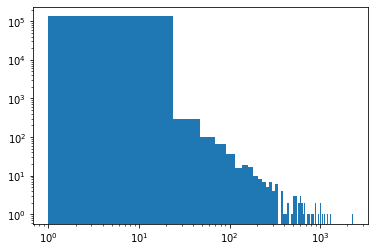

In [91]:
# The histogram is essentially the mass halo function part 4) We should discard the smallest halos

plt.hist(sizes, bins = 100)
plt.yscale('log')
plt.xscale('log')

In [90]:
# mass of the biggest halo

groupsize_max*1e10*3.573346 # solar mass

81615222640000.0

In [93]:
import pickle

In [94]:
pickle.dump(groups, open( "groups.pickle", "wb" ))

In [97]:
pickle.dump(sizes, open("sizes.pickle", "wb"))

In [99]:
# example of how to read files
groups_load = pickle.load(open( "groups.pickle", "rb" ))
sizes_load = pickle.load(open( "sizes.pickle", "rb" ))

In [101]:
len(groups_load)

134130